In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Data loading
df_23_24_sales = pd.read_excel('SECONDARY YTD 23-24 Fragrance - Till February.xlsx', sheet_name="BASE DATA")
df_22_23_sales = pd.read_excel('Sales Data - Pivot (FY 16-23).xlsx', sheet_name="FY 22-23")
df_21_22_sales = pd.read_excel('Sales Data - Pivot (FY 16-23).xlsx', sheet_name="FY 21 - 22")

In [ ]:
column_names_list = df_23_24_sales.columns.tolist()
print(column_names_list)
column_names_list = df_22_23_sales.columns.tolist()
print(column_names_list)
column_names_list = df_21_22_sales.columns.tolist()
print(column_names_list)

['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Material', 'Quantity', 'Gender', 'Brand', 'Channel', 'Franchisee store', 'Bill to Party code', 'Bill to Party Name', 'MRP', 'Gross UCP', ' Net UCP', 'Bill to Party City', 'ShiptopartyStateCode', 'Channel-2', 'Billing grp', 'Varient Name2', 'Collection']
['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Material', 'Quantity', 'Gender', 'Brand', 'Channel', 'Franchisee store', 'Bill to Party code', 'Bill to Party Name', 'MRP', 'Gross UCP', ' Net UCP', 'Bill to Party City', 'ShiptopartyStateCode', 'Billing grp', 'Channel-1', 'Variant Name', 'Collection']
['Year', 'Month', 'Month type', 'QTR', 'DOCDATE', 'RGN', 'CHANNEL', 'CHANNEL2', 'Billing Grp', 'STORE CODE', 'STORENAME', 'CITY', 'STATE', 'ITEMNUMBER', 'New Material', 'Variant Name', 'Collection', 'Pack Size', 'New Pack Size', 'NEW PACK-1', 'Gender', 'QTY', 'UCP', 'GROSSUCP', 'NET UCP', 'RS Code', 'RS Name', 'LY VOL', 'LY VAL', 'CY VOL', 'CY VAL']


In [ ]:
df_21_22_sales = df_21_22_sales.rename(columns={
    'Month type': 'Month Key',
    'RGN': 'Region',
    'DOCDATE': 'Invoice Date',
    'CHANNEL2': 'Channel',
    'CHANNEL' : 'Channel-1',
    'QTY' :  'Quantity',
    'UCP' : 'MRP',
    'NET UCP' : 'Net UCP',
    'GROSSUCP' : 'Gross UCP',
})

df_21_22_sales.rename(columns={'Channel-1': 'Channel_lfs'}, inplace=True)
df_22_23_sales.rename(columns={'Channel-1': 'Channel_lfs'}, inplace=True)
df_23_24_sales.rename(columns={'Channel-2': 'Channel_lfs'}, inplace=True)

df_21_22_sales.rename(columns={'Variant Name': 'Varient_Name'}, inplace=True)
df_22_23_sales.rename(columns={'Variant Name': 'Varient_Name'}, inplace=True)
df_23_24_sales.rename(columns={'Varient Name2': 'Varient_Name'}, inplace=True)

df_22_23_sales.rename(columns={' Net UCP': 'Net UCP'}, inplace=True)
df_23_24_sales.rename(columns={' Net UCP': 'Net UCP'}, inplace=True)

In [ ]:
#Targetting the data for the LFS Channel
df_21_22_sales_lfs = df_21_22_sales[df_21_22_sales['Channel_lfs'] == 'LFS']
df_22_23_sales_lfs = df_22_23_sales[df_22_23_sales['Channel_lfs'] == 'LFS']
df_23_24_sales_lfs = df_23_24_sales[df_23_24_sales['Channel_lfs'] == 'LFS']

In [ ]:
# df_21_22_sales_lfs.rename(columns={'Channel-1': 'Channel_lfs'}, inplace=True)
# df_22_23_sales_lfs.rename(columns={'Channel-1': 'Channel_lfs'}, inplace=True)
# df_23_24_sales_lfs.rename(columns={'Channel-2': 'Channel_lfs'}, inplace=True)

# df_21_22_sales_lfs.rename(columns={'Variant Name': 'Varient_Name'}, inplace=True)
# df_22_23_sales_lfs.rename(columns={'Variant Name': 'Varient_Name'}, inplace=True)
# df_23_24_sales_lfs.rename(columns={'Varient Name2': 'Varient_Name'}, inplace=True)

In [ ]:
df_21_22_selected = df_21_22_sales_lfs[['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Quantity', 'MRP', 'Gross UCP', 'Net UCP','Channel_lfs', 'Varient_Name', 'Collection']]
df_22_23_selected = df_22_23_sales_lfs[['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Quantity', 'MRP', 'Gross UCP', 'Net UCP','Channel_lfs', 'Varient_Name', 'Collection']]
df_23_24_selected = df_23_24_sales_lfs[['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Quantity', 'MRP', 'Gross UCP', 'Net UCP','Channel_lfs', 'Varient_Name', 'Collection']]

In [ ]:
combined_df_lfs = pd.concat([df_21_22_selected, df_22_23_selected, df_23_24_selected], ignore_index=True)
combined_df_lfs.shape

(510185, 13)

In [ ]:
#Combination of both the data frames
column_names = combined_df_lfs.columns.tolist()
print(column_names)

['Year', 'Month', 'Month Key', 'QTR', 'Region', 'Invoice Date', 'Quantity', 'MRP', 'Gross UCP', 'Net UCP', 'Channel_lfs', 'Varient_Name', 'Collection']


In [ ]:
# combined_df_lfs['Gender'].value_counts()

In [ ]:
# combined_df_lfs['Brand'].value_counts()

In [ ]:
# #Replace the data of the 'Tf' from the 'TF' respectively
# demo_brand_check = combined_df_lfs[combined_df_lfs['Brand'] == 'Tf']
# combined_df_lfs['Brand'] = combined_df_lfs['Brand'].replace('Tf', 'TF')
# combined_df_lfs['Brand'].value_counts()

In [ ]:
combined_df_lfs.head(1)

Year      Month Month Key    QTR Region         Invoice Date  Quantity  \
0  2021-22 2021-04-01       Apr  QTR-1  SOUTH  2021-04-01 00:00:00       1.0   

   MRP  Gross UCP  Net UCP Channel_lfs   Varient_Name   Collection  
0  399      399.0    399.0         LFS  150 M Deo Raw  Premium Deo

In [ ]:
combined_df_lfs['Collection'].value_counts()

Collection
d. Gift Pack         33257
g. Premium Deo       33186
a. Classic 100 ml    32271
Gift Pack            29563
Classic 100 ml       29340
f. Classic 20 ml     28312
Premium Deo          27816
 Premium Deo         25533
20 ml Singles        24174
Classic 20 ml        24062
CLASSIC 100 ml       22831
Aqua                 20216
GIFT PACK            19730
e. Aqua              17234
Escapade             16503
g. Escapade Deo      14175
Classic 50 ml        13982
CLASSIC 50 ml        13031
b. Classic 50 ml     12523
 Escapade Deo        10273
c. Escapade          10201
Nox 100 ml            6525
 Deo Bundle Pack      6384
j1. Nox 100 ml        6358
I. Tales 100ml        6183
Noura W 100ml         4997
Fastrack              4885
Tales                 3173
Nox 20 ml             2661
Noura 20 ml           2586
Tales 100ml           2521
j2. Noura W 100ml     2142
Classic Flanker       1270
h. Fastrack            844
Escapade Deo           751
Fastrack - old         367
Fastrack- Bold   

In [ ]:
mapping = {
    'd. Gift Pack': 'Gift Pack',
    'GIFT PACK' : 'Gift Pack',
    'g. Premium Deo': 'Premium Deo',
    ' Premium Deo':'Premium Deo',
    'a. Classic 100 ml': 'Classic 100 ml',
    'CLASSIC 100 ml': 'Classic 100 ml',
    'f. Classic 20 ml': 'Classic 20 ml',
    'b. Classic 50 ml': 'Classic 50 ml',
    'e. Aqua': 'Aqua',
    'g. Escapade Deo': 'Escapade Deo',
    ' Escapade Deo': 'Escapade Deo',
    'CLASSIC 50 ml' : 'Classic 50 ml',
    'c. Escapade': 'Escapade',
    'j1. Nox 100 ml': 'Nox 100 ml',
    'I. Tales 100ml': 'Tales 100ml',
    'j2. Noura W 100ml': 'Noura W 100ml',
    'h. Fastrack': 'Fastrack',
    'h. Fastrack-Bold': 'Fastrack-Bold',
    'x. Bohemian': 'Bohemian',
    ' Escapade Deo':'Escapade Deo',
    ' Bohemian':'Bohemian',
    'BOHEMIAN' : 'Bohemian',
    ' Deo Bundle Pack':'Deo Bundle Pack',
    'Fastrack- Bold' : 'Fastrack-Bold',
    'Fastrack-Bold' : 'Fastrack',
    'Fastrack - old' : 'Fastrack'
}
combined_df_lfs['Collection'] = combined_df_lfs['Collection'].replace(mapping)
combined_df_lfs['Collection'].value_counts()

Collection
Premium Deo        86535
Classic 100 ml     84442
Gift Pack          82550
Classic 20 ml      52374
Classic 50 ml      39536
Aqua               37450
Escapade           26704
Escapade Deo       25199
20 ml Singles      24174
Nox 100 ml         12883
Tales 100ml         8704
Noura W 100ml       7139
Deo Bundle Pack     6384
Fastrack            6346
Tales               3173
Nox 20 ml           2661
Noura 20 ml         2586
Classic Flanker     1270
Bohemian              60
Skinn Mist            15
Name: count, dtype: int64

In [ ]:
combined_df_lfs['Region'].value_counts()

Region
West     105498
South     90644
North     84063
East      68152
NORTH     49369
WEST      39980
SOUTH     34932
EAST      23190
Name: count, dtype: int64

In [ ]:
# demo_region_check = combined_df_lfs[combined_df_lfs['Region'] == 'NORTH']
combined_df_lfs['Region'] = combined_df_lfs['Region'].replace('NORTH', 'North')
combined_df_lfs['Region'] = combined_df_lfs['Region'].replace('SOUTH', 'South')
combined_df_lfs['Region'] = combined_df_lfs['Region'].replace('EAST', 'East')
combined_df_lfs['Region'] = combined_df_lfs['Region'].replace('WEST', 'West')
combined_df_lfs['Region'].value_counts()

Region
West     145478
North    133432
South    125576
East      91342
Name: count, dtype: int64

In [ ]:
demo_combined_df_lfs = combined_df_lfs.copy()
cutoff_date = pd.Timestamp('2022-01-01 00:00:00')
demo_combined_df_lfs['Invoice Date'] = demo_combined_df_lfs['Invoice Date'].apply(lambda x: max(x, cutoff_date))


In [ ]:
#This is to check the consistency of the data for the consecutive 2 years
demo_collection_check=demo_combined_df_lfs.copy()
demo_collection_check['min_dt'] = demo_collection_check.groupby('Collection')['Invoice Date'].transform('min')
# cutoff_date = pd.Timestamp('2022-01-01 00:00:00')
# demo_collection_check['min_dt'] = demo_collection_check['min_dt'].apply(lambda x: max(x, cutoff_date))
demo_collection_check['max_dt'] = demo_collection_check.groupby('Collection')['Invoice Date'].transform('max')
demo_collection_check = demo_collection_check[['Collection','min_dt','max_dt']].drop_duplicates().reset_index(drop=True)

demo_collection_check['tag'] = demo_collection_check.apply(lambda x: 1 if ((x['min_dt'].year == demo_collection_check['min_dt'].min().year) & (x['min_dt'].month == demo_collection_check['min_dt'].min().month)) & ((x['max_dt'].year == demo_collection_check['max_dt'].max().year) & (x['max_dt'].month == demo_collection_check['max_dt'].max().month)) else 0,axis=1)

demo_collection_check

Collection     min_dt     max_dt  tag
0       Premium Deo 2022-01-01 2024-02-29    1
1     20 ml Singles 2022-01-01 2022-03-31    0
2     Classic 50 ml 2022-01-01 2024-02-29    1
3    Classic 100 ml 2022-01-01 2024-02-29    1
4         Gift Pack 2022-01-01 2024-02-29    1
5              Aqua 2022-01-01 2024-02-29    1
6          Escapade 2022-01-01 2024-02-29    1
7          Fastrack 2022-01-01 2024-02-27    1
8          Bohemian 2022-01-01 2024-01-19    0
9             Tales 2022-01-01 2022-03-31    0
10     Escapade Deo 2022-02-19 2024-02-29    0
11    Classic 20 ml 2022-04-01 2024-02-29    0
12      Tales 100ml 2022-04-01 2024-02-29    0
13       Nox 100 ml 2022-04-12 2024-02-29    0
14    Noura W 100ml 2022-09-11 2024-02-29    0
15        Nox 20 ml 2023-06-07 2024-02-29    0
16      Noura 20 ml 2023-06-08 2024-02-29    0
17  Deo Bundle Pack 2023-07-06 2024-02-29    0
18       Skinn Mist 2023-11-01 2024-02-22    0
19  Classic Flanker 2024-01-13 2024-02-29    0

In [ ]:
combined_df_lfs.shape

(510185, 13)

In [ ]:
demo_data = demo_combined_df_lfs.copy()

In [ ]:
#Getting the data for the continued collection
demo_collection_check_continued = demo_collection_check.loc[demo_collection_check['tag']==1,'Collection']
# demo_collection_check_continued
demo_data = demo_data[demo_data['Collection'].isin(demo_collection_check_continued)]
demo_data.shape
demo_data.head()
#Filtered data for the continued fraganances

Year      Month Month Key    QTR Region Invoice Date  Quantity  MRP  \
0  2021-22 2021-04-01       Apr  QTR-1  South   2022-01-01       1.0  399   
1  2021-22 2021-04-01       Apr  QTR-1  North   2022-01-01       1.0  399   
2  2021-22 2021-04-01       Apr  QTR-1  North   2022-01-01       1.0  399   
4  2021-22 2021-04-01       Apr  QTR-1  North   2022-01-01       1.0  399   
5  2021-22 2021-04-01       Apr  QTR-1  North   2022-01-01       1.0  399   

   Gross UCP  Net UCP Channel_lfs       Varient_Name   Collection  
0      399.0    399.0         LFS      150 M Deo Raw  Premium Deo  
1      399.0    399.0         LFS  150 W Deo Celeste  Premium Deo  
2      399.0    399.0         LFS   150 M Deo Amalfi  Premium Deo  
4      399.0    399.0         LFS   150 M Deo Amalfi  Premium Deo  
5      399.0    399.0         LFS  150 W Deo Celeste  Premium Deo

In [ ]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363563 entries, 0 to 510184
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Year          363563 non-null  object        
 1   Month         363563 non-null  datetime64[ns]
 2   Month Key     363563 non-null  object        
 3   QTR           363563 non-null  object        
 4   Region        353816 non-null  object        
 5   Invoice Date  363563 non-null  datetime64[ns]
 6   Quantity      363563 non-null  float64       
 7   MRP           363563 non-null  int64         
 8   Gross UCP     363563 non-null  float64       
 9   Net UCP       363563 non-null  float64       
 10  Channel_lfs   363563 non-null  object        
 11  Varient_Name  363563 non-null  object        
 12  Collection    363563 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 38.8+ MB


In [ ]:
demo_data['discount'] = (demo_data['Gross UCP'] - demo_data['Net UCP'])*100/demo_data['Gross UCP']
# demo_data[demo_data['discount'].isnull()]
# (demo_data['discount']>0).sum()
# demo_data[demo_data['discount'] < 0]

Empty DataFrame
Columns: [Year, Month, Month Key, QTR, Region, Invoice Date, Quantity, MRP, Gross UCP, Net UCP, Channel_lfs, Varient_Name, Collection, discount]
Index: []

In [ ]:
#Here we have dropped the null values in the discount
demo_data.dropna(subset=['discount'], inplace=True)

In [ ]:
# demo_data['QTR'].value_counts()
# demo_region_check = combined_df_lfs[combined_df_lfs['Region'] == 'NORTH']
demo_data['QTR'] = demo_data['QTR'].replace('QTR-4', 'Q4')
demo_data['QTR'] = demo_data['QTR'].replace('QTR-3', 'Q3')
demo_data['QTR'] = demo_data['QTR'].replace('QTR-2', 'Q2')
demo_data['QTR'] = demo_data['QTR'].replace('QTR-1', 'Q1')
demo_data['QTR'].value_counts()

QTR
Q3    117864
Q2     88978
Q4     80883
Q1     75669
Name: count, dtype: int64

In [ ]:
# Copy the data
demo_data_15days = demo_data.copy()

# Define start and end dates
start_date = pd.Timestamp('2022-01-01 00:00:00')
end_date = pd.Timestamp('2024-02-29 00:00:00')

# Generate date ranges dynamically
bins = [start_date]
current_date = start_date

while current_date < end_date:
    if current_date.day == 1:
        next_date = current_date + pd.DateOffset(days=14)
    else:
        next_date = (current_date + pd.offsets.MonthEnd(0)) + pd.DateOffset(days=1)
    bins.append(next_date)
    current_date = next_date

# Ensure the end date is included
if bins[-1] < end_date:
    bins.append(end_date)

# Create labels for the bins
labels = [f"{bins[i].strftime('%Y-%m-%d')} to {bins[i+1].strftime('%Y-%m-%d')}" for i in range(len(bins)-1)]

# Check the lengths of bins and labels
print(f"Number of bins: {len(bins)}")
print(bins)
print(f"Number of labels: {len(labels)}")
print(labels)

# Ensure bins and labels match in length
if len(labels) != len(bins) - 1:
    raise ValueError("Mismatch between the number of bins and labels")

# Bin the 'Invoice Date' into the defined ranges
demo_data_15days['Date Range'] = pd.cut(demo_data_15days['Invoice Date'], bins=bins, labels=labels, right=False)

# Group by the desired columns and aggregate the data
# demo_data_15days_summation = demo_data_15days.groupby(['Year', 'QTR', 'Month Key', 'Date Range', 'Collection'], as_index=False).agg({'Net UCP': 'sum', 'Quantity': 'sum'})

# # Display the resulting DataFrame
# demo_data_15days['Date Range'].isnull().sum()
# demo_data_15days['Quantity'].isnull().sum()
# Sum specific columns where Quantity is 0




Number of bins: 53
[Timestamp('2022-01-01 00:00:00'), Timestamp('2022-01-15 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-15 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-03-15 00:00:00'), Timestamp('2022-04-01 00:00:00'), Timestamp('2022-04-15 00:00:00'), Timestamp('2022-05-01 00:00:00'), Timestamp('2022-05-15 00:00:00'), Timestamp('2022-06-01 00:00:00'), Timestamp('2022-06-15 00:00:00'), Timestamp('2022-07-01 00:00:00'), Timestamp('2022-07-15 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-08-15 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-09-15 00:00:00'), Timestamp('2022-10-01 00:00:00'), Timestamp('2022-10-15 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2022-11-15 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-02-15 00:00:00'), Timestamp('2023-03-01 00:00:

0

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(demo_data_15days, title="Pandas Profiling Report")
profile.to_file("output.html")

In [ ]:
#Now we are going to analyze the data Month wise for the collections of 'demo_collection_check_continued'
demo_data_monthly = demo_data.groupby(['Year','QTR','Month Key','Collection'],as_index=False).agg({'Net UCP':'sum','Quantity':'sum'})
demo_data_monthly.shape
# column_names = demo_data_monthly.columns.tolist()
# print(demo_data_monthly)
# demo_data_monthly.shape
# demo_data_monthly['Month Key'].value_counts()
# demo_data_monthly[(demo_data_monthly ['Month Key']=='Feb') & (demo_data_monthly ['Collection']=='Aqua') & (demo_data_monthly ['Region']=='North')]

(245, 6)

In [ ]:
import pandas as pd

# Function to convert Month Key to correct year
def convert_month_key(row):
    fiscal_year = row['Year']
    month = row['Month Key']

    # Parse the fiscal year
    start_year, end_year = fiscal_year.split('-')
    start_year = int(start_year)
    end_year = int('20' + end_year)  # Assuming fiscal years are in the 2000s

    # Define months and their positions
    months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

    # Determine the calendar year
    if month in months[:9]:  # Apr to Dec belongs to the start_year
        calendar_year = start_year
    else:  # Jan to Mar belongs to the end_year
        calendar_year = end_year

    # Create the new Month Key
    new_month_key = f"{month}-{str(calendar_year)[-2:]}"
    return new_month_key

# Apply the function to the DataFrame
demo_data_monthly['Converted Month Key'] = demo_data_monthly.apply(convert_month_key, axis=1)

demo_data_monthly.tail()
# demo_data_monthly.info()


Year QTR Month Key   Collection     Net UCP  Quantity  \
246  2023-24  Q4       Jan     Fastrack    20943.00      24.0   
247  2023-24  Q4       Jan    Gift Pack  5727167.98    2905.0   
248  2023-24  Q4       Jan   Nox 100 ml  1909610.00     481.0   
249  2023-24  Q4       Jan  Premium Deo   876138.83    1762.0   
250  2023-24  Q4       Jan  Tales 100ml   270200.42     271.0   

    Converted Month Key  
246              Jan-24  
247              Jan-24  
248              Jan-24  
249              Jan-24  
250              Jan-24

<Axes: xlabel='Net UCP', ylabel='Count'>

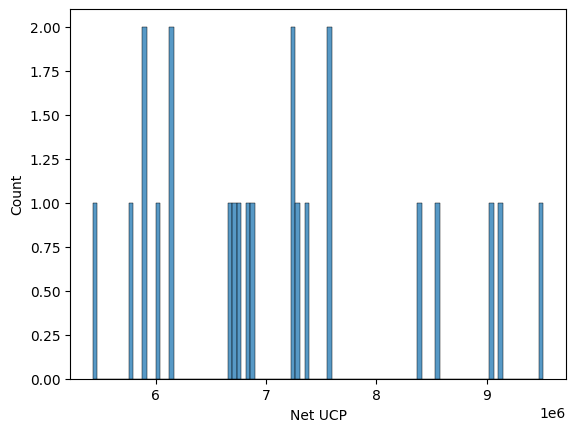

In [ ]:
#Now we are going to draw the histplot for the 'Net UCP' and 'Quantity' from the 'demo_data_monthly' for the 'Collection; 'Classic 100 ml'
demo_data_monthly_classic_100 = demo_data_monthly[demo_data_monthly['Collection']=='Classic 100 ml']
demo_data_monthly_classic_100.head(10)
sns.histplot(data=demo_data_monthly_classic_100, x='Net UCP', bins=100)

Column: Net UCP
Skewness: 0.5727988351820048


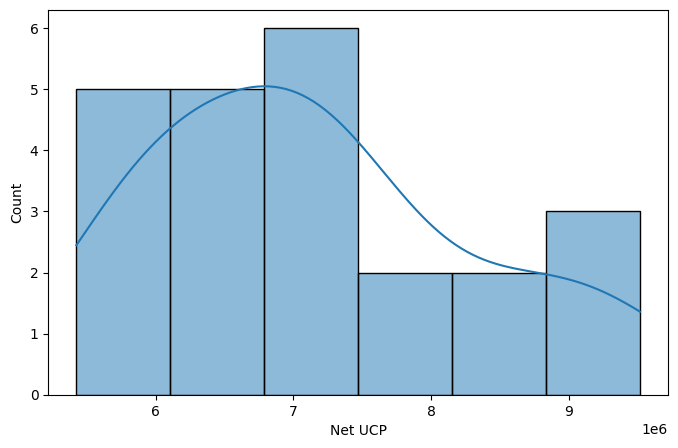

Column: Quantity
Skewness: 0.6353186566621315


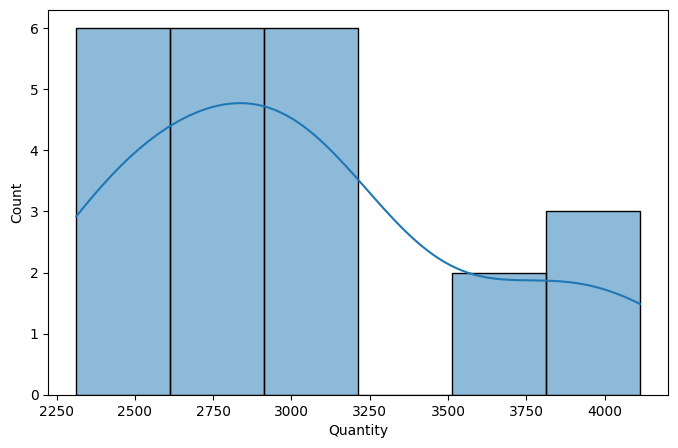

In [ ]:
from scipy.stats import skew
columns_to_check = ['Net UCP', 'Quantity']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(demo_data_monthly_classic_100[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(demo_data_monthly_classic_100[col], kde=True)
    plt.show()

<Axes: xlabel='Net UCP', ylabel='Count'>

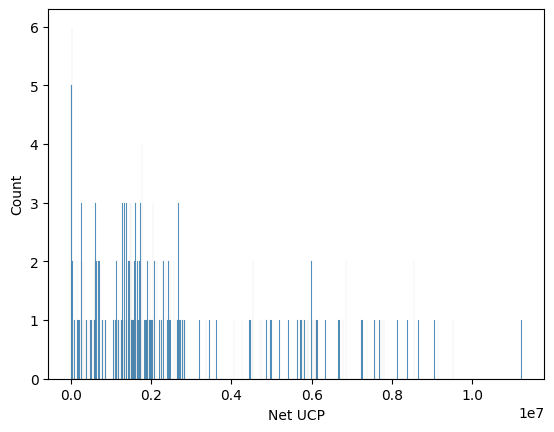

In [ ]:
#Now we are going to draw the histplot for the 'Net UCP' and 'Quantity' from the 'demo_data_monthly' for all the 'Collection'
sns.histplot(data=demo_data_monthly, x='Net UCP', bins=1000)

Column: Net UCP
Skewness: 1.3155389272217524


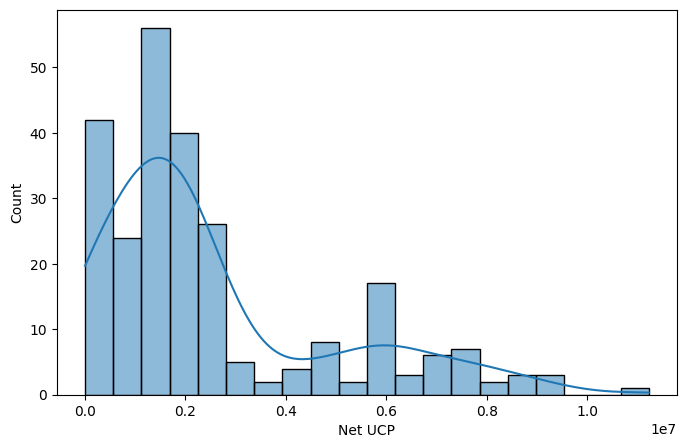

Column: Quantity
Skewness: 0.6507763159819278


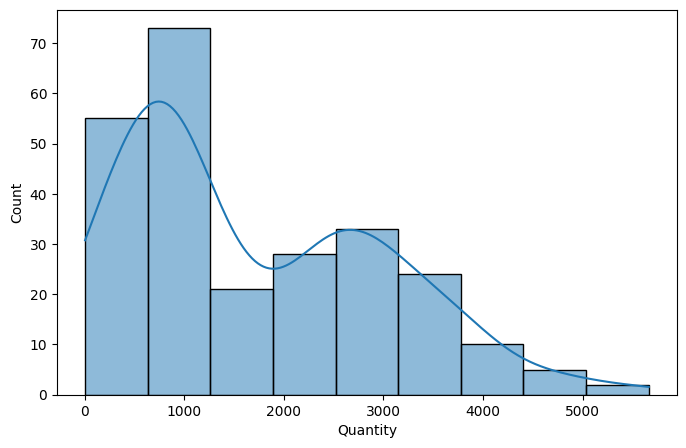

In [ ]:
from scipy.stats import skew
columns_to_check = ['Net UCP', 'Quantity']
for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Skewness: {skew(demo_data_monthly[col])}")
    plt.figure(figsize=(8, 5))
    sns.histplot(demo_data_monthly[col], kde=True)
    plt.show()

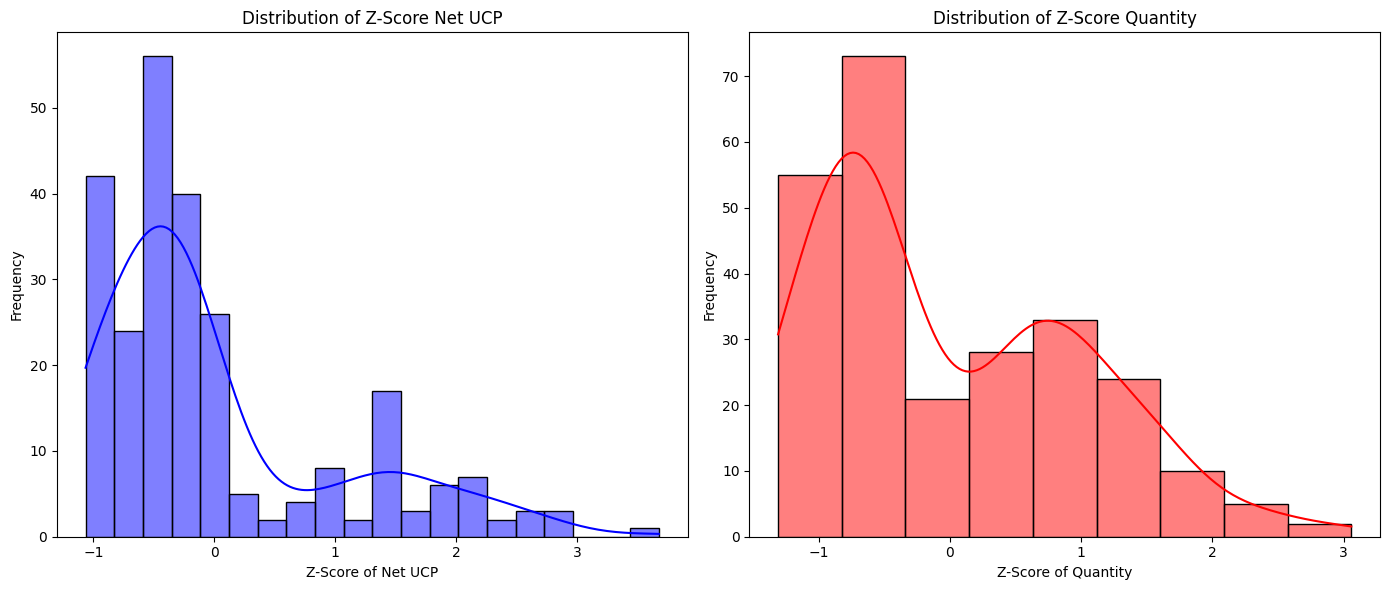

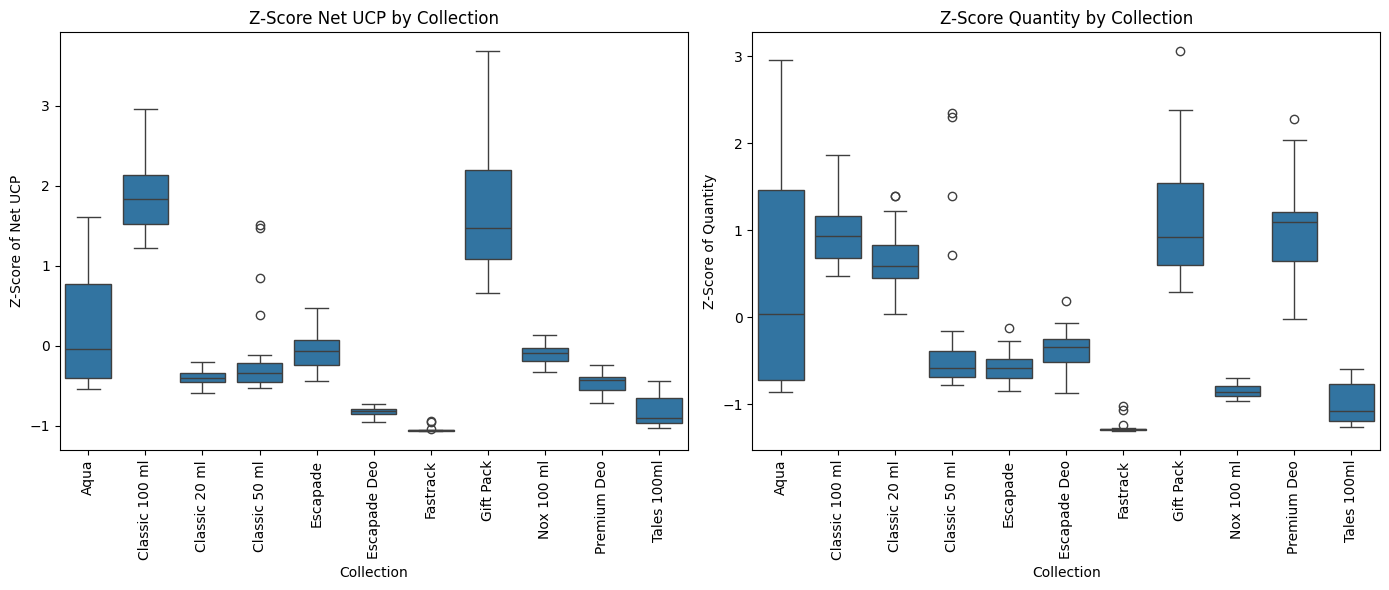

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [ ]:
#Now we are going to do Feature scaling using the Standardization (Z-Score Normalization) for the 'Net UCP' and 'Quantity' from the 'demo_data_monthly' for all the 'Collection'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming demo_data_monthly is your DataFrame
scaler = StandardScaler()
scaled_data = demo_data_monthly[['Net UCP', 'Quantity']]
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns=['Net UCP', 'Quantity'])

demo_data_monthly['Z_Score_Net_UCP'] = scaled_data['Net UCP']
demo_data_monthly['Z_Score_Quantity'] = scaled_data['Quantity']

plt.figure(figsize=(14, 6))

# Histogram and KDE for Z_Score_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly['Z_Score_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Z-Score Net UCP')
plt.xlabel('Z-Score of Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Z_Score_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly['Z_Score_Quantity'], kde=True, color='r')
plt.title('Distribution of Z-Score Quantity')
plt.xlabel('Z-Score of Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Z_Score_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Z_Score_Net_UCP', data=demo_data_monthly)
plt.xticks(rotation=90)
plt.title('Z-Score Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Net UCP')

# Box plot for Z_Score_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Z_Score_Quantity', data=demo_data_monthly)
plt.xticks(rotation=90)
plt.title('Z-Score Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Quantity')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))


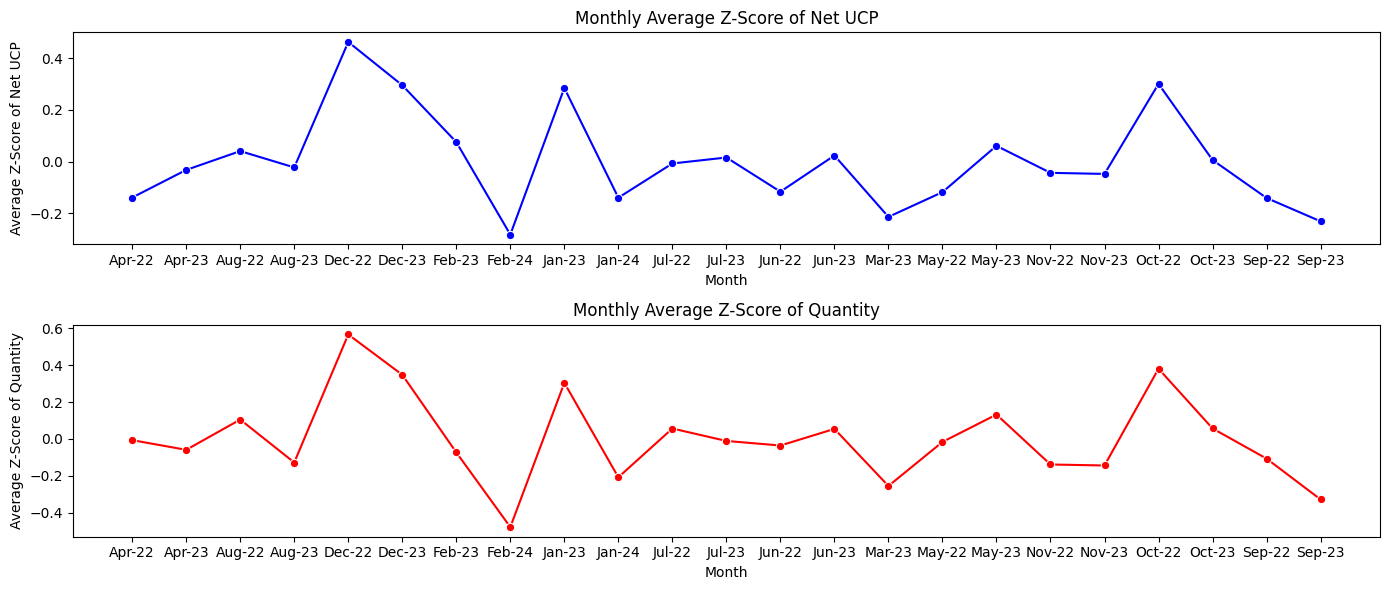

In [ ]:
# Group by month and calculate mean Z-scores
monthly_means = demo_data_monthly.groupby('Converted Month Key')[['Z_Score_Net_UCP', 'Z_Score_Quantity']].mean().reset_index()

plt.figure(figsize=(14, 6))

# Plot for Z_Score_Net_UCP
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_means, x='Converted Month Key', y='Z_Score_Net_UCP', marker='o', linestyle='-', color='b')
plt.title('Monthly Average Z-Score of Net UCP')
plt.xlabel('Month')
plt.ylabel('Average Z-Score of Net UCP')

# Plot for Z_Score_Quantity
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_means, x='Converted Month Key', y='Z_Score_Quantity', marker='o', linestyle='-', color='r')
plt.title('Monthly Average Z-Score of Quantity')
plt.xlabel('Month')
plt.ylabel('Average Z-Score of Quantity')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
std_dev = demo_data_monthly[['Net UCP', 'Quantity']].std()
std_dev
# std_dev_collection = demo_data_monthly.groupby('Collection')[['Net UCP', 'Quantity']].std()
# std_dev_collection
# std_dev_collection_region = demo_data_monthly.groupby(['Collection', 'Region'])[['Net UCP', 'Quantity']].std()
# std_dev_collection_region

Net UCP     2.370166e+06
Quantity    1.298812e+03
dtype: float64

In [ ]:
# # print(demo_data_monthly_classic_100.isna().sum())
# demo_data_monthly_classic_100 = demo_data_monthly_classic_100.dropna(subset=['Net UCP', 'Quantity'])
# # demo_data_monthly_classic_100.shape
# demo_data_monthly_classic_100['Converted Month Key'] = pd.to_datetime(demo_data_monthly_classic_100['Converted Month Key'], format='%b-%y')
# demo_data_monthly_classic_100 = demo_data_monthly_classic_100.sort_values(by='Converted Month Key')
# demo_data_monthly_classic_100[['Converted Month Key','Z_Score_Net_UCP', 'Net UCP']].head(15)
# demo_data_monthly_classic_100.head(15)

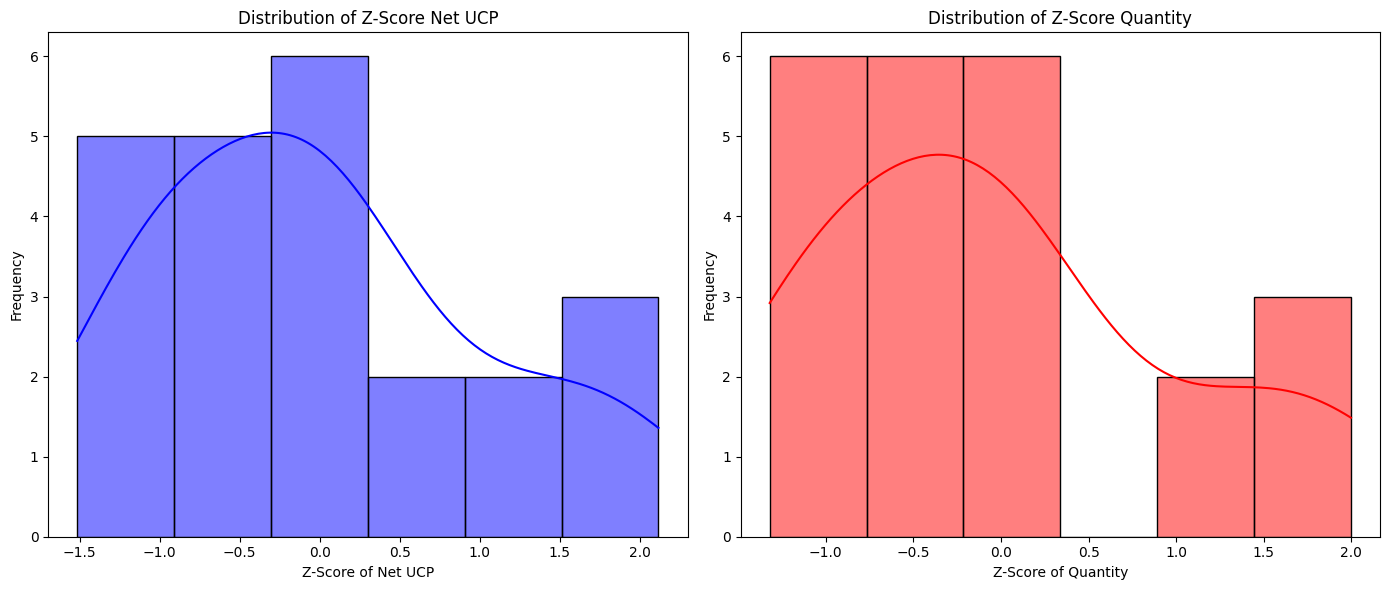

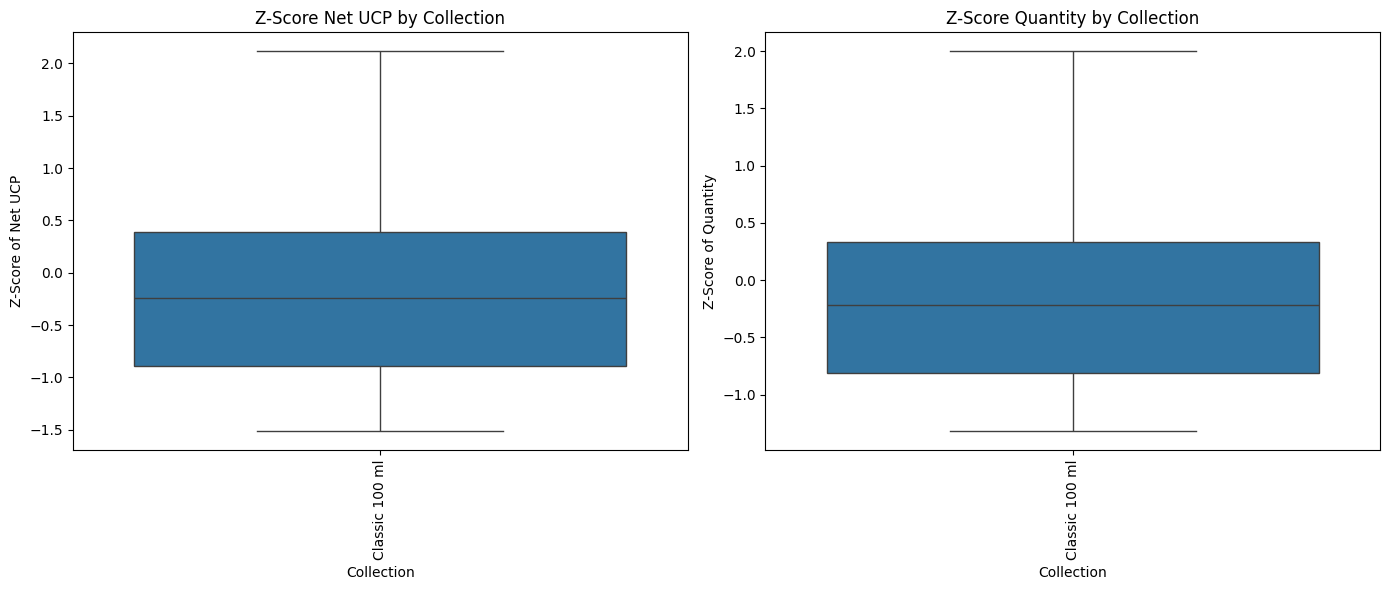

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [ ]:
#Now we are going to do Feature scaling using the Standardization (Z-Score Normalization) for the 'Net UCP' and 'Quantity' from the 'demo_data_monthly_classic_100' for all the 'Collection'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

demo_data_monthly_classic_100['Converted Month Key'] = pd.to_datetime(demo_data_monthly_classic_100['Converted Month Key'], format='%b-%y')
demo_data_monthly_classic_100 = demo_data_monthly_classic_100.sort_values(by='Converted Month Key')

demo_data_monthly_classic_100 = demo_data_monthly_classic_100.dropna(subset=['Net UCP', 'Quantity'])
scaler = StandardScaler()
scaled_net_ucp = scaler.fit_transform(demo_data_monthly_classic_100[['Net UCP']])
demo_data_monthly_classic_100['Z_Score_Net_UCP'] = scaled_net_ucp
scaled_quantity = scaler.fit_transform(demo_data_monthly_classic_100[['Quantity']])
demo_data_monthly_classic_100['Z_Score_Quantity'] = scaled_quantity


# demo_data_monthly_classic_100['Z_Score_Net_UCP'] = scaled_data['Net UCP']
# demo_data_monthly_classic_100['Z_Score_Quantity'] = scaled_data['Quantity']

plt.figure(figsize=(14, 6))

# Histogram and KDE for Z_Score_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100['Z_Score_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Z-Score Net UCP')
plt.xlabel('Z-Score of Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Z_Score_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100['Z_Score_Quantity'], kde=True, color='r')
plt.title('Distribution of Z-Score Quantity')
plt.xlabel('Z-Score of Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Z_Score_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Z_Score_Net_UCP', data=demo_data_monthly_classic_100)
plt.xticks(rotation=90)
plt.title('Z-Score Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Net UCP')

# Box plot for Z_Score_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Z_Score_Quantity', data=demo_data_monthly_classic_100)
plt.xticks(rotation=90)
plt.title('Z-Score Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Quantity')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

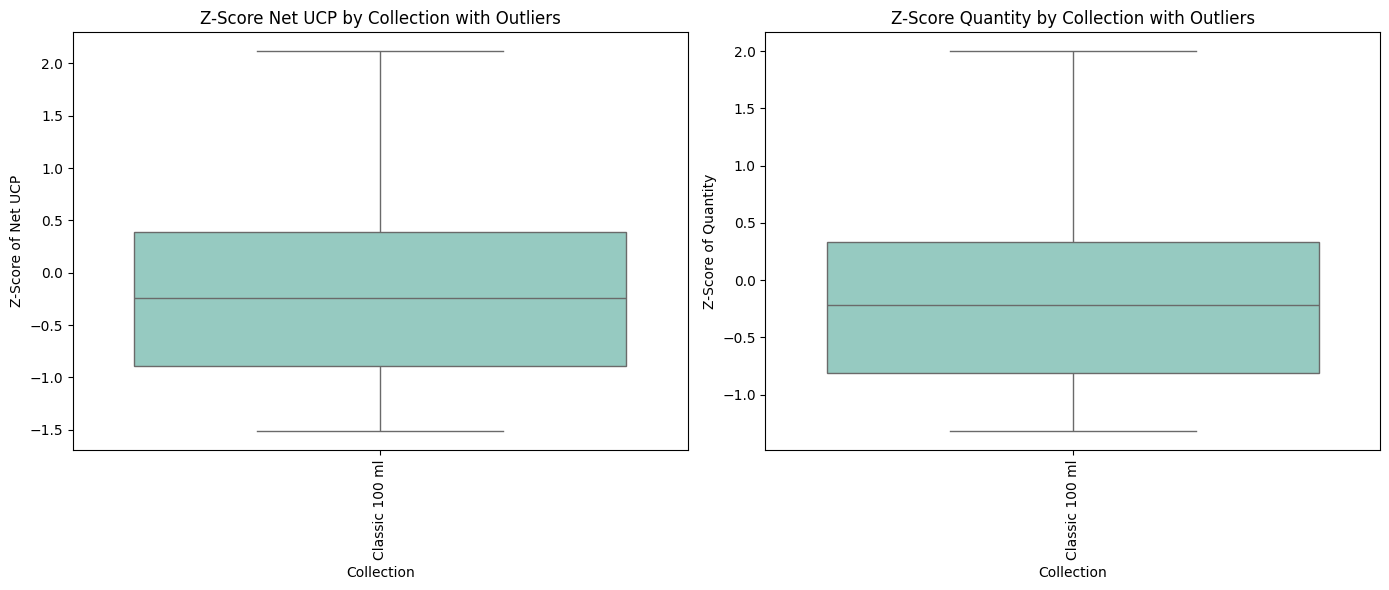

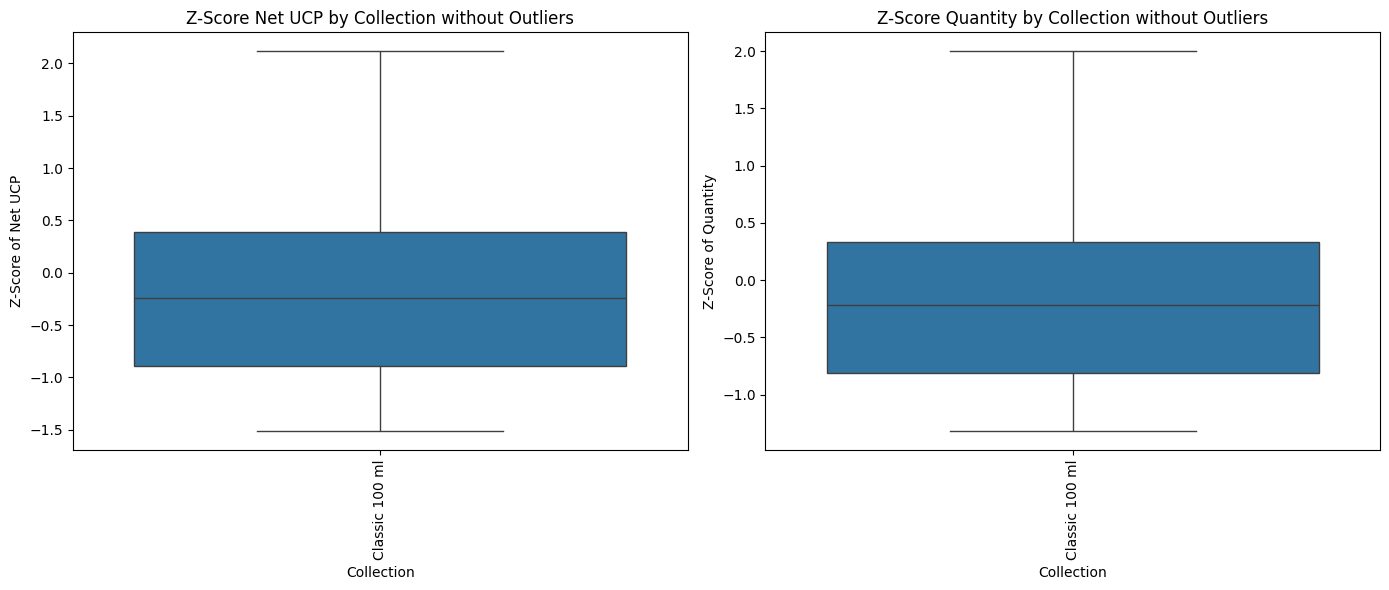

In [ ]:
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Z_Score_Net_UCP and Z_Score_Quantity
outliers_net_ucp = detect_outliers(demo_data_monthly_classic_100, 'Z_Score_Net_UCP')
outliers_quantity = detect_outliers(demo_data_monthly_classic_100, 'Z_Score_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100['Outlier_Net_UCP'] = np.where(demo_data_monthly_classic_100.index.isin(outliers_net_ucp.index), True, False)
demo_data_monthly_classic_100['Outlier_Quantity'] = np.where(demo_data_monthly_classic_100.index.isin(outliers_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Z_Score_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Z_Score_Net_UCP', data=demo_data_monthly_classic_100, palette="Set3")
sns.scatterplot(x='Collection', y='Z_Score_Net_UCP', data=demo_data_monthly_classic_100[demo_data_monthly_classic_100['Outlier_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Z-Score Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Net UCP')

# Box plot for Z_Score_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Z_Score_Quantity', data=demo_data_monthly_classic_100, palette="Set3")
sns.scatterplot(x='Collection', y='Z_Score_Quantity', data=demo_data_monthly_classic_100[demo_data_monthly_classic_100['Outlier_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Z-Score Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers = demo_data_monthly_classic_100[~demo_data_monthly_classic_100.index.isin(outliers_net_ucp.index)]
demo_data_no_outliers = demo_data_no_outliers[~demo_data_no_outliers.index.isin(outliers_quantity.index)]

# Plot without outliers
plt.figure(figsize=(14, 6))

# Box plot for Z_Score_Net_UCP by Collection without outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Z_Score_Net_UCP', data=demo_data_no_outliers)
plt.xticks(rotation=90)
plt.title('Z-Score Net UCP by Collection without Outliers')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Net UCP')

# Box plot for Z_Score_Quantity by Collection without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Z_Score_Quantity', data=demo_data_no_outliers)
plt.xticks(rotation=90)
plt.title('Z-Score Quantity by Collection without Outliers')
plt.xlabel('Collection')
plt.ylabel('Z-Score of Quantity')

plt.tight_layout()
plt.show()


In [ ]:
demo_data_no_outliers.shape

(23, 11)

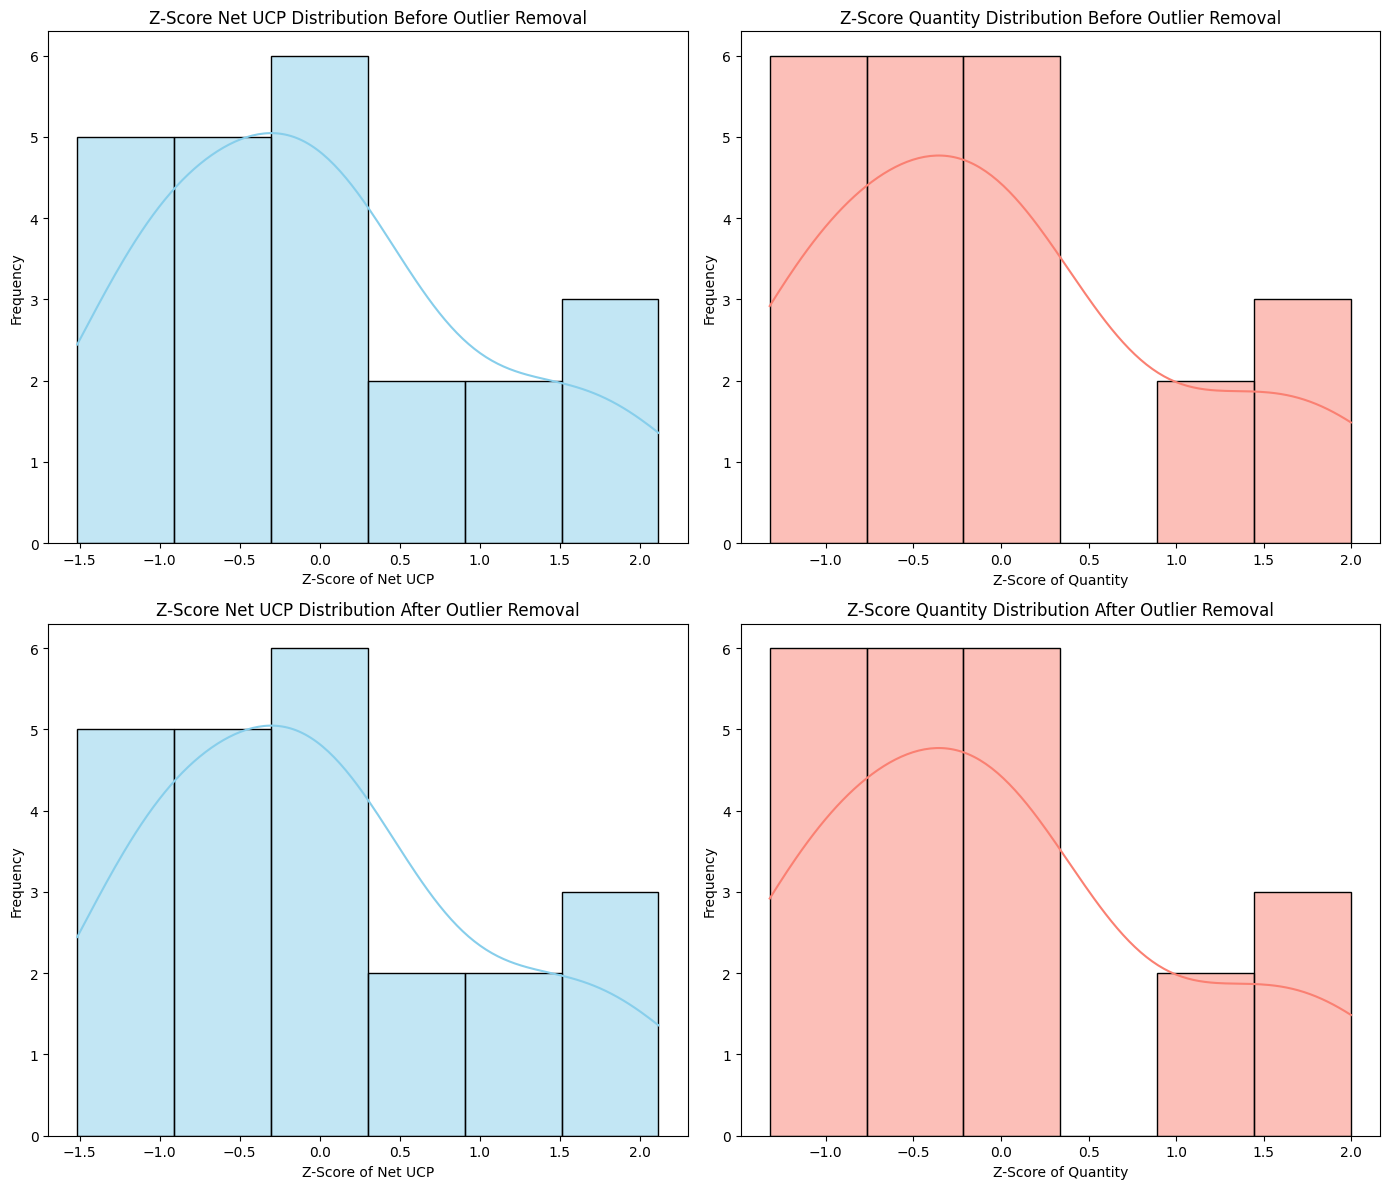

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Z_Score_Net_UCP and Z_Score_Quantity
outliers_net_ucp = detect_outliers(demo_data_monthly_classic_100, 'Z_Score_Net_UCP')
outliers_quantity = detect_outliers(demo_data_monthly_classic_100, 'Z_Score_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100['Outlier_Net_UCP'] = np.where(demo_data_monthly_classic_100.index.isin(outliers_net_ucp.index), True, False)
demo_data_monthly_classic_100['Outlier_Quantity'] = np.where(demo_data_monthly_classic_100.index.isin(outliers_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 12))

# Histogram for Z_Score_Net_UCP before outlier removal
plt.subplot(2, 2, 1)
sns.histplot(demo_data_monthly_classic_100['Z_Score_Net_UCP'], kde=True, color='skyblue')
plt.title('Z-Score Net UCP Distribution Before Outlier Removal')
plt.xlabel('Z-Score of Net UCP')
plt.ylabel('Frequency')

# Histogram for Z_Score_Quantity before outlier removal
plt.subplot(2, 2, 2)
sns.histplot(demo_data_monthly_classic_100['Z_Score_Quantity'], kde=True, color='salmon')
plt.title('Z-Score Quantity Distribution Before Outlier Removal')
plt.xlabel('Z-Score of Quantity')
plt.ylabel('Frequency')

# Remove outliers from the dataset
demo_data_no_outliers = demo_data_monthly_classic_100[~demo_data_monthly_classic_100.index.isin(outliers_net_ucp.index)]
demo_data_no_outliers = demo_data_no_outliers[~demo_data_no_outliers.index.isin(outliers_quantity.index)]

# Histogram for Z_Score_Net_UCP after outlier removal
plt.subplot(2, 2, 3)
sns.histplot(demo_data_no_outliers['Z_Score_Net_UCP'], kde=True, color='skyblue')
plt.title('Z-Score Net UCP Distribution After Outlier Removal')
plt.xlabel('Z-Score of Net UCP')
plt.ylabel('Frequency')

# Histogram for Z_Score_Quantity after outlier removal
plt.subplot(2, 2, 4)
sns.histplot(demo_data_no_outliers['Z_Score_Quantity'], kde=True, color='salmon')
plt.title('Z-Score Quantity Distribution After Outlier Removal')
plt.xlabel('Z-Score of Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
demo_data_monthly_classic_100_no_outliers = demo_data_no_outliers.copy()
demo_data_monthly_classic_100_no_outliers.head()

Year QTR Month Key      Collection     Net UCP  Quantity  \
1   2022-23  Q1       Apr  Classic 100 ml  6125678.16    2624.0   
23  2022-23  Q1       May  Classic 100 ml  6132882.40    2557.0   
12  2022-23  Q1       Jun  Classic 100 ml  5425345.28    2313.0   
45  2022-23  Q2       Jul  Classic 100 ml  6698542.03    2863.0   
34  2022-23  Q2       Aug  Classic 100 ml  8377355.54    3754.0   

   Converted Month Key  Z_Score_Net_UCP  Z_Score_Quantity  Outlier_Net_UCP  \
1           2022-04-01        -0.893111         -0.747143            False   
23          2022-05-01        -0.886718         -0.870638            False   
12          2022-06-01        -1.514632         -1.320382            False   
45          2022-07-01        -0.384715         -0.306615            False   
34          2022-08-01         1.105173          1.335689            False   

    Outlier_Quantity  
1              False  
23             False  
12             False  
45             False  
34             False

In [ ]:
demo_data_monthly_classic_100_no_outliers.head(15)

Year QTR Month Key      Collection     Net UCP  Quantity  \
1    2022-23  Q1       Apr  Classic 100 ml  6125678.16    2624.0   
23   2022-23  Q1       May  Classic 100 ml  6132882.40    2557.0   
12   2022-23  Q1       Jun  Classic 100 ml  5425345.28    2313.0   
45   2022-23  Q2       Jul  Classic 100 ml  6698542.03    2863.0   
34   2022-23  Q2       Aug  Classic 100 ml  8377355.54    3754.0   
56   2022-23  Q2       Sep  Classic 100 ml  6773153.16    2911.0   
89   2022-23  Q3       Oct  Classic 100 ml  9049018.20    3876.0   
78   2022-23  Q3       Nov  Classic 100 ml  6661099.60    2723.0   
67   2022-23  Q3       Dec  Classic 100 ml  9516447.41    4104.0   
110  2022-23  Q4       Jan  Classic 100 ml  7243197.01    2953.0   
100  2022-23  Q4       Feb  Classic 100 ml  7560717.41    3211.0   
120  2022-23  Q4       Mar  Classic 100 ml  5888747.33    2471.0   
131  2023-24  Q1       Apr  Classic 100 ml  7588292.13    3205.0   
153  2023-24  Q1       May  Classic 100 ml  6858438.71    2904.0   
142  2023-24  Q1       Jun  Classic 100 ml  7385090.67    3166.0   

    Converted Month Key  Z_Score_Net_UCP  Z_Score_Quantity  Outlier_Net_UCP  \
1            2022-04-01        -0.893111         -0.747143            False   
23           2022-05-01        -0.886718         -0.870638            False   
12           2022-06-01        -1.514632         -1.320382            False   
45           2022-07-01        -0.384715         -0.306615            False   
34           2022-08-01         1.105173          1.335689            False   
56           2022-09-01        -0.318500         -0.218140            False   
89           2022-10-01         1.701250          1.560561            False   
78           2022-11-01        -0.417943         -0.564665            False   
67           2022-12-01         2.116077          1.980814            False   
110          2023-01-01         0.098647         -0.140725            False   
100          2023-02-01         0.380436          0.334824            False   
120          2023-03-01        -1.103379         -1.029155            False   
131          2023-04-01         0.404907          0.323765            False   
153          2023-05-01        -0.242812         -0.231043            False   
142          2023-06-01         0.224573          0.251879            False   

     Outlier_Quantity  
1               False  
23              False  
12              False  
45              False  
34              False  
56              False  
89              False  
78              False  
67              False  
110             False  
100             False  
120             False  
131             False  
153             False  
142             False

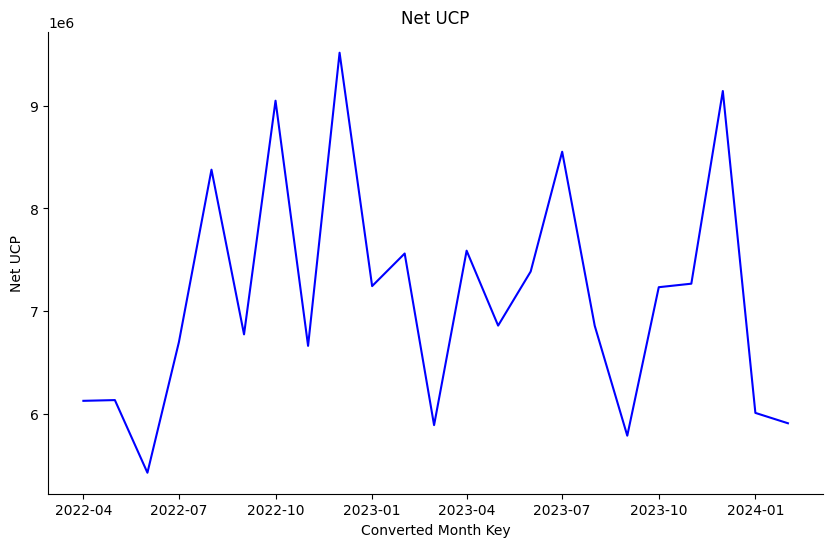

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(demo_data_monthly_classic_100_no_outliers['Converted Month Key'],
         demo_data_monthly_classic_100_no_outliers['Net UCP'],
         color='blue')

plt.title('Net UCP')
plt.xlabel('Converted Month Key')
plt.ylabel('Net UCP')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


Column: Net UCP
Skewness: 0.5727988351820098


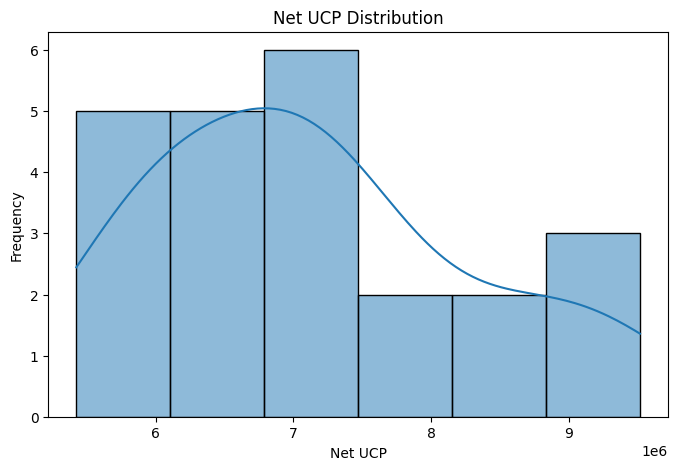

Column: Quantity
Skewness: 0.6353186566621317


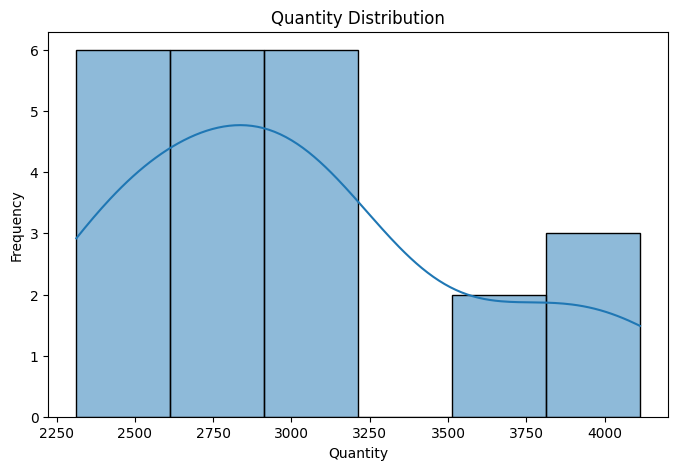

Column: Z_Score_Net_UCP
Skewness: 0.5727988351820079


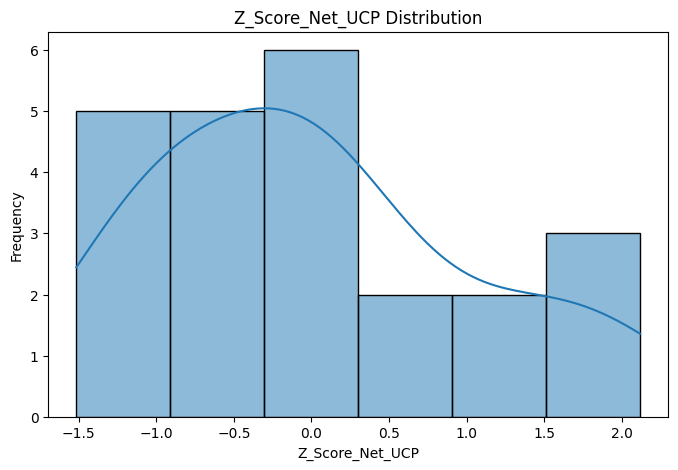

Column: Z_Score_Quantity
Skewness: 0.6353186566621314


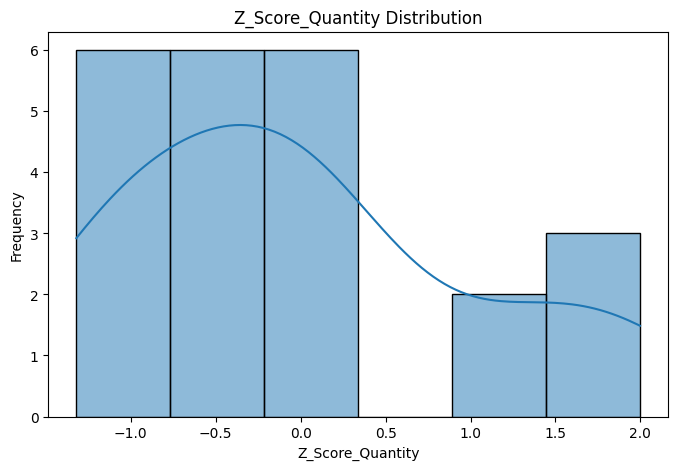

In [ ]:
from scipy.stats import skew
columns_to_check = ['Net UCP', 'Quantity', 'Z_Score_Net_UCP', 'Z_Score_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_monthly_classic_100_no_outliers[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


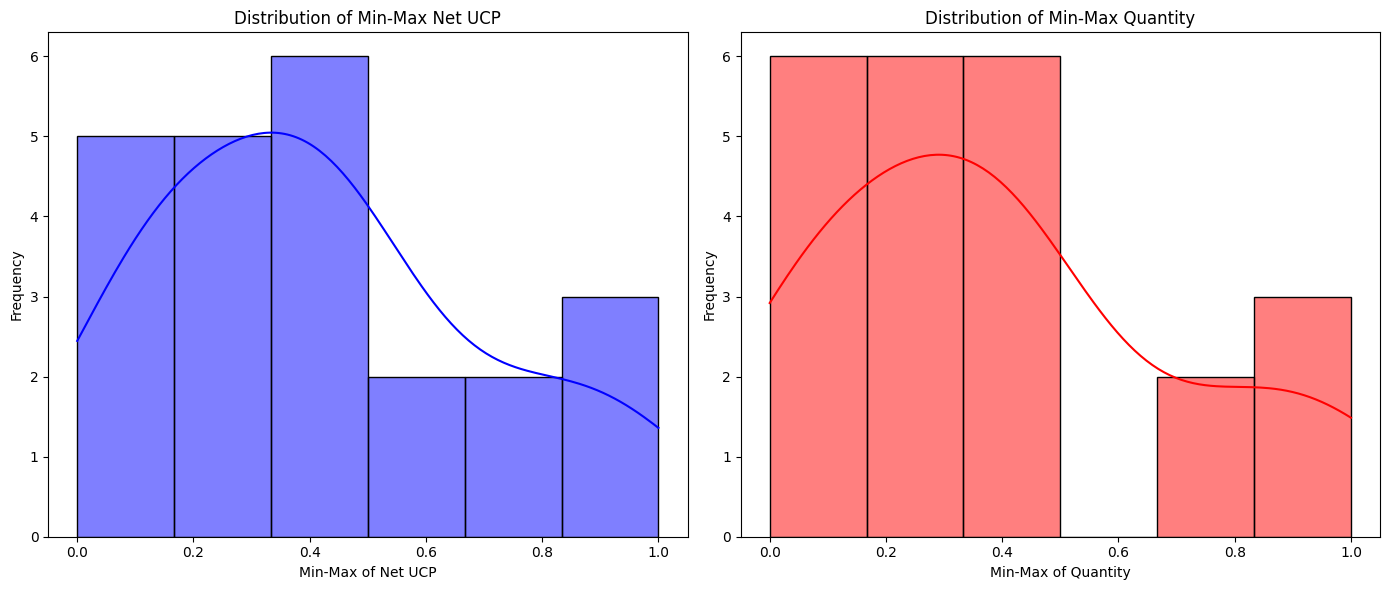

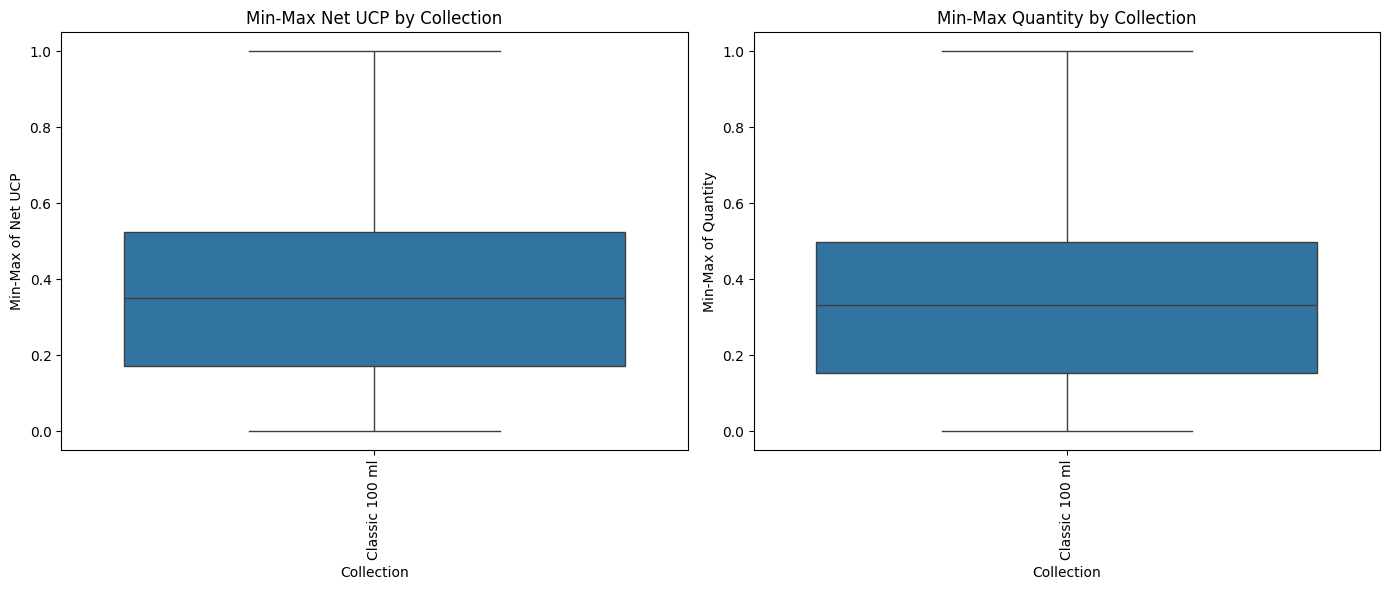

In [ ]:
#Now we are going to do Feature scaling using the Min-Max Scaling (Normalization) for the 'Net UCP' and 'Quantity' from the 'demo_data_monthly' for all the 'Collection'
from sklearn.preprocessing import MinMaxScaler

demo_data_monthly_classic_100_no_outliers['Converted Month Key'] = pd.to_datetime(demo_data_monthly_classic_100_no_outliers['Converted Month Key'], format='%b-%y')
demo_data_monthly_classic_100_no_outliers = demo_data_monthly_classic_100_no_outliers.sort_values(by='Converted Month Key')

demo_data_monthly_classic_100_no_outliers = demo_data_monthly_classic_100_no_outliers.dropna(subset=['Net UCP', 'Quantity'])
scaler = MinMaxScaler()
scaled_net_ucp = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Net UCP']])
demo_data_monthly_classic_100_no_outliers['Min_Max_Net_UCP'] = scaled_net_ucp
scaled_quantity = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Quantity']])
demo_data_monthly_classic_100_no_outliers['Min_Max_Quantity'] = scaled_quantity

plt.figure(figsize=(14, 6))

# Histogram and KDE for Min_Max_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Min_Max_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Min-Max Net UCP')
plt.xlabel('Min-Max of Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Min_Max_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Min_Max_Quantity'], kde=True, color='r')
plt.title('Distribution of Min-Max Quantity')
plt.xlabel('Min-Max of Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Min_Max_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Min_Max_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Min-Max Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Min-Max of Net UCP')

# Box plot for Min_Max_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Min_Max_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Min-Max Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Min-Max of Quantity')

plt.tight_layout()
plt.show()



Column: Min_Max_Net_UCP
Skewness: 0.5727988351820075


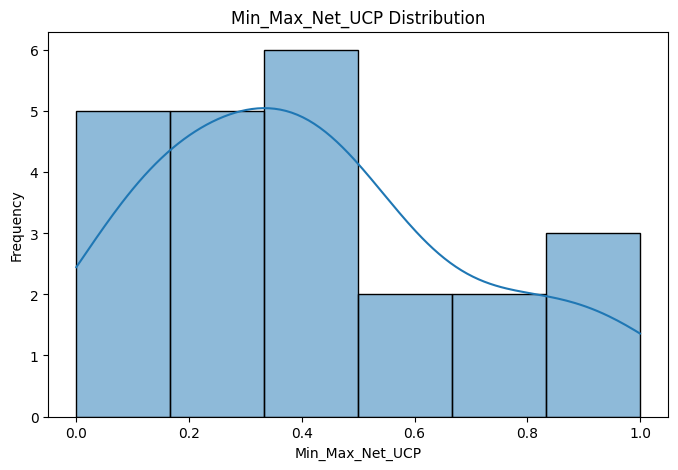

Column: Min_Max_Quantity
Skewness: 0.6353186566621316


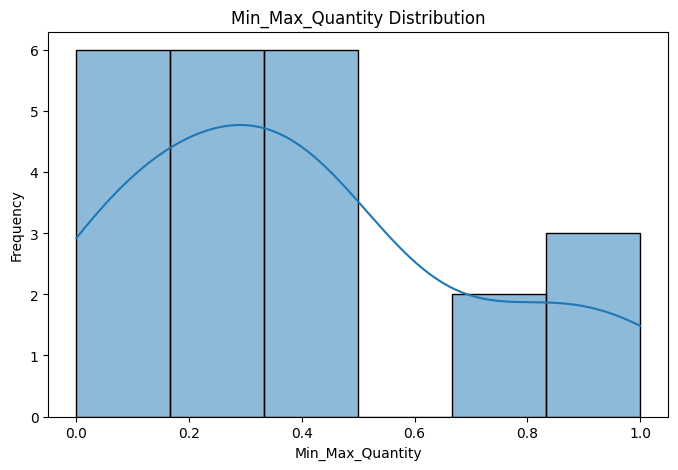

In [ ]:
from scipy.stats import skew
columns_to_check = ['Min_Max_Net_UCP','Min_Max_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_monthly_classic_100_no_outliers[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

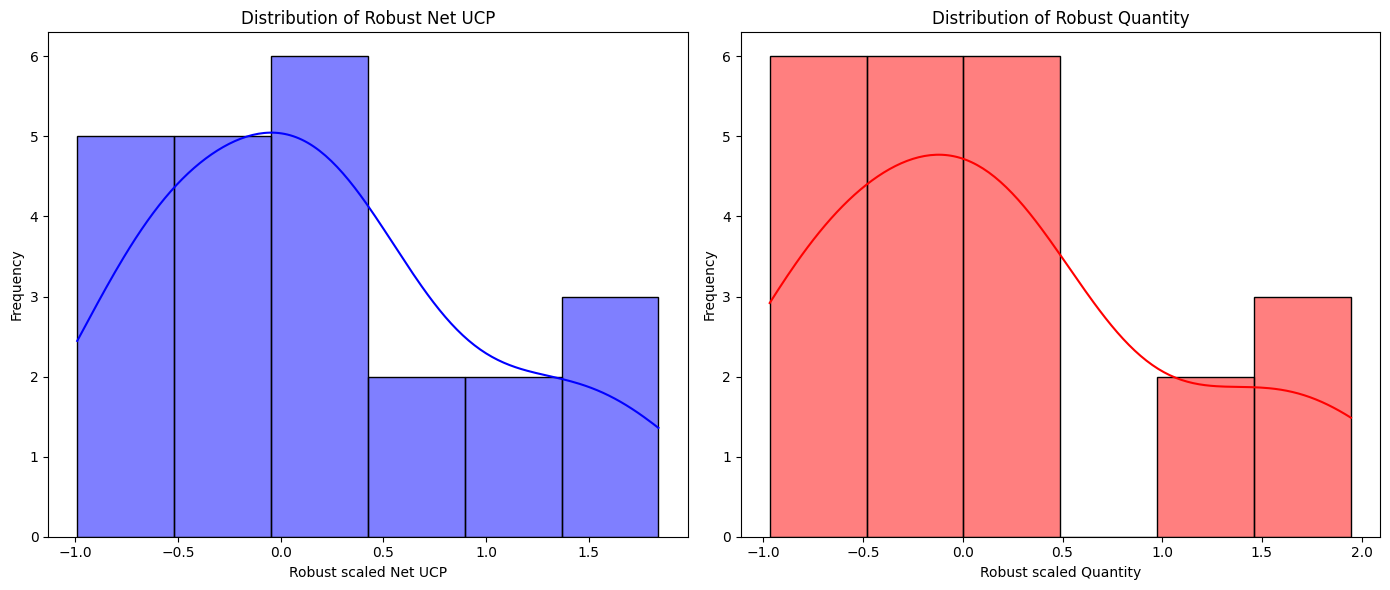

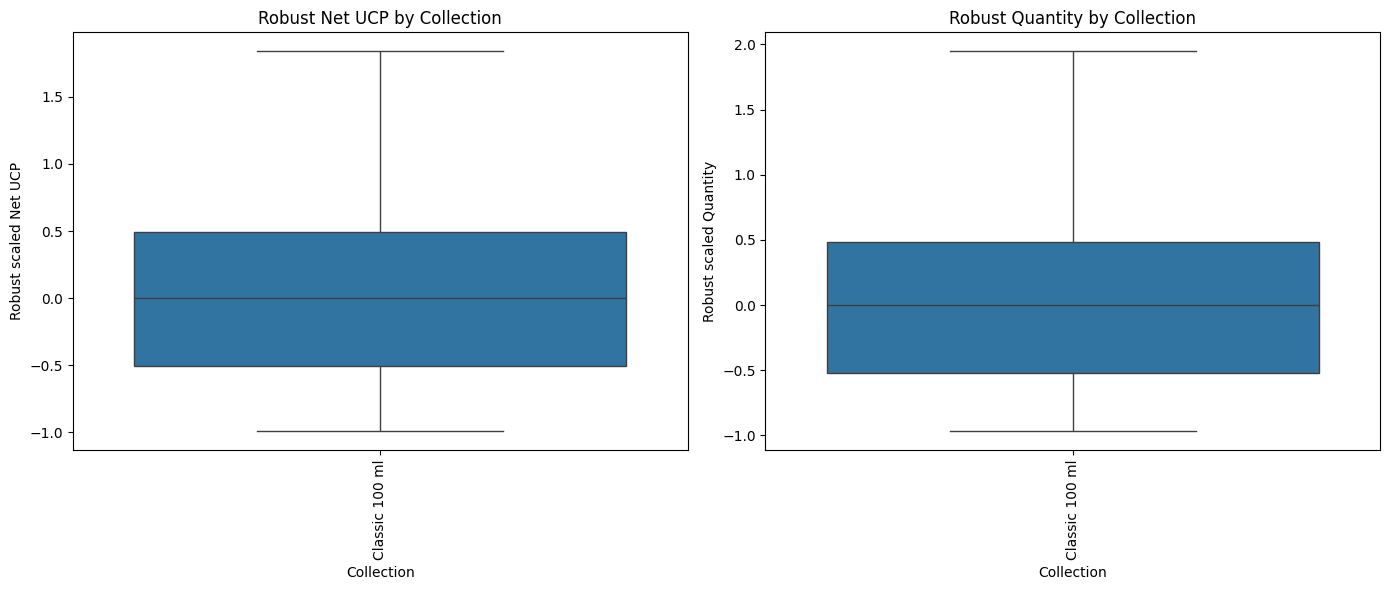

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming demo_data_monthly_classic_100_no_outliers is your DataFrame
demo_data_monthly_classic_100_no_outliers['Converted Month Key'] = pd.to_datetime(demo_data_monthly_classic_100_no_outliers['Converted Month Key'], format='%b-%y')
demo_data_monthly_classic_100_no_outliers = demo_data_monthly_classic_100_no_outliers.sort_values(by='Converted Month Key')

demo_data_monthly_classic_100_no_outliers = demo_data_monthly_classic_100_no_outliers.dropna(subset=['Net UCP', 'Quantity'])
scaler = RobustScaler()
scaled_net_ucp = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Net UCP']])
demo_data_monthly_classic_100_no_outliers['Robust_Net_UCP'] = scaled_net_ucp
scaled_quantity = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Quantity']])
demo_data_monthly_classic_100_no_outliers['Robust_Quantity'] = scaled_quantity

plt.figure(figsize=(14, 6))

# Histogram and KDE for Robust_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Robust_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Robust Net UCP')
plt.xlabel('Robust scaled Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Robust_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Robust_Quantity'], kde=True, color='r')
plt.title('Distribution of Robust Quantity')
plt.xlabel('Robust scaled Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Robust_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Robust_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Robust Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Robust scaled Net UCP')

# Box plot for Robust_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Robust_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Robust Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Robust scaled Quantity')

plt.tight_layout()
plt.show()


Column: Robust_Net_UCP
Skewness: 0.5727988351820076


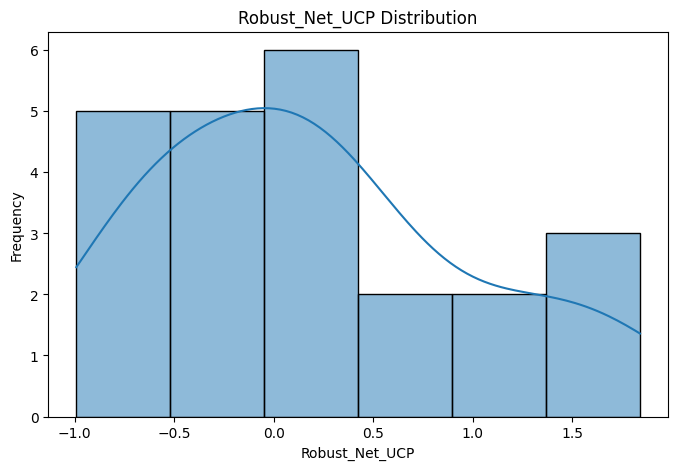

Column: Robust_Quantity
Skewness: 0.6353186566621315


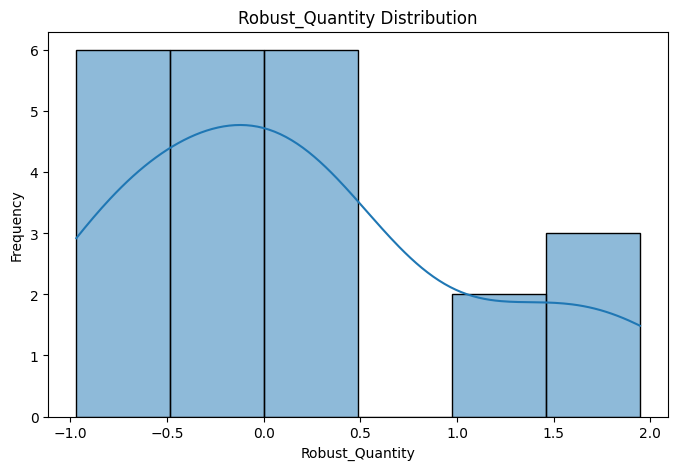

In [ ]:
from scipy.stats import skew
columns_to_check = ['Robust_Net_UCP','Robust_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_monthly_classic_100_no_outliers[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

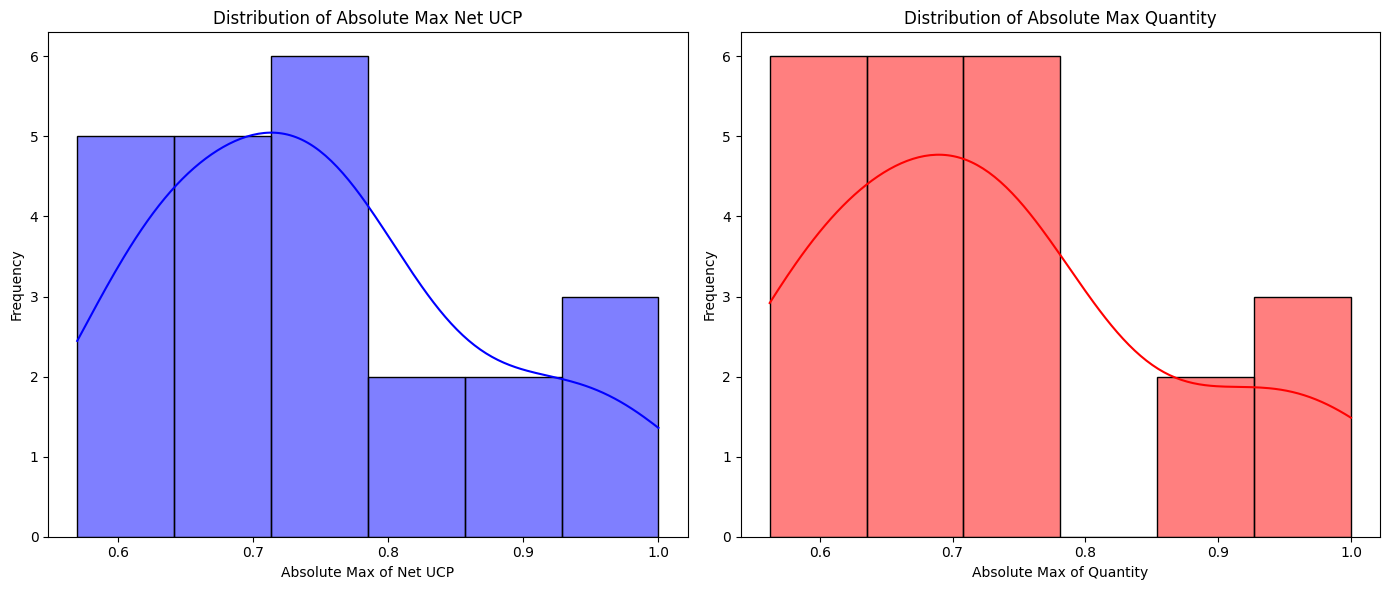

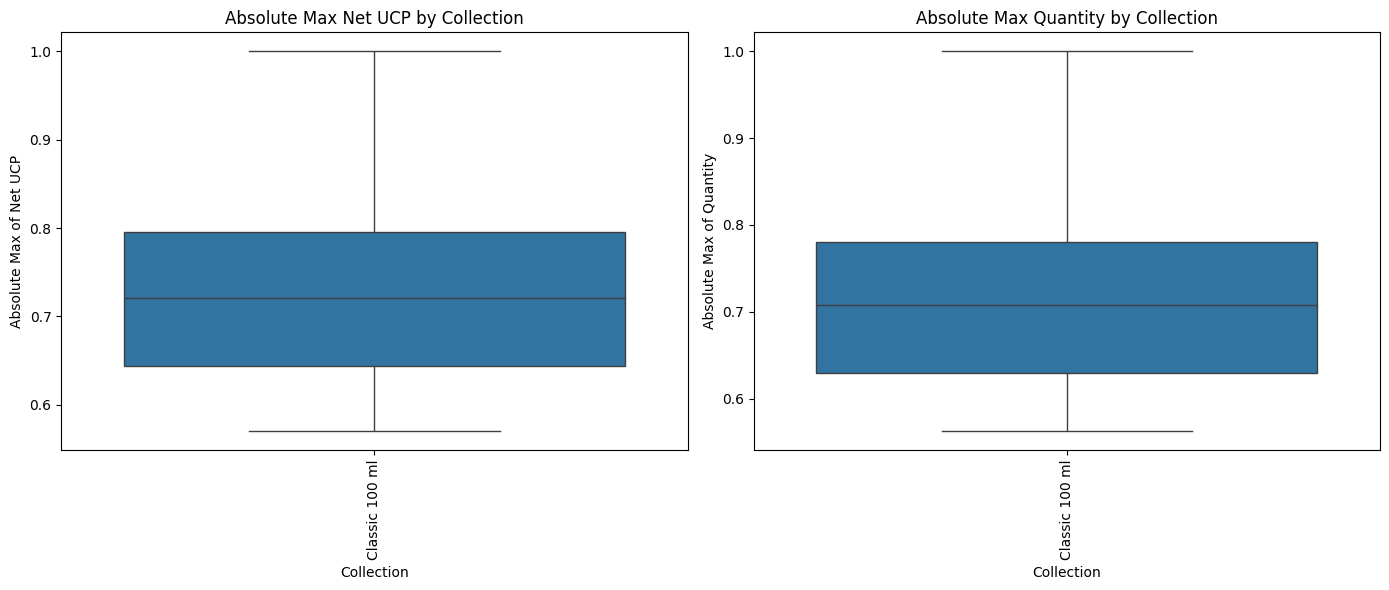

In [ ]:
# Function for Absolute Maximum Scaling
from sklearn.preprocessing import MaxAbsScaler

demo_data_monthly_classic_100_no_outliers = demo_data_monthly_classic_100_no_outliers.dropna(subset=['Net UCP', 'Quantity'])
scaler = MaxAbsScaler()
scaled_net_ucp = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Net UCP']])
demo_data_monthly_classic_100_no_outliers['Abs_Max_Net_UCP'] = scaled_net_ucp
scaled_quantity = scaler.fit_transform(demo_data_monthly_classic_100_no_outliers[['Quantity']])
demo_data_monthly_classic_100_no_outliers['Abs_Max_Quantity'] = scaled_quantity


# Plotting histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Abs_Max_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Abs_Max_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Absolute Max Net UCP')
plt.xlabel('Absolute Max of Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Abs_Max_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Abs_Max_Quantity'], kde=True, color='r')
plt.title('Distribution of Absolute Max Quantity')
plt.xlabel('Absolute Max of Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Abs_Max_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Abs_Max_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Absolute Max Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Absolute Max of Net UCP')

# Box plot for Abs_Max_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Abs_Max_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Absolute Max Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Absolute Max of Quantity')

plt.tight_layout()
plt.show()


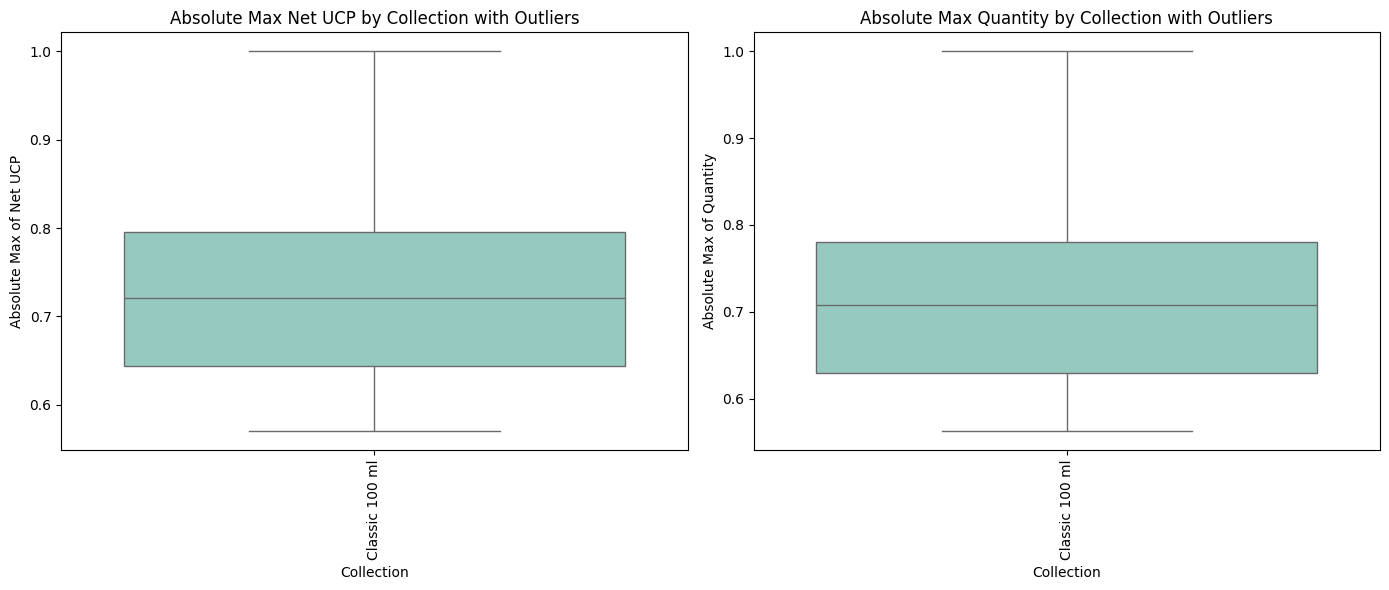

In [ ]:
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Abs_Max_Net_UCP and Abs_Max_Quantity
outliers_abs_max_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Abs_Max_Net_UCP')
outliers_abs_max_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Abs_Max_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Abs_Max_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_abs_max_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Abs_Max_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_abs_max_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Abs_Max_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Abs_Max_Net_UCP', data=demo_data_monthly_classic_100_no_outliers, palette="Set3")
sns.scatterplot(x='Collection', y='Abs_Max_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Abs_Max_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Absolute Max Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Absolute Max of Net UCP')

# Box plot for Abs_Max_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Abs_Max_Quantity', data=demo_data_monthly_classic_100_no_outliers, palette="Set3")
sns.scatterplot(x='Collection', y='Abs_Max_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Abs_Max_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Absolute Max Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Absolute Max of Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_abs_max = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_abs_max_net_ucp.index)]
demo_data_no_outliers_abs_max = demo_data_no_outliers_abs_max[~demo_data_no_outliers_abs_max.index.isin(outliers_abs_max_quantity.index)]


Column: Abs_Max_Net_UCP
Skewness: 0.5727988351820044


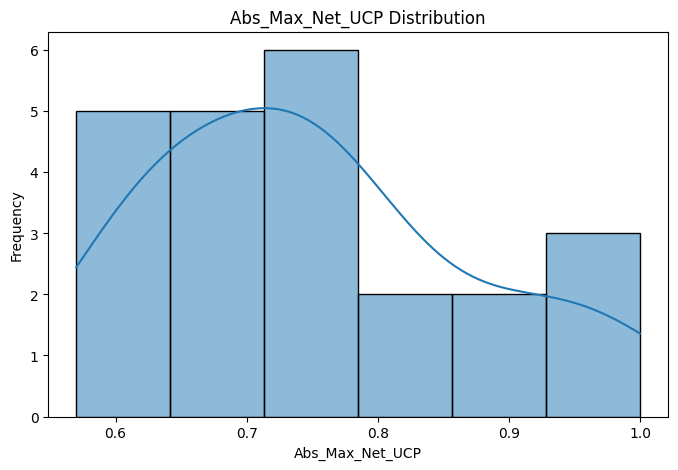

Column: Abs_Max_Quantity
Skewness: 0.635318656662126


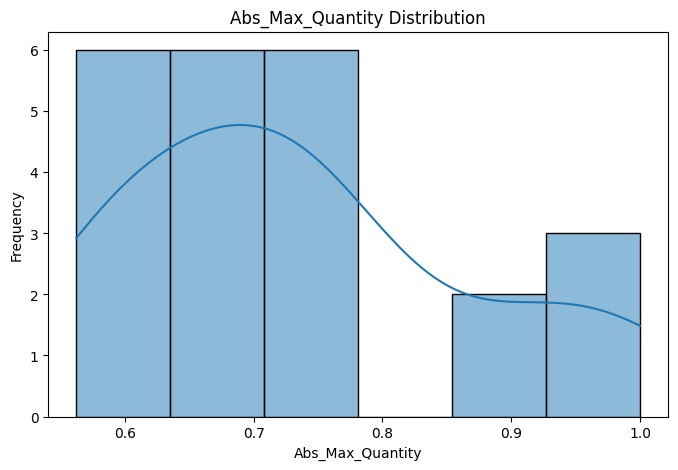

In [ ]:
from scipy.stats import skew
columns_to_check = ['Abs_Max_Net_UCP','Abs_Max_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_abs_max[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

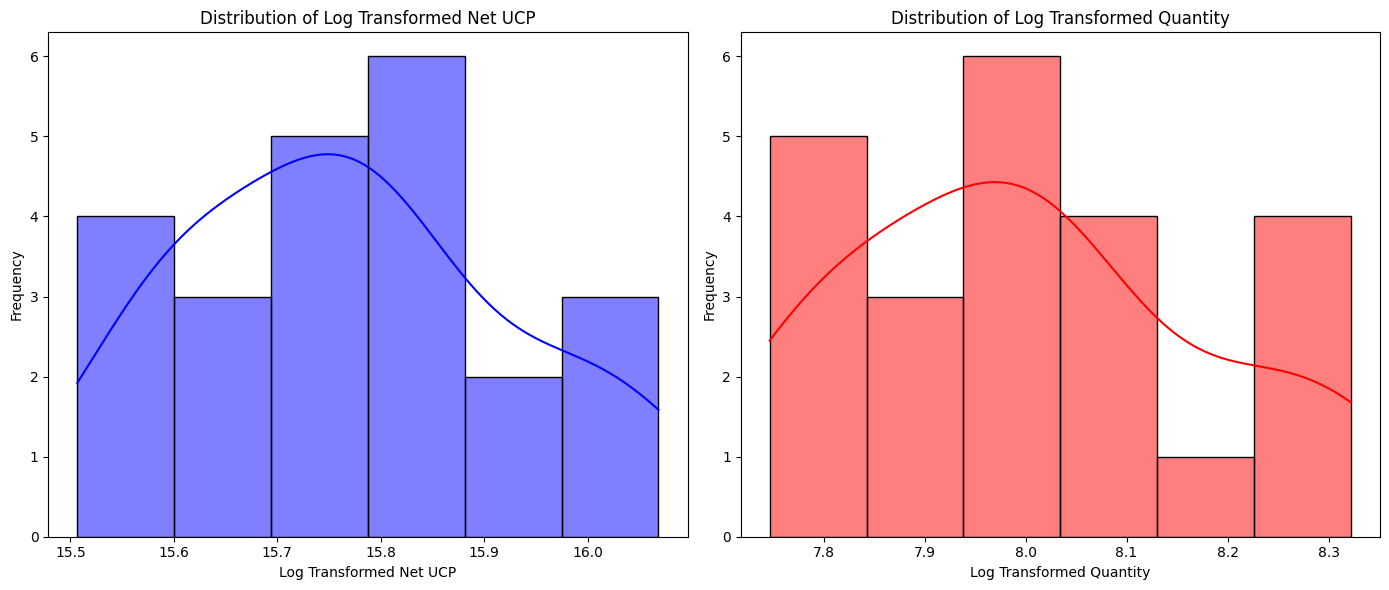

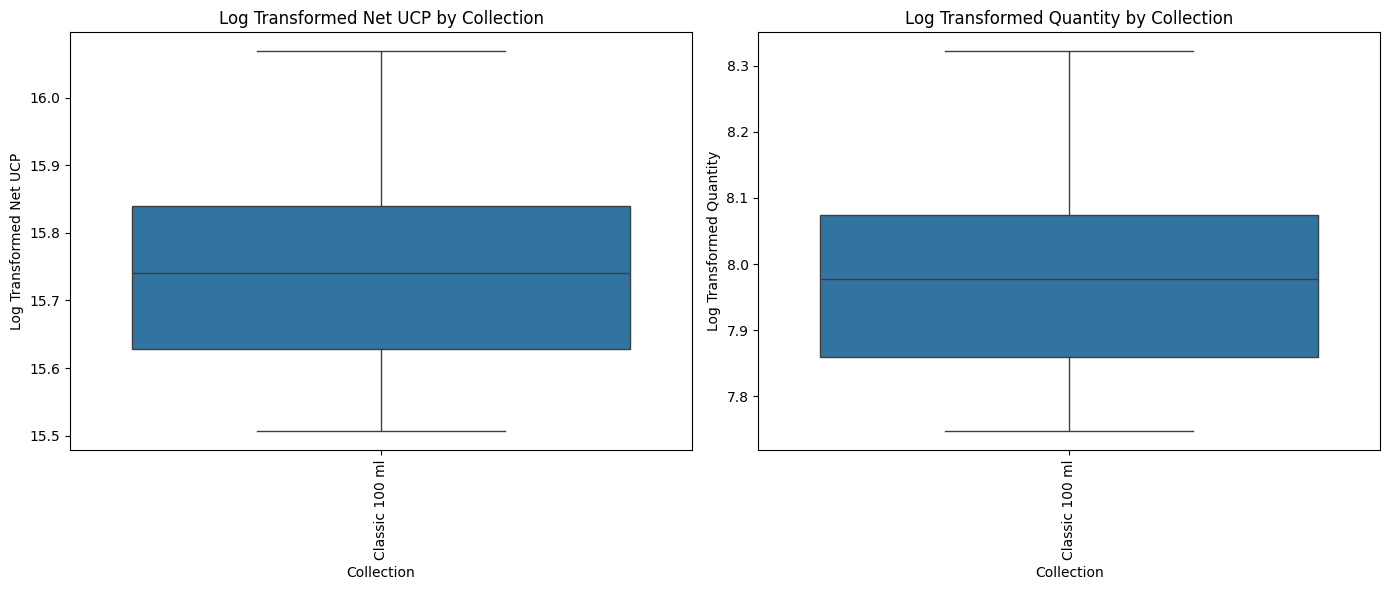

In [ ]:
# Apply log transformation to 'Net UCP' and 'Quantity'
demo_data_monthly_classic_100_no_outliers['Log_Net_UCP'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Net UCP'])
demo_data_monthly_classic_100_no_outliers['Log_Quantity'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Quantity'])

# Plot histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Log_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Log Transformed Net UCP')
plt.xlabel('Log Transformed Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Log_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Quantity'], kde=True, color='r')
plt.title('Distribution of Log Transformed Quantity')
plt.xlabel('Log Transformed Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Log_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Net UCP')

# Box plot for Log_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Quantity')

plt.tight_layout()
plt.show()


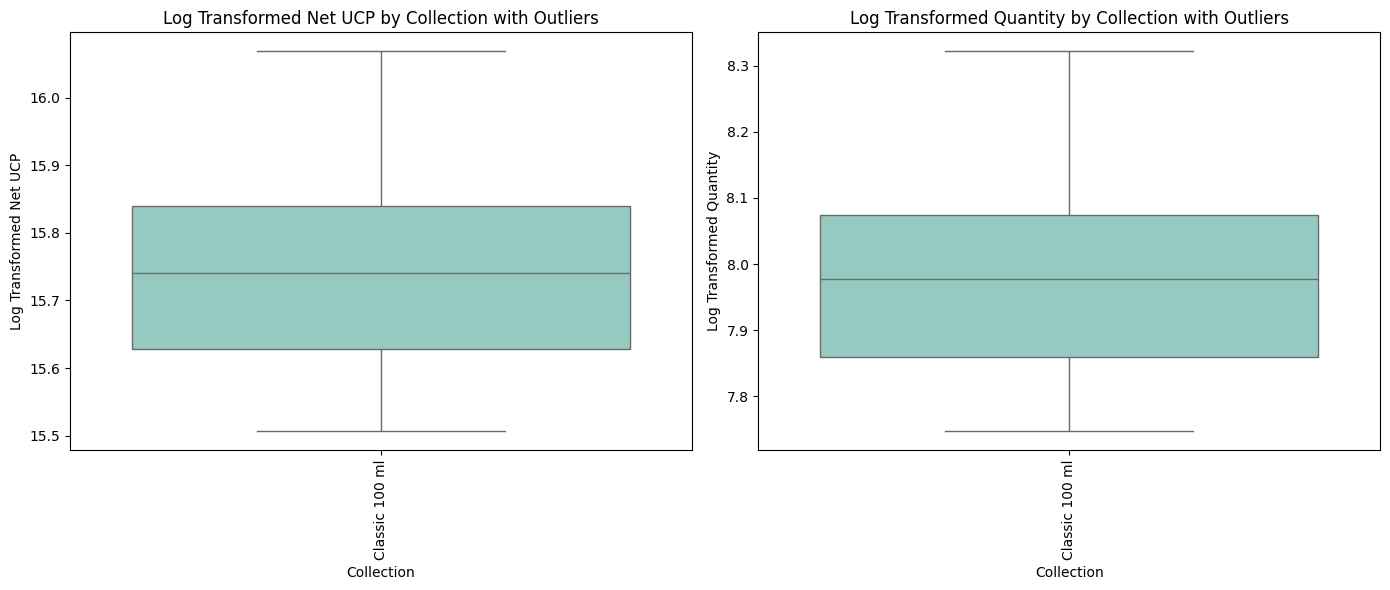

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Log_Net_UCP and Log_Quantity
outliers_log_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Net_UCP')
outliers_log_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Log_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Net_UCP', data=demo_data_monthly_classic_100_no_outliers, palette="Set3")
sns.scatterplot(x='Collection', y='Log_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Log Transformed Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Net UCP')

# Box plot for Log_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Quantity', data=demo_data_monthly_classic_100_no_outliers, palette="Set3")
sns.scatterplot(x='Collection', y='Log_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Log Transformed Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_log = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_net_ucp.index)]
demo_data_no_outliers_log = demo_data_no_outliers_log[~demo_data_no_outliers_log.index.isin(outliers_log_quantity.index)]


Column: Log_Net_UCP
Skewness: 0.3219504773804117


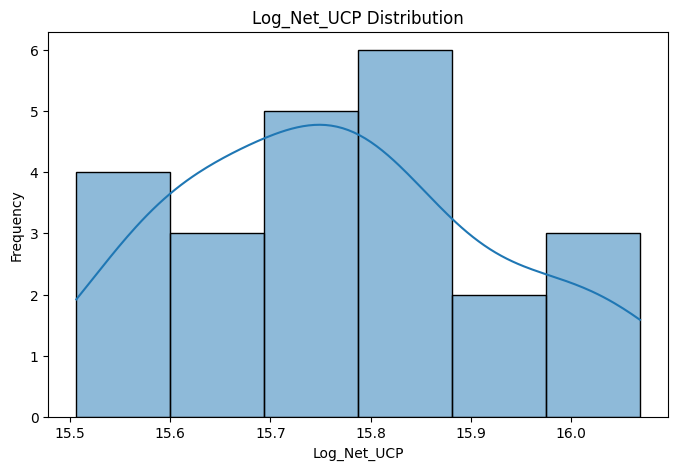

Column: Log_Quantity
Skewness: 0.37915994611445225


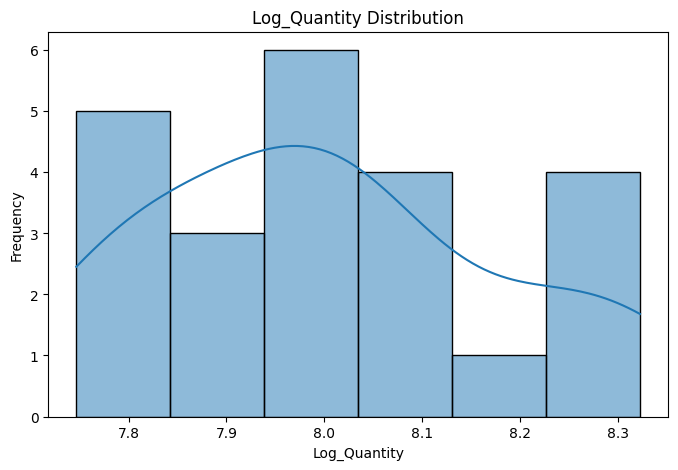

In [ ]:
from scipy.stats import skew
columns_to_check = ['Log_Net_UCP','Log_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_log[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

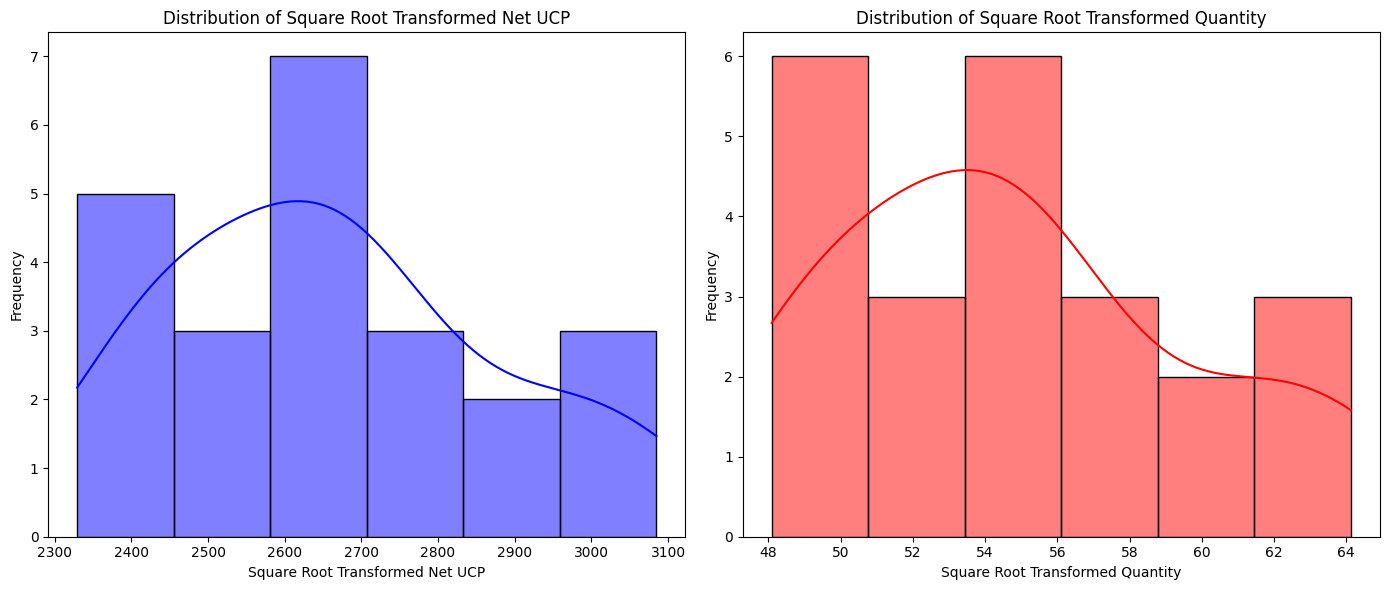

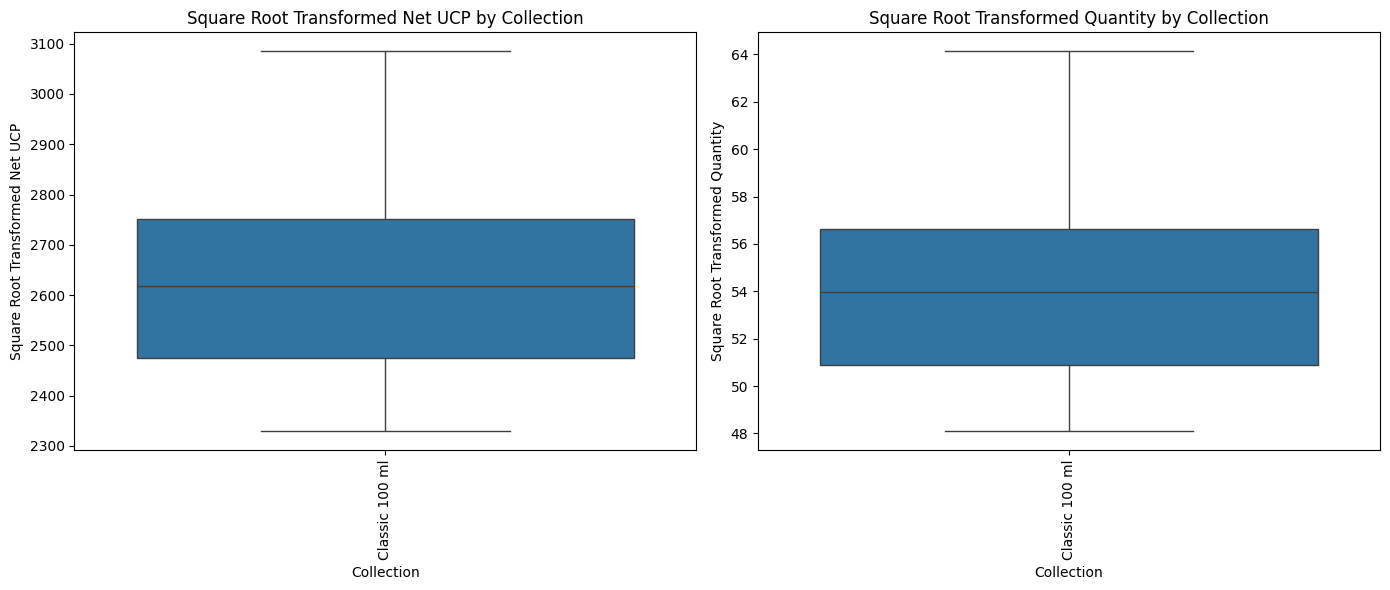

In [ ]:
# Apply square root transformation to 'Net UCP' and 'Quantity'
demo_data_monthly_classic_100_no_outliers['Sqrt_Net_UCP'] = np.sqrt(demo_data_monthly_classic_100_no_outliers['Net UCP'])
demo_data_monthly_classic_100_no_outliers['Sqrt_Quantity'] = np.sqrt(demo_data_monthly_classic_100_no_outliers['Quantity'])

# Plot histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Sqrt_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Sqrt_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Square Root Transformed Net UCP')
plt.xlabel('Square Root Transformed Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Sqrt_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Sqrt_Quantity'], kde=True, color='r')
plt.title('Distribution of Square Root Transformed Quantity')
plt.xlabel('Square Root Transformed Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Sqrt_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Square Root Transformed Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Square Root Transformed Net UCP')

# Box plot for Sqrt_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Square Root Transformed Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Square Root Transformed Quantity')

plt.tight_layout()
plt.show()


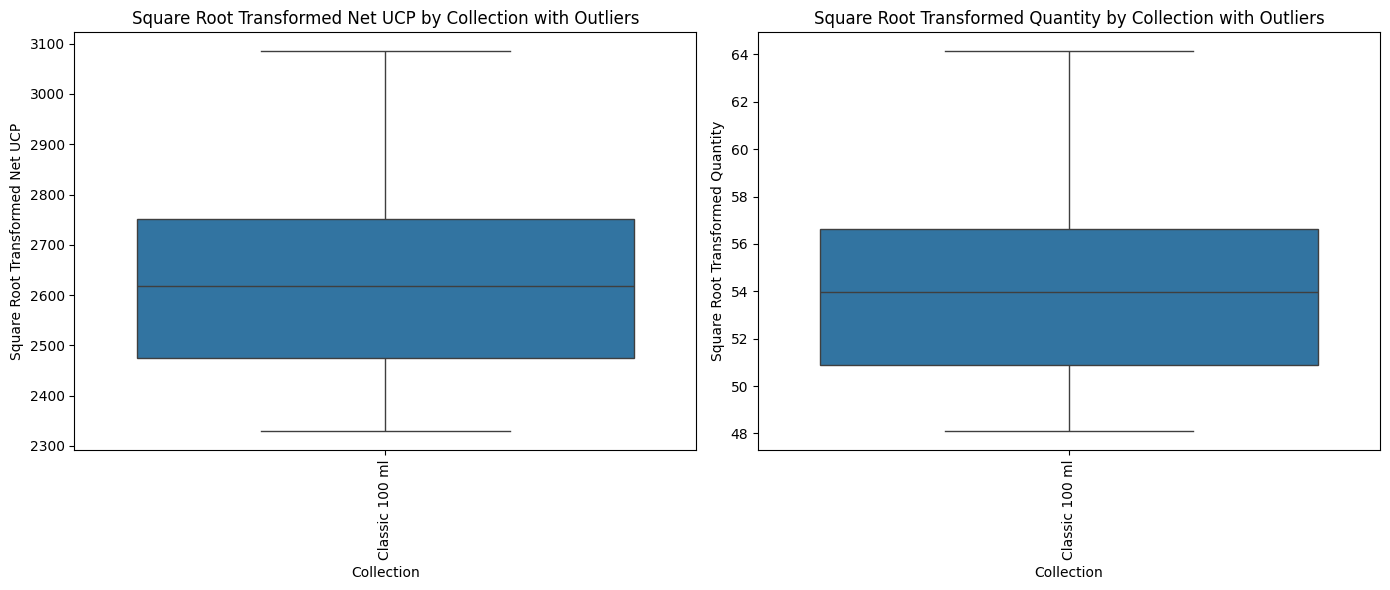

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Sqrt_Net_UCP and Sqrt_Quantity
outliers_sqrt_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Sqrt_Net_UCP')
outliers_sqrt_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Sqrt_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Sqrt_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_sqrt_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Sqrt_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_sqrt_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Sqrt_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Sqrt_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Square Root Transformed Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Square Root Transformed Net UCP')

# Box plot for Sqrt_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Sqrt_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Square Root Transformed Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Square Root Transformed Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_sqrt = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_sqrt_net_ucp.index)]
demo_data_no_outliers_sqrt = demo_data_no_outliers_sqrt[~demo_data_no_outliers_sqrt.index.isin(outliers_sqrt_quantity.index)]


Column: Sqrt_Net_UCP
Skewness: 0.44841922166593196


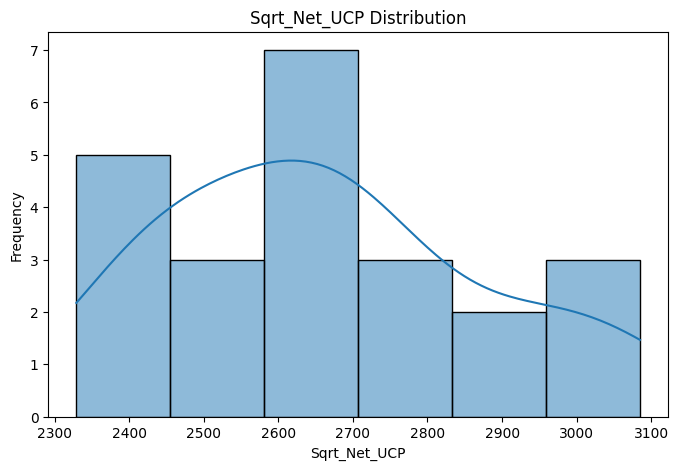

Column: Sqrt_Quantity
Skewness: 0.5088694303107161


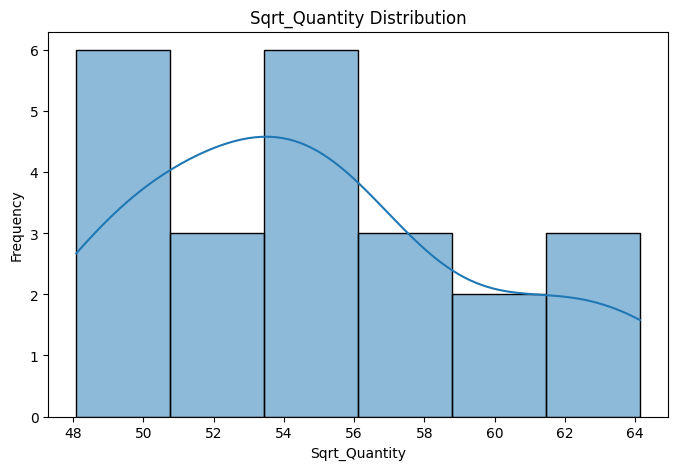

In [ ]:
from scipy.stats import skew
columns_to_check = ['Sqrt_Net_UCP','Sqrt_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_sqrt[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

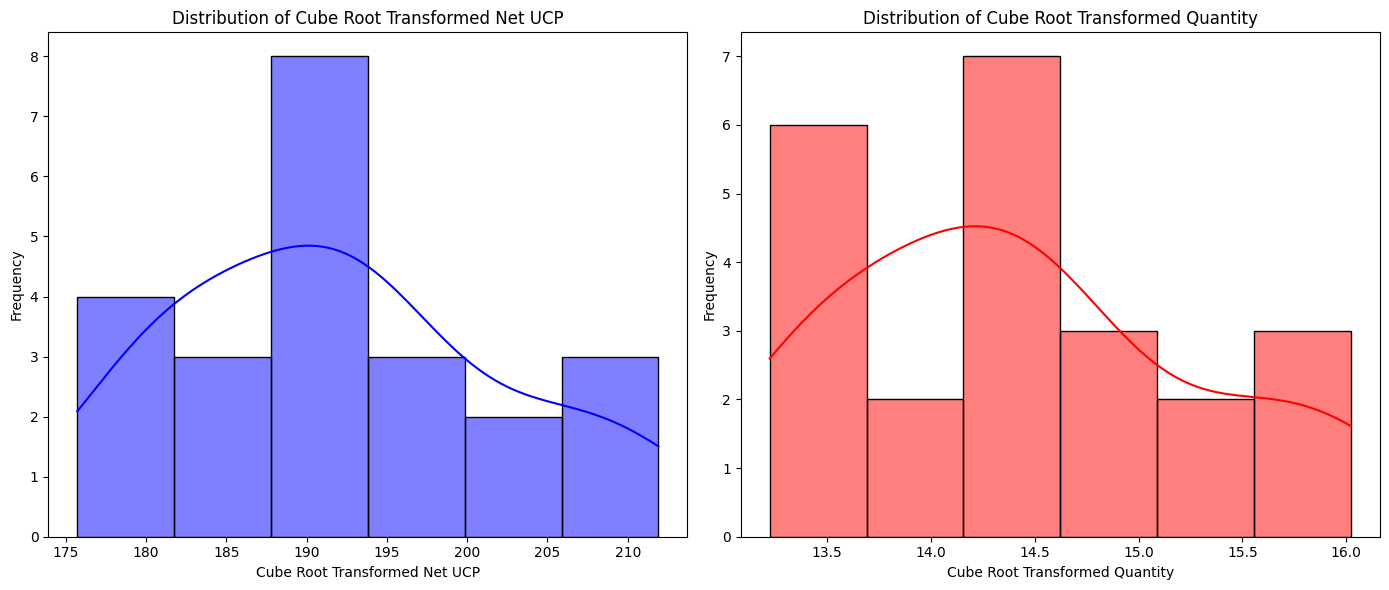

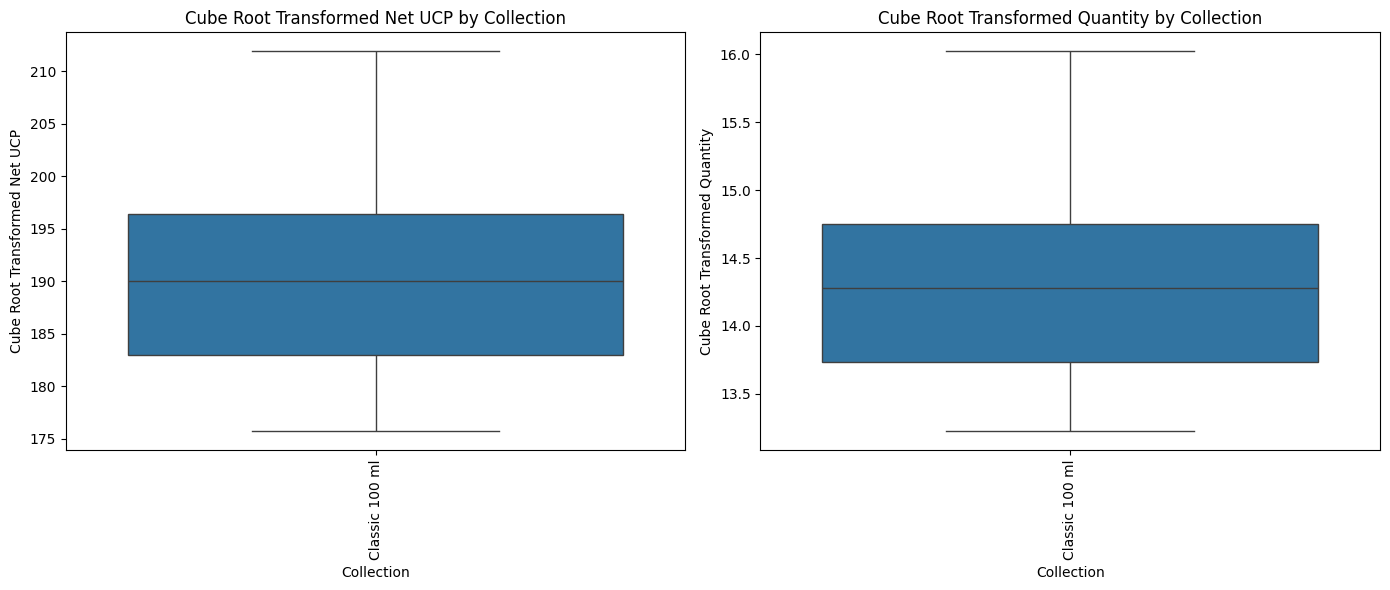

In [ ]:
# Apply cube root transformation to 'Net UCP' and 'Quantity'
demo_data_monthly_classic_100_no_outliers['Cbrt_Net_UCP'] = np.cbrt(demo_data_monthly_classic_100_no_outliers['Net UCP'])
demo_data_monthly_classic_100_no_outliers['Cbrt_Quantity'] = np.cbrt(demo_data_monthly_classic_100_no_outliers['Quantity'])

# Plot histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Cbrt_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Cbrt_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Cube Root Transformed Net UCP')
plt.xlabel('Cube Root Transformed Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Cbrt_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Cbrt_Quantity'], kde=True, color='r')
plt.title('Distribution of Cube Root Transformed Quantity')
plt.xlabel('Cube Root Transformed Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Cbrt_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Net UCP')

# Box plot for Cbrt_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Quantity')

plt.tight_layout()
plt.show()


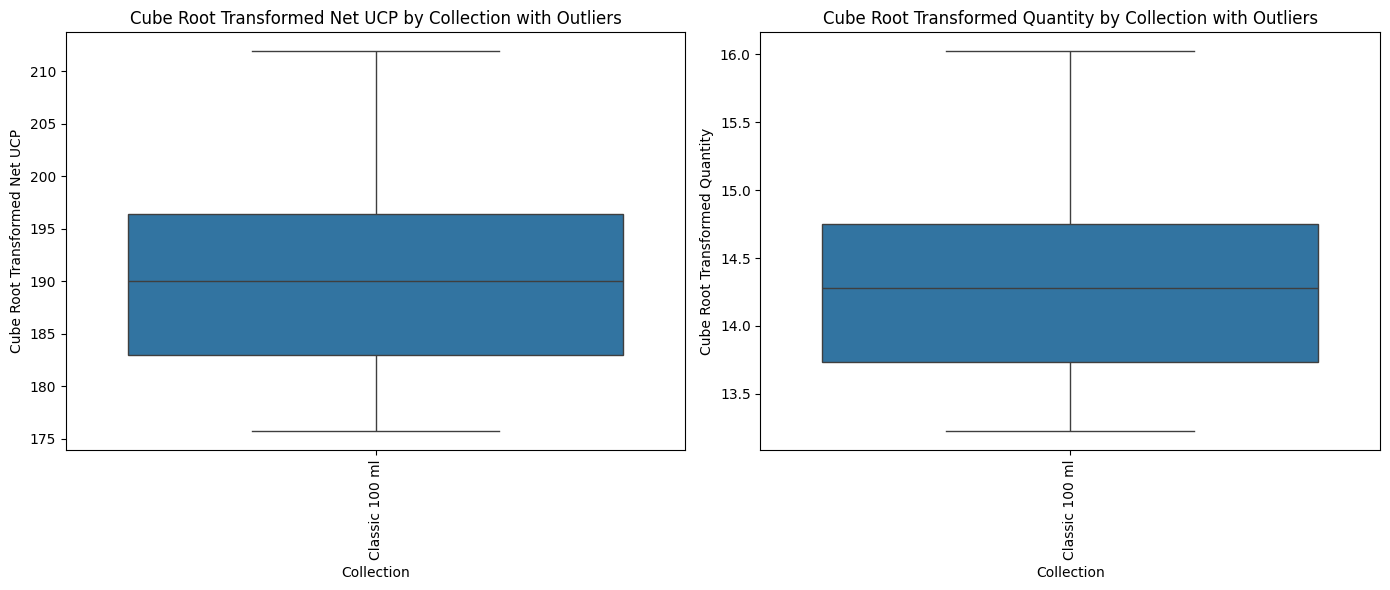

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Cbrt_Net_UCP and Cbrt_Quantity
outliers_cbrt_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Cbrt_Net_UCP')
outliers_cbrt_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Cbrt_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Cbrt_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_cbrt_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Cbrt_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_cbrt_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Cbrt_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Cbrt_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Net UCP')

# Box plot for Cbrt_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Cbrt_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_cbrt = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_cbrt_net_ucp.index)]
demo_data_no_outliers_cbrt = demo_data_no_outliers_cbrt[~demo_data_no_outliers_cbrt.index.isin(outliers_cbrt_quantity.index)]


Column: Cbrt_Net_UCP
Skewness: 0.40644992051625267


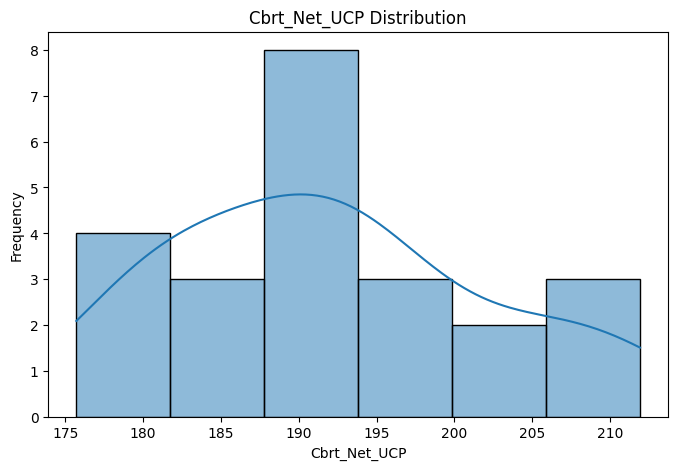

Column: Cbrt_Quantity
Skewness: 0.465902134994638


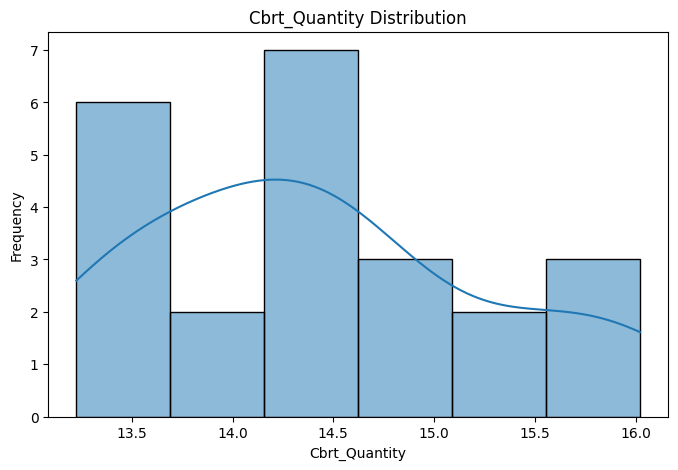

In [ ]:
from scipy.stats import skew
columns_to_check = ['Cbrt_Net_UCP','Cbrt_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_cbrt[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
demo_data_no_outliers_cbrt.head()

Year QTR Month Key      Collection     Net UCP  Quantity  \
1   2022-23  Q1       Apr  Classic 100 ml  6125678.16    2624.0   
23  2022-23  Q1       May  Classic 100 ml  6132882.40    2557.0   
12  2022-23  Q1       Jun  Classic 100 ml  5425345.28    2313.0   
45  2022-23  Q2       Jul  Classic 100 ml  6698542.03    2863.0   
34  2022-23  Q2       Aug  Classic 100 ml  8377355.54    3754.0   

   Converted Month Key  Z_Score_Net_UCP  Z_Score_Quantity  Outlier_Net_UCP  \
1           2022-04-01        -0.893111         -0.747143            False   
23          2022-05-01        -0.886718         -0.870638            False   
12          2022-06-01        -1.514632         -1.320382            False   
45          2022-07-01        -0.384715         -0.306615            False   
34          2022-08-01         1.105173          1.335689            False   

    ...  Outlier_Log_Net_UCP  Outlier_Log_Quantity  Sqrt_Net_UCP  \
1   ...                False                 False   2475.010739   
23  ...                False                 False   2476.465707   
12  ...                False                 False   2329.237060   
45  ...                False                 False   2588.154174   
34  ...                False                 False   2894.366172   

    Sqrt_Quantity  Outlier_Sqrt_Net_UCP  Outlier_Sqrt_Quantity  Cbrt_Net_UCP  \
1       51.224994                 False                  False    182.972038   
23      50.566788                 False                  False    183.043739   
12      48.093659                 False                  False    175.715118   
45      53.507009                 False                  False    188.506688   
34      61.269895                 False                  False    203.096442   

    Cbrt_Quantity  Outlier_Cbrt_Net_UCP  Outlier_Cbrt_Quantity  
1       13.792869                 False                  False  
23      13.674462                 False                  False  
12      13.224884                 False                  False  
45      14.199524                 False                  False  
34      15.541685                 False                  False  

[5 rows x 31 columns]

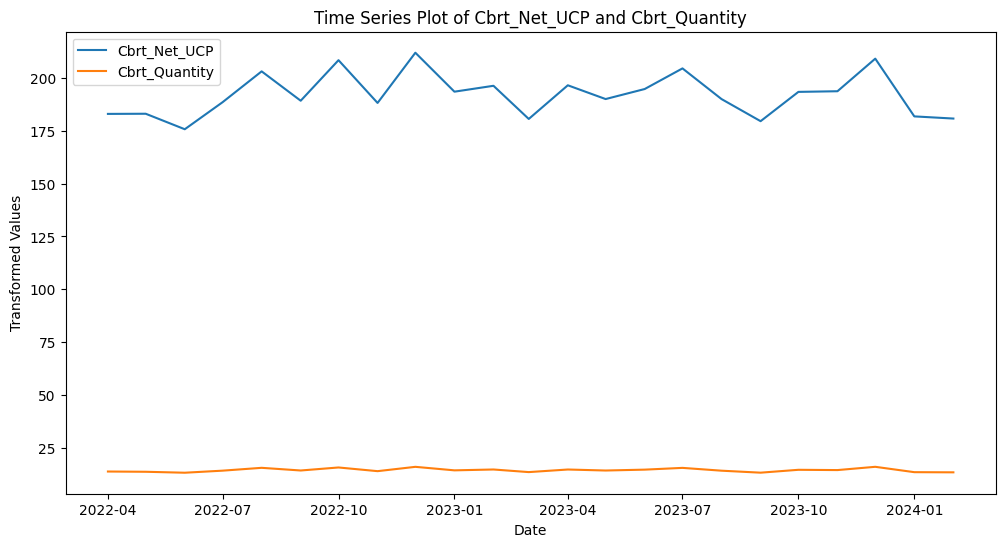

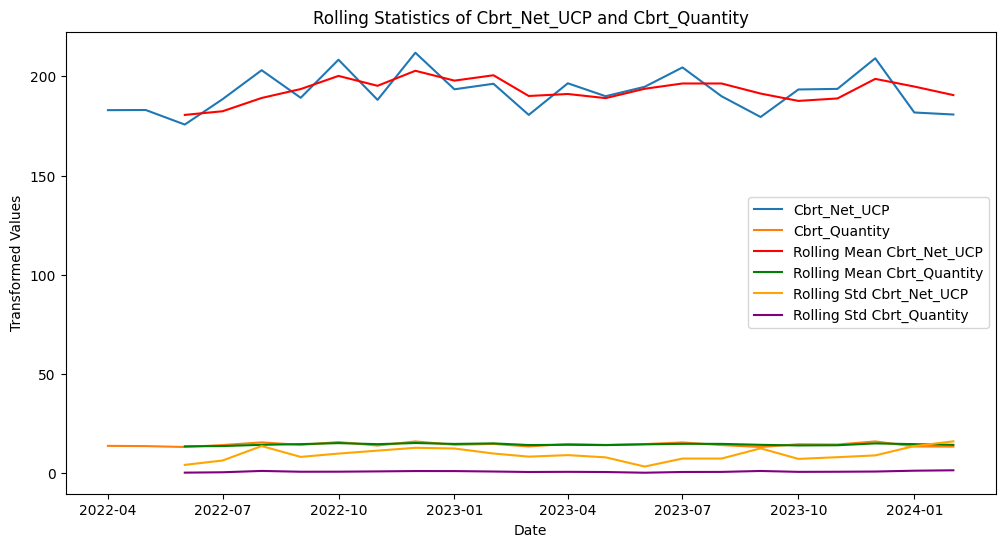

Augmented Dickey-Fuller Test for Cbrt_Net_UCP:
ADF Statistic: -3.69177733370511
p-value: 0.004230311192745907
Critical Values:
   1%: -3.8092091249999998
   5%: -3.0216450000000004
   10%: -2.6507125

Augmented Dickey-Fuller Test for Cbrt_Quantity:
ADF Statistic: -3.9963972536666352
p-value: 0.0014294942262478882
Critical Values:
   1%: -3.8092091249999998
   5%: -3.0216450000000004
   10%: -2.6507125


In [ ]:
#STATIONARITY CHECK
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],demo_data_no_outliers_cbrt['Cbrt_Net_UCP'], label='Cbrt_Net_UCP')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],demo_data_no_outliers_cbrt['Cbrt_Quantity'], label='Cbrt_Quantity')
plt.title('Time Series Plot of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = demo_data_no_outliers_cbrt[['Cbrt_Net_UCP', 'Cbrt_Quantity']].rolling(window=3).mean()
rolling_std = demo_data_no_outliers_cbrt[['Cbrt_Net_UCP', 'Cbrt_Quantity']].rolling(window=3).std()

plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],demo_data_no_outliers_cbrt['Cbrt_Net_UCP'], label='Cbrt_Net_UCP')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],demo_data_no_outliers_cbrt['Cbrt_Quantity'], label='Cbrt_Quantity')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],rolling_mean['Cbrt_Net_UCP'], label='Rolling Mean Cbrt_Net_UCP', color='red')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],rolling_mean['Cbrt_Quantity'], label='Rolling Mean Cbrt_Quantity', color='green')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],rolling_std['Cbrt_Net_UCP'], label='Rolling Std Cbrt_Net_UCP', color='orange')
plt.plot(demo_data_no_outliers_cbrt['Converted Month Key'],rolling_std['Cbrt_Quantity'], label='Rolling Std Cbrt_Quantity', color='purple')
plt.title('Rolling Statistics of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('Augmented Dickey-Fuller Test for Cbrt_Net_UCP:')
adf_test(demo_data_no_outliers_cbrt['Cbrt_Net_UCP'])

print('\nAugmented Dickey-Fuller Test for Cbrt_Quantity:')
adf_test(demo_data_no_outliers_cbrt['Cbrt_Quantity'])


In [ ]:
rolling_mean.head()

Cbrt_Net_UCP  Cbrt_Quantity
1            NaN            NaN
23           NaN            NaN
12    180.576965      13.564072
45    182.421848      13.699623
34    189.106083      14.322031

In [ ]:
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Function to split sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assume demo_data_monthly_classic_100 is a DataFrame with columns 'Cbrt_Net_UCP' and 'Cbrt_Quantity'
quantity = demo_data_no_outliers_cbrt['Cbrt_Quantity'].values

# scaler = MinMaxScaler()
# quantity = scaler.fit_transform(quantity.reshape(-1, 1)).flatten()

n_steps = 5
X, y = split_sequence(quantity, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
# model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 40313 (157.47 KB)
Trainable params: 40313 (157.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X

array([[[13.79286896],
        [13.67446181],
        [13.22488419],
        [14.19952389],
        [15.54168454]],

       [[13.67446181],
        [13.22488419],
        [14.19952389],
        [15.54168454],
        [14.27843915]],

       [[13.22488419],
        [14.19952389],
        [15.54168454],
        [14.27843915],
        [15.70825428]],

       [[14.19952389],
        [15.54168454],
        [14.27843915],
        [15.70825428],
        [13.96419422]],

       [[15.54168454],
        [14.27843915],
        [15.70825428],
        [13.96419422],
        [16.01040989]],

       [[14.27843915],
        [15.70825428],
        [13.96419422],
        [16.01040989],
        [14.34678144]],

       [[15.70825428],
        [13.96419422],
        [16.01040989],
        [14.34678144],
        [14.75299183]],

       [[13.96419422],
        [16.01040989],
        [14.34678144],
        [14.75299183],
        [13.51940511]],

       [[16.01040989],
        [14.34678144],
        [14.752991

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
# Define the model checkpoint callback
cp1 = ModelCheckpoint('model1/best_model.h5', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, y_train, epochs=500, callbacks=[cp1])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 231.7575 - root_mean_squared_error: 15.2236

1/1 [==============================] - 7s 7s/step - loss: 231.7575 - root_mean_squared_error: 15.2236
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 231.1736 - root_mean_squared_error: 15.2044

1/1 [==============================] - 0s 18ms/step - loss: 231.1736 - root_mean_squared_error: 15.2044
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 230.5925 - root_mean_squared_error: 15.1853

1/1 [==============================] - 0s 18ms/step - loss: 230.5925 - root_mean_squared_error: 15.1853
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 230.0144 - root_mean_squared_error: 15.1662

1/1 [==============================] - 0s 17ms/step - loss: 230.0144 - root_mean_squared_error: 15.1662
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 229.4392 - root_mean_squared_error: 15.1473

1/1 [==============================] - 0s 19ms/step - loss: 229.4392 - root_mean_squared_error: 15.1473
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 228.8673 - root_mean_squared_error: 15.1284

1/1 [==============================] - 0s 20ms/step - loss: 228.8673 - root_mean_squared_error: 15.1284
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 228.2986 - root_mean_squared_error: 15.1096

1/1 [==============================] - 0s 19ms/step - loss: 228.2986 - root_mean_squared_error: 15.1096
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 227.7334 - root_mean_squared_error: 15.0908

1/1 [==============================] - 0s 18ms/step - loss: 227.7334 - root_mean_squared_error: 15.0908
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 227.1717 - root_mean_squared_error: 15.0722

1/1 [==============================] - 0s 21ms/step - loss: 227.1717 - root_mean_squared_error: 15.0722
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 226.6201 - root_mean_squared_error: 15.0539

1/1 [==============================] - 0s 18ms/step - loss: 226.6201 - root_mean_squared_error: 15.0539
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 226.1896 - root_mean_squared_error: 15.0396

1/1 [==============================] - 0s 18ms/step - loss: 226.1896 - root_mean_squared_error: 15.0396
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 225.8145 - root_mean_squared_error: 15.0271

1/1 [==============================] - 0s 18ms/step - loss: 225.8145 - root_mean_squared_error: 15.0271
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 225.4436 - root_mean_squared_error: 15.0148

1/1 [==============================] - 0s 22ms/step - loss: 225.4436 - root_mean_squared_error: 15.0148
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 225.0760 - root_mean_squared_error: 15.0025

1/1 [==============================] - 0s 19ms/step - loss: 225.0760 - root_mean_squared_error: 15.0025
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 224.7184 - root_mean_squared_error: 14.9906

1/1 [==============================] - 0s 24ms/step - loss: 224.7184 - root_mean_squared_error: 14.9906
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 224.4725 - root_mean_squared_error: 14.9824

1/1 [==============================] - 0s 18ms/step - loss: 224.4725 - root_mean_squared_error: 14.9824
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 224.2276 - root_mean_squared_error: 14.9742

1/1 [==============================] - 0s 18ms/step - loss: 224.2276 - root_mean_squared_error: 14.9742
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 223.9758 - root_mean_squared_error: 14.9658

1/1 [==============================] - 0s 18ms/step - loss: 223.9758 - root_mean_squared_error: 14.9658
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 223.7194 - root_mean_squared_error: 14.9573

1/1 [==============================] - 0s 19ms/step - loss: 223.7194 - root_mean_squared_error: 14.9573
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 223.4597 - root_mean_squared_error: 14.9486

1/1 [==============================] - 0s 20ms/step - loss: 223.4597 - root_mean_squared_error: 14.9486
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 223.1982 - root_mean_squared_error: 14.9398

1/1 [==============================] - 0s 25ms/step - loss: 223.1982 - root_mean_squared_error: 14.9398
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 222.9356 - root_mean_squared_error: 14.9310

1/1 [==============================] - 0s 24ms/step - loss: 222.9356 - root_mean_squared_error: 14.9310
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 222.6723 - root_mean_squared_error: 14.9222

1/1 [==============================] - 0s 21ms/step - loss: 222.6723 - root_mean_squared_error: 14.9222
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 222.4086 - root_mean_squared_error: 14.9134

1/1 [==============================] - 0s 18ms/step - loss: 222.4086 - root_mean_squared_error: 14.9134
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 222.1447 - root_mean_squared_error: 14.9045

1/1 [==============================] - 0s 20ms/step - loss: 222.1447 - root_mean_squared_error: 14.9045
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 221.8808 - root_mean_squared_error: 14.8957

1/1 [==============================] - 0s 19ms/step - loss: 221.8808 - root_mean_squared_error: 14.8957
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 221.6171 - root_mean_squared_error: 14.8868

1/1 [==============================] - 0s 20ms/step - loss: 221.6171 - root_mean_squared_error: 14.8868
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 221.3537 - root_mean_squared_error: 14.8780

1/1 [==============================] - 0s 20ms/step - loss: 221.3537 - root_mean_squared_error: 14.8780
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 221.0907 - root_mean_squared_error: 14.8691

1/1 [==============================] - 0s 18ms/step - loss: 221.0907 - root_mean_squared_error: 14.8691
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 220.8277 - root_mean_squared_error: 14.8603

1/1 [==============================] - 0s 18ms/step - loss: 220.8277 - root_mean_squared_error: 14.8603
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 220.5652 - root_mean_squared_error: 14.8514

1/1 [==============================] - 0s 19ms/step - loss: 220.5652 - root_mean_squared_error: 14.8514
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 220.3044 - root_mean_squared_error: 14.8427

1/1 [==============================] - 0s 19ms/step - loss: 220.3044 - root_mean_squared_error: 14.8427
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 220.0505 - root_mean_squared_error: 14.8341

1/1 [==============================] - 0s 18ms/step - loss: 220.0505 - root_mean_squared_error: 14.8341
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 219.8193 - root_mean_squared_error: 14.8263

1/1 [==============================] - 0s 17ms/step - loss: 219.8193 - root_mean_squared_error: 14.8263
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 219.6487 - root_mean_squared_error: 14.8205

1/1 [==============================] - 0s 23ms/step - loss: 219.6487 - root_mean_squared_error: 14.8205
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 219.5229 - root_mean_squared_error: 14.8163

1/1 [==============================] - 0s 19ms/step - loss: 219.5229 - root_mean_squared_error: 14.8163
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 219.4111 - root_mean_squared_error: 14.8125

1/1 [==============================] - 0s 19ms/step - loss: 219.4111 - root_mean_squared_error: 14.8125
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 219.3040 - root_mean_squared_error: 14.8089

1/1 [==============================] - 0s 18ms/step - loss: 219.3040 - root_mean_squared_error: 14.8089
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 219.1893 - root_mean_squared_error: 14.8050

1/1 [==============================] - 0s 18ms/step - loss: 219.1893 - root_mean_squared_error: 14.8050
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 219.0681 - root_mean_squared_error: 14.8009

1/1 [==============================] - 0s 19ms/step - loss: 219.0681 - root_mean_squared_error: 14.8009
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 218.9415 - root_mean_squared_error: 14.7967

1/1 [==============================] - 0s 18ms/step - loss: 218.9415 - root_mean_squared_error: 14.7967
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 218.8108 - root_mean_squared_error: 14.7923

1/1 [==============================] - 0s 18ms/step - loss: 218.8108 - root_mean_squared_error: 14.7923
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 218.6761 - root_mean_squared_error: 14.7877

1/1 [==============================] - 0s 20ms/step - loss: 218.6761 - root_mean_squared_error: 14.7877
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 218.5382 - root_mean_squared_error: 14.7830

1/1 [==============================] - 0s 21ms/step - loss: 218.5382 - root_mean_squared_error: 14.7830
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 218.3975 - root_mean_squared_error: 14.7783

1/1 [==============================] - 0s 25ms/step - loss: 218.3975 - root_mean_squared_error: 14.7783
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 218.2545 - root_mean_squared_error: 14.7734

1/1 [==============================] - 0s 22ms/step - loss: 218.2545 - root_mean_squared_error: 14.7734
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 218.1093 - root_mean_squared_error: 14.7685

1/1 [==============================] - 0s 21ms/step - loss: 218.1093 - root_mean_squared_error: 14.7685
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 217.9625 - root_mean_squared_error: 14.7636

1/1 [==============================] - 0s 21ms/step - loss: 217.9625 - root_mean_squared_error: 14.7636
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 217.8142 - root_mean_squared_error: 14.7585

1/1 [==============================] - 0s 20ms/step - loss: 217.8142 - root_mean_squared_error: 14.7585
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 217.6648 - root_mean_squared_error: 14.7535

1/1 [==============================] - 0s 24ms/step - loss: 217.6648 - root_mean_squared_error: 14.7535
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 217.5145 - root_mean_squared_error: 14.7484

1/1 [==============================] - 0s 20ms/step - loss: 217.5145 - root_mean_squared_error: 14.7484
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 217.3634 - root_mean_squared_error: 14.7432

1/1 [==============================] - 0s 18ms/step - loss: 217.3634 - root_mean_squared_error: 14.7432
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 217.2134 - root_mean_squared_error: 14.7382

1/1 [==============================] - 0s 21ms/step - loss: 217.2134 - root_mean_squared_error: 14.7382
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 217.0708 - root_mean_squared_error: 14.7333

1/1 [==============================] - 0s 22ms/step - loss: 217.0708 - root_mean_squared_error: 14.7333
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 216.9346 - root_mean_squared_error: 14.7287

1/1 [==============================] - 0s 19ms/step - loss: 216.9346 - root_mean_squared_error: 14.7287
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 216.7986 - root_mean_squared_error: 14.7241

1/1 [==============================] - 0s 21ms/step - loss: 216.7986 - root_mean_squared_error: 14.7241
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 216.6654 - root_mean_squared_error: 14.7196

1/1 [==============================] - 0s 24ms/step - loss: 216.6654 - root_mean_squared_error: 14.7196
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 216.5388 - root_mean_squared_error: 14.7153

1/1 [==============================] - 0s 20ms/step - loss: 216.5388 - root_mean_squared_error: 14.7153
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 216.4162 - root_mean_squared_error: 14.7111

1/1 [==============================] - 0s 22ms/step - loss: 216.4162 - root_mean_squared_error: 14.7111
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 216.2904 - root_mean_squared_error: 14.7068

1/1 [==============================] - 0s 22ms/step - loss: 216.2904 - root_mean_squared_error: 14.7068
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 216.1605 - root_mean_squared_error: 14.7024

1/1 [==============================] - 0s 24ms/step - loss: 216.1605 - root_mean_squared_error: 14.7024
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 216.0268 - root_mean_squared_error: 14.6978

1/1 [==============================] - 0s 31ms/step - loss: 216.0268 - root_mean_squared_error: 14.6978
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 215.8893 - root_mean_squared_error: 14.6932

1/1 [==============================] - 0s 21ms/step - loss: 215.8893 - root_mean_squared_error: 14.6932
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 215.7486 - root_mean_squared_error: 14.6884

1/1 [==============================] - 0s 20ms/step - loss: 215.7486 - root_mean_squared_error: 14.6884
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 215.6061 - root_mean_squared_error: 14.6835

1/1 [==============================] - 0s 22ms/step - loss: 215.6061 - root_mean_squared_error: 14.6835
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 215.4660 - root_mean_squared_error: 14.6788

1/1 [==============================] - 0s 21ms/step - loss: 215.4660 - root_mean_squared_error: 14.6788
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 215.3330 - root_mean_squared_error: 14.6742

1/1 [==============================] - 0s 20ms/step - loss: 215.3330 - root_mean_squared_error: 14.6742
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 215.1998 - root_mean_squared_error: 14.6697

1/1 [==============================] - 0s 20ms/step - loss: 215.1998 - root_mean_squared_error: 14.6697
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 215.0664 - root_mean_squared_error: 14.6651

1/1 [==============================] - 0s 22ms/step - loss: 215.0664 - root_mean_squared_error: 14.6651
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 214.9351 - root_mean_squared_error: 14.6607

1/1 [==============================] - 0s 23ms/step - loss: 214.9351 - root_mean_squared_error: 14.6607
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 214.8040 - root_mean_squared_error: 14.6562

1/1 [==============================] - 0s 22ms/step - loss: 214.8040 - root_mean_squared_error: 14.6562
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 214.6785 - root_mean_squared_error: 14.6519

1/1 [==============================] - 0s 26ms/step - loss: 214.6785 - root_mean_squared_error: 14.6519
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 214.6098 - root_mean_squared_error: 14.6496

1/1 [==============================] - 0s 24ms/step - loss: 214.6098 - root_mean_squared_error: 14.6496
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 214.5877 - root_mean_squared_error: 14.6488

1/1 [==============================] - 0s 17ms/step - loss: 214.5877 - root_mean_squared_error: 14.6488
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 214.5759 - root_mean_squared_error: 14.6484

1/1 [==============================] - 0s 20ms/step - loss: 214.5759 - root_mean_squared_error: 14.6484
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 214.5651 - root_mean_squared_error: 14.6480

1/1 [==============================] - 0s 21ms/step - loss: 214.5651 - root_mean_squared_error: 14.6480
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 214.5569 - root_mean_squared_error: 14.6478

1/1 [==============================] - 0s 20ms/step - loss: 214.5569 - root_mean_squared_error: 14.6478
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 214.5488 - root_mean_squared_error: 14.6475

1/1 [==============================] - 0s 20ms/step - loss: 214.5488 - root_mean_squared_error: 14.6475
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 214.5408 - root_mean_squared_error: 14.6472

1/1 [==============================] - 0s 22ms/step - loss: 214.5408 - root_mean_squared_error: 14.6472
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 214.5330 - root_mean_squared_error: 14.6469

1/1 [==============================] - 0s 22ms/step - loss: 214.5330 - root_mean_squared_error: 14.6469
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 214.5252 - root_mean_squared_error: 14.6467

1/1 [==============================] - 0s 22ms/step - loss: 214.5252 - root_mean_squared_error: 14.6467
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 214.5176 - root_mean_squared_error: 14.6464

1/1 [==============================] - 0s 20ms/step - loss: 214.5176 - root_mean_squared_error: 14.6464
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 214.5100 - root_mean_squared_error: 14.6462

1/1 [==============================] - 0s 22ms/step - loss: 214.5100 - root_mean_squared_error: 14.6462
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 214.5025 - root_mean_squared_error: 14.6459

1/1 [==============================] - 0s 22ms/step - loss: 214.5025 - root_mean_squared_error: 14.6459
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 214.4950 - root_mean_squared_error: 14.6456

1/1 [==============================] - 0s 22ms/step - loss: 214.4950 - root_mean_squared_error: 14.6456
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 214.4876 - root_mean_squared_error: 14.6454

1/1 [==============================] - 0s 23ms/step - loss: 214.4876 - root_mean_squared_error: 14.6454
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 214.4802 - root_mean_squared_error: 14.6451

1/1 [==============================] - 0s 21ms/step - loss: 214.4802 - root_mean_squared_error: 14.6451
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 214.4729 - root_mean_squared_error: 14.6449

1/1 [==============================] - 0s 20ms/step - loss: 214.4729 - root_mean_squared_error: 14.6449
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 214.4656 - root_mean_squared_error: 14.6446

1/1 [==============================] - 0s 19ms/step - loss: 214.4656 - root_mean_squared_error: 14.6446
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 214.4584 - root_mean_squared_error: 14.6444

1/1 [==============================] - 0s 20ms/step - loss: 214.4584 - root_mean_squared_error: 14.6444
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 214.4511 - root_mean_squared_error: 14.6441

1/1 [==============================] - 0s 22ms/step - loss: 214.4511 - root_mean_squared_error: 14.6441
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 214.4439 - root_mean_squared_error: 14.6439

1/1 [==============================] - 0s 24ms/step - loss: 214.4439 - root_mean_squared_error: 14.6439
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 214.4366 - root_mean_squared_error: 14.6437

1/1 [==============================] - 0s 20ms/step - loss: 214.4366 - root_mean_squared_error: 14.6437
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 214.4294 - root_mean_squared_error: 14.6434

1/1 [==============================] - 0s 20ms/step - loss: 214.4294 - root_mean_squared_error: 14.6434
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 214.4222 - root_mean_squared_error: 14.6432

1/1 [==============================] - 0s 22ms/step - loss: 214.4222 - root_mean_squared_error: 14.6432
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 214.4150 - root_mean_squared_error: 14.6429

1/1 [==============================] - 0s 25ms/step - loss: 214.4150 - root_mean_squared_error: 14.6429
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 214.4078 - root_mean_squared_error: 14.6427

1/1 [==============================] - 0s 24ms/step - loss: 214.4078 - root_mean_squared_error: 14.6427
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 214.4005 - root_mean_squared_error: 14.6424

1/1 [==============================] - 0s 22ms/step - loss: 214.4005 - root_mean_squared_error: 14.6424
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 214.3933 - root_mean_squared_error: 14.6422

1/1 [==============================] - 0s 20ms/step - loss: 214.3933 - root_mean_squared_error: 14.6422
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 214.3860 - root_mean_squared_error: 14.6419

1/1 [==============================] - 0s 25ms/step - loss: 214.3860 - root_mean_squared_error: 14.6419
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 214.3787 - root_mean_squared_error: 14.6417

1/1 [==============================] - 0s 28ms/step - loss: 214.3787 - root_mean_squared_error: 14.6417
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 214.3714 - root_mean_squared_error: 14.6414

1/1 [==============================] - 0s 26ms/step - loss: 214.3714 - root_mean_squared_error: 14.6414
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 214.3641 - root_mean_squared_error: 14.6412

1/1 [==============================] - 0s 23ms/step - loss: 214.3641 - root_mean_squared_error: 14.6412
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 214.3567 - root_mean_squared_error: 14.6409

1/1 [==============================] - 0s 21ms/step - loss: 214.3567 - root_mean_squared_error: 14.6409
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 214.3494 - root_mean_squared_error: 14.6407

1/1 [==============================] - 0s 25ms/step - loss: 214.3494 - root_mean_squared_error: 14.6407
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 214.3419 - root_mean_squared_error: 14.6404

1/1 [==============================] - 0s 21ms/step - loss: 214.3419 - root_mean_squared_error: 14.6404
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 214.3345 - root_mean_squared_error: 14.6402

1/1 [==============================] - 0s 20ms/step - loss: 214.3345 - root_mean_squared_error: 14.6402
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 214.3270 - root_mean_squared_error: 14.6399

1/1 [==============================] - 0s 22ms/step - loss: 214.3270 - root_mean_squared_error: 14.6399
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 214.3195 - root_mean_squared_error: 14.6397

1/1 [==============================] - 0s 20ms/step - loss: 214.3195 - root_mean_squared_error: 14.6397
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 214.3119 - root_mean_squared_error: 14.6394

1/1 [==============================] - 0s 20ms/step - loss: 214.3119 - root_mean_squared_error: 14.6394
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 214.3043 - root_mean_squared_error: 14.6391

1/1 [==============================] - 0s 21ms/step - loss: 214.3043 - root_mean_squared_error: 14.6391
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 214.2967 - root_mean_squared_error: 14.6389

1/1 [==============================] - 0s 21ms/step - loss: 214.2967 - root_mean_squared_error: 14.6389
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 214.2889 - root_mean_squared_error: 14.6386

1/1 [==============================] - 0s 30ms/step - loss: 214.2889 - root_mean_squared_error: 14.6386
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 214.2811 - root_mean_squared_error: 14.6383

1/1 [==============================] - 0s 24ms/step - loss: 214.2811 - root_mean_squared_error: 14.6383
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 214.2733 - root_mean_squared_error: 14.6381

1/1 [==============================] - 0s 21ms/step - loss: 214.2733 - root_mean_squared_error: 14.6381
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 214.2653 - root_mean_squared_error: 14.6378

1/1 [==============================] - 0s 23ms/step - loss: 214.2653 - root_mean_squared_error: 14.6378
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 214.2572 - root_mean_squared_error: 14.6375

1/1 [==============================] - 0s 22ms/step - loss: 214.2572 - root_mean_squared_error: 14.6375
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 214.2491 - root_mean_squared_error: 14.6372

1/1 [==============================] - 0s 20ms/step - loss: 214.2491 - root_mean_squared_error: 14.6372
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 214.2408 - root_mean_squared_error: 14.6370

1/1 [==============================] - 0s 20ms/step - loss: 214.2408 - root_mean_squared_error: 14.6370
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 214.2323 - root_mean_squared_error: 14.6367

1/1 [==============================] - 0s 22ms/step - loss: 214.2323 - root_mean_squared_error: 14.6367
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 214.2238 - root_mean_squared_error: 14.6364

1/1 [==============================] - 0s 20ms/step - loss: 214.2238 - root_mean_squared_error: 14.6364
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 214.2151 - root_mean_squared_error: 14.6361

1/1 [==============================] - 0s 21ms/step - loss: 214.2151 - root_mean_squared_error: 14.6361
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 214.2063 - root_mean_squared_error: 14.6358

1/1 [==============================] - 0s 24ms/step - loss: 214.2063 - root_mean_squared_error: 14.6358
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 214.1974 - root_mean_squared_error: 14.6355

1/1 [==============================] - 0s 26ms/step - loss: 214.1974 - root_mean_squared_error: 14.6355
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 214.1884 - root_mean_squared_error: 14.6352

1/1 [==============================] - 0s 21ms/step - loss: 214.1884 - root_mean_squared_error: 14.6352
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 214.1792 - root_mean_squared_error: 14.6349

1/1 [==============================] - 0s 21ms/step - loss: 214.1792 - root_mean_squared_error: 14.6349
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 214.1699 - root_mean_squared_error: 14.6345

1/1 [==============================] - 0s 24ms/step - loss: 214.1699 - root_mean_squared_error: 14.6345
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 214.1605 - root_mean_squared_error: 14.6342

1/1 [==============================] - 0s 20ms/step - loss: 214.1605 - root_mean_squared_error: 14.6342
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 214.1510 - root_mean_squared_error: 14.6339

1/1 [==============================] - 0s 22ms/step - loss: 214.1510 - root_mean_squared_error: 14.6339
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 214.1413 - root_mean_squared_error: 14.6336

1/1 [==============================] - 0s 21ms/step - loss: 214.1413 - root_mean_squared_error: 14.6336
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 214.1316 - root_mean_squared_error: 14.6332

1/1 [==============================] - 0s 24ms/step - loss: 214.1316 - root_mean_squared_error: 14.6332
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 214.1217 - root_mean_squared_error: 14.6329

1/1 [==============================] - 0s 25ms/step - loss: 214.1217 - root_mean_squared_error: 14.6329
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 214.1117 - root_mean_squared_error: 14.6326

1/1 [==============================] - 0s 20ms/step - loss: 214.1117 - root_mean_squared_error: 14.6326
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 214.1016 - root_mean_squared_error: 14.6322

1/1 [==============================] - 0s 20ms/step - loss: 214.1016 - root_mean_squared_error: 14.6322
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 214.0914 - root_mean_squared_error: 14.6319

1/1 [==============================] - 0s 24ms/step - loss: 214.0914 - root_mean_squared_error: 14.6319
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 214.0810 - root_mean_squared_error: 14.6315

1/1 [==============================] - 0s 23ms/step - loss: 214.0810 - root_mean_squared_error: 14.6315
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 214.0705 - root_mean_squared_error: 14.6311

1/1 [==============================] - 0s 23ms/step - loss: 214.0705 - root_mean_squared_error: 14.6311
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 214.0599 - root_mean_squared_error: 14.6308

1/1 [==============================] - 0s 21ms/step - loss: 214.0599 - root_mean_squared_error: 14.6308
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 214.0492 - root_mean_squared_error: 14.6304

1/1 [==============================] - 0s 26ms/step - loss: 214.0492 - root_mean_squared_error: 14.6304
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 214.0383 - root_mean_squared_error: 14.6300

1/1 [==============================] - 0s 26ms/step - loss: 214.0383 - root_mean_squared_error: 14.6300
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 214.0274 - root_mean_squared_error: 14.6297

1/1 [==============================] - 0s 27ms/step - loss: 214.0274 - root_mean_squared_error: 14.6297
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 214.0163 - root_mean_squared_error: 14.6293

1/1 [==============================] - 0s 21ms/step - loss: 214.0163 - root_mean_squared_error: 14.6293
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 214.0051 - root_mean_squared_error: 14.6289

1/1 [==============================] - 0s 23ms/step - loss: 214.0051 - root_mean_squared_error: 14.6289
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 213.9937 - root_mean_squared_error: 14.6285

1/1 [==============================] - 0s 21ms/step - loss: 213.9937 - root_mean_squared_error: 14.6285
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 213.9822 - root_mean_squared_error: 14.6281

1/1 [==============================] - 0s 21ms/step - loss: 213.9822 - root_mean_squared_error: 14.6281
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 213.9706 - root_mean_squared_error: 14.6277

1/1 [==============================] - 0s 22ms/step - loss: 213.9706 - root_mean_squared_error: 14.6277
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 213.9589 - root_mean_squared_error: 14.6273

1/1 [==============================] - 0s 21ms/step - loss: 213.9589 - root_mean_squared_error: 14.6273
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 213.9471 - root_mean_squared_error: 14.6269

1/1 [==============================] - 0s 21ms/step - loss: 213.9471 - root_mean_squared_error: 14.6269
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 213.9351 - root_mean_squared_error: 14.6265

1/1 [==============================] - 0s 24ms/step - loss: 213.9351 - root_mean_squared_error: 14.6265
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 213.9230 - root_mean_squared_error: 14.6261

1/1 [==============================] - 0s 22ms/step - loss: 213.9230 - root_mean_squared_error: 14.6261
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 213.9107 - root_mean_squared_error: 14.6257

1/1 [==============================] - 0s 22ms/step - loss: 213.9107 - root_mean_squared_error: 14.6257
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 213.8984 - root_mean_squared_error: 14.6253

1/1 [==============================] - 0s 23ms/step - loss: 213.8984 - root_mean_squared_error: 14.6253
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 213.8859 - root_mean_squared_error: 14.6248

1/1 [==============================] - 0s 22ms/step - loss: 213.8859 - root_mean_squared_error: 14.6248
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 213.8732 - root_mean_squared_error: 14.6244

1/1 [==============================] - 0s 22ms/step - loss: 213.8732 - root_mean_squared_error: 14.6244
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 213.8604 - root_mean_squared_error: 14.6240

1/1 [==============================] - 0s 21ms/step - loss: 213.8604 - root_mean_squared_error: 14.6240
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 213.8474 - root_mean_squared_error: 14.6235

1/1 [==============================] - 0s 22ms/step - loss: 213.8474 - root_mean_squared_error: 14.6235
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 213.8344 - root_mean_squared_error: 14.6231

1/1 [==============================] - 0s 21ms/step - loss: 213.8344 - root_mean_squared_error: 14.6231
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 213.8211 - root_mean_squared_error: 14.6226

1/1 [==============================] - 0s 26ms/step - loss: 213.8211 - root_mean_squared_error: 14.6226
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 213.8077 - root_mean_squared_error: 14.6222

1/1 [==============================] - 0s 29ms/step - loss: 213.8077 - root_mean_squared_error: 14.6222
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 213.7942 - root_mean_squared_error: 14.6217

1/1 [==============================] - 0s 23ms/step - loss: 213.7942 - root_mean_squared_error: 14.6217
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 213.7804 - root_mean_squared_error: 14.6212

1/1 [==============================] - 0s 21ms/step - loss: 213.7804 - root_mean_squared_error: 14.6212
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 213.7666 - root_mean_squared_error: 14.6208

1/1 [==============================] - 0s 21ms/step - loss: 213.7666 - root_mean_squared_error: 14.6208
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 213.7525 - root_mean_squared_error: 14.6203

1/1 [==============================] - 0s 20ms/step - loss: 213.7525 - root_mean_squared_error: 14.6203
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 213.7383 - root_mean_squared_error: 14.6198

1/1 [==============================] - 0s 22ms/step - loss: 213.7383 - root_mean_squared_error: 14.6198
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 213.7239 - root_mean_squared_error: 14.6193

1/1 [==============================] - 0s 21ms/step - loss: 213.7239 - root_mean_squared_error: 14.6193
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 213.7093 - root_mean_squared_error: 14.6188

1/1 [==============================] - 0s 21ms/step - loss: 213.7093 - root_mean_squared_error: 14.6188
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 213.6946 - root_mean_squared_error: 14.6183

1/1 [==============================] - 0s 23ms/step - loss: 213.6946 - root_mean_squared_error: 14.6183
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 213.6796 - root_mean_squared_error: 14.6178

1/1 [==============================] - 0s 23ms/step - loss: 213.6796 - root_mean_squared_error: 14.6178
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 213.6645 - root_mean_squared_error: 14.6173

1/1 [==============================] - 0s 22ms/step - loss: 213.6645 - root_mean_squared_error: 14.6173
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 213.6492 - root_mean_squared_error: 14.6167

1/1 [==============================] - 0s 23ms/step - loss: 213.6492 - root_mean_squared_error: 14.6167
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 213.6337 - root_mean_squared_error: 14.6162

1/1 [==============================] - 0s 21ms/step - loss: 213.6337 - root_mean_squared_error: 14.6162
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 213.6180 - root_mean_squared_error: 14.6157

1/1 [==============================] - 0s 27ms/step - loss: 213.6180 - root_mean_squared_error: 14.6157
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 213.6021 - root_mean_squared_error: 14.6151

1/1 [==============================] - 0s 28ms/step - loss: 213.6021 - root_mean_squared_error: 14.6151
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 213.5859 - root_mean_squared_error: 14.6146

1/1 [==============================] - 0s 23ms/step - loss: 213.5859 - root_mean_squared_error: 14.6146
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 213.5696 - root_mean_squared_error: 14.6140

1/1 [==============================] - 0s 30ms/step - loss: 213.5696 - root_mean_squared_error: 14.6140
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 213.5530 - root_mean_squared_error: 14.6135

1/1 [==============================] - 0s 29ms/step - loss: 213.5530 - root_mean_squared_error: 14.6135
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 213.5362 - root_mean_squared_error: 14.6129

1/1 [==============================] - 0s 32ms/step - loss: 213.5362 - root_mean_squared_error: 14.6129
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 213.5192 - root_mean_squared_error: 14.6123

1/1 [==============================] - 0s 30ms/step - loss: 213.5192 - root_mean_squared_error: 14.6123
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 213.5020 - root_mean_squared_error: 14.6117

1/1 [==============================] - 0s 29ms/step - loss: 213.5020 - root_mean_squared_error: 14.6117
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 213.4845 - root_mean_squared_error: 14.6111

1/1 [==============================] - 0s 37ms/step - loss: 213.4845 - root_mean_squared_error: 14.6111
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 213.4667 - root_mean_squared_error: 14.6105

1/1 [==============================] - 0s 31ms/step - loss: 213.4667 - root_mean_squared_error: 14.6105
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 213.4487 - root_mean_squared_error: 14.6099

1/1 [==============================] - 0s 25ms/step - loss: 213.4487 - root_mean_squared_error: 14.6099
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 213.4305 - root_mean_squared_error: 14.6093

1/1 [==============================] - 0s 25ms/step - loss: 213.4305 - root_mean_squared_error: 14.6093
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 213.4120 - root_mean_squared_error: 14.6086

1/1 [==============================] - 0s 23ms/step - loss: 213.4120 - root_mean_squared_error: 14.6086
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 213.3932 - root_mean_squared_error: 14.6080

1/1 [==============================] - 0s 20ms/step - loss: 213.3932 - root_mean_squared_error: 14.6080
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 213.3741 - root_mean_squared_error: 14.6073

1/1 [==============================] - 0s 20ms/step - loss: 213.3741 - root_mean_squared_error: 14.6073
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 213.3548 - root_mean_squared_error: 14.6067

1/1 [==============================] - 0s 20ms/step - loss: 213.3548 - root_mean_squared_error: 14.6067
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 213.3351 - root_mean_squared_error: 14.6060

1/1 [==============================] - 0s 21ms/step - loss: 213.3351 - root_mean_squared_error: 14.6060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 213.3152 - root_mean_squared_error: 14.6053

1/1 [==============================] - 0s 24ms/step - loss: 213.3152 - root_mean_squared_error: 14.6053
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 213.2950 - root_mean_squared_error: 14.6046

1/1 [==============================] - 0s 21ms/step - loss: 213.2950 - root_mean_squared_error: 14.6046
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 213.2744 - root_mean_squared_error: 14.6039

1/1 [==============================] - 0s 21ms/step - loss: 213.2744 - root_mean_squared_error: 14.6039
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 213.2535 - root_mean_squared_error: 14.6032

1/1 [==============================] - 0s 21ms/step - loss: 213.2535 - root_mean_squared_error: 14.6032
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 213.2323 - root_mean_squared_error: 14.6025

1/1 [==============================] - 0s 21ms/step - loss: 213.2323 - root_mean_squared_error: 14.6025
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 213.2107 - root_mean_squared_error: 14.6017

1/1 [==============================] - 0s 25ms/step - loss: 213.2107 - root_mean_squared_error: 14.6017
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 213.1888 - root_mean_squared_error: 14.6010

1/1 [==============================] - 0s 20ms/step - loss: 213.1888 - root_mean_squared_error: 14.6010
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 213.1666 - root_mean_squared_error: 14.6002

1/1 [==============================] - 0s 21ms/step - loss: 213.1666 - root_mean_squared_error: 14.6002
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 213.1439 - root_mean_squared_error: 14.5994

1/1 [==============================] - 0s 21ms/step - loss: 213.1439 - root_mean_squared_error: 14.5994
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 213.1209 - root_mean_squared_error: 14.5987

1/1 [==============================] - 0s 21ms/step - loss: 213.1209 - root_mean_squared_error: 14.5987
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 213.0975 - root_mean_squared_error: 14.5979

1/1 [==============================] - 0s 21ms/step - loss: 213.0975 - root_mean_squared_error: 14.5979
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 213.0737 - root_mean_squared_error: 14.5970

1/1 [==============================] - 0s 23ms/step - loss: 213.0737 - root_mean_squared_error: 14.5970
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 213.0495 - root_mean_squared_error: 14.5962

1/1 [==============================] - 0s 30ms/step - loss: 213.0495 - root_mean_squared_error: 14.5962
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 213.0249 - root_mean_squared_error: 14.5954

1/1 [==============================] - 0s 25ms/step - loss: 213.0249 - root_mean_squared_error: 14.5954
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 212.9998 - root_mean_squared_error: 14.5945

1/1 [==============================] - 0s 25ms/step - loss: 212.9998 - root_mean_squared_error: 14.5945
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 212.9743 - root_mean_squared_error: 14.5936

1/1 [==============================] - 0s 29ms/step - loss: 212.9743 - root_mean_squared_error: 14.5936
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 212.9483 - root_mean_squared_error: 14.5927

1/1 [==============================] - 0s 26ms/step - loss: 212.9483 - root_mean_squared_error: 14.5927
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 212.9219 - root_mean_squared_error: 14.5918

1/1 [==============================] - 0s 21ms/step - loss: 212.9219 - root_mean_squared_error: 14.5918
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 212.8949 - root_mean_squared_error: 14.5909

1/1 [==============================] - 0s 19ms/step - loss: 212.8949 - root_mean_squared_error: 14.5909
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 212.8675 - root_mean_squared_error: 14.5900

1/1 [==============================] - 0s 30ms/step - loss: 212.8675 - root_mean_squared_error: 14.5900
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 212.8395 - root_mean_squared_error: 14.5890

1/1 [==============================] - 0s 21ms/step - loss: 212.8395 - root_mean_squared_error: 14.5890
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 212.8110 - root_mean_squared_error: 14.5880

1/1 [==============================] - 0s 20ms/step - loss: 212.8110 - root_mean_squared_error: 14.5880
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 212.7820 - root_mean_squared_error: 14.5870

1/1 [==============================] - 0s 20ms/step - loss: 212.7820 - root_mean_squared_error: 14.5870
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 212.7524 - root_mean_squared_error: 14.5860

1/1 [==============================] - 0s 21ms/step - loss: 212.7524 - root_mean_squared_error: 14.5860
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 212.7221 - root_mean_squared_error: 14.5850

1/1 [==============================] - 0s 26ms/step - loss: 212.7221 - root_mean_squared_error: 14.5850
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 212.6913 - root_mean_squared_error: 14.5839

1/1 [==============================] - 0s 26ms/step - loss: 212.6913 - root_mean_squared_error: 14.5839
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 212.6598 - root_mean_squared_error: 14.5829

1/1 [==============================] - 0s 21ms/step - loss: 212.6598 - root_mean_squared_error: 14.5829
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 212.6277 - root_mean_squared_error: 14.5818

1/1 [==============================] - 0s 20ms/step - loss: 212.6277 - root_mean_squared_error: 14.5818
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 212.5949 - root_mean_squared_error: 14.5806

1/1 [==============================] - 0s 20ms/step - loss: 212.5949 - root_mean_squared_error: 14.5806
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 212.5615 - root_mean_squared_error: 14.5795

1/1 [==============================] - 0s 19ms/step - loss: 212.5615 - root_mean_squared_error: 14.5795
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 212.5273 - root_mean_squared_error: 14.5783

1/1 [==============================] - 0s 21ms/step - loss: 212.5273 - root_mean_squared_error: 14.5783
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 212.4923 - root_mean_squared_error: 14.5771

1/1 [==============================] - 0s 19ms/step - loss: 212.4923 - root_mean_squared_error: 14.5771
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 212.4566 - root_mean_squared_error: 14.5759

1/1 [==============================] - 0s 19ms/step - loss: 212.4566 - root_mean_squared_error: 14.5759
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 212.4201 - root_mean_squared_error: 14.5746

1/1 [==============================] - 0s 19ms/step - loss: 212.4201 - root_mean_squared_error: 14.5746
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 212.3827 - root_mean_squared_error: 14.5734

1/1 [==============================] - 0s 21ms/step - loss: 212.3827 - root_mean_squared_error: 14.5734
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 212.3445 - root_mean_squared_error: 14.5720

1/1 [==============================] - 0s 19ms/step - loss: 212.3445 - root_mean_squared_error: 14.5720
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 212.3054 - root_mean_squared_error: 14.5707

1/1 [==============================] - 0s 21ms/step - loss: 212.3054 - root_mean_squared_error: 14.5707
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 212.2654 - root_mean_squared_error: 14.5693

1/1 [==============================] - 0s 19ms/step - loss: 212.2654 - root_mean_squared_error: 14.5693
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 212.2244 - root_mean_squared_error: 14.5679

1/1 [==============================] - 0s 21ms/step - loss: 212.2244 - root_mean_squared_error: 14.5679
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 212.1824 - root_mean_squared_error: 14.5665

1/1 [==============================] - 0s 20ms/step - loss: 212.1824 - root_mean_squared_error: 14.5665
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 212.1394 - root_mean_squared_error: 14.5650

1/1 [==============================] - 0s 21ms/step - loss: 212.1394 - root_mean_squared_error: 14.5650
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 212.0953 - root_mean_squared_error: 14.5635

1/1 [==============================] - 0s 19ms/step - loss: 212.0953 - root_mean_squared_error: 14.5635
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 212.0501 - root_mean_squared_error: 14.5619

1/1 [==============================] - 0s 27ms/step - loss: 212.0501 - root_mean_squared_error: 14.5619
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 212.0037 - root_mean_squared_error: 14.5603

1/1 [==============================] - 0s 25ms/step - loss: 212.0037 - root_mean_squared_error: 14.5603
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 211.9561 - root_mean_squared_error: 14.5587

1/1 [==============================] - 0s 21ms/step - loss: 211.9561 - root_mean_squared_error: 14.5587
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 211.9072 - root_mean_squared_error: 14.5570

1/1 [==============================] - 0s 21ms/step - loss: 211.9072 - root_mean_squared_error: 14.5570
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 211.8570 - root_mean_squared_error: 14.5553

1/1 [==============================] - 0s 22ms/step - loss: 211.8570 - root_mean_squared_error: 14.5553
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 211.8054 - root_mean_squared_error: 14.5535

1/1 [==============================] - 0s 20ms/step - loss: 211.8054 - root_mean_squared_error: 14.5535
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 211.7523 - root_mean_squared_error: 14.5517

1/1 [==============================] - 0s 24ms/step - loss: 211.7523 - root_mean_squared_error: 14.5517
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 211.6977 - root_mean_squared_error: 14.5498

1/1 [==============================] - 0s 20ms/step - loss: 211.6977 - root_mean_squared_error: 14.5498
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 211.6416 - root_mean_squared_error: 14.5479

1/1 [==============================] - 0s 21ms/step - loss: 211.6416 - root_mean_squared_error: 14.5479
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 211.5838 - root_mean_squared_error: 14.5459

1/1 [==============================] - 0s 21ms/step - loss: 211.5838 - root_mean_squared_error: 14.5459
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 211.5242 - root_mean_squared_error: 14.5439

1/1 [==============================] - 0s 20ms/step - loss: 211.5242 - root_mean_squared_error: 14.5439
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 211.4630 - root_mean_squared_error: 14.5418

1/1 [==============================] - 0s 20ms/step - loss: 211.4630 - root_mean_squared_error: 14.5418
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 211.3998 - root_mean_squared_error: 14.5396

1/1 [==============================] - 0s 20ms/step - loss: 211.3998 - root_mean_squared_error: 14.5396
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 211.3347 - root_mean_squared_error: 14.5374

1/1 [==============================] - 0s 20ms/step - loss: 211.3347 - root_mean_squared_error: 14.5374
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 211.2675 - root_mean_squared_error: 14.5350

1/1 [==============================] - 0s 21ms/step - loss: 211.2675 - root_mean_squared_error: 14.5350
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 211.1982 - root_mean_squared_error: 14.5327

1/1 [==============================] - 0s 21ms/step - loss: 211.1982 - root_mean_squared_error: 14.5327
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 211.1266 - root_mean_squared_error: 14.5302

1/1 [==============================] - 0s 20ms/step - loss: 211.1266 - root_mean_squared_error: 14.5302
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 211.0527 - root_mean_squared_error: 14.5277

1/1 [==============================] - 0s 20ms/step - loss: 211.0527 - root_mean_squared_error: 14.5277
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 210.9763 - root_mean_squared_error: 14.5250

1/1 [==============================] - 0s 20ms/step - loss: 210.9763 - root_mean_squared_error: 14.5250
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 210.8974 - root_mean_squared_error: 14.5223

1/1 [==============================] - 0s 20ms/step - loss: 210.8974 - root_mean_squared_error: 14.5223
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 210.8157 - root_mean_squared_error: 14.5195

1/1 [==============================] - 0s 22ms/step - loss: 210.8157 - root_mean_squared_error: 14.5195
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 210.7311 - root_mean_squared_error: 14.5166

1/1 [==============================] - 0s 20ms/step - loss: 210.7311 - root_mean_squared_error: 14.5166
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 210.6434 - root_mean_squared_error: 14.5136

1/1 [==============================] - 0s 19ms/step - loss: 210.6434 - root_mean_squared_error: 14.5136
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 210.5522 - root_mean_squared_error: 14.5104

1/1 [==============================] - 0s 26ms/step - loss: 210.5522 - root_mean_squared_error: 14.5104
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 210.4575 - root_mean_squared_error: 14.5072

1/1 [==============================] - 0s 21ms/step - loss: 210.4575 - root_mean_squared_error: 14.5072
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 210.3590 - root_mean_squared_error: 14.5038

1/1 [==============================] - 0s 21ms/step - loss: 210.3590 - root_mean_squared_error: 14.5038
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 210.2566 - root_mean_squared_error: 14.5002

1/1 [==============================] - 0s 19ms/step - loss: 210.2566 - root_mean_squared_error: 14.5002
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 210.1501 - root_mean_squared_error: 14.4966

1/1 [==============================] - 0s 20ms/step - loss: 210.1501 - root_mean_squared_error: 14.4966
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 210.0395 - root_mean_squared_error: 14.4927

1/1 [==============================] - 0s 19ms/step - loss: 210.0395 - root_mean_squared_error: 14.4927
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 209.9244 - root_mean_squared_error: 14.4888

1/1 [==============================] - 0s 20ms/step - loss: 209.9244 - root_mean_squared_error: 14.4888
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 209.8046 - root_mean_squared_error: 14.4846

1/1 [==============================] - 0s 19ms/step - loss: 209.8046 - root_mean_squared_error: 14.4846
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 209.6799 - root_mean_squared_error: 14.4803

1/1 [==============================] - 0s 20ms/step - loss: 209.6799 - root_mean_squared_error: 14.4803
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 209.5499 - root_mean_squared_error: 14.4758

1/1 [==============================] - 0s 20ms/step - loss: 209.5499 - root_mean_squared_error: 14.4758
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 209.4145 - root_mean_squared_error: 14.4712

1/1 [==============================] - 0s 21ms/step - loss: 209.4145 - root_mean_squared_error: 14.4712
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 209.2732 - root_mean_squared_error: 14.4663

1/1 [==============================] - 0s 20ms/step - loss: 209.2732 - root_mean_squared_error: 14.4663
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 209.1258 - root_mean_squared_error: 14.4612

1/1 [==============================] - 0s 20ms/step - loss: 209.1258 - root_mean_squared_error: 14.4612
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 208.9719 - root_mean_squared_error: 14.4559

1/1 [==============================] - 0s 20ms/step - loss: 208.9719 - root_mean_squared_error: 14.4559
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 208.8111 - root_mean_squared_error: 14.4503

1/1 [==============================] - 0s 21ms/step - loss: 208.8111 - root_mean_squared_error: 14.4503
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 208.6430 - root_mean_squared_error: 14.4445

1/1 [==============================] - 0s 20ms/step - loss: 208.6430 - root_mean_squared_error: 14.4445
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 208.4672 - root_mean_squared_error: 14.4384

1/1 [==============================] - 0s 24ms/step - loss: 208.4672 - root_mean_squared_error: 14.4384
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 208.2831 - root_mean_squared_error: 14.4320

1/1 [==============================] - 0s 26ms/step - loss: 208.2831 - root_mean_squared_error: 14.4320
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 208.0903 - root_mean_squared_error: 14.4253

1/1 [==============================] - 0s 21ms/step - loss: 208.0903 - root_mean_squared_error: 14.4253
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 207.8882 - root_mean_squared_error: 14.4183

1/1 [==============================] - 0s 20ms/step - loss: 207.8882 - root_mean_squared_error: 14.4183
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 207.6762 - root_mean_squared_error: 14.4110

1/1 [==============================] - 0s 21ms/step - loss: 207.6762 - root_mean_squared_error: 14.4110
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 207.4537 - root_mean_squared_error: 14.4033

1/1 [==============================] - 0s 21ms/step - loss: 207.4537 - root_mean_squared_error: 14.4033
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 207.2199 - root_mean_squared_error: 14.3951

1/1 [==============================] - 0s 21ms/step - loss: 207.2199 - root_mean_squared_error: 14.3951
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 206.9743 - root_mean_squared_error: 14.3866

1/1 [==============================] - 0s 24ms/step - loss: 206.9743 - root_mean_squared_error: 14.3866
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 206.7159 - root_mean_squared_error: 14.3776

1/1 [==============================] - 0s 20ms/step - loss: 206.7159 - root_mean_squared_error: 14.3776
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 206.4439 - root_mean_squared_error: 14.3682

1/1 [==============================] - 0s 33ms/step - loss: 206.4439 - root_mean_squared_error: 14.3682
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 206.1574 - root_mean_squared_error: 14.3582

1/1 [==============================] - 0s 31ms/step - loss: 206.1574 - root_mean_squared_error: 14.3582
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 205.8555 - root_mean_squared_error: 14.3477

1/1 [==============================] - 0s 32ms/step - loss: 205.8555 - root_mean_squared_error: 14.3477
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 205.5370 - root_mean_squared_error: 14.3366

1/1 [==============================] - 0s 30ms/step - loss: 205.5370 - root_mean_squared_error: 14.3366
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 205.2008 - root_mean_squared_error: 14.3248

1/1 [==============================] - 0s 28ms/step - loss: 205.2008 - root_mean_squared_error: 14.3248
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 204.8456 - root_mean_squared_error: 14.3124

1/1 [==============================] - 0s 30ms/step - loss: 204.8456 - root_mean_squared_error: 14.3124
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 204.4702 - root_mean_squared_error: 14.2993

1/1 [==============================] - 0s 31ms/step - loss: 204.4702 - root_mean_squared_error: 14.2993
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 204.0732 - root_mean_squared_error: 14.2854

1/1 [==============================] - 0s 30ms/step - loss: 204.0732 - root_mean_squared_error: 14.2854
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 203.6529 - root_mean_squared_error: 14.2707

1/1 [==============================] - 0s 25ms/step - loss: 203.6529 - root_mean_squared_error: 14.2707
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 203.2077 - root_mean_squared_error: 14.2551

1/1 [==============================] - 0s 29ms/step - loss: 203.2077 - root_mean_squared_error: 14.2551
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 202.7360 - root_mean_squared_error: 14.2385

1/1 [==============================] - 0s 31ms/step - loss: 202.7360 - root_mean_squared_error: 14.2385
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 202.2357 - root_mean_squared_error: 14.2210

1/1 [==============================] - 0s 24ms/step - loss: 202.2357 - root_mean_squared_error: 14.2210
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 201.7048 - root_mean_squared_error: 14.2023

1/1 [==============================] - 0s 26ms/step - loss: 201.7048 - root_mean_squared_error: 14.2023
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 201.1414 - root_mean_squared_error: 14.1824

1/1 [==============================] - 0s 21ms/step - loss: 201.1414 - root_mean_squared_error: 14.1824
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 200.5430 - root_mean_squared_error: 14.1613

1/1 [==============================] - 0s 31ms/step - loss: 200.5430 - root_mean_squared_error: 14.1613
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 199.9075 - root_mean_squared_error: 14.1389

1/1 [==============================] - 0s 21ms/step - loss: 199.9075 - root_mean_squared_error: 14.1389
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 199.2455 - root_mean_squared_error: 14.1154

1/1 [==============================] - 0s 26ms/step - loss: 199.2455 - root_mean_squared_error: 14.1154
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 198.5406 - root_mean_squared_error: 14.0904

1/1 [==============================] - 0s 31ms/step - loss: 198.5406 - root_mean_squared_error: 14.0904
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 197.7785 - root_mean_squared_error: 14.0634

1/1 [==============================] - 0s 29ms/step - loss: 197.7785 - root_mean_squared_error: 14.0634
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 196.9786 - root_mean_squared_error: 14.0349

1/1 [==============================] - 0s 36ms/step - loss: 196.9786 - root_mean_squared_error: 14.0349
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 196.1317 - root_mean_squared_error: 14.0047

1/1 [==============================] - 0s 29ms/step - loss: 196.1317 - root_mean_squared_error: 14.0047
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 195.2284 - root_mean_squared_error: 13.9724

1/1 [==============================] - 0s 29ms/step - loss: 195.2284 - root_mean_squared_error: 13.9724
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 194.2642 - root_mean_squared_error: 13.9379

1/1 [==============================] - 0s 44ms/step - loss: 194.2642 - root_mean_squared_error: 13.9379
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 193.2364 - root_mean_squared_error: 13.9009

1/1 [==============================] - 0s 32ms/step - loss: 193.2364 - root_mean_squared_error: 13.9009
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 192.1411 - root_mean_squared_error: 13.8615

1/1 [==============================] - 0s 30ms/step - loss: 192.1411 - root_mean_squared_error: 13.8615
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 190.9727 - root_mean_squared_error: 13.8193

1/1 [==============================] - 0s 32ms/step - loss: 190.9727 - root_mean_squared_error: 13.8193
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 189.7206 - root_mean_squared_error: 13.7739

1/1 [==============================] - 0s 41ms/step - loss: 189.7206 - root_mean_squared_error: 13.7739
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 188.3837 - root_mean_squared_error: 13.7253

1/1 [==============================] - 0s 32ms/step - loss: 188.3837 - root_mean_squared_error: 13.7253
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 186.9579 - root_mean_squared_error: 13.6733

1/1 [==============================] - 0s 34ms/step - loss: 186.9579 - root_mean_squared_error: 13.6733
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 185.4402 - root_mean_squared_error: 13.6176

1/1 [==============================] - 0s 26ms/step - loss: 185.4402 - root_mean_squared_error: 13.6176
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 183.8267 - root_mean_squared_error: 13.5583

1/1 [==============================] - 0s 22ms/step - loss: 183.8267 - root_mean_squared_error: 13.5583
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 182.1132 - root_mean_squared_error: 13.4949

1/1 [==============================] - 0s 19ms/step - loss: 182.1132 - root_mean_squared_error: 13.4949
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 180.2956 - root_mean_squared_error: 13.4274

1/1 [==============================] - 0s 21ms/step - loss: 180.2956 - root_mean_squared_error: 13.4274
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 178.3696 - root_mean_squared_error: 13.3555

1/1 [==============================] - 0s 20ms/step - loss: 178.3696 - root_mean_squared_error: 13.3555
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 176.3313 - root_mean_squared_error: 13.2790

1/1 [==============================] - 0s 20ms/step - loss: 176.3313 - root_mean_squared_error: 13.2790
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 174.1773 - root_mean_squared_error: 13.1976

1/1 [==============================] - 0s 21ms/step - loss: 174.1773 - root_mean_squared_error: 13.1976
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 171.9036 - root_mean_squared_error: 13.1112

1/1 [==============================] - 0s 23ms/step - loss: 171.9036 - root_mean_squared_error: 13.1112
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 169.5065 - root_mean_squared_error: 13.0195

1/1 [==============================] - 0s 30ms/step - loss: 169.5065 - root_mean_squared_error: 13.0195
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 166.9839 - root_mean_squared_error: 12.9222

1/1 [==============================] - 0s 30ms/step - loss: 166.9839 - root_mean_squared_error: 12.9222
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 164.3311 - root_mean_squared_error: 12.8192

1/1 [==============================] - 0s 26ms/step - loss: 164.3311 - root_mean_squared_error: 12.8192
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 161.5457 - root_mean_squared_error: 12.7101

1/1 [==============================] - 0s 27ms/step - loss: 161.5457 - root_mean_squared_error: 12.7101
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 158.6277 - root_mean_squared_error: 12.5947

1/1 [==============================] - 0s 27ms/step - loss: 158.6277 - root_mean_squared_error: 12.5947
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 155.5768 - root_mean_squared_error: 12.4730

1/1 [==============================] - 0s 22ms/step - loss: 155.5768 - root_mean_squared_error: 12.4730
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 152.3926 - root_mean_squared_error: 12.3447

1/1 [==============================] - 0s 30ms/step - loss: 152.3926 - root_mean_squared_error: 12.3447
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 149.0732 - root_mean_squared_error: 12.2096

1/1 [==============================] - 0s 28ms/step - loss: 149.0732 - root_mean_squared_error: 12.2096
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 145.6196 - root_mean_squared_error: 12.0673

1/1 [==============================] - 0s 29ms/step - loss: 145.6196 - root_mean_squared_error: 12.0673
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 142.0306 - root_mean_squared_error: 11.9177

1/1 [==============================] - 0s 25ms/step - loss: 142.0306 - root_mean_squared_error: 11.9177
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 138.3042 - root_mean_squared_error: 11.7603

1/1 [==============================] - 0s 24ms/step - loss: 138.3042 - root_mean_squared_error: 11.7603
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 134.4391 - root_mean_squared_error: 11.5948

1/1 [==============================] - 0s 30ms/step - loss: 134.4391 - root_mean_squared_error: 11.5948
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 130.4370 - root_mean_squared_error: 11.4209

1/1 [==============================] - 0s 23ms/step - loss: 130.4370 - root_mean_squared_error: 11.4209
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 126.2982 - root_mean_squared_error: 11.2382

1/1 [==============================] - 0s 23ms/step - loss: 126.2982 - root_mean_squared_error: 11.2382
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 122.0222 - root_mean_squared_error: 11.0464

1/1 [==============================] - 0s 20ms/step - loss: 122.0222 - root_mean_squared_error: 11.0464
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 117.6104 - root_mean_squared_error: 10.8448

1/1 [==============================] - 0s 19ms/step - loss: 117.6104 - root_mean_squared_error: 10.8448
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 113.1550 - root_mean_squared_error: 10.6374

1/1 [==============================] - 0s 20ms/step - loss: 113.1550 - root_mean_squared_error: 10.6374
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 108.7331 - root_mean_squared_error: 10.4275

1/1 [==============================] - 0s 21ms/step - loss: 108.7331 - root_mean_squared_error: 10.4275
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 104.0634 - root_mean_squared_error: 10.2011

1/1 [==============================] - 0s 20ms/step - loss: 104.0634 - root_mean_squared_error: 10.2011
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 99.5233 - root_mean_squared_error: 9.9761

1/1 [==============================] - 0s 19ms/step - loss: 99.5233 - root_mean_squared_error: 9.9761
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 94.8576 - root_mean_squared_error: 9.7395

1/1 [==============================] - 0s 20ms/step - loss: 94.8576 - root_mean_squared_error: 9.7395
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 90.0771 - root_mean_squared_error: 9.4909

1/1 [==============================] - 0s 22ms/step - loss: 90.0771 - root_mean_squared_error: 9.4909
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 85.1886 - root_mean_squared_error: 9.2298

1/1 [==============================] - 0s 20ms/step - loss: 85.1886 - root_mean_squared_error: 9.2298
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 80.2098 - root_mean_squared_error: 8.9560

1/1 [==============================] - 0s 21ms/step - loss: 80.2098 - root_mean_squared_error: 8.9560
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 75.1549 - root_mean_squared_error: 8.6692

1/1 [==============================] - 0s 24ms/step - loss: 75.1549 - root_mean_squared_error: 8.6692
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 70.0400 - root_mean_squared_error: 8.3690

1/1 [==============================] - 0s 20ms/step - loss: 70.0400 - root_mean_squared_error: 8.3690
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 64.8838 - root_mean_squared_error: 8.0550

1/1 [==============================] - 0s 19ms/step - loss: 64.8838 - root_mean_squared_error: 8.0550
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 59.7134 - root_mean_squared_error: 7.7274

1/1 [==============================] - 0s 21ms/step - loss: 59.7134 - root_mean_squared_error: 7.7274
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 54.6554 - root_mean_squared_error: 7.3929

1/1 [==============================] - 0s 21ms/step - loss: 54.6554 - root_mean_squared_error: 7.3929
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 49.5427 - root_mean_squared_error: 7.0387

1/1 [==============================] - 0s 22ms/step - loss: 49.5427 - root_mean_squared_error: 7.0387
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 44.5817 - root_mean_squared_error: 6.6770

1/1 [==============================] - 0s 21ms/step - loss: 44.5817 - root_mean_squared_error: 6.6770
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 39.7056 - root_mean_squared_error: 6.3012

1/1 [==============================] - 0s 20ms/step - loss: 39.7056 - root_mean_squared_error: 6.3012
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 34.9509 - root_mean_squared_error: 5.9119

1/1 [==============================] - 0s 23ms/step - loss: 34.9509 - root_mean_squared_error: 5.9119
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 30.3568 - root_mean_squared_error: 5.5097

1/1 [==============================] - 0s 33ms/step - loss: 30.3568 - root_mean_squared_error: 5.5097
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 25.9635 - root_mean_squared_error: 5.0954

1/1 [==============================] - 0s 24ms/step - loss: 25.9635 - root_mean_squared_error: 5.0954
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 21.8195 - root_mean_squared_error: 4.6711

1/1 [==============================] - 0s 21ms/step - loss: 21.8195 - root_mean_squared_error: 4.6711
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 17.9658 - root_mean_squared_error: 4.2386

1/1 [==============================] - 0s 20ms/step - loss: 17.9658 - root_mean_squared_error: 4.2386
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 14.4511 - root_mean_squared_error: 3.8015

1/1 [==============================] - 0s 20ms/step - loss: 14.4511 - root_mean_squared_error: 3.8015
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 11.3050 - root_mean_squared_error: 3.3623

1/1 [==============================] - 0s 20ms/step - loss: 11.3050 - root_mean_squared_error: 3.3623
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 8.5567 - root_mean_squared_error: 2.9252

1/1 [==============================] - 0s 20ms/step - loss: 8.5567 - root_mean_squared_error: 2.9252
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 6.2475 - root_mean_squared_error: 2.4995

1/1 [==============================] - 0s 21ms/step - loss: 6.2475 - root_mean_squared_error: 2.4995
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 4.3845 - root_mean_squared_error: 2.0939

1/1 [==============================] - 0s 20ms/step - loss: 4.3845 - root_mean_squared_error: 2.0939
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 2.9754 - root_mean_squared_error: 1.7249

1/1 [==============================] - 0s 19ms/step - loss: 2.9754 - root_mean_squared_error: 1.7249
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 2.0128 - root_mean_squared_error: 1.4187

1/1 [==============================] - 0s 20ms/step - loss: 2.0128 - root_mean_squared_error: 1.4187
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 1.4706 - root_mean_squared_error: 1.2127

1/1 [==============================] - 0s 21ms/step - loss: 1.4706 - root_mean_squared_error: 1.2127
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 1.3024 - root_mean_squared_error: 1.1412

1/1 [==============================] - 0s 23ms/step - loss: 1.3024 - root_mean_squared_error: 1.1412
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 1.4434 - root_mean_squared_error: 1.2014

1/1 [==============================] - 0s 19ms/step - loss: 1.4434 - root_mean_squared_error: 1.2014
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 1.8128 - root_mean_squared_error: 1.3464

1/1 [==============================] - 0s 23ms/step - loss: 1.8128 - root_mean_squared_error: 1.3464
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 2.3201 - root_mean_squared_error: 1.5232

1/1 [==============================] - 0s 24ms/step - loss: 2.3201 - root_mean_squared_error: 1.5232
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 2.8742 - root_mean_squared_error: 1.6953

1/1 [==============================] - 0s 23ms/step - loss: 2.8742 - root_mean_squared_error: 1.6953
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 3.3942 - root_mean_squared_error: 1.8423

1/1 [==============================] - 0s 25ms/step - loss: 3.3942 - root_mean_squared_error: 1.8423
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 3.8177 - root_mean_squared_error: 1.9539

1/1 [==============================] - 0s 21ms/step - loss: 3.8177 - root_mean_squared_error: 1.9539
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 4.1052 - root_mean_squared_error: 2.0261

1/1 [==============================] - 0s 19ms/step - loss: 4.1052 - root_mean_squared_error: 2.0261
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 4.2406 - root_mean_squared_error: 2.0593

1/1 [==============================] - 0s 20ms/step - loss: 4.2406 - root_mean_squared_error: 2.0593
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 4.2274 - root_mean_squared_error: 2.0561

1/1 [==============================] - 0s 19ms/step - loss: 4.2274 - root_mean_squared_error: 2.0561
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 4.0847 - root_mean_squared_error: 2.0211

1/1 [==============================] - 0s 20ms/step - loss: 4.0847 - root_mean_squared_error: 2.0211
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 3.8406 - root_mean_squared_error: 1.9597

1/1 [==============================] - 0s 20ms/step - loss: 3.8406 - root_mean_squared_error: 1.9597
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 3.5274 - root_mean_squared_error: 1.8781

1/1 [==============================] - 0s 22ms/step - loss: 3.5274 - root_mean_squared_error: 1.8781
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 3.1774 - root_mean_squared_error: 1.7825

1/1 [==============================] - 0s 20ms/step - loss: 3.1774 - root_mean_squared_error: 1.7825
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 2.8196 - root_mean_squared_error: 1.6792

1/1 [==============================] - 0s 20ms/step - loss: 2.8196 - root_mean_squared_error: 1.6792
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 2.4773 - root_mean_squared_error: 1.5740

1/1 [==============================] - 0s 20ms/step - loss: 2.4773 - root_mean_squared_error: 1.5740
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 2.1681 - root_mean_squared_error: 1.4725

1/1 [==============================] - 0s 22ms/step - loss: 2.1681 - root_mean_squared_error: 1.4725
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 1.9032 - root_mean_squared_error: 1.3796

1/1 [==============================] - 0s 21ms/step - loss: 1.9032 - root_mean_squared_error: 1.3796
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 1.6882 - root_mean_squared_error: 1.2993

1/1 [==============================] - 0s 20ms/step - loss: 1.6882 - root_mean_squared_error: 1.2993
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 1.5242 - root_mean_squared_error: 1.2346

1/1 [==============================] - 0s 21ms/step - loss: 1.5242 - root_mean_squared_error: 1.2346
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 1.4083 - root_mean_squared_error: 1.1867

1/1 [==============================] - 0s 23ms/step - loss: 1.4083 - root_mean_squared_error: 1.1867
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 1.3353 - root_mean_squared_error: 1.1555

1/1 [==============================] - 0s 22ms/step - loss: 1.3353 - root_mean_squared_error: 1.1555
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 1.2985 - root_mean_squared_error: 1.1395

1/1 [==============================] - 0s 23ms/step - loss: 1.2985 - root_mean_squared_error: 1.1395
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 1.2903 - root_mean_squared_error: 1.1359

1/1 [==============================] - 0s 23ms/step - loss: 1.2903 - root_mean_squared_error: 1.1359
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 1.3031 - root_mean_squared_error: 1.1415

1/1 [==============================] - 0s 28ms/step - loss: 1.3031 - root_mean_squared_error: 1.1415
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 1.3299 - root_mean_squared_error: 1.1532

1/1 [==============================] - 0s 30ms/step - loss: 1.3299 - root_mean_squared_error: 1.1532
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 1.3643 - root_mean_squared_error: 1.1680

1/1 [==============================] - 0s 26ms/step - loss: 1.3643 - root_mean_squared_error: 1.1680
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 1.4010 - root_mean_squared_error: 1.1836

1/1 [==============================] - 0s 26ms/step - loss: 1.4010 - root_mean_squared_error: 1.1836
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 1.4358 - root_mean_squared_error: 1.1983

1/1 [==============================] - 0s 26ms/step - loss: 1.4358 - root_mean_squared_error: 1.1983
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 1.4658 - root_mean_squared_error: 1.2107

1/1 [==============================] - 0s 26ms/step - loss: 1.4658 - root_mean_squared_error: 1.2107
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 1.4887 - root_mean_squared_error: 1.2201

1/1 [==============================] - 0s 26ms/step - loss: 1.4887 - root_mean_squared_error: 1.2201
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 1.5037 - root_mean_squared_error: 1.2263

1/1 [==============================] - 0s 24ms/step - loss: 1.5037 - root_mean_squared_error: 1.2263
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 1.5104 - root_mean_squared_error: 1.2290

1/1 [==============================] - 0s 23ms/step - loss: 1.5104 - root_mean_squared_error: 1.2290
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 1.5092 - root_mean_squared_error: 1.2285

1/1 [==============================] - 0s 26ms/step - loss: 1.5092 - root_mean_squared_error: 1.2285
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 1.5008 - root_mean_squared_error: 1.2251

1/1 [==============================] - 0s 26ms/step - loss: 1.5008 - root_mean_squared_error: 1.2251
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 1.4866 - root_mean_squared_error: 1.2193

1/1 [==============================] - 0s 32ms/step - loss: 1.4866 - root_mean_squared_error: 1.2193
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 1.4678 - root_mean_squared_error: 1.2115

1/1 [==============================] - 0s 20ms/step - loss: 1.4678 - root_mean_squared_error: 1.2115
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 1.4460 - root_mean_squared_error: 1.2025

1/1 [==============================] - 0s 21ms/step - loss: 1.4460 - root_mean_squared_error: 1.2025
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 1.4226 - root_mean_squared_error: 1.1927

1/1 [==============================] - 0s 22ms/step - loss: 1.4226 - root_mean_squared_error: 1.1927
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 1.3988 - root_mean_squared_error: 1.1827

1/1 [==============================] - 0s 28ms/step - loss: 1.3988 - root_mean_squared_error: 1.1827
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 1.3760 - root_mean_squared_error: 1.1730

1/1 [==============================] - 0s 22ms/step - loss: 1.3760 - root_mean_squared_error: 1.1730
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 1.3549 - root_mean_squared_error: 1.1640

1/1 [==============================] - 0s 32ms/step - loss: 1.3549 - root_mean_squared_error: 1.1640
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 1.3362 - root_mean_squared_error: 1.1560

1/1 [==============================] - 0s 38ms/step - loss: 1.3362 - root_mean_squared_error: 1.1560
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 1.3205 - root_mean_squared_error: 1.1491

1/1 [==============================] - 0s 33ms/step - loss: 1.3205 - root_mean_squared_error: 1.1491
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 1.3080 - root_mean_squared_error: 1.1437

1/1 [==============================] - 0s 31ms/step - loss: 1.3080 - root_mean_squared_error: 1.1437
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 1.2985 - root_mean_squared_error: 1.1395

1/1 [==============================] - 0s 35ms/step - loss: 1.2985 - root_mean_squared_error: 1.1395
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 1.2921 - root_mean_squared_error: 1.1367

1/1 [==============================] - 0s 23ms/step - loss: 1.2921 - root_mean_squared_error: 1.1367
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 1.2883 - root_mean_squared_error: 1.1350

1/1 [==============================] - 0s 26ms/step - loss: 1.2883 - root_mean_squared_error: 1.1350
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 1.2867 - root_mean_squared_error: 1.1343

1/1 [==============================] - 0s 25ms/step - loss: 1.2867 - root_mean_squared_error: 1.1343
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 1.2869 - root_mean_squared_error: 1.1344

1/1 [==============================] - 0s 35ms/step - loss: 1.2869 - root_mean_squared_error: 1.1344
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 1.2883 - root_mean_squared_error: 1.1350

1/1 [==============================] - 0s 30ms/step - loss: 1.2883 - root_mean_squared_error: 1.1350
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 1.2905 - root_mean_squared_error: 1.1360

1/1 [==============================] - 0s 37ms/step - loss: 1.2905 - root_mean_squared_error: 1.1360
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 1.2932 - root_mean_squared_error: 1.1372

1/1 [==============================] - 0s 34ms/step - loss: 1.2932 - root_mean_squared_error: 1.1372
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 1.2958 - root_mean_squared_error: 1.1383

1/1 [==============================] - 0s 28ms/step - loss: 1.2958 - root_mean_squared_error: 1.1383
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 1.2981 - root_mean_squared_error: 1.1394

1/1 [==============================] - 0s 32ms/step - loss: 1.2981 - root_mean_squared_error: 1.1394
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 1.3000 - root_mean_squared_error: 1.1402

1/1 [==============================] - 0s 31ms/step - loss: 1.3000 - root_mean_squared_error: 1.1402
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 1.3012 - root_mean_squared_error: 1.1407

1/1 [==============================] - 0s 31ms/step - loss: 1.3012 - root_mean_squared_error: 1.1407
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 1.3018 - root_mean_squared_error: 1.1410

1/1 [==============================] - 0s 28ms/step - loss: 1.3018 - root_mean_squared_error: 1.1410
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 1.3017 - root_mean_squared_error: 1.1409

1/1 [==============================] - 0s 28ms/step - loss: 1.3017 - root_mean_squared_error: 1.1409
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 1.3011 - root_mean_squared_error: 1.1406

1/1 [==============================] - 0s 33ms/step - loss: 1.3011 - root_mean_squared_error: 1.1406
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 1.2999 - root_mean_squared_error: 1.1401

1/1 [==============================] - 0s 33ms/step - loss: 1.2999 - root_mean_squared_error: 1.1401
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 1.2984 - root_mean_squared_error: 1.1395

1/1 [==============================] - 0s 33ms/step - loss: 1.2984 - root_mean_squared_error: 1.1395
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 1.2966 - root_mean_squared_error: 1.1387

1/1 [==============================] - 0s 35ms/step - loss: 1.2966 - root_mean_squared_error: 1.1387
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 1.2947 - root_mean_squared_error: 1.1378

1/1 [==============================] - 0s 35ms/step - loss: 1.2947 - root_mean_squared_error: 1.1378
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 1.2928 - root_mean_squared_error: 1.1370

1/1 [==============================] - 0s 36ms/step - loss: 1.2928 - root_mean_squared_error: 1.1370
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 1.2909 - root_mean_squared_error: 1.1362

1/1 [==============================] - 0s 27ms/step - loss: 1.2909 - root_mean_squared_error: 1.1362
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 1.2893 - root_mean_squared_error: 1.1355

1/1 [==============================] - 0s 34ms/step - loss: 1.2893 - root_mean_squared_error: 1.1355
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 1.2879 - root_mean_squared_error: 1.1348

1/1 [==============================] - 0s 28ms/step - loss: 1.2879 - root_mean_squared_error: 1.1348
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 1.2867 - root_mean_squared_error: 1.1343

1/1 [==============================] - 0s 34ms/step - loss: 1.2867 - root_mean_squared_error: 1.1343
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 1.2857 - root_mean_squared_error: 1.1339

1/1 [==============================] - 0s 31ms/step - loss: 1.2857 - root_mean_squared_error: 1.1339
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 1.2850 - root_mean_squared_error: 1.1336

1/1 [==============================] - 0s 32ms/step - loss: 1.2850 - root_mean_squared_error: 1.1336
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 1.2846 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 33ms/step - loss: 1.2846 - root_mean_squared_error: 1.1334
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 1.2843 - root_mean_squared_error: 1.1333

1/1 [==============================] - 0s 25ms/step - loss: 1.2843 - root_mean_squared_error: 1.1333
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 1.2842 - root_mean_squared_error: 1.1332

1/1 [==============================] - 0s 29ms/step - loss: 1.2842 - root_mean_squared_error: 1.1332
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 1.2842 - root_mean_squared_error: 1.1332

1/1 [==============================] - 0s 30ms/step - loss: 1.2842 - root_mean_squared_error: 1.1332
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 1.2842 - root_mean_squared_error: 1.1332

1/1 [==============================] - 0s 29ms/step - loss: 1.2842 - root_mean_squared_error: 1.1332
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 1.2844 - root_mean_squared_error: 1.1333

1/1 [==============================] - 0s 25ms/step - loss: 1.2844 - root_mean_squared_error: 1.1333
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 1.2845 - root_mean_squared_error: 1.1333

1/1 [==============================] - 0s 31ms/step - loss: 1.2845 - root_mean_squared_error: 1.1333
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 1.2846 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 25ms/step - loss: 1.2846 - root_mean_squared_error: 1.1334
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 1.2846 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 34ms/step - loss: 1.2846 - root_mean_squared_error: 1.1334
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 1.2846 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 35ms/step - loss: 1.2846 - root_mean_squared_error: 1.1334
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 1.2846 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 29ms/step - loss: 1.2846 - root_mean_squared_error: 1.1334
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 1.2845 - root_mean_squared_error: 1.1334

1/1 [==============================] - 0s 27ms/step - loss: 1.2845 - root_mean_squared_error: 1.1334
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 1.2843 - root_mean_squared_error: 1.1333

1/1 [==============================] - 0s 27ms/step - loss: 1.2843 - root_mean_squared_error: 1.1333
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 1.2841 - root_mean_squared_error: 1.1332

1/1 [==============================] - 0s 30ms/step - loss: 1.2841 - root_mean_squared_error: 1.1332
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 1.2839 - root_mean_squared_error: 1.1331

1/1 [==============================] - 0s 31ms/step - loss: 1.2839 - root_mean_squared_error: 1.1331
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 1.2837 - root_mean_squared_error: 1.1330

1/1 [==============================] - 0s 33ms/step - loss: 1.2837 - root_mean_squared_error: 1.1330
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 1.2834 - root_mean_squared_error: 1.1329

1/1 [==============================] - 0s 31ms/step - loss: 1.2834 - root_mean_squared_error: 1.1329
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 1.2831 - root_mean_squared_error: 1.1327

1/1 [==============================] - 0s 32ms/step - loss: 1.2831 - root_mean_squared_error: 1.1327
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 1.2828 - root_mean_squared_error: 1.1326

1/1 [==============================] - 0s 31ms/step - loss: 1.2828 - root_mean_squared_error: 1.1326
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 1.2826 - root_mean_squared_error: 1.1325

1/1 [==============================] - 0s 35ms/step - loss: 1.2826 - root_mean_squared_error: 1.1325
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 1.2823 - root_mean_squared_error: 1.1324

1/1 [==============================] - 0s 33ms/step - loss: 1.2823 - root_mean_squared_error: 1.1324
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 1.2821 - root_mean_squared_error: 1.1323

1/1 [==============================] - 0s 39ms/step - loss: 1.2821 - root_mean_squared_error: 1.1323
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 1.2818 - root_mean_squared_error: 1.1322

1/1 [==============================] - 0s 34ms/step - loss: 1.2818 - root_mean_squared_error: 1.1322
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 1.2816 - root_mean_squared_error: 1.1321

1/1 [==============================] - 0s 32ms/step - loss: 1.2816 - root_mean_squared_error: 1.1321
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 1.2815 - root_mean_squared_error: 1.1320

1/1 [==============================] - 0s 32ms/step - loss: 1.2815 - root_mean_squared_error: 1.1320
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 1.2813 - root_mean_squared_error: 1.1319

1/1 [==============================] - 0s 34ms/step - loss: 1.2813 - root_mean_squared_error: 1.1319
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 1.2811 - root_mean_squared_error: 1.1319

1/1 [==============================] - 0s 28ms/step - loss: 1.2811 - root_mean_squared_error: 1.1319
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 1.2809 - root_mean_squared_error: 1.1318

1/1 [==============================] - 0s 25ms/step - loss: 1.2809 - root_mean_squared_error: 1.1318
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 1.2808 - root_mean_squared_error: 1.1317

1/1 [==============================] - 0s 35ms/step - loss: 1.2808 - root_mean_squared_error: 1.1317
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 1.2806 - root_mean_squared_error: 1.1316

1/1 [==============================] - 0s 31ms/step - loss: 1.2806 - root_mean_squared_error: 1.1316
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 1.2804 - root_mean_squared_error: 1.1316

1/1 [==============================] - 0s 22ms/step - loss: 1.2804 - root_mean_squared_error: 1.1316
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 1.2802 - root_mean_squared_error: 1.1315

1/1 [==============================] - 0s 25ms/step - loss: 1.2802 - root_mean_squared_error: 1.1315
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 1.2800 - root_mean_squared_error: 1.1314

1/1 [==============================] - 0s 31ms/step - loss: 1.2800 - root_mean_squared_error: 1.1314
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 1.2798 - root_mean_squared_error: 1.1313

1/1 [==============================] - 0s 31ms/step - loss: 1.2798 - root_mean_squared_error: 1.1313
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 1.2796 - root_mean_squared_error: 1.1312

1/1 [==============================] - 0s 25ms/step - loss: 1.2796 - root_mean_squared_error: 1.1312
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 1.2794 - root_mean_squared_error: 1.1311

1/1 [==============================] - 0s 32ms/step - loss: 1.2794 - root_mean_squared_error: 1.1311
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 1.2792 - root_mean_squared_error: 1.1310

1/1 [==============================] - 0s 32ms/step - loss: 1.2792 - root_mean_squared_error: 1.1310
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 1.2790 - root_mean_squared_error: 1.1309

1/1 [==============================] - 0s 27ms/step - loss: 1.2790 - root_mean_squared_error: 1.1309
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 1.2788 - root_mean_squared_error: 1.1308

1/1 [==============================] - 0s 32ms/step - loss: 1.2788 - root_mean_squared_error: 1.1308
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 1.2785 - root_mean_squared_error: 1.1307

1/1 [==============================] - 0s 31ms/step - loss: 1.2785 - root_mean_squared_error: 1.1307
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 1.2783 - root_mean_squared_error: 1.1306

1/1 [==============================] - 0s 37ms/step - loss: 1.2783 - root_mean_squared_error: 1.1306
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 1.2781 - root_mean_squared_error: 1.1305

1/1 [==============================] - 0s 32ms/step - loss: 1.2781 - root_mean_squared_error: 1.1305
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 1.2779 - root_mean_squared_error: 1.1304

1/1 [==============================] - 0s 31ms/step - loss: 1.2779 - root_mean_squared_error: 1.1304
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 1.2776 - root_mean_squared_error: 1.1303

1/1 [==============================] - 0s 23ms/step - loss: 1.2776 - root_mean_squared_error: 1.1303
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 1.2774 - root_mean_squared_error: 1.1302

1/1 [==============================] - 0s 31ms/step - loss: 1.2774 - root_mean_squared_error: 1.1302
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 1.2771 - root_mean_squared_error: 1.1301

1/1 [==============================] - 0s 27ms/step - loss: 1.2771 - root_mean_squared_error: 1.1301
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 1.2768 - root_mean_squared_error: 1.1299

1/1 [==============================] - 0s 28ms/step - loss: 1.2768 - root_mean_squared_error: 1.1299
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 1.2764 - root_mean_squared_error: 1.1298

1/1 [==============================] - 0s 33ms/step - loss: 1.2764 - root_mean_squared_error: 1.1298
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 1.2760 - root_mean_squared_error: 1.1296

1/1 [==============================] - 0s 28ms/step - loss: 1.2760 - root_mean_squared_error: 1.1296
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 1.2754 - root_mean_squared_error: 1.1293

1/1 [==============================] - 0s 28ms/step - loss: 1.2754 - root_mean_squared_error: 1.1293
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 1.2748 - root_mean_squared_error: 1.1291

1/1 [==============================] - 0s 29ms/step - loss: 1.2748 - root_mean_squared_error: 1.1291
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 1.2741 - root_mean_squared_error: 1.1287

1/1 [==============================] - 0s 30ms/step - loss: 1.2741 - root_mean_squared_error: 1.1287
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 1.2733 - root_mean_squared_error: 1.1284

1/1 [==============================] - 0s 33ms/step - loss: 1.2733 - root_mean_squared_error: 1.1284
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 1.2727 - root_mean_squared_error: 1.1281

1/1 [==============================] - 0s 40ms/step - loss: 1.2727 - root_mean_squared_error: 1.1281
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 1.2720 - root_mean_squared_error: 1.1278

1/1 [==============================] - 0s 38ms/step - loss: 1.2720 - root_mean_squared_error: 1.1278
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 1.2715 - root_mean_squared_error: 1.1276

1/1 [==============================] - 0s 27ms/step - loss: 1.2715 - root_mean_squared_error: 1.1276
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 1.2709 - root_mean_squared_error: 1.1273

1/1 [==============================] - 0s 30ms/step - loss: 1.2709 - root_mean_squared_error: 1.1273
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 1.2703 - root_mean_squared_error: 1.1271

1/1 [==============================] - 0s 33ms/step - loss: 1.2703 - root_mean_squared_error: 1.1271
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 1.2697 - root_mean_squared_error: 1.1268

1/1 [==============================] - 0s 30ms/step - loss: 1.2697 - root_mean_squared_error: 1.1268
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 1.2691 - root_mean_squared_error: 1.1265

1/1 [==============================] - 0s 33ms/step - loss: 1.2691 - root_mean_squared_error: 1.1265
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 1.2685 - root_mean_squared_error: 1.1263

1/1 [==============================] - 0s 29ms/step - loss: 1.2685 - root_mean_squared_error: 1.1263
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 1.2680 - root_mean_squared_error: 1.1261

1/1 [==============================] - 0s 32ms/step - loss: 1.2680 - root_mean_squared_error: 1.1261
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 1.2676 - root_mean_squared_error: 1.1259

1/1 [==============================] - 0s 31ms/step - loss: 1.2676 - root_mean_squared_error: 1.1259
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 1.2673 - root_mean_squared_error: 1.1257

1/1 [==============================] - 0s 24ms/step - loss: 1.2673 - root_mean_squared_error: 1.1257
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 1.2669 - root_mean_squared_error: 1.1255

1/1 [==============================] - 0s 22ms/step - loss: 1.2669 - root_mean_squared_error: 1.1255
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 1.2665 - root_mean_squared_error: 1.1254

1/1 [==============================] - 0s 21ms/step - loss: 1.2665 - root_mean_squared_error: 1.1254
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 1.2661 - root_mean_squared_error: 1.1252

1/1 [==============================] - 0s 24ms/step - loss: 1.2661 - root_mean_squared_error: 1.1252
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 1.2657 - root_mean_squared_error: 1.1250

1/1 [==============================] - 0s 22ms/step - loss: 1.2657 - root_mean_squared_error: 1.1250
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 1.2653 - root_mean_squared_error: 1.1248

1/1 [==============================] - 0s 22ms/step - loss: 1.2653 - root_mean_squared_error: 1.1248


In [ ]:
# # Load the best model (if you want to use it later)
# from keras.models import load_model
# best_model = load_model('model1/best_model.h5')

In [ ]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 1s 537ms/step


Train Predictions    Actuals
0           13.418437  14.278439
1           13.332822  15.708254
2           13.607271  13.964194
3           14.797252  16.010410
4           15.476009  14.346781
5           14.907743  14.752992
6           15.505716  13.519405
7           14.765850  14.743797
8           15.676335  14.266985
9           14.391414  14.683750
10          14.340672  15.515420
11          13.891704  14.184629
12          14.719133  13.247715
13          14.559560  14.606040
14          15.021871  14.475185
15          15.018113  16.022105

In [ ]:
demo_data_no_outliers_cbrt.head(2)

Year QTR Month Key      Collection     Net UCP  Quantity  \
1   2022-23  Q1       Apr  Classic 100 ml  6125678.16    2624.0   
23  2022-23  Q1       May  Classic 100 ml  6132882.40    2557.0   

   Converted Month Key  Z_Score_Net_UCP  Z_Score_Quantity  Outlier_Net_UCP  \
1           2022-04-01        -0.893111         -0.747143            False   
23          2022-05-01        -0.886718         -0.870638            False   

    ...  Outlier_Log_Net_UCP  Outlier_Log_Quantity  Sqrt_Net_UCP  \
1   ...                False                 False   2475.010739   
23  ...                False                 False   2476.465707   

    Sqrt_Quantity  Outlier_Sqrt_Net_UCP  Outlier_Sqrt_Quantity  Cbrt_Net_UCP  \
1       51.224994                 False                  False    182.972038   
23      50.566788                 False                  False    183.043739   

    Cbrt_Quantity  Outlier_Cbrt_Net_UCP  Outlier_Cbrt_Quantity  
1       13.792869                 False                  False  
23      13.674462                 False                  False  

[2 rows x 31 columns]

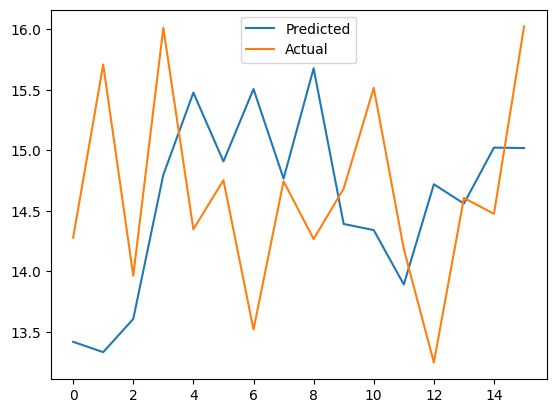

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100], label='Predicted')
plt.plot(train_results['Actuals'][:100], label='Actual')
plt.legend()
plt.show()

In [ ]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 22ms/step


Test Predictions    Actuals
0         13.790675  13.484665
1         13.675146  13.410936

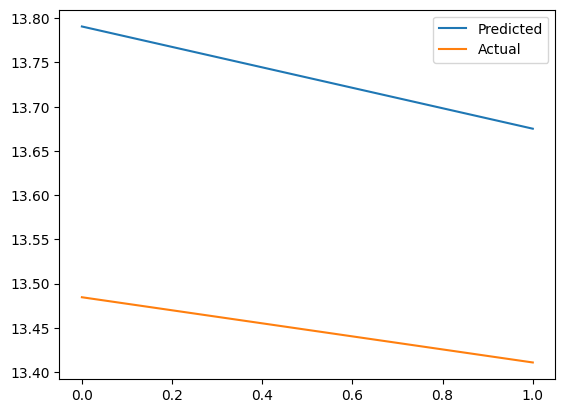

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:100], label='Predicted')
plt.plot(test_results['Actuals'][:100], label='Actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

1/1 [==============================] - 0s 39ms/step


(   Predictions    Actuals
 0    13.790675  13.484665
 1    13.675146  13.410936,
 0.08172456921576418)

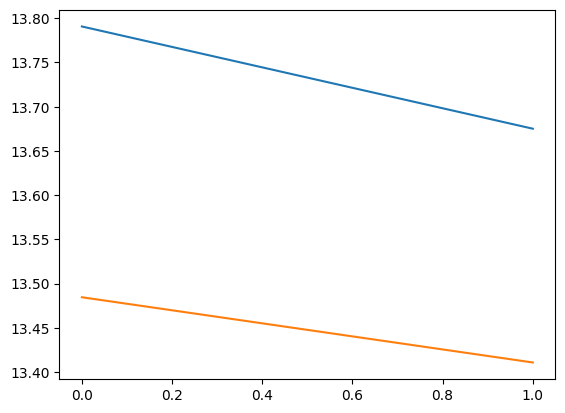

In [ ]:
plot_predictions1(model, X_test, y_test)

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train, y_train, epochs=500, callbacks=[cp2])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 220.4530 - root_mean_squared_error: 14.8477

1/1 [==============================] - 2s 2s/step - loss: 220.4530 - root_mean_squared_error: 14.8477
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 219.5181 - root_mean_squared_error: 14.8161

1/1 [==============================] - 0s 18ms/step - loss: 219.5181 - root_mean_squared_error: 14.8161
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 218.5784 - root_mean_squared_error: 14.7844

1/1 [==============================] - 0s 19ms/step - loss: 218.5784 - root_mean_squared_error: 14.7844
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 217.6325 - root_mean_squared_error: 14.7524

1/1 [==============================] - 0s 18ms/step - loss: 217.6325 - root_mean_squared_error: 14.7524
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 216.6791 - root_mean_squared_error: 14.7200

1/1 [==============================] - 0s 24ms/step - loss: 216.6791 - root_mean_squared_error: 14.7200
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 215.7272 - root_mean_squared_error: 14.6877

1/1 [==============================] - 0s 24ms/step - loss: 215.7272 - root_mean_squared_error: 14.6877
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 214.7743 - root_mean_squared_error: 14.6552

1/1 [==============================] - 0s 31ms/step - loss: 214.7743 - root_mean_squared_error: 14.6552
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 213.8213 - root_mean_squared_error: 14.6226

1/1 [==============================] - 0s 46ms/step - loss: 213.8213 - root_mean_squared_error: 14.6226
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 212.8701 - root_mean_squared_error: 14.5901

1/1 [==============================] - 0s 47ms/step - loss: 212.8701 - root_mean_squared_error: 14.5901
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 211.9207 - root_mean_squared_error: 14.5575

1/1 [==============================] - 0s 28ms/step - loss: 211.9207 - root_mean_squared_error: 14.5575
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 210.9733 - root_mean_squared_error: 14.5249

1/1 [==============================] - 0s 27ms/step - loss: 210.9733 - root_mean_squared_error: 14.5249
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 210.0280 - root_mean_squared_error: 14.4923

1/1 [==============================] - 0s 39ms/step - loss: 210.0280 - root_mean_squared_error: 14.4923
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 209.0849 - root_mean_squared_error: 14.4598

1/1 [==============================] - 0s 40ms/step - loss: 209.0849 - root_mean_squared_error: 14.4598
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 208.1436 - root_mean_squared_error: 14.4272

1/1 [==============================] - 0s 44ms/step - loss: 208.1436 - root_mean_squared_error: 14.4272
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 207.2044 - root_mean_squared_error: 14.3946

1/1 [==============================] - 0s 35ms/step - loss: 207.2044 - root_mean_squared_error: 14.3946
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 206.2675 - root_mean_squared_error: 14.3620

1/1 [==============================] - 0s 51ms/step - loss: 206.2675 - root_mean_squared_error: 14.3620
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 205.3329 - root_mean_squared_error: 14.3294

1/1 [==============================] - 0s 23ms/step - loss: 205.3329 - root_mean_squared_error: 14.3294
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 204.4005 - root_mean_squared_error: 14.2969

1/1 [==============================] - 0s 29ms/step - loss: 204.4005 - root_mean_squared_error: 14.2969
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 203.4701 - root_mean_squared_error: 14.2643

1/1 [==============================] - 0s 28ms/step - loss: 203.4701 - root_mean_squared_error: 14.2643
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 202.5419 - root_mean_squared_error: 14.2317

1/1 [==============================] - 0s 27ms/step - loss: 202.5419 - root_mean_squared_error: 14.2317
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 201.6159 - root_mean_squared_error: 14.1992

1/1 [==============================] - 0s 39ms/step - loss: 201.6159 - root_mean_squared_error: 14.1992
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 200.6923 - root_mean_squared_error: 14.1666

1/1 [==============================] - 0s 35ms/step - loss: 200.6923 - root_mean_squared_error: 14.1666
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 199.7709 - root_mean_squared_error: 14.1340

1/1 [==============================] - 0s 39ms/step - loss: 199.7709 - root_mean_squared_error: 14.1340
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 198.8515 - root_mean_squared_error: 14.1015

1/1 [==============================] - 0s 22ms/step - loss: 198.8515 - root_mean_squared_error: 14.1015
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 197.9344 - root_mean_squared_error: 14.0689

1/1 [==============================] - 0s 39ms/step - loss: 197.9344 - root_mean_squared_error: 14.0689
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 197.0196 - root_mean_squared_error: 14.0364

1/1 [==============================] - 0s 38ms/step - loss: 197.0196 - root_mean_squared_error: 14.0364
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 196.1071 - root_mean_squared_error: 14.0038

1/1 [==============================] - 0s 39ms/step - loss: 196.1071 - root_mean_squared_error: 14.0038
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 195.1969 - root_mean_squared_error: 13.9713

1/1 [==============================] - 0s 36ms/step - loss: 195.1969 - root_mean_squared_error: 13.9713
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 194.2887 - root_mean_squared_error: 13.9387

1/1 [==============================] - 0s 39ms/step - loss: 194.2887 - root_mean_squared_error: 13.9387
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 193.3827 - root_mean_squared_error: 13.9062

1/1 [==============================] - 0s 36ms/step - loss: 193.3827 - root_mean_squared_error: 13.9062
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 192.4789 - root_mean_squared_error: 13.8737

1/1 [==============================] - 0s 29ms/step - loss: 192.4789 - root_mean_squared_error: 13.8737
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 191.5774 - root_mean_squared_error: 13.8411

1/1 [==============================] - 0s 35ms/step - loss: 191.5774 - root_mean_squared_error: 13.8411
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 190.6781 - root_mean_squared_error: 13.8086

1/1 [==============================] - 0s 26ms/step - loss: 190.6781 - root_mean_squared_error: 13.8086
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 189.7810 - root_mean_squared_error: 13.7761

1/1 [==============================] - 0s 26ms/step - loss: 189.7810 - root_mean_squared_error: 13.7761
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 188.8860 - root_mean_squared_error: 13.7436

1/1 [==============================] - 0s 26ms/step - loss: 188.8860 - root_mean_squared_error: 13.7436
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 187.9931 - root_mean_squared_error: 13.7111

1/1 [==============================] - 0s 26ms/step - loss: 187.9931 - root_mean_squared_error: 13.7111
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 187.1023 - root_mean_squared_error: 13.6785

1/1 [==============================] - 0s 31ms/step - loss: 187.1023 - root_mean_squared_error: 13.6785
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 186.2138 - root_mean_squared_error: 13.6460

1/1 [==============================] - 0s 20ms/step - loss: 186.2138 - root_mean_squared_error: 13.6460
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 185.3272 - root_mean_squared_error: 13.6135

1/1 [==============================] - 0s 59ms/step - loss: 185.3272 - root_mean_squared_error: 13.6135
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 184.4426 - root_mean_squared_error: 13.5810

1/1 [==============================] - 0s 46ms/step - loss: 184.4426 - root_mean_squared_error: 13.5810
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 183.5602 - root_mean_squared_error: 13.5484

1/1 [==============================] - 0s 46ms/step - loss: 183.5602 - root_mean_squared_error: 13.5484
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 182.6798 - root_mean_squared_error: 13.5159

1/1 [==============================] - 0s 48ms/step - loss: 182.6798 - root_mean_squared_error: 13.5159
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 181.8015 - root_mean_squared_error: 13.4834

1/1 [==============================] - 0s 39ms/step - loss: 181.8015 - root_mean_squared_error: 13.4834
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 180.9253 - root_mean_squared_error: 13.4508

1/1 [==============================] - 0s 27ms/step - loss: 180.9253 - root_mean_squared_error: 13.4508
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 180.0510 - root_mean_squared_error: 13.4183

1/1 [==============================] - 0s 32ms/step - loss: 180.0510 - root_mean_squared_error: 13.4183
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 179.1788 - root_mean_squared_error: 13.3858

1/1 [==============================] - 0s 33ms/step - loss: 179.1788 - root_mean_squared_error: 13.3858
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 178.3085 - root_mean_squared_error: 13.3532

1/1 [==============================] - 0s 59ms/step - loss: 178.3085 - root_mean_squared_error: 13.3532
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 177.4401 - root_mean_squared_error: 13.3207

1/1 [==============================] - 0s 45ms/step - loss: 177.4401 - root_mean_squared_error: 13.3207
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 176.5737 - root_mean_squared_error: 13.2881

1/1 [==============================] - 0s 21ms/step - loss: 176.5737 - root_mean_squared_error: 13.2881
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 175.7092 - root_mean_squared_error: 13.2555

1/1 [==============================] - 0s 30ms/step - loss: 175.7092 - root_mean_squared_error: 13.2555
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 174.8465 - root_mean_squared_error: 13.2230

1/1 [==============================] - 0s 45ms/step - loss: 174.8465 - root_mean_squared_error: 13.2230
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 173.9857 - root_mean_squared_error: 13.1904

1/1 [==============================] - 0s 32ms/step - loss: 173.9857 - root_mean_squared_error: 13.1904
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 173.1268 - root_mean_squared_error: 13.1578

1/1 [==============================] - 0s 31ms/step - loss: 173.1268 - root_mean_squared_error: 13.1578
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 172.2805 - root_mean_squared_error: 13.1256

1/1 [==============================] - 0s 35ms/step - loss: 172.2805 - root_mean_squared_error: 13.1256
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 171.4761 - root_mean_squared_error: 13.0949

1/1 [==============================] - 0s 34ms/step - loss: 171.4761 - root_mean_squared_error: 13.0949
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 170.7262 - root_mean_squared_error: 13.0662

1/1 [==============================] - 0s 25ms/step - loss: 170.7262 - root_mean_squared_error: 13.0662
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 170.0017 - root_mean_squared_error: 13.0385

1/1 [==============================] - 0s 40ms/step - loss: 170.0017 - root_mean_squared_error: 13.0385
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 169.3224 - root_mean_squared_error: 13.0124

1/1 [==============================] - 0s 25ms/step - loss: 169.3224 - root_mean_squared_error: 13.0124
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 168.6718 - root_mean_squared_error: 12.9874

1/1 [==============================] - 0s 22ms/step - loss: 168.6718 - root_mean_squared_error: 12.9874
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 168.0250 - root_mean_squared_error: 12.9624

1/1 [==============================] - 0s 21ms/step - loss: 168.0250 - root_mean_squared_error: 12.9624
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 167.3817 - root_mean_squared_error: 12.9376

1/1 [==============================] - 0s 39ms/step - loss: 167.3817 - root_mean_squared_error: 12.9376
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 166.7689 - root_mean_squared_error: 12.9139

1/1 [==============================] - 0s 61ms/step - loss: 166.7689 - root_mean_squared_error: 12.9139
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 166.1852 - root_mean_squared_error: 12.8913

1/1 [==============================] - 0s 39ms/step - loss: 166.1852 - root_mean_squared_error: 12.8913
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 165.6198 - root_mean_squared_error: 12.8693

1/1 [==============================] - 0s 30ms/step - loss: 165.6198 - root_mean_squared_error: 12.8693
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 165.0569 - root_mean_squared_error: 12.8474

1/1 [==============================] - 0s 31ms/step - loss: 165.0569 - root_mean_squared_error: 12.8474
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 164.4921 - root_mean_squared_error: 12.8254

1/1 [==============================] - 0s 24ms/step - loss: 164.4921 - root_mean_squared_error: 12.8254
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 163.9258 - root_mean_squared_error: 12.8034

1/1 [==============================] - 0s 24ms/step - loss: 163.9258 - root_mean_squared_error: 12.8034
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 163.3585 - root_mean_squared_error: 12.7812

1/1 [==============================] - 0s 30ms/step - loss: 163.3585 - root_mean_squared_error: 12.7812
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 162.7902 - root_mean_squared_error: 12.7589

1/1 [==============================] - 0s 25ms/step - loss: 162.7902 - root_mean_squared_error: 12.7589
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 162.2213 - root_mean_squared_error: 12.7366

1/1 [==============================] - 0s 41ms/step - loss: 162.2213 - root_mean_squared_error: 12.7366
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 161.6518 - root_mean_squared_error: 12.7142

1/1 [==============================] - 0s 29ms/step - loss: 161.6518 - root_mean_squared_error: 12.7142
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 161.0820 - root_mean_squared_error: 12.6918

1/1 [==============================] - 0s 34ms/step - loss: 161.0820 - root_mean_squared_error: 12.6918
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 160.5109 - root_mean_squared_error: 12.6693

1/1 [==============================] - 0s 35ms/step - loss: 160.5109 - root_mean_squared_error: 12.6693
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 159.9387 - root_mean_squared_error: 12.6467

1/1 [==============================] - 0s 38ms/step - loss: 159.9387 - root_mean_squared_error: 12.6467
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 159.3664 - root_mean_squared_error: 12.6240

1/1 [==============================] - 0s 41ms/step - loss: 159.3664 - root_mean_squared_error: 12.6240
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 158.7940 - root_mean_squared_error: 12.6013

1/1 [==============================] - 0s 47ms/step - loss: 158.7940 - root_mean_squared_error: 12.6013
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 158.2216 - root_mean_squared_error: 12.5786

1/1 [==============================] - 0s 46ms/step - loss: 158.2216 - root_mean_squared_error: 12.5786
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 157.6492 - root_mean_squared_error: 12.5558

1/1 [==============================] - 0s 26ms/step - loss: 157.6492 - root_mean_squared_error: 12.5558
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 157.0770 - root_mean_squared_error: 12.5330

1/1 [==============================] - 0s 27ms/step - loss: 157.0770 - root_mean_squared_error: 12.5330
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 156.5049 - root_mean_squared_error: 12.5102

1/1 [==============================] - 0s 32ms/step - loss: 156.5049 - root_mean_squared_error: 12.5102
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 155.9331 - root_mean_squared_error: 12.4873

1/1 [==============================] - 0s 36ms/step - loss: 155.9331 - root_mean_squared_error: 12.4873
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 155.3615 - root_mean_squared_error: 12.4644

1/1 [==============================] - 0s 24ms/step - loss: 155.3615 - root_mean_squared_error: 12.4644
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 154.7901 - root_mean_squared_error: 12.4415

1/1 [==============================] - 0s 41ms/step - loss: 154.7901 - root_mean_squared_error: 12.4415
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 154.2190 - root_mean_squared_error: 12.4185

1/1 [==============================] - 0s 23ms/step - loss: 154.2190 - root_mean_squared_error: 12.4185
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 153.6479 - root_mean_squared_error: 12.3955

1/1 [==============================] - 0s 26ms/step - loss: 153.6479 - root_mean_squared_error: 12.3955
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 153.0764 - root_mean_squared_error: 12.3724

1/1 [==============================] - 0s 24ms/step - loss: 153.0764 - root_mean_squared_error: 12.3724
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 152.5051 - root_mean_squared_error: 12.3493

1/1 [==============================] - 0s 22ms/step - loss: 152.5051 - root_mean_squared_error: 12.3493
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 151.9341 - root_mean_squared_error: 12.3262

1/1 [==============================] - 0s 26ms/step - loss: 151.9341 - root_mean_squared_error: 12.3262
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 151.3634 - root_mean_squared_error: 12.3030

1/1 [==============================] - 0s 27ms/step - loss: 151.3634 - root_mean_squared_error: 12.3030
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 150.7930 - root_mean_squared_error: 12.2798

1/1 [==============================] - 0s 38ms/step - loss: 150.7930 - root_mean_squared_error: 12.2798
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 150.2228 - root_mean_squared_error: 12.2565

1/1 [==============================] - 0s 32ms/step - loss: 150.2228 - root_mean_squared_error: 12.2565
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 149.6530 - root_mean_squared_error: 12.2333

1/1 [==============================] - 0s 32ms/step - loss: 149.6530 - root_mean_squared_error: 12.2333
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 149.0830 - root_mean_squared_error: 12.2100

1/1 [==============================] - 0s 43ms/step - loss: 149.0830 - root_mean_squared_error: 12.2100
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 148.5132 - root_mean_squared_error: 12.1866

1/1 [==============================] - 0s 40ms/step - loss: 148.5132 - root_mean_squared_error: 12.1866
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 147.9437 - root_mean_squared_error: 12.1632

1/1 [==============================] - 0s 22ms/step - loss: 147.9437 - root_mean_squared_error: 12.1632
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 147.3746 - root_mean_squared_error: 12.1398

1/1 [==============================] - 0s 22ms/step - loss: 147.3746 - root_mean_squared_error: 12.1398
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 146.8058 - root_mean_squared_error: 12.1163

1/1 [==============================] - 0s 77ms/step - loss: 146.8058 - root_mean_squared_error: 12.1163
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 146.2372 - root_mean_squared_error: 12.0929

1/1 [==============================] - 0s 30ms/step - loss: 146.2372 - root_mean_squared_error: 12.0929
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 145.6690 - root_mean_squared_error: 12.0693

1/1 [==============================] - 0s 25ms/step - loss: 145.6690 - root_mean_squared_error: 12.0693
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 145.1004 - root_mean_squared_error: 12.0458

1/1 [==============================] - 0s 31ms/step - loss: 145.1004 - root_mean_squared_error: 12.0458
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 144.5318 - root_mean_squared_error: 12.0221

1/1 [==============================] - 0s 34ms/step - loss: 144.5318 - root_mean_squared_error: 12.0221
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 143.9626 - root_mean_squared_error: 11.9984

1/1 [==============================] - 0s 44ms/step - loss: 143.9626 - root_mean_squared_error: 11.9984
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 143.3935 - root_mean_squared_error: 11.9747

1/1 [==============================] - 0s 35ms/step - loss: 143.3935 - root_mean_squared_error: 11.9747
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 142.8241 - root_mean_squared_error: 11.9509

1/1 [==============================] - 0s 33ms/step - loss: 142.8241 - root_mean_squared_error: 11.9509
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 142.2538 - root_mean_squared_error: 11.9270

1/1 [==============================] - 0s 27ms/step - loss: 142.2538 - root_mean_squared_error: 11.9270
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 141.6833 - root_mean_squared_error: 11.9031

1/1 [==============================] - 0s 28ms/step - loss: 141.6833 - root_mean_squared_error: 11.9031
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 141.1130 - root_mean_squared_error: 11.8791

1/1 [==============================] - 0s 25ms/step - loss: 141.1130 - root_mean_squared_error: 11.8791
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 140.5428 - root_mean_squared_error: 11.8551

1/1 [==============================] - 0s 33ms/step - loss: 140.5428 - root_mean_squared_error: 11.8551
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 139.9729 - root_mean_squared_error: 11.8310

1/1 [==============================] - 0s 35ms/step - loss: 139.9729 - root_mean_squared_error: 11.8310
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 139.4032 - root_mean_squared_error: 11.8069

1/1 [==============================] - 0s 24ms/step - loss: 139.4032 - root_mean_squared_error: 11.8069
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 138.8337 - root_mean_squared_error: 11.7828

1/1 [==============================] - 0s 25ms/step - loss: 138.8337 - root_mean_squared_error: 11.7828
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 138.2645 - root_mean_squared_error: 11.7586

1/1 [==============================] - 0s 25ms/step - loss: 138.2645 - root_mean_squared_error: 11.7586
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 137.6955 - root_mean_squared_error: 11.7344

1/1 [==============================] - 0s 36ms/step - loss: 137.6955 - root_mean_squared_error: 11.7344
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 137.1269 - root_mean_squared_error: 11.7101

1/1 [==============================] - 0s 38ms/step - loss: 137.1269 - root_mean_squared_error: 11.7101
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 136.5585 - root_mean_squared_error: 11.6858

1/1 [==============================] - 0s 56ms/step - loss: 136.5585 - root_mean_squared_error: 11.6858
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 135.9905 - root_mean_squared_error: 11.6615

1/1 [==============================] - 0s 41ms/step - loss: 135.9905 - root_mean_squared_error: 11.6615
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 135.4228 - root_mean_squared_error: 11.6371

1/1 [==============================] - 0s 30ms/step - loss: 135.4228 - root_mean_squared_error: 11.6371
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 134.8555 - root_mean_squared_error: 11.6127

1/1 [==============================] - 0s 44ms/step - loss: 134.8555 - root_mean_squared_error: 11.6127
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 134.2898 - root_mean_squared_error: 11.5883

1/1 [==============================] - 0s 33ms/step - loss: 134.2898 - root_mean_squared_error: 11.5883
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 133.7263 - root_mean_squared_error: 11.5640

1/1 [==============================] - 0s 33ms/step - loss: 133.7263 - root_mean_squared_error: 11.5640
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 133.1629 - root_mean_squared_error: 11.5396

1/1 [==============================] - 0s 33ms/step - loss: 133.1629 - root_mean_squared_error: 11.5396
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 132.5994 - root_mean_squared_error: 11.5152

1/1 [==============================] - 0s 31ms/step - loss: 132.5994 - root_mean_squared_error: 11.5152
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 132.0353 - root_mean_squared_error: 11.4907

1/1 [==============================] - 0s 29ms/step - loss: 132.0353 - root_mean_squared_error: 11.4907
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 131.4711 - root_mean_squared_error: 11.4661

1/1 [==============================] - 0s 27ms/step - loss: 131.4711 - root_mean_squared_error: 11.4661
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 130.9069 - root_mean_squared_error: 11.4415

1/1 [==============================] - 0s 25ms/step - loss: 130.9069 - root_mean_squared_error: 11.4415
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 130.3427 - root_mean_squared_error: 11.4168

1/1 [==============================] - 0s 24ms/step - loss: 130.3427 - root_mean_squared_error: 11.4168
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 129.7786 - root_mean_squared_error: 11.3920

1/1 [==============================] - 0s 30ms/step - loss: 129.7786 - root_mean_squared_error: 11.3920
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 129.2146 - root_mean_squared_error: 11.3673

1/1 [==============================] - 0s 24ms/step - loss: 129.2146 - root_mean_squared_error: 11.3673
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 128.6507 - root_mean_squared_error: 11.3424

1/1 [==============================] - 0s 31ms/step - loss: 128.6507 - root_mean_squared_error: 11.3424
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 128.0869 - root_mean_squared_error: 11.3175

1/1 [==============================] - 0s 26ms/step - loss: 128.0869 - root_mean_squared_error: 11.3175
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 127.5233 - root_mean_squared_error: 11.2926

1/1 [==============================] - 0s 30ms/step - loss: 127.5233 - root_mean_squared_error: 11.2926
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 126.9598 - root_mean_squared_error: 11.2676

1/1 [==============================] - 0s 56ms/step - loss: 126.9598 - root_mean_squared_error: 11.2676
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 126.3966 - root_mean_squared_error: 11.2426

1/1 [==============================] - 0s 34ms/step - loss: 126.3966 - root_mean_squared_error: 11.2426
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 125.8335 - root_mean_squared_error: 11.2176

1/1 [==============================] - 0s 29ms/step - loss: 125.8335 - root_mean_squared_error: 11.2176
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 125.2707 - root_mean_squared_error: 11.1924

1/1 [==============================] - 0s 26ms/step - loss: 125.2707 - root_mean_squared_error: 11.1924
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 124.7092 - root_mean_squared_error: 11.1673

1/1 [==============================] - 0s 31ms/step - loss: 124.7092 - root_mean_squared_error: 11.1673
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 124.1489 - root_mean_squared_error: 11.1422

1/1 [==============================] - 0s 28ms/step - loss: 124.1489 - root_mean_squared_error: 11.1422
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 123.5887 - root_mean_squared_error: 11.1170

1/1 [==============================] - 0s 41ms/step - loss: 123.5887 - root_mean_squared_error: 11.1170
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 123.0288 - root_mean_squared_error: 11.0918

1/1 [==============================] - 0s 25ms/step - loss: 123.0288 - root_mean_squared_error: 11.0918
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 122.4691 - root_mean_squared_error: 11.0666

1/1 [==============================] - 0s 37ms/step - loss: 122.4691 - root_mean_squared_error: 11.0666
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 121.9096 - root_mean_squared_error: 11.0413

1/1 [==============================] - 0s 44ms/step - loss: 121.9096 - root_mean_squared_error: 11.0413
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 121.3504 - root_mean_squared_error: 11.0159

1/1 [==============================] - 0s 56ms/step - loss: 121.3504 - root_mean_squared_error: 11.0159
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 120.7916 - root_mean_squared_error: 10.9905

1/1 [==============================] - 0s 31ms/step - loss: 120.7916 - root_mean_squared_error: 10.9905
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 120.2330 - root_mean_squared_error: 10.9651

1/1 [==============================] - 0s 25ms/step - loss: 120.2330 - root_mean_squared_error: 10.9651
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 119.6749 - root_mean_squared_error: 10.9396

1/1 [==============================] - 0s 26ms/step - loss: 119.6749 - root_mean_squared_error: 10.9396
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 119.1171 - root_mean_squared_error: 10.9141

1/1 [==============================] - 0s 28ms/step - loss: 119.1171 - root_mean_squared_error: 10.9141
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 118.5597 - root_mean_squared_error: 10.8885

1/1 [==============================] - 0s 32ms/step - loss: 118.5597 - root_mean_squared_error: 10.8885
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 118.0032 - root_mean_squared_error: 10.8629

1/1 [==============================] - 0s 28ms/step - loss: 118.0032 - root_mean_squared_error: 10.8629
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 117.4478 - root_mean_squared_error: 10.8373

1/1 [==============================] - 0s 35ms/step - loss: 117.4478 - root_mean_squared_error: 10.8373
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 116.8925 - root_mean_squared_error: 10.8117

1/1 [==============================] - 0s 34ms/step - loss: 116.8925 - root_mean_squared_error: 10.8117
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 116.3374 - root_mean_squared_error: 10.7860

1/1 [==============================] - 0s 35ms/step - loss: 116.3374 - root_mean_squared_error: 10.7860
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 115.7825 - root_mean_squared_error: 10.7602

1/1 [==============================] - 0s 32ms/step - loss: 115.7825 - root_mean_squared_error: 10.7602
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 115.2279 - root_mean_squared_error: 10.7344

1/1 [==============================] - 0s 30ms/step - loss: 115.2279 - root_mean_squared_error: 10.7344
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 114.6737 - root_mean_squared_error: 10.7086

1/1 [==============================] - 0s 27ms/step - loss: 114.6737 - root_mean_squared_error: 10.7086
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 114.1203 - root_mean_squared_error: 10.6827

1/1 [==============================] - 0s 28ms/step - loss: 114.1203 - root_mean_squared_error: 10.6827
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 113.5678 - root_mean_squared_error: 10.6568

1/1 [==============================] - 0s 26ms/step - loss: 113.5678 - root_mean_squared_error: 10.6568
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 113.0156 - root_mean_squared_error: 10.6309

1/1 [==============================] - 0s 37ms/step - loss: 113.0156 - root_mean_squared_error: 10.6309
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 112.4639 - root_mean_squared_error: 10.6049

1/1 [==============================] - 0s 26ms/step - loss: 112.4639 - root_mean_squared_error: 10.6049
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 111.9126 - root_mean_squared_error: 10.5789

1/1 [==============================] - 0s 24ms/step - loss: 111.9126 - root_mean_squared_error: 10.5789
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 111.3618 - root_mean_squared_error: 10.5528

1/1 [==============================] - 0s 22ms/step - loss: 111.3618 - root_mean_squared_error: 10.5528
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 110.8115 - root_mean_squared_error: 10.5267

1/1 [==============================] - 0s 25ms/step - loss: 110.8115 - root_mean_squared_error: 10.5267
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 110.2618 - root_mean_squared_error: 10.5006

1/1 [==============================] - 0s 29ms/step - loss: 110.2618 - root_mean_squared_error: 10.5006
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 109.7129 - root_mean_squared_error: 10.4744

1/1 [==============================] - 0s 26ms/step - loss: 109.7129 - root_mean_squared_error: 10.4744
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 109.1644 - root_mean_squared_error: 10.4482

1/1 [==============================] - 0s 30ms/step - loss: 109.1644 - root_mean_squared_error: 10.4482
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 108.6165 - root_mean_squared_error: 10.4219

1/1 [==============================] - 0s 26ms/step - loss: 108.6165 - root_mean_squared_error: 10.4219
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 108.0692 - root_mean_squared_error: 10.3956

1/1 [==============================] - 0s 22ms/step - loss: 108.0692 - root_mean_squared_error: 10.3956
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 107.5223 - root_mean_squared_error: 10.3693

1/1 [==============================] - 0s 22ms/step - loss: 107.5223 - root_mean_squared_error: 10.3693
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 106.9761 - root_mean_squared_error: 10.3429

1/1 [==============================] - 0s 37ms/step - loss: 106.9761 - root_mean_squared_error: 10.3429
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 106.4303 - root_mean_squared_error: 10.3165

1/1 [==============================] - 0s 19ms/step - loss: 106.4303 - root_mean_squared_error: 10.3165
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 105.8852 - root_mean_squared_error: 10.2901

1/1 [==============================] - 0s 18ms/step - loss: 105.8852 - root_mean_squared_error: 10.2901
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 105.3409 - root_mean_squared_error: 10.2636

1/1 [==============================] - 0s 23ms/step - loss: 105.3409 - root_mean_squared_error: 10.2636
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 104.7972 - root_mean_squared_error: 10.2370

1/1 [==============================] - 0s 29ms/step - loss: 104.7972 - root_mean_squared_error: 10.2370
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 104.2540 - root_mean_squared_error: 10.2105

1/1 [==============================] - 0s 31ms/step - loss: 104.2540 - root_mean_squared_error: 10.2105
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 103.7115 - root_mean_squared_error: 10.1839

1/1 [==============================] - 0s 28ms/step - loss: 103.7115 - root_mean_squared_error: 10.1839
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 103.1695 - root_mean_squared_error: 10.1572

1/1 [==============================] - 0s 37ms/step - loss: 103.1695 - root_mean_squared_error: 10.1572
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 102.6282 - root_mean_squared_error: 10.1306

1/1 [==============================] - 0s 32ms/step - loss: 102.6282 - root_mean_squared_error: 10.1306
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 102.0878 - root_mean_squared_error: 10.1038

1/1 [==============================] - 0s 28ms/step - loss: 102.0878 - root_mean_squared_error: 10.1038
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 101.5480 - root_mean_squared_error: 10.0771

1/1 [==============================] - 0s 21ms/step - loss: 101.5480 - root_mean_squared_error: 10.0771
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 101.0088 - root_mean_squared_error: 10.0503

1/1 [==============================] - 0s 53ms/step - loss: 101.0088 - root_mean_squared_error: 10.0503
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 100.4702 - root_mean_squared_error: 10.0235

1/1 [==============================] - 0s 30ms/step - loss: 100.4702 - root_mean_squared_error: 10.0235
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 99.9324 - root_mean_squared_error: 9.9966

1/1 [==============================] - 0s 25ms/step - loss: 99.9324 - root_mean_squared_error: 9.9966
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 99.3951 - root_mean_squared_error: 9.9697

1/1 [==============================] - 0s 30ms/step - loss: 99.3951 - root_mean_squared_error: 9.9697
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 98.8586 - root_mean_squared_error: 9.9428

1/1 [==============================] - 0s 28ms/step - loss: 98.8586 - root_mean_squared_error: 9.9428
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 98.3229 - root_mean_squared_error: 9.9158

1/1 [==============================] - 0s 25ms/step - loss: 98.3229 - root_mean_squared_error: 9.9158
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 97.7880 - root_mean_squared_error: 9.8888

1/1 [==============================] - 0s 32ms/step - loss: 97.7880 - root_mean_squared_error: 9.8888
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 97.2538 - root_mean_squared_error: 9.8617

1/1 [==============================] - 0s 41ms/step - loss: 97.2538 - root_mean_squared_error: 9.8617
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 96.7202 - root_mean_squared_error: 9.8346

1/1 [==============================] - 0s 57ms/step - loss: 96.7202 - root_mean_squared_error: 9.8346
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 96.1876 - root_mean_squared_error: 9.8075

1/1 [==============================] - 0s 39ms/step - loss: 96.1876 - root_mean_squared_error: 9.8075
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 95.6557 - root_mean_squared_error: 9.7804

1/1 [==============================] - 0s 24ms/step - loss: 95.6557 - root_mean_squared_error: 9.7804
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 95.1245 - root_mean_squared_error: 9.7532

1/1 [==============================] - 0s 22ms/step - loss: 95.1245 - root_mean_squared_error: 9.7532
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 94.5940 - root_mean_squared_error: 9.7259

1/1 [==============================] - 0s 25ms/step - loss: 94.5940 - root_mean_squared_error: 9.7259
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 94.0645 - root_mean_squared_error: 9.6987

1/1 [==============================] - 0s 22ms/step - loss: 94.0645 - root_mean_squared_error: 9.6987
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 93.5357 - root_mean_squared_error: 9.6714

1/1 [==============================] - 0s 24ms/step - loss: 93.5357 - root_mean_squared_error: 9.6714
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 93.0078 - root_mean_squared_error: 9.6441

1/1 [==============================] - 0s 25ms/step - loss: 93.0078 - root_mean_squared_error: 9.6441
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 92.4806 - root_mean_squared_error: 9.6167

1/1 [==============================] - 0s 28ms/step - loss: 92.4806 - root_mean_squared_error: 9.6167
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 91.9542 - root_mean_squared_error: 9.5893

1/1 [==============================] - 0s 61ms/step - loss: 91.9542 - root_mean_squared_error: 9.5893
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 91.4287 - root_mean_squared_error: 9.5618

1/1 [==============================] - 0s 38ms/step - loss: 91.4287 - root_mean_squared_error: 9.5618
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 90.9041 - root_mean_squared_error: 9.5344

1/1 [==============================] - 0s 27ms/step - loss: 90.9041 - root_mean_squared_error: 9.5344
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 90.3803 - root_mean_squared_error: 9.5069

1/1 [==============================] - 0s 25ms/step - loss: 90.3803 - root_mean_squared_error: 9.5069
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 89.8574 - root_mean_squared_error: 9.4793

1/1 [==============================] - 0s 27ms/step - loss: 89.8574 - root_mean_squared_error: 9.4793
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 89.3354 - root_mean_squared_error: 9.4517

1/1 [==============================] - 0s 34ms/step - loss: 89.3354 - root_mean_squared_error: 9.4517
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 88.8143 - root_mean_squared_error: 9.4241

1/1 [==============================] - 0s 47ms/step - loss: 88.8143 - root_mean_squared_error: 9.4241
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 88.2941 - root_mean_squared_error: 9.3965

1/1 [==============================] - 0s 31ms/step - loss: 88.2941 - root_mean_squared_error: 9.3965
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 87.7747 - root_mean_squared_error: 9.3688

1/1 [==============================] - 0s 83ms/step - loss: 87.7747 - root_mean_squared_error: 9.3688
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 87.2563 - root_mean_squared_error: 9.3411

1/1 [==============================] - 0s 78ms/step - loss: 87.2563 - root_mean_squared_error: 9.3411
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 86.7388 - root_mean_squared_error: 9.3134

1/1 [==============================] - 0s 57ms/step - loss: 86.7388 - root_mean_squared_error: 9.3134
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 86.2222 - root_mean_squared_error: 9.2856

1/1 [==============================] - 0s 36ms/step - loss: 86.2222 - root_mean_squared_error: 9.2856
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 85.7067 - root_mean_squared_error: 9.2578

1/1 [==============================] - 0s 24ms/step - loss: 85.7067 - root_mean_squared_error: 9.2578
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 85.1921 - root_mean_squared_error: 9.2300

1/1 [==============================] - 0s 47ms/step - loss: 85.1921 - root_mean_squared_error: 9.2300
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 84.6784 - root_mean_squared_error: 9.2021

1/1 [==============================] - 0s 45ms/step - loss: 84.6784 - root_mean_squared_error: 9.2021
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 84.1657 - root_mean_squared_error: 9.1742

1/1 [==============================] - 0s 49ms/step - loss: 84.1657 - root_mean_squared_error: 9.1742
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 83.6540 - root_mean_squared_error: 9.1463

1/1 [==============================] - 0s 35ms/step - loss: 83.6540 - root_mean_squared_error: 9.1463
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 83.1433 - root_mean_squared_error: 9.1183

1/1 [==============================] - 0s 37ms/step - loss: 83.1433 - root_mean_squared_error: 9.1183
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 82.6335 - root_mean_squared_error: 9.0903

1/1 [==============================] - 0s 32ms/step - loss: 82.6335 - root_mean_squared_error: 9.0903
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 82.1248 - root_mean_squared_error: 9.0623

1/1 [==============================] - 0s 28ms/step - loss: 82.1248 - root_mean_squared_error: 9.0623
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 81.6172 - root_mean_squared_error: 9.0342

1/1 [==============================] - 0s 52ms/step - loss: 81.6172 - root_mean_squared_error: 9.0342
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 81.1105 - root_mean_squared_error: 9.0061

1/1 [==============================] - 0s 49ms/step - loss: 81.1105 - root_mean_squared_error: 9.0061
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 80.6050 - root_mean_squared_error: 8.9780

1/1 [==============================] - 0s 45ms/step - loss: 80.6050 - root_mean_squared_error: 8.9780
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 80.1004 - root_mean_squared_error: 8.9499

1/1 [==============================] - 0s 37ms/step - loss: 80.1004 - root_mean_squared_error: 8.9499
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 79.5970 - root_mean_squared_error: 8.9217

1/1 [==============================] - 0s 50ms/step - loss: 79.5970 - root_mean_squared_error: 8.9217
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 79.0946 - root_mean_squared_error: 8.8935

1/1 [==============================] - 0s 35ms/step - loss: 79.0946 - root_mean_squared_error: 8.8935
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 78.5933 - root_mean_squared_error: 8.8653

1/1 [==============================] - 0s 22ms/step - loss: 78.5933 - root_mean_squared_error: 8.8653
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 78.0931 - root_mean_squared_error: 8.8370

1/1 [==============================] - 0s 34ms/step - loss: 78.0931 - root_mean_squared_error: 8.8370
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 77.5940 - root_mean_squared_error: 8.8087

1/1 [==============================] - 0s 45ms/step - loss: 77.5940 - root_mean_squared_error: 8.8087
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 77.0960 - root_mean_squared_error: 8.7804

1/1 [==============================] - 0s 27ms/step - loss: 77.0960 - root_mean_squared_error: 8.7804
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 76.5992 - root_mean_squared_error: 8.7521

1/1 [==============================] - 0s 36ms/step - loss: 76.5992 - root_mean_squared_error: 8.7521
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 76.1034 - root_mean_squared_error: 8.7237

1/1 [==============================] - 0s 26ms/step - loss: 76.1034 - root_mean_squared_error: 8.7237
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 75.6088 - root_mean_squared_error: 8.6953

1/1 [==============================] - 0s 27ms/step - loss: 75.6088 - root_mean_squared_error: 8.6953
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 75.1155 - root_mean_squared_error: 8.6669

1/1 [==============================] - 0s 41ms/step - loss: 75.1155 - root_mean_squared_error: 8.6669
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 74.6233 - root_mean_squared_error: 8.6385

1/1 [==============================] - 0s 64ms/step - loss: 74.6233 - root_mean_squared_error: 8.6385
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 74.1321 - root_mean_squared_error: 8.6100

1/1 [==============================] - 0s 51ms/step - loss: 74.1321 - root_mean_squared_error: 8.6100
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 73.6423 - root_mean_squared_error: 8.5815

1/1 [==============================] - 0s 55ms/step - loss: 73.6423 - root_mean_squared_error: 8.5815
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 73.1536 - root_mean_squared_error: 8.5530

1/1 [==============================] - 0s 59ms/step - loss: 73.1536 - root_mean_squared_error: 8.5530
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 72.6661 - root_mean_squared_error: 8.5244

1/1 [==============================] - 0s 71ms/step - loss: 72.6661 - root_mean_squared_error: 8.5244
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 72.1799 - root_mean_squared_error: 8.4959

1/1 [==============================] - 0s 53ms/step - loss: 72.1799 - root_mean_squared_error: 8.4959
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 71.6948 - root_mean_squared_error: 8.4673

1/1 [==============================] - 0s 41ms/step - loss: 71.6948 - root_mean_squared_error: 8.4673
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 71.2111 - root_mean_squared_error: 8.4387

1/1 [==============================] - 0s 37ms/step - loss: 71.2111 - root_mean_squared_error: 8.4387
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 70.7285 - root_mean_squared_error: 8.4100

1/1 [==============================] - 0s 40ms/step - loss: 70.7285 - root_mean_squared_error: 8.4100
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 70.2472 - root_mean_squared_error: 8.3814

1/1 [==============================] - 0s 26ms/step - loss: 70.2472 - root_mean_squared_error: 8.3814
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 69.7672 - root_mean_squared_error: 8.3527

1/1 [==============================] - 0s 21ms/step - loss: 69.7672 - root_mean_squared_error: 8.3527
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 69.2885 - root_mean_squared_error: 8.3240

1/1 [==============================] - 0s 22ms/step - loss: 69.2885 - root_mean_squared_error: 8.3240
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 68.8111 - root_mean_squared_error: 8.2952

1/1 [==============================] - 0s 45ms/step - loss: 68.8111 - root_mean_squared_error: 8.2952
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 68.3349 - root_mean_squared_error: 8.2665

1/1 [==============================] - 0s 47ms/step - loss: 68.3349 - root_mean_squared_error: 8.2665
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 67.8601 - root_mean_squared_error: 8.2377

1/1 [==============================] - 0s 36ms/step - loss: 67.8601 - root_mean_squared_error: 8.2377
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 67.3866 - root_mean_squared_error: 8.2089

1/1 [==============================] - 0s 41ms/step - loss: 67.3866 - root_mean_squared_error: 8.2089
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 66.9144 - root_mean_squared_error: 8.1801

1/1 [==============================] - 0s 40ms/step - loss: 66.9144 - root_mean_squared_error: 8.1801
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 66.4435 - root_mean_squared_error: 8.1513

1/1 [==============================] - 0s 31ms/step - loss: 66.4435 - root_mean_squared_error: 8.1513
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 65.9740 - root_mean_squared_error: 8.1224

1/1 [==============================] - 0s 27ms/step - loss: 65.9740 - root_mean_squared_error: 8.1224
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 65.5058 - root_mean_squared_error: 8.0936

1/1 [==============================] - 0s 31ms/step - loss: 65.5058 - root_mean_squared_error: 8.0936
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 65.0391 - root_mean_squared_error: 8.0647

1/1 [==============================] - 0s 41ms/step - loss: 65.0391 - root_mean_squared_error: 8.0647
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 64.5737 - root_mean_squared_error: 8.0358

1/1 [==============================] - 0s 43ms/step - loss: 64.5737 - root_mean_squared_error: 8.0358
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 64.1097 - root_mean_squared_error: 8.0069

1/1 [==============================] - 0s 40ms/step - loss: 64.1097 - root_mean_squared_error: 8.0069
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 63.6471 - root_mean_squared_error: 7.9779

1/1 [==============================] - 0s 56ms/step - loss: 63.6471 - root_mean_squared_error: 7.9779
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 63.1859 - root_mean_squared_error: 7.9490

1/1 [==============================] - 0s 45ms/step - loss: 63.1859 - root_mean_squared_error: 7.9490
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 62.7261 - root_mean_squared_error: 7.9200

1/1 [==============================] - 0s 29ms/step - loss: 62.7261 - root_mean_squared_error: 7.9200
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 62.2678 - root_mean_squared_error: 7.8910

1/1 [==============================] - 0s 30ms/step - loss: 62.2678 - root_mean_squared_error: 7.8910
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 61.8109 - root_mean_squared_error: 7.8620

1/1 [==============================] - 0s 26ms/step - loss: 61.8109 - root_mean_squared_error: 7.8620
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 61.3554 - root_mean_squared_error: 7.8330

1/1 [==============================] - 0s 31ms/step - loss: 61.3554 - root_mean_squared_error: 7.8330
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 60.9014 - root_mean_squared_error: 7.8039

1/1 [==============================] - 0s 48ms/step - loss: 60.9014 - root_mean_squared_error: 7.8039
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 60.4489 - root_mean_squared_error: 7.7749

1/1 [==============================] - 0s 40ms/step - loss: 60.4489 - root_mean_squared_error: 7.7749
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 59.9978 - root_mean_squared_error: 7.7458

1/1 [==============================] - 0s 32ms/step - loss: 59.9978 - root_mean_squared_error: 7.7458
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 59.5482 - root_mean_squared_error: 7.7167

1/1 [==============================] - 0s 40ms/step - loss: 59.5482 - root_mean_squared_error: 7.7167
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 59.1001 - root_mean_squared_error: 7.6877

1/1 [==============================] - 0s 38ms/step - loss: 59.1001 - root_mean_squared_error: 7.6877
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 58.6536 - root_mean_squared_error: 7.6586

1/1 [==============================] - 0s 34ms/step - loss: 58.6536 - root_mean_squared_error: 7.6586
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 58.2086 - root_mean_squared_error: 7.6295

1/1 [==============================] - 0s 30ms/step - loss: 58.2086 - root_mean_squared_error: 7.6295
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 57.7650 - root_mean_squared_error: 7.6003

1/1 [==============================] - 0s 51ms/step - loss: 57.7650 - root_mean_squared_error: 7.6003
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 57.3230 - root_mean_squared_error: 7.5712

1/1 [==============================] - 0s 29ms/step - loss: 57.3230 - root_mean_squared_error: 7.5712
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 56.8826 - root_mean_squared_error: 7.5421

1/1 [==============================] - 0s 24ms/step - loss: 56.8826 - root_mean_squared_error: 7.5421
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 56.4437 - root_mean_squared_error: 7.5129

1/1 [==============================] - 0s 28ms/step - loss: 56.4437 - root_mean_squared_error: 7.5129
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 56.0064 - root_mean_squared_error: 7.4837

1/1 [==============================] - 0s 31ms/step - loss: 56.0064 - root_mean_squared_error: 7.4837
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 55.5706 - root_mean_squared_error: 7.4546

1/1 [==============================] - 0s 28ms/step - loss: 55.5706 - root_mean_squared_error: 7.4546
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 55.1364 - root_mean_squared_error: 7.4254

1/1 [==============================] - 0s 32ms/step - loss: 55.1364 - root_mean_squared_error: 7.4254
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 54.7038 - root_mean_squared_error: 7.3962

1/1 [==============================] - 0s 38ms/step - loss: 54.7038 - root_mean_squared_error: 7.3962
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 54.2728 - root_mean_squared_error: 7.3670

1/1 [==============================] - 0s 40ms/step - loss: 54.2728 - root_mean_squared_error: 7.3670
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 53.8435 - root_mean_squared_error: 7.3378

1/1 [==============================] - 0s 45ms/step - loss: 53.8435 - root_mean_squared_error: 7.3378
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 53.4157 - root_mean_squared_error: 7.3086

1/1 [==============================] - 0s 32ms/step - loss: 53.4157 - root_mean_squared_error: 7.3086
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 52.9896 - root_mean_squared_error: 7.2794

1/1 [==============================] - 0s 36ms/step - loss: 52.9896 - root_mean_squared_error: 7.2794
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 52.5650 - root_mean_squared_error: 7.2502

1/1 [==============================] - 0s 35ms/step - loss: 52.5650 - root_mean_squared_error: 7.2502
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 52.1422 - root_mean_squared_error: 7.2210

1/1 [==============================] - 0s 42ms/step - loss: 52.1422 - root_mean_squared_error: 7.2210
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 51.7210 - root_mean_squared_error: 7.1917

1/1 [==============================] - 0s 27ms/step - loss: 51.7210 - root_mean_squared_error: 7.1917
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 51.3014 - root_mean_squared_error: 7.1625

1/1 [==============================] - 0s 26ms/step - loss: 51.3014 - root_mean_squared_error: 7.1625
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 50.8835 - root_mean_squared_error: 7.1333

1/1 [==============================] - 0s 27ms/step - loss: 50.8835 - root_mean_squared_error: 7.1333
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 50.4673 - root_mean_squared_error: 7.1040

1/1 [==============================] - 0s 27ms/step - loss: 50.4673 - root_mean_squared_error: 7.1040
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 50.0528 - root_mean_squared_error: 7.0748

1/1 [==============================] - 0s 25ms/step - loss: 50.0528 - root_mean_squared_error: 7.0748
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 49.6400 - root_mean_squared_error: 7.0456

1/1 [==============================] - 0s 27ms/step - loss: 49.6400 - root_mean_squared_error: 7.0456
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 49.2289 - root_mean_squared_error: 7.0163

1/1 [==============================] - 0s 44ms/step - loss: 49.2289 - root_mean_squared_error: 7.0163
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 48.8195 - root_mean_squared_error: 6.9871

1/1 [==============================] - 0s 28ms/step - loss: 48.8195 - root_mean_squared_error: 6.9871
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 48.4118 - root_mean_squared_error: 6.9579

1/1 [==============================] - 0s 40ms/step - loss: 48.4118 - root_mean_squared_error: 6.9579
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 48.0058 - root_mean_squared_error: 6.9286

1/1 [==============================] - 0s 48ms/step - loss: 48.0058 - root_mean_squared_error: 6.9286
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 47.6016 - root_mean_squared_error: 6.8994

1/1 [==============================] - 0s 37ms/step - loss: 47.6016 - root_mean_squared_error: 6.8994
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 47.1991 - root_mean_squared_error: 6.8702

1/1 [==============================] - 0s 62ms/step - loss: 47.1991 - root_mean_squared_error: 6.8702
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 46.7984 - root_mean_squared_error: 6.8409

1/1 [==============================] - 0s 51ms/step - loss: 46.7984 - root_mean_squared_error: 6.8409
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 46.3994 - root_mean_squared_error: 6.8117

1/1 [==============================] - 0s 40ms/step - loss: 46.3994 - root_mean_squared_error: 6.8117
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 46.0022 - root_mean_squared_error: 6.7825

1/1 [==============================] - 0s 27ms/step - loss: 46.0022 - root_mean_squared_error: 6.7825
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 45.6068 - root_mean_squared_error: 6.7533

1/1 [==============================] - 0s 33ms/step - loss: 45.6068 - root_mean_squared_error: 6.7533
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 45.2131 - root_mean_squared_error: 6.7241

1/1 [==============================] - 0s 18ms/step - loss: 45.2131 - root_mean_squared_error: 6.7241
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 44.8213 - root_mean_squared_error: 6.6949

1/1 [==============================] - 0s 31ms/step - loss: 44.8213 - root_mean_squared_error: 6.6949
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 44.4313 - root_mean_squared_error: 6.6657

1/1 [==============================] - 0s 25ms/step - loss: 44.4313 - root_mean_squared_error: 6.6657
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 44.0432 - root_mean_squared_error: 6.6365

1/1 [==============================] - 0s 24ms/step - loss: 44.0432 - root_mean_squared_error: 6.6365
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 43.6569 - root_mean_squared_error: 6.6073

1/1 [==============================] - 0s 27ms/step - loss: 43.6569 - root_mean_squared_error: 6.6073
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 43.2725 - root_mean_squared_error: 6.5782

1/1 [==============================] - 0s 47ms/step - loss: 43.2725 - root_mean_squared_error: 6.5782
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 42.8899 - root_mean_squared_error: 6.5490

1/1 [==============================] - 0s 56ms/step - loss: 42.8899 - root_mean_squared_error: 6.5490
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 42.5091 - root_mean_squared_error: 6.5199

1/1 [==============================] - 0s 32ms/step - loss: 42.5091 - root_mean_squared_error: 6.5199
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 42.1302 - root_mean_squared_error: 6.4908

1/1 [==============================] - 0s 32ms/step - loss: 42.1302 - root_mean_squared_error: 6.4908
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 41.7531 - root_mean_squared_error: 6.4617

1/1 [==============================] - 0s 26ms/step - loss: 41.7531 - root_mean_squared_error: 6.4617
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 41.3779 - root_mean_squared_error: 6.4326

1/1 [==============================] - 0s 26ms/step - loss: 41.3779 - root_mean_squared_error: 6.4326
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 41.0045 - root_mean_squared_error: 6.4035

1/1 [==============================] - 0s 40ms/step - loss: 41.0045 - root_mean_squared_error: 6.4035
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 40.6330 - root_mean_squared_error: 6.3744

1/1 [==============================] - 0s 24ms/step - loss: 40.6330 - root_mean_squared_error: 6.3744
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 40.2633 - root_mean_squared_error: 6.3453

1/1 [==============================] - 0s 25ms/step - loss: 40.2633 - root_mean_squared_error: 6.3453
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 39.8957 - root_mean_squared_error: 6.3163

1/1 [==============================] - 0s 27ms/step - loss: 39.8957 - root_mean_squared_error: 6.3163
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 39.5299 - root_mean_squared_error: 6.2873

1/1 [==============================] - 0s 29ms/step - loss: 39.5299 - root_mean_squared_error: 6.2873
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 39.1661 - root_mean_squared_error: 6.2583

1/1 [==============================] - 0s 29ms/step - loss: 39.1661 - root_mean_squared_error: 6.2583
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 38.8041 - root_mean_squared_error: 6.2293

1/1 [==============================] - 0s 30ms/step - loss: 38.8041 - root_mean_squared_error: 6.2293
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 38.4441 - root_mean_squared_error: 6.2003

1/1 [==============================] - 0s 16ms/step - loss: 38.4441 - root_mean_squared_error: 6.2003
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 38.0859 - root_mean_squared_error: 6.1714

1/1 [==============================] - 0s 29ms/step - loss: 38.0859 - root_mean_squared_error: 6.1714
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 37.7297 - root_mean_squared_error: 6.1425

1/1 [==============================] - 0s 30ms/step - loss: 37.7297 - root_mean_squared_error: 6.1425
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 37.3754 - root_mean_squared_error: 6.1135

1/1 [==============================] - 0s 34ms/step - loss: 37.3754 - root_mean_squared_error: 6.1135
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 37.0230 - root_mean_squared_error: 6.0847

1/1 [==============================] - 0s 25ms/step - loss: 37.0230 - root_mean_squared_error: 6.0847
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 36.6725 - root_mean_squared_error: 6.0558

1/1 [==============================] - 0s 23ms/step - loss: 36.6725 - root_mean_squared_error: 6.0558
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 36.3239 - root_mean_squared_error: 6.0269

1/1 [==============================] - 0s 19ms/step - loss: 36.3239 - root_mean_squared_error: 6.0269
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 35.9773 - root_mean_squared_error: 5.9981

1/1 [==============================] - 0s 15ms/step - loss: 35.9773 - root_mean_squared_error: 5.9981
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 35.6326 - root_mean_squared_error: 5.9693

1/1 [==============================] - 0s 14ms/step - loss: 35.6326 - root_mean_squared_error: 5.9693
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 35.2899 - root_mean_squared_error: 5.9405

1/1 [==============================] - 0s 25ms/step - loss: 35.2899 - root_mean_squared_error: 5.9405
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 34.9491 - root_mean_squared_error: 5.9118

1/1 [==============================] - 0s 46ms/step - loss: 34.9491 - root_mean_squared_error: 5.9118
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 34.6102 - root_mean_squared_error: 5.8830

1/1 [==============================] - 0s 24ms/step - loss: 34.6102 - root_mean_squared_error: 5.8830
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 34.2733 - root_mean_squared_error: 5.8543

1/1 [==============================] - 0s 23ms/step - loss: 34.2733 - root_mean_squared_error: 5.8543
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 33.9383 - root_mean_squared_error: 5.8257

1/1 [==============================] - 0s 28ms/step - loss: 33.9383 - root_mean_squared_error: 5.8257
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 33.6053 - root_mean_squared_error: 5.7970

1/1 [==============================] - 0s 15ms/step - loss: 33.6053 - root_mean_squared_error: 5.7970
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 33.2743 - root_mean_squared_error: 5.7684

1/1 [==============================] - 0s 29ms/step - loss: 33.2743 - root_mean_squared_error: 5.7684
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 32.9452 - root_mean_squared_error: 5.7398

1/1 [==============================] - 0s 26ms/step - loss: 32.9452 - root_mean_squared_error: 5.7398
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 32.6181 - root_mean_squared_error: 5.7112

1/1 [==============================] - 0s 17ms/step - loss: 32.6181 - root_mean_squared_error: 5.7112
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 32.2929 - root_mean_squared_error: 5.6827

1/1 [==============================] - 0s 22ms/step - loss: 32.2929 - root_mean_squared_error: 5.6827
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 31.9698 - root_mean_squared_error: 5.6542

1/1 [==============================] - 0s 25ms/step - loss: 31.9698 - root_mean_squared_error: 5.6542
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 31.6486 - root_mean_squared_error: 5.6257

1/1 [==============================] - 0s 26ms/step - loss: 31.6486 - root_mean_squared_error: 5.6257
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 31.3294 - root_mean_squared_error: 5.5973

1/1 [==============================] - 0s 32ms/step - loss: 31.3294 - root_mean_squared_error: 5.5973
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 31.0121 - root_mean_squared_error: 5.5689

1/1 [==============================] - 0s 32ms/step - loss: 31.0121 - root_mean_squared_error: 5.5689
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 30.6969 - root_mean_squared_error: 5.5405

1/1 [==============================] - 0s 35ms/step - loss: 30.6969 - root_mean_squared_error: 5.5405
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 30.3836 - root_mean_squared_error: 5.5121

1/1 [==============================] - 0s 37ms/step - loss: 30.3836 - root_mean_squared_error: 5.5121
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 30.0723 - root_mean_squared_error: 5.4838

1/1 [==============================] - 0s 38ms/step - loss: 30.0723 - root_mean_squared_error: 5.4838
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 29.7631 - root_mean_squared_error: 5.4556

1/1 [==============================] - 0s 31ms/step - loss: 29.7631 - root_mean_squared_error: 5.4556
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 29.4558 - root_mean_squared_error: 5.4273

1/1 [==============================] - 0s 41ms/step - loss: 29.4558 - root_mean_squared_error: 5.4273
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 29.1505 - root_mean_squared_error: 5.3991

1/1 [==============================] - 0s 47ms/step - loss: 29.1505 - root_mean_squared_error: 5.3991
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 28.8473 - root_mean_squared_error: 5.3710

1/1 [==============================] - 0s 25ms/step - loss: 28.8473 - root_mean_squared_error: 5.3710
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 28.5462 - root_mean_squared_error: 5.3429

1/1 [==============================] - 0s 35ms/step - loss: 28.5462 - root_mean_squared_error: 5.3429
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 28.2470 - root_mean_squared_error: 5.3148

1/1 [==============================] - 0s 25ms/step - loss: 28.2470 - root_mean_squared_error: 5.3148
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 27.9499 - root_mean_squared_error: 5.2868

1/1 [==============================] - 0s 27ms/step - loss: 27.9499 - root_mean_squared_error: 5.2868
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 27.6549 - root_mean_squared_error: 5.2588

1/1 [==============================] - 0s 17ms/step - loss: 27.6549 - root_mean_squared_error: 5.2588
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 27.3618 - root_mean_squared_error: 5.2308

1/1 [==============================] - 0s 41ms/step - loss: 27.3618 - root_mean_squared_error: 5.2308
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 27.0707 - root_mean_squared_error: 5.2030

1/1 [==============================] - 0s 23ms/step - loss: 27.0707 - root_mean_squared_error: 5.2030
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 26.7817 - root_mean_squared_error: 5.1751

1/1 [==============================] - 0s 33ms/step - loss: 26.7817 - root_mean_squared_error: 5.1751
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 26.4947 - root_mean_squared_error: 5.1473

1/1 [==============================] - 0s 36ms/step - loss: 26.4947 - root_mean_squared_error: 5.1473
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 26.2097 - root_mean_squared_error: 5.1195

1/1 [==============================] - 0s 44ms/step - loss: 26.2097 - root_mean_squared_error: 5.1195
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 25.9268 - root_mean_squared_error: 5.0918

1/1 [==============================] - 0s 31ms/step - loss: 25.9268 - root_mean_squared_error: 5.0918
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 25.6459 - root_mean_squared_error: 5.0642

1/1 [==============================] - 0s 26ms/step - loss: 25.6459 - root_mean_squared_error: 5.0642
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 25.3670 - root_mean_squared_error: 5.0366

1/1 [==============================] - 0s 28ms/step - loss: 25.3670 - root_mean_squared_error: 5.0366
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 25.0901 - root_mean_squared_error: 5.0090

1/1 [==============================] - 0s 15ms/step - loss: 25.0901 - root_mean_squared_error: 5.0090
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 24.8152 - root_mean_squared_error: 4.9815

1/1 [==============================] - 0s 39ms/step - loss: 24.8152 - root_mean_squared_error: 4.9815
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 24.5423 - root_mean_squared_error: 4.9540

1/1 [==============================] - 0s 29ms/step - loss: 24.5423 - root_mean_squared_error: 4.9540
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 24.2714 - root_mean_squared_error: 4.9266

1/1 [==============================] - 0s 31ms/step - loss: 24.2714 - root_mean_squared_error: 4.9266
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 24.0025 - root_mean_squared_error: 4.8992

1/1 [==============================] - 0s 46ms/step - loss: 24.0025 - root_mean_squared_error: 4.8992
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 23.7357 - root_mean_squared_error: 4.8719

1/1 [==============================] - 0s 34ms/step - loss: 23.7357 - root_mean_squared_error: 4.8719
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 23.4708 - root_mean_squared_error: 4.8447

1/1 [==============================] - 0s 46ms/step - loss: 23.4708 - root_mean_squared_error: 4.8447
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 23.2079 - root_mean_squared_error: 4.8175

1/1 [==============================] - 0s 46ms/step - loss: 23.2079 - root_mean_squared_error: 4.8175
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 22.9470 - root_mean_squared_error: 4.7903

1/1 [==============================] - 0s 42ms/step - loss: 22.9470 - root_mean_squared_error: 4.7903
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 22.6881 - root_mean_squared_error: 4.7632

1/1 [==============================] - 0s 30ms/step - loss: 22.6881 - root_mean_squared_error: 4.7632
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 22.4312 - root_mean_squared_error: 4.7362

1/1 [==============================] - 0s 33ms/step - loss: 22.4312 - root_mean_squared_error: 4.7362
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 22.1763 - root_mean_squared_error: 4.7092

1/1 [==============================] - 0s 28ms/step - loss: 22.1763 - root_mean_squared_error: 4.7092
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 21.9233 - root_mean_squared_error: 4.6822

1/1 [==============================] - 0s 22ms/step - loss: 21.9233 - root_mean_squared_error: 4.6822
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 21.6724 - root_mean_squared_error: 4.6554

1/1 [==============================] - 0s 22ms/step - loss: 21.6724 - root_mean_squared_error: 4.6554
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 21.4234 - root_mean_squared_error: 4.6285

1/1 [==============================] - 0s 57ms/step - loss: 21.4234 - root_mean_squared_error: 4.6285
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 21.1764 - root_mean_squared_error: 4.6018

1/1 [==============================] - 0s 20ms/step - loss: 21.1764 - root_mean_squared_error: 4.6018
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 20.9314 - root_mean_squared_error: 4.5751

1/1 [==============================] - 0s 37ms/step - loss: 20.9314 - root_mean_squared_error: 4.5751
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 20.6884 - root_mean_squared_error: 4.5485

1/1 [==============================] - 0s 24ms/step - loss: 20.6884 - root_mean_squared_error: 4.5485
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 20.4473 - root_mean_squared_error: 4.5219

1/1 [==============================] - 0s 21ms/step - loss: 20.4473 - root_mean_squared_error: 4.5219
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 20.2083 - root_mean_squared_error: 4.4954

1/1 [==============================] - 0s 21ms/step - loss: 20.2083 - root_mean_squared_error: 4.4954
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 19.9711 - root_mean_squared_error: 4.4689

1/1 [==============================] - 0s 35ms/step - loss: 19.9711 - root_mean_squared_error: 4.4689
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 19.7360 - root_mean_squared_error: 4.4425

1/1 [==============================] - 0s 36ms/step - loss: 19.7360 - root_mean_squared_error: 4.4425
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 19.5028 - root_mean_squared_error: 4.4162

1/1 [==============================] - 0s 35ms/step - loss: 19.5028 - root_mean_squared_error: 4.4162
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 19.2715 - root_mean_squared_error: 4.3899

1/1 [==============================] - 0s 30ms/step - loss: 19.2715 - root_mean_squared_error: 4.3899
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 19.0422 - root_mean_squared_error: 4.3637

1/1 [==============================] - 0s 17ms/step - loss: 19.0422 - root_mean_squared_error: 4.3637
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 18.8149 - root_mean_squared_error: 4.3376

1/1 [==============================] - 0s 24ms/step - loss: 18.8149 - root_mean_squared_error: 4.3376
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 18.5895 - root_mean_squared_error: 4.3116

1/1 [==============================] - 0s 25ms/step - loss: 18.5895 - root_mean_squared_error: 4.3116
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 18.3660 - root_mean_squared_error: 4.2856

1/1 [==============================] - 0s 26ms/step - loss: 18.3660 - root_mean_squared_error: 4.2856
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 18.1444 - root_mean_squared_error: 4.2596

1/1 [==============================] - 0s 50ms/step - loss: 18.1444 - root_mean_squared_error: 4.2596
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 17.9249 - root_mean_squared_error: 4.2338

1/1 [==============================] - 0s 21ms/step - loss: 17.9249 - root_mean_squared_error: 4.2338
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 17.7072 - root_mean_squared_error: 4.2080

1/1 [==============================] - 0s 23ms/step - loss: 17.7072 - root_mean_squared_error: 4.2080
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 17.4914 - root_mean_squared_error: 4.1823

1/1 [==============================] - 0s 25ms/step - loss: 17.4914 - root_mean_squared_error: 4.1823
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 17.2776 - root_mean_squared_error: 4.1566

1/1 [==============================] - 0s 30ms/step - loss: 17.2776 - root_mean_squared_error: 4.1566
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 17.0657 - root_mean_squared_error: 4.1311

1/1 [==============================] - 0s 32ms/step - loss: 17.0657 - root_mean_squared_error: 4.1311
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 16.8557 - root_mean_squared_error: 4.1056

1/1 [==============================] - 0s 33ms/step - loss: 16.8557 - root_mean_squared_error: 4.1056
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 16.6476 - root_mean_squared_error: 4.0801

1/1 [==============================] - 0s 36ms/step - loss: 16.6476 - root_mean_squared_error: 4.0801
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 16.4414 - root_mean_squared_error: 4.0548

1/1 [==============================] - 0s 39ms/step - loss: 16.4414 - root_mean_squared_error: 4.0548
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 16.2371 - root_mean_squared_error: 4.0295

1/1 [==============================] - 0s 31ms/step - loss: 16.2371 - root_mean_squared_error: 4.0295
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 16.0347 - root_mean_squared_error: 4.0043

1/1 [==============================] - 0s 45ms/step - loss: 16.0347 - root_mean_squared_error: 4.0043
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 15.8342 - root_mean_squared_error: 3.9792

1/1 [==============================] - 0s 42ms/step - loss: 15.8342 - root_mean_squared_error: 3.9792
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 15.6355 - root_mean_squared_error: 3.9542

1/1 [==============================] - 0s 35ms/step - loss: 15.6355 - root_mean_squared_error: 3.9542
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 15.4387 - root_mean_squared_error: 3.9292

1/1 [==============================] - 0s 44ms/step - loss: 15.4387 - root_mean_squared_error: 3.9292
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 15.2438 - root_mean_squared_error: 3.9043

1/1 [==============================] - 0s 37ms/step - loss: 15.2438 - root_mean_squared_error: 3.9043
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 15.0507 - root_mean_squared_error: 3.8795

1/1 [==============================] - 0s 39ms/step - loss: 15.0507 - root_mean_squared_error: 3.8795
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 14.8595 - root_mean_squared_error: 3.8548

1/1 [==============================] - 0s 31ms/step - loss: 14.8595 - root_mean_squared_error: 3.8548
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 14.6701 - root_mean_squared_error: 3.8302

1/1 [==============================] - 0s 33ms/step - loss: 14.6701 - root_mean_squared_error: 3.8302
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 14.4826 - root_mean_squared_error: 3.8056

1/1 [==============================] - 0s 46ms/step - loss: 14.4826 - root_mean_squared_error: 3.8056
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 14.2969 - root_mean_squared_error: 3.7811

1/1 [==============================] - 0s 37ms/step - loss: 14.2969 - root_mean_squared_error: 3.7811
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 14.1130 - root_mean_squared_error: 3.7567

1/1 [==============================] - 0s 31ms/step - loss: 14.1130 - root_mean_squared_error: 3.7567
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 13.9309 - root_mean_squared_error: 3.7324

1/1 [==============================] - 0s 26ms/step - loss: 13.9309 - root_mean_squared_error: 3.7324
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 13.7506 - root_mean_squared_error: 3.7082

1/1 [==============================] - 0s 27ms/step - loss: 13.7506 - root_mean_squared_error: 3.7082
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 13.5721 - root_mean_squared_error: 3.6840

1/1 [==============================] - 0s 29ms/step - loss: 13.5721 - root_mean_squared_error: 3.6840
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 13.3955 - root_mean_squared_error: 3.6600

1/1 [==============================] - 0s 16ms/step - loss: 13.3955 - root_mean_squared_error: 3.6600
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 13.2206 - root_mean_squared_error: 3.6360

1/1 [==============================] - 0s 20ms/step - loss: 13.2206 - root_mean_squared_error: 3.6360
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 13.0474 - root_mean_squared_error: 3.6121

1/1 [==============================] - 0s 21ms/step - loss: 13.0474 - root_mean_squared_error: 3.6121
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 12.8761 - root_mean_squared_error: 3.5883

1/1 [==============================] - 0s 20ms/step - loss: 12.8761 - root_mean_squared_error: 3.5883
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 12.7065 - root_mean_squared_error: 3.5646

1/1 [==============================] - 0s 24ms/step - loss: 12.7065 - root_mean_squared_error: 3.5646
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 12.5387 - root_mean_squared_error: 3.5410

1/1 [==============================] - 0s 30ms/step - loss: 12.5387 - root_mean_squared_error: 3.5410
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 12.3726 - root_mean_squared_error: 3.5175

1/1 [==============================] - 0s 28ms/step - loss: 12.3726 - root_mean_squared_error: 3.5175
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 12.2082 - root_mean_squared_error: 3.4940

1/1 [==============================] - 0s 24ms/step - loss: 12.2082 - root_mean_squared_error: 3.4940
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 12.0456 - root_mean_squared_error: 3.4707

1/1 [==============================] - 0s 21ms/step - loss: 12.0456 - root_mean_squared_error: 3.4707
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 11.8847 - root_mean_squared_error: 3.4474

1/1 [==============================] - 0s 22ms/step - loss: 11.8847 - root_mean_squared_error: 3.4474
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 11.7255 - root_mean_squared_error: 3.4243

1/1 [==============================] - 0s 23ms/step - loss: 11.7255 - root_mean_squared_error: 3.4243
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 11.5681 - root_mean_squared_error: 3.4012

1/1 [==============================] - 0s 26ms/step - loss: 11.5681 - root_mean_squared_error: 3.4012
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 11.4123 - root_mean_squared_error: 3.3782

1/1 [==============================] - 0s 22ms/step - loss: 11.4123 - root_mean_squared_error: 3.3782
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 11.2582 - root_mean_squared_error: 3.3553

1/1 [==============================] - 0s 26ms/step - loss: 11.2582 - root_mean_squared_error: 3.3553
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 11.1058 - root_mean_squared_error: 3.3325

1/1 [==============================] - 0s 21ms/step - loss: 11.1058 - root_mean_squared_error: 3.3325
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 10.9550 - root_mean_squared_error: 3.3098

1/1 [==============================] - 0s 37ms/step - loss: 10.9550 - root_mean_squared_error: 3.3098
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 10.8059 - root_mean_squared_error: 3.2872

1/1 [==============================] - 0s 24ms/step - loss: 10.8059 - root_mean_squared_error: 3.2872
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 10.6585 - root_mean_squared_error: 3.2647

1/1 [==============================] - 0s 19ms/step - loss: 10.6585 - root_mean_squared_error: 3.2647
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 10.5127 - root_mean_squared_error: 3.2423

1/1 [==============================] - 0s 20ms/step - loss: 10.5127 - root_mean_squared_error: 3.2423
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 10.3685 - root_mean_squared_error: 3.2200

1/1 [==============================] - 0s 21ms/step - loss: 10.3685 - root_mean_squared_error: 3.2200
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 10.2260 - root_mean_squared_error: 3.1978

1/1 [==============================] - 0s 28ms/step - loss: 10.2260 - root_mean_squared_error: 3.1978
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 10.0851 - root_mean_squared_error: 3.1757

1/1 [==============================] - 0s 23ms/step - loss: 10.0851 - root_mean_squared_error: 3.1757
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 9.9458 - root_mean_squared_error: 3.1537

1/1 [==============================] - 0s 19ms/step - loss: 9.9458 - root_mean_squared_error: 3.1537
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 9.8081 - root_mean_squared_error: 3.1318

1/1 [==============================] - 0s 24ms/step - loss: 9.8081 - root_mean_squared_error: 3.1318
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 9.6719 - root_mean_squared_error: 3.1100

1/1 [==============================] - 0s 55ms/step - loss: 9.6719 - root_mean_squared_error: 3.1100
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 9.5374 - root_mean_squared_error: 3.0883

1/1 [==============================] - 0s 21ms/step - loss: 9.5374 - root_mean_squared_error: 3.0883
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 9.4044 - root_mean_squared_error: 3.0667

1/1 [==============================] - 0s 23ms/step - loss: 9.4044 - root_mean_squared_error: 3.0667
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 9.2729 - root_mean_squared_error: 3.0451

1/1 [==============================] - 0s 18ms/step - loss: 9.2729 - root_mean_squared_error: 3.0451
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 9.1430 - root_mean_squared_error: 3.0237

1/1 [==============================] - 0s 21ms/step - loss: 9.1430 - root_mean_squared_error: 3.0237
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 9.0147 - root_mean_squared_error: 3.0024

1/1 [==============================] - 0s 27ms/step - loss: 9.0147 - root_mean_squared_error: 3.0024
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 8.8878 - root_mean_squared_error: 2.9812

1/1 [==============================] - 0s 31ms/step - loss: 8.8878 - root_mean_squared_error: 2.9812
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 8.7625 - root_mean_squared_error: 2.9602

1/1 [==============================] - 0s 31ms/step - loss: 8.7625 - root_mean_squared_error: 2.9602
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 8.6387 - root_mean_squared_error: 2.9392

1/1 [==============================] - 0s 23ms/step - loss: 8.6387 - root_mean_squared_error: 2.9392
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 8.5164 - root_mean_squared_error: 2.9183

1/1 [==============================] - 0s 23ms/step - loss: 8.5164 - root_mean_squared_error: 2.9183
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 8.3956 - root_mean_squared_error: 2.8975

1/1 [==============================] - 0s 28ms/step - loss: 8.3956 - root_mean_squared_error: 2.8975
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 8.2762 - root_mean_squared_error: 2.8768

1/1 [==============================] - 0s 20ms/step - loss: 8.2762 - root_mean_squared_error: 2.8768
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 8.1583 - root_mean_squared_error: 2.8563

1/1 [==============================] - 0s 24ms/step - loss: 8.1583 - root_mean_squared_error: 2.8563
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 8.0419 - root_mean_squared_error: 2.8358

1/1 [==============================] - 0s 23ms/step - loss: 8.0419 - root_mean_squared_error: 2.8358
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 7.9269 - root_mean_squared_error: 2.8155

1/1 [==============================] - 0s 22ms/step - loss: 7.9269 - root_mean_squared_error: 2.8155
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 7.8133 - root_mean_squared_error: 2.7952

1/1 [==============================] - 0s 23ms/step - loss: 7.8133 - root_mean_squared_error: 2.7952
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 7.7012 - root_mean_squared_error: 2.7751

1/1 [==============================] - 0s 22ms/step - loss: 7.7012 - root_mean_squared_error: 2.7751
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 7.5905 - root_mean_squared_error: 2.7551

1/1 [==============================] - 0s 23ms/step - loss: 7.5905 - root_mean_squared_error: 2.7551
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 7.4812 - root_mean_squared_error: 2.7352

1/1 [==============================] - 0s 21ms/step - loss: 7.4812 - root_mean_squared_error: 2.7352
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 7.3732 - root_mean_squared_error: 2.7154

1/1 [==============================] - 0s 22ms/step - loss: 7.3732 - root_mean_squared_error: 2.7154
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 7.2667 - root_mean_squared_error: 2.6957

1/1 [==============================] - 0s 23ms/step - loss: 7.2667 - root_mean_squared_error: 2.6957
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 7.1615 - root_mean_squared_error: 2.6761

1/1 [==============================] - 0s 22ms/step - loss: 7.1615 - root_mean_squared_error: 2.6761
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 7.0577 - root_mean_squared_error: 2.6566

1/1 [==============================] - 0s 21ms/step - loss: 7.0577 - root_mean_squared_error: 2.6566
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 6.9552 - root_mean_squared_error: 2.6373

1/1 [==============================] - 0s 26ms/step - loss: 6.9552 - root_mean_squared_error: 2.6373
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 6.8541 - root_mean_squared_error: 2.6180

1/1 [==============================] - 0s 21ms/step - loss: 6.8541 - root_mean_squared_error: 2.6180
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 6.7542 - root_mean_squared_error: 2.5989

1/1 [==============================] - 0s 22ms/step - loss: 6.7542 - root_mean_squared_error: 2.5989
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 6.6557 - root_mean_squared_error: 2.5799

1/1 [==============================] - 0s 21ms/step - loss: 6.6557 - root_mean_squared_error: 2.5799
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 6.5586 - root_mean_squared_error: 2.5610

1/1 [==============================] - 0s 21ms/step - loss: 6.5586 - root_mean_squared_error: 2.5610
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 6.4626 - root_mean_squared_error: 2.5422

1/1 [==============================] - 0s 23ms/step - loss: 6.4626 - root_mean_squared_error: 2.5422
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 6.3680 - root_mean_squared_error: 2.5235

1/1 [==============================] - 0s 23ms/step - loss: 6.3680 - root_mean_squared_error: 2.5235
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 6.2747 - root_mean_squared_error: 2.5049

1/1 [==============================] - 0s 23ms/step - loss: 6.2747 - root_mean_squared_error: 2.5049
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 6.1826 - root_mean_squared_error: 2.4865

1/1 [==============================] - 0s 24ms/step - loss: 6.1826 - root_mean_squared_error: 2.4865
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 6.0917 - root_mean_squared_error: 2.4681

1/1 [==============================] - 0s 23ms/step - loss: 6.0917 - root_mean_squared_error: 2.4681
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 6.0021 - root_mean_squared_error: 2.4499

1/1 [==============================] - 0s 18ms/step - loss: 6.0021 - root_mean_squared_error: 2.4499
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 5.9138 - root_mean_squared_error: 2.4318

1/1 [==============================] - 0s 17ms/step - loss: 5.9138 - root_mean_squared_error: 2.4318
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 5.8266 - root_mean_squared_error: 2.4138

1/1 [==============================] - 0s 68ms/step - loss: 5.8266 - root_mean_squared_error: 2.4138
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 5.7407 - root_mean_squared_error: 2.3960

1/1 [==============================] - 0s 23ms/step - loss: 5.7407 - root_mean_squared_error: 2.3960
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 5.6559 - root_mean_squared_error: 2.3782

1/1 [==============================] - 0s 31ms/step - loss: 5.6559 - root_mean_squared_error: 2.3782
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 5.5723 - root_mean_squared_error: 2.3606

1/1 [==============================] - 0s 37ms/step - loss: 5.5723 - root_mean_squared_error: 2.3606
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 5.4899 - root_mean_squared_error: 2.3431

1/1 [==============================] - 0s 33ms/step - loss: 5.4899 - root_mean_squared_error: 2.3431
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 5.4087 - root_mean_squared_error: 2.3257

1/1 [==============================] - 0s 21ms/step - loss: 5.4087 - root_mean_squared_error: 2.3257
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 5.3286 - root_mean_squared_error: 2.3084

1/1 [==============================] - 0s 19ms/step - loss: 5.3286 - root_mean_squared_error: 2.3084
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 5.2496 - root_mean_squared_error: 2.2912

1/1 [==============================] - 0s 20ms/step - loss: 5.2496 - root_mean_squared_error: 2.2912
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 5.1718 - root_mean_squared_error: 2.2742

1/1 [==============================] - 0s 17ms/step - loss: 5.1718 - root_mean_squared_error: 2.2742
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 5.0951 - root_mean_squared_error: 2.2572

1/1 [==============================] - 0s 16ms/step - loss: 5.0951 - root_mean_squared_error: 2.2572
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 5.0194 - root_mean_squared_error: 2.2404

1/1 [==============================] - 0s 22ms/step - loss: 5.0194 - root_mean_squared_error: 2.2404
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 4.9449 - root_mean_squared_error: 2.2237

1/1 [==============================] - 0s 13ms/step - loss: 4.9449 - root_mean_squared_error: 2.2237
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 4.8715 - root_mean_squared_error: 2.2071

1/1 [==============================] - 0s 24ms/step - loss: 4.8715 - root_mean_squared_error: 2.2071
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 4.7991 - root_mean_squared_error: 2.1907

1/1 [==============================] - 0s 17ms/step - loss: 4.7991 - root_mean_squared_error: 2.1907
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 4.7278 - root_mean_squared_error: 2.1744

1/1 [==============================] - 0s 19ms/step - loss: 4.7278 - root_mean_squared_error: 2.1744
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 4.6576 - root_mean_squared_error: 2.1581

1/1 [==============================] - 0s 25ms/step - loss: 4.6576 - root_mean_squared_error: 2.1581
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 4.5884 - root_mean_squared_error: 2.1420

1/1 [==============================] - 0s 20ms/step - loss: 4.5884 - root_mean_squared_error: 2.1420
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 4.5202 - root_mean_squared_error: 2.1261

1/1 [==============================] - 0s 14ms/step - loss: 4.5202 - root_mean_squared_error: 2.1261
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 4.4530 - root_mean_squared_error: 2.1102

1/1 [==============================] - 0s 50ms/step - loss: 4.4530 - root_mean_squared_error: 2.1102
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 4.3869 - root_mean_squared_error: 2.0945

1/1 [==============================] - 0s 23ms/step - loss: 4.3869 - root_mean_squared_error: 2.0945
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 4.3217 - root_mean_squared_error: 2.0789

1/1 [==============================] - 0s 23ms/step - loss: 4.3217 - root_mean_squared_error: 2.0789
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 4.2576 - root_mean_squared_error: 2.0634

1/1 [==============================] - 0s 21ms/step - loss: 4.2576 - root_mean_squared_error: 2.0634
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 4.1944 - root_mean_squared_error: 2.0480

1/1 [==============================] - 0s 18ms/step - loss: 4.1944 - root_mean_squared_error: 2.0480
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 4.1321 - root_mean_squared_error: 2.0328

1/1 [==============================] - 0s 20ms/step - loss: 4.1321 - root_mean_squared_error: 2.0328
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 4.0709 - root_mean_squared_error: 2.0176

1/1 [==============================] - 0s 19ms/step - loss: 4.0709 - root_mean_squared_error: 2.0176
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 4.0105 - root_mean_squared_error: 2.0026

1/1 [==============================] - 0s 21ms/step - loss: 4.0105 - root_mean_squared_error: 2.0026
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 3.9511 - root_mean_squared_error: 1.9877

1/1 [==============================] - 0s 21ms/step - loss: 3.9511 - root_mean_squared_error: 1.9877
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 3.8926 - root_mean_squared_error: 1.9730

1/1 [==============================] - 0s 22ms/step - loss: 3.8926 - root_mean_squared_error: 1.9730
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 3.8351 - root_mean_squared_error: 1.9583

1/1 [==============================] - 0s 22ms/step - loss: 3.8351 - root_mean_squared_error: 1.9583
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 3.7784 - root_mean_squared_error: 1.9438

1/1 [==============================] - 0s 23ms/step - loss: 3.7784 - root_mean_squared_error: 1.9438
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 3.7226 - root_mean_squared_error: 1.9294

1/1 [==============================] - 0s 22ms/step - loss: 3.7226 - root_mean_squared_error: 1.9294
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 3.6678 - root_mean_squared_error: 1.9151

1/1 [==============================] - 0s 20ms/step - loss: 3.6678 - root_mean_squared_error: 1.9151
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 3.6137 - root_mean_squared_error: 1.9010

1/1 [==============================] - 0s 21ms/step - loss: 3.6137 - root_mean_squared_error: 1.9010
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 3.5606 - root_mean_squared_error: 1.8869

1/1 [==============================] - 0s 21ms/step - loss: 3.5606 - root_mean_squared_error: 1.8869


1/1 [==============================] - 0s 114ms/step


(   Predictions    Actuals
 0    12.875358  13.484665
 1    13.020416  13.410936,
 0.2618805835836058)

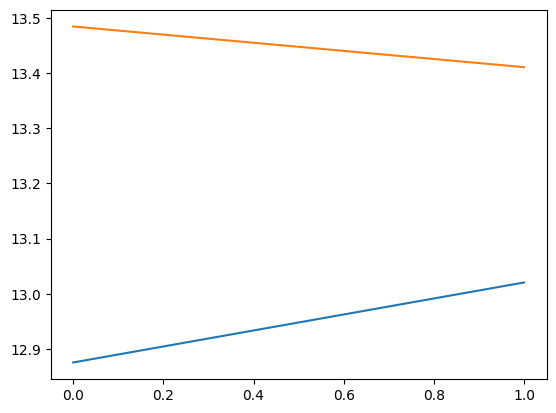

In [ ]:
plot_predictions1(model2, X_test, y_test)

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train, y_train, epochs=500, callbacks=[cp3])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 229.1866 - root_mean_squared_error: 15.1389

1/1 [==============================] - 4s 4s/step - loss: 229.1866 - root_mean_squared_error: 15.1389
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 228.5503 - root_mean_squared_error: 15.1179

1/1 [==============================] - 0s 30ms/step - loss: 228.5503 - root_mean_squared_error: 15.1179
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 227.8812 - root_mean_squared_error: 15.0957

1/1 [==============================] - 0s 39ms/step - loss: 227.8812 - root_mean_squared_error: 15.0957
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 227.1695 - root_mean_squared_error: 15.0721

1/1 [==============================] - 0s 36ms/step - loss: 227.1695 - root_mean_squared_error: 15.0721
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 226.4211 - root_mean_squared_error: 15.0473

1/1 [==============================] - 0s 34ms/step - loss: 226.4211 - root_mean_squared_error: 15.0473
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 225.6574 - root_mean_squared_error: 15.0219

1/1 [==============================] - 0s 26ms/step - loss: 225.6574 - root_mean_squared_error: 15.0219
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 224.8828 - root_mean_squared_error: 14.9961

1/1 [==============================] - 0s 22ms/step - loss: 224.8828 - root_mean_squared_error: 14.9961
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 224.1045 - root_mean_squared_error: 14.9701

1/1 [==============================] - 0s 21ms/step - loss: 224.1045 - root_mean_squared_error: 14.9701
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 223.3241 - root_mean_squared_error: 14.9440

1/1 [==============================] - 0s 22ms/step - loss: 223.3241 - root_mean_squared_error: 14.9440
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 222.5423 - root_mean_squared_error: 14.9179

1/1 [==============================] - 0s 23ms/step - loss: 222.5423 - root_mean_squared_error: 14.9179
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 221.7599 - root_mean_squared_error: 14.8916

1/1 [==============================] - 0s 31ms/step - loss: 221.7599 - root_mean_squared_error: 14.8916
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 220.9774 - root_mean_squared_error: 14.8653

1/1 [==============================] - 0s 25ms/step - loss: 220.9774 - root_mean_squared_error: 14.8653
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 220.1952 - root_mean_squared_error: 14.8390

1/1 [==============================] - 0s 26ms/step - loss: 220.1952 - root_mean_squared_error: 14.8390
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 219.4135 - root_mean_squared_error: 14.8126

1/1 [==============================] - 0s 29ms/step - loss: 219.4135 - root_mean_squared_error: 14.8126
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 218.6324 - root_mean_squared_error: 14.7862

1/1 [==============================] - 0s 25ms/step - loss: 218.6324 - root_mean_squared_error: 14.7862
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 217.8524 - root_mean_squared_error: 14.7598

1/1 [==============================] - 0s 34ms/step - loss: 217.8524 - root_mean_squared_error: 14.7598
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 217.0733 - root_mean_squared_error: 14.7334

1/1 [==============================] - 0s 49ms/step - loss: 217.0733 - root_mean_squared_error: 14.7334
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 216.2955 - root_mean_squared_error: 14.7070

1/1 [==============================] - 0s 41ms/step - loss: 216.2955 - root_mean_squared_error: 14.7070
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 215.5189 - root_mean_squared_error: 14.6806

1/1 [==============================] - 0s 35ms/step - loss: 215.5189 - root_mean_squared_error: 14.6806
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 214.7436 - root_mean_squared_error: 14.6541

1/1 [==============================] - 0s 34ms/step - loss: 214.7436 - root_mean_squared_error: 14.6541
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 213.9698 - root_mean_squared_error: 14.6277

1/1 [==============================] - 0s 34ms/step - loss: 213.9698 - root_mean_squared_error: 14.6277
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 213.1973 - root_mean_squared_error: 14.6013

1/1 [==============================] - 0s 35ms/step - loss: 213.1973 - root_mean_squared_error: 14.6013
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 212.4264 - root_mean_squared_error: 14.5749

1/1 [==============================] - 0s 39ms/step - loss: 212.4264 - root_mean_squared_error: 14.5749
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 211.6569 - root_mean_squared_error: 14.5484

1/1 [==============================] - 0s 34ms/step - loss: 211.6569 - root_mean_squared_error: 14.5484
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 210.8889 - root_mean_squared_error: 14.5220

1/1 [==============================] - 0s 31ms/step - loss: 210.8889 - root_mean_squared_error: 14.5220
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 210.1225 - root_mean_squared_error: 14.4956

1/1 [==============================] - 0s 30ms/step - loss: 210.1225 - root_mean_squared_error: 14.4956
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 209.3575 - root_mean_squared_error: 14.4692

1/1 [==============================] - 0s 35ms/step - loss: 209.3575 - root_mean_squared_error: 14.4692
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 208.6463 - root_mean_squared_error: 14.4446

1/1 [==============================] - 0s 35ms/step - loss: 208.6463 - root_mean_squared_error: 14.4446
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 208.1507 - root_mean_squared_error: 14.4274

1/1 [==============================] - 0s 30ms/step - loss: 208.1507 - root_mean_squared_error: 14.4274
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 207.7372 - root_mean_squared_error: 14.4131

1/1 [==============================] - 0s 26ms/step - loss: 207.7372 - root_mean_squared_error: 14.4131
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 207.3416 - root_mean_squared_error: 14.3994

1/1 [==============================] - 0s 25ms/step - loss: 207.3416 - root_mean_squared_error: 14.3994
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 206.9425 - root_mean_squared_error: 14.3855

1/1 [==============================] - 0s 22ms/step - loss: 206.9425 - root_mean_squared_error: 14.3855
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 206.5407 - root_mean_squared_error: 14.3715

1/1 [==============================] - 0s 23ms/step - loss: 206.5407 - root_mean_squared_error: 14.3715
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 206.1370 - root_mean_squared_error: 14.3575

1/1 [==============================] - 0s 31ms/step - loss: 206.1370 - root_mean_squared_error: 14.3575
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 205.7316 - root_mean_squared_error: 14.3433

1/1 [==============================] - 0s 24ms/step - loss: 205.7316 - root_mean_squared_error: 14.3433
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 205.3251 - root_mean_squared_error: 14.3292

1/1 [==============================] - 0s 24ms/step - loss: 205.3251 - root_mean_squared_error: 14.3292
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 204.9177 - root_mean_squared_error: 14.3149

1/1 [==============================] - 0s 22ms/step - loss: 204.9177 - root_mean_squared_error: 14.3149
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 204.5097 - root_mean_squared_error: 14.3007

1/1 [==============================] - 0s 24ms/step - loss: 204.5097 - root_mean_squared_error: 14.3007
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 204.1011 - root_mean_squared_error: 14.2864

1/1 [==============================] - 0s 23ms/step - loss: 204.1011 - root_mean_squared_error: 14.2864
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 203.6922 - root_mean_squared_error: 14.2721

1/1 [==============================] - 0s 36ms/step - loss: 203.6922 - root_mean_squared_error: 14.2721
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 203.2830 - root_mean_squared_error: 14.2577

1/1 [==============================] - 0s 22ms/step - loss: 203.2830 - root_mean_squared_error: 14.2577
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 202.8737 - root_mean_squared_error: 14.2434

1/1 [==============================] - 0s 24ms/step - loss: 202.8737 - root_mean_squared_error: 14.2434
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 202.4643 - root_mean_squared_error: 14.2290

1/1 [==============================] - 0s 23ms/step - loss: 202.4643 - root_mean_squared_error: 14.2290
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 202.0548 - root_mean_squared_error: 14.2146

1/1 [==============================] - 0s 28ms/step - loss: 202.0548 - root_mean_squared_error: 14.2146
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 201.6454 - root_mean_squared_error: 14.2002

1/1 [==============================] - 0s 25ms/step - loss: 201.6454 - root_mean_squared_error: 14.2002
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 201.2361 - root_mean_squared_error: 14.1858

1/1 [==============================] - 0s 26ms/step - loss: 201.2361 - root_mean_squared_error: 14.1858
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 200.8268 - root_mean_squared_error: 14.1713

1/1 [==============================] - 0s 26ms/step - loss: 200.8268 - root_mean_squared_error: 14.1713
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 200.4176 - root_mean_squared_error: 14.1569

1/1 [==============================] - 0s 26ms/step - loss: 200.4176 - root_mean_squared_error: 14.1569
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 200.0085 - root_mean_squared_error: 14.1424

1/1 [==============================] - 0s 22ms/step - loss: 200.0085 - root_mean_squared_error: 14.1424
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 199.5995 - root_mean_squared_error: 14.1280

1/1 [==============================] - 0s 33ms/step - loss: 199.5995 - root_mean_squared_error: 14.1280
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 199.1907 - root_mean_squared_error: 14.1135

1/1 [==============================] - 0s 31ms/step - loss: 199.1907 - root_mean_squared_error: 14.1135
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 198.7819 - root_mean_squared_error: 14.0990

1/1 [==============================] - 0s 33ms/step - loss: 198.7819 - root_mean_squared_error: 14.0990
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 198.3733 - root_mean_squared_error: 14.0845

1/1 [==============================] - 0s 40ms/step - loss: 198.3733 - root_mean_squared_error: 14.0845
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 197.9648 - root_mean_squared_error: 14.0700

1/1 [==============================] - 0s 19ms/step - loss: 197.9648 - root_mean_squared_error: 14.0700
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 197.5563 - root_mean_squared_error: 14.0555

1/1 [==============================] - 0s 28ms/step - loss: 197.5563 - root_mean_squared_error: 14.0555
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 197.1480 - root_mean_squared_error: 14.0409

1/1 [==============================] - 0s 29ms/step - loss: 197.1480 - root_mean_squared_error: 14.0409
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 196.7397 - root_mean_squared_error: 14.0264

1/1 [==============================] - 0s 25ms/step - loss: 196.7397 - root_mean_squared_error: 14.0264
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 196.3330 - root_mean_squared_error: 14.0119

1/1 [==============================] - 0s 38ms/step - loss: 196.3330 - root_mean_squared_error: 14.0119
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 195.9297 - root_mean_squared_error: 13.9975

1/1 [==============================] - 0s 24ms/step - loss: 195.9297 - root_mean_squared_error: 13.9975
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 195.5309 - root_mean_squared_error: 13.9832

1/1 [==============================] - 0s 27ms/step - loss: 195.5309 - root_mean_squared_error: 13.9832
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 195.1334 - root_mean_squared_error: 13.9690

1/1 [==============================] - 0s 32ms/step - loss: 195.1334 - root_mean_squared_error: 13.9690
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 194.7376 - root_mean_squared_error: 13.9548

1/1 [==============================] - 0s 28ms/step - loss: 194.7376 - root_mean_squared_error: 13.9548
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 194.3419 - root_mean_squared_error: 13.9407

1/1 [==============================] - 0s 29ms/step - loss: 194.3419 - root_mean_squared_error: 13.9407
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 193.9451 - root_mean_squared_error: 13.9264

1/1 [==============================] - 0s 24ms/step - loss: 193.9451 - root_mean_squared_error: 13.9264
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 193.5538 - root_mean_squared_error: 13.9124

1/1 [==============================] - 0s 27ms/step - loss: 193.5538 - root_mean_squared_error: 13.9124
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 193.1753 - root_mean_squared_error: 13.8988

1/1 [==============================] - 0s 26ms/step - loss: 193.1753 - root_mean_squared_error: 13.8988
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 192.8254 - root_mean_squared_error: 13.8862

1/1 [==============================] - 0s 38ms/step - loss: 192.8254 - root_mean_squared_error: 13.8862
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 192.4865 - root_mean_squared_error: 13.8740

1/1 [==============================] - 0s 22ms/step - loss: 192.4865 - root_mean_squared_error: 13.8740
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 192.1514 - root_mean_squared_error: 13.8619

1/1 [==============================] - 0s 28ms/step - loss: 192.1514 - root_mean_squared_error: 13.8619
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 191.8111 - root_mean_squared_error: 13.8496

1/1 [==============================] - 0s 26ms/step - loss: 191.8111 - root_mean_squared_error: 13.8496
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 191.4664 - root_mean_squared_error: 13.8371

1/1 [==============================] - 0s 29ms/step - loss: 191.4664 - root_mean_squared_error: 13.8371
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 191.1183 - root_mean_squared_error: 13.8246

1/1 [==============================] - 0s 31ms/step - loss: 191.1183 - root_mean_squared_error: 13.8246
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 190.7674 - root_mean_squared_error: 13.8119

1/1 [==============================] - 0s 26ms/step - loss: 190.7674 - root_mean_squared_error: 13.8119
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 190.4130 - root_mean_squared_error: 13.7990

1/1 [==============================] - 0s 27ms/step - loss: 190.4130 - root_mean_squared_error: 13.7990
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 190.0557 - root_mean_squared_error: 13.7861

1/1 [==============================] - 0s 26ms/step - loss: 190.0557 - root_mean_squared_error: 13.7861
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 189.6958 - root_mean_squared_error: 13.7730

1/1 [==============================] - 0s 29ms/step - loss: 189.6958 - root_mean_squared_error: 13.7730
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 189.3336 - root_mean_squared_error: 13.7599

1/1 [==============================] - 0s 40ms/step - loss: 189.3336 - root_mean_squared_error: 13.7599
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 188.9695 - root_mean_squared_error: 13.7466

1/1 [==============================] - 0s 32ms/step - loss: 188.9695 - root_mean_squared_error: 13.7466
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 188.6038 - root_mean_squared_error: 13.7333

1/1 [==============================] - 0s 29ms/step - loss: 188.6038 - root_mean_squared_error: 13.7333
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 188.2377 - root_mean_squared_error: 13.7200

1/1 [==============================] - 0s 37ms/step - loss: 188.2377 - root_mean_squared_error: 13.7200
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 187.8705 - root_mean_squared_error: 13.7066

1/1 [==============================] - 0s 31ms/step - loss: 187.8705 - root_mean_squared_error: 13.7066
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 187.5023 - root_mean_squared_error: 13.6931

1/1 [==============================] - 0s 37ms/step - loss: 187.5023 - root_mean_squared_error: 13.6931
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 187.1332 - root_mean_squared_error: 13.6797

1/1 [==============================] - 0s 42ms/step - loss: 187.1332 - root_mean_squared_error: 13.6797
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 186.7632 - root_mean_squared_error: 13.6661

1/1 [==============================] - 0s 31ms/step - loss: 186.7632 - root_mean_squared_error: 13.6661
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 186.3935 - root_mean_squared_error: 13.6526

1/1 [==============================] - 0s 27ms/step - loss: 186.3935 - root_mean_squared_error: 13.6526
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 186.0253 - root_mean_squared_error: 13.6391

1/1 [==============================] - 0s 25ms/step - loss: 186.0253 - root_mean_squared_error: 13.6391
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 185.6606 - root_mean_squared_error: 13.6257

1/1 [==============================] - 0s 26ms/step - loss: 185.6606 - root_mean_squared_error: 13.6257
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 185.2965 - root_mean_squared_error: 13.6124

1/1 [==============================] - 0s 30ms/step - loss: 185.2965 - root_mean_squared_error: 13.6124
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 184.9346 - root_mean_squared_error: 13.5991

1/1 [==============================] - 0s 26ms/step - loss: 184.9346 - root_mean_squared_error: 13.5991
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 184.5751 - root_mean_squared_error: 13.5858

1/1 [==============================] - 0s 24ms/step - loss: 184.5751 - root_mean_squared_error: 13.5858
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 184.2133 - root_mean_squared_error: 13.5725

1/1 [==============================] - 0s 31ms/step - loss: 184.2133 - root_mean_squared_error: 13.5725
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 183.8489 - root_mean_squared_error: 13.5591

1/1 [==============================] - 0s 29ms/step - loss: 183.8489 - root_mean_squared_error: 13.5591
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 183.4816 - root_mean_squared_error: 13.5455

1/1 [==============================] - 0s 27ms/step - loss: 183.4816 - root_mean_squared_error: 13.5455
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 183.1118 - root_mean_squared_error: 13.5319

1/1 [==============================] - 0s 30ms/step - loss: 183.1118 - root_mean_squared_error: 13.5319
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 182.7400 - root_mean_squared_error: 13.5181

1/1 [==============================] - 0s 29ms/step - loss: 182.7400 - root_mean_squared_error: 13.5181
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 182.3674 - root_mean_squared_error: 13.5043

1/1 [==============================] - 0s 24ms/step - loss: 182.3674 - root_mean_squared_error: 13.5043
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 181.9970 - root_mean_squared_error: 13.4906

1/1 [==============================] - 0s 22ms/step - loss: 181.9970 - root_mean_squared_error: 13.4906
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 181.6266 - root_mean_squared_error: 13.4769

1/1 [==============================] - 0s 21ms/step - loss: 181.6266 - root_mean_squared_error: 13.4769
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 181.2551 - root_mean_squared_error: 13.4631

1/1 [==============================] - 0s 31ms/step - loss: 181.2551 - root_mean_squared_error: 13.4631
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 180.8828 - root_mean_squared_error: 13.4493

1/1 [==============================] - 0s 27ms/step - loss: 180.8828 - root_mean_squared_error: 13.4493
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 180.5102 - root_mean_squared_error: 13.4354

1/1 [==============================] - 0s 27ms/step - loss: 180.5102 - root_mean_squared_error: 13.4354
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 180.1367 - root_mean_squared_error: 13.4215

1/1 [==============================] - 0s 17ms/step - loss: 180.1367 - root_mean_squared_error: 13.4215
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 179.7619 - root_mean_squared_error: 13.4075

1/1 [==============================] - 0s 16ms/step - loss: 179.7619 - root_mean_squared_error: 13.4075
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 179.3856 - root_mean_squared_error: 13.3935

1/1 [==============================] - 0s 22ms/step - loss: 179.3856 - root_mean_squared_error: 13.3935
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 179.0090 - root_mean_squared_error: 13.3794

1/1 [==============================] - 0s 29ms/step - loss: 179.0090 - root_mean_squared_error: 13.3794
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 178.6332 - root_mean_squared_error: 13.3654

1/1 [==============================] - 0s 27ms/step - loss: 178.6332 - root_mean_squared_error: 13.3654
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 178.2566 - root_mean_squared_error: 13.3513

1/1 [==============================] - 0s 26ms/step - loss: 178.2566 - root_mean_squared_error: 13.3513
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 177.8790 - root_mean_squared_error: 13.3371

1/1 [==============================] - 0s 33ms/step - loss: 177.8790 - root_mean_squared_error: 13.3371
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 177.5006 - root_mean_squared_error: 13.3229

1/1 [==============================] - 0s 34ms/step - loss: 177.5006 - root_mean_squared_error: 13.3229
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 177.1215 - root_mean_squared_error: 13.3087

1/1 [==============================] - 0s 27ms/step - loss: 177.1215 - root_mean_squared_error: 13.3087
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 176.7413 - root_mean_squared_error: 13.2944

1/1 [==============================] - 0s 33ms/step - loss: 176.7413 - root_mean_squared_error: 13.2944
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 176.3603 - root_mean_squared_error: 13.2801

1/1 [==============================] - 0s 32ms/step - loss: 176.3603 - root_mean_squared_error: 13.2801
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 175.9781 - root_mean_squared_error: 13.2657

1/1 [==============================] - 0s 42ms/step - loss: 175.9781 - root_mean_squared_error: 13.2657
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 175.5956 - root_mean_squared_error: 13.2513

1/1 [==============================] - 0s 29ms/step - loss: 175.5956 - root_mean_squared_error: 13.2513
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 175.2128 - root_mean_squared_error: 13.2368

1/1 [==============================] - 0s 31ms/step - loss: 175.2128 - root_mean_squared_error: 13.2368
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 174.8291 - root_mean_squared_error: 13.2223

1/1 [==============================] - 0s 32ms/step - loss: 174.8291 - root_mean_squared_error: 13.2223
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 174.4445 - root_mean_squared_error: 13.2077

1/1 [==============================] - 0s 34ms/step - loss: 174.4445 - root_mean_squared_error: 13.2077
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 174.0591 - root_mean_squared_error: 13.1931

1/1 [==============================] - 0s 30ms/step - loss: 174.0591 - root_mean_squared_error: 13.1931
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 173.6728 - root_mean_squared_error: 13.1785

1/1 [==============================] - 0s 36ms/step - loss: 173.6728 - root_mean_squared_error: 13.1785
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 173.2856 - root_mean_squared_error: 13.1638

1/1 [==============================] - 0s 37ms/step - loss: 173.2856 - root_mean_squared_error: 13.1638
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 172.8974 - root_mean_squared_error: 13.1490

1/1 [==============================] - 0s 28ms/step - loss: 172.8974 - root_mean_squared_error: 13.1490
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 172.5085 - root_mean_squared_error: 13.1343

1/1 [==============================] - 0s 36ms/step - loss: 172.5085 - root_mean_squared_error: 13.1343
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 172.1188 - root_mean_squared_error: 13.1194

1/1 [==============================] - 0s 36ms/step - loss: 172.1188 - root_mean_squared_error: 13.1194
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 171.7284 - root_mean_squared_error: 13.1045

1/1 [==============================] - 0s 47ms/step - loss: 171.7284 - root_mean_squared_error: 13.1045
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 171.3372 - root_mean_squared_error: 13.0896

1/1 [==============================] - 0s 41ms/step - loss: 171.3372 - root_mean_squared_error: 13.0896
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 170.9454 - root_mean_squared_error: 13.0746

1/1 [==============================] - 0s 37ms/step - loss: 170.9454 - root_mean_squared_error: 13.0746
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 170.5527 - root_mean_squared_error: 13.0596

1/1 [==============================] - 0s 35ms/step - loss: 170.5527 - root_mean_squared_error: 13.0596
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 170.1593 - root_mean_squared_error: 13.0445

1/1 [==============================] - 0s 39ms/step - loss: 170.1593 - root_mean_squared_error: 13.0445
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 169.7649 - root_mean_squared_error: 13.0294

1/1 [==============================] - 0s 40ms/step - loss: 169.7649 - root_mean_squared_error: 13.0294
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 169.3697 - root_mean_squared_error: 13.0142

1/1 [==============================] - 0s 26ms/step - loss: 169.3697 - root_mean_squared_error: 13.0142
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 168.9737 - root_mean_squared_error: 12.9990

1/1 [==============================] - 0s 28ms/step - loss: 168.9737 - root_mean_squared_error: 12.9990
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 168.5769 - root_mean_squared_error: 12.9837

1/1 [==============================] - 0s 43ms/step - loss: 168.5769 - root_mean_squared_error: 12.9837
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 168.1792 - root_mean_squared_error: 12.9684

1/1 [==============================] - 0s 38ms/step - loss: 168.1792 - root_mean_squared_error: 12.9684
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 167.7808 - root_mean_squared_error: 12.9530

1/1 [==============================] - 0s 39ms/step - loss: 167.7808 - root_mean_squared_error: 12.9530
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 167.3815 - root_mean_squared_error: 12.9376

1/1 [==============================] - 0s 35ms/step - loss: 167.3815 - root_mean_squared_error: 12.9376
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 166.9813 - root_mean_squared_error: 12.9221

1/1 [==============================] - 0s 36ms/step - loss: 166.9813 - root_mean_squared_error: 12.9221
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 166.5803 - root_mean_squared_error: 12.9066

1/1 [==============================] - 0s 36ms/step - loss: 166.5803 - root_mean_squared_error: 12.9066
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 166.1785 - root_mean_squared_error: 12.8910

1/1 [==============================] - 0s 33ms/step - loss: 166.1785 - root_mean_squared_error: 12.8910
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 165.7758 - root_mean_squared_error: 12.8754

1/1 [==============================] - 0s 37ms/step - loss: 165.7758 - root_mean_squared_error: 12.8754
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 165.3723 - root_mean_squared_error: 12.8597

1/1 [==============================] - 0s 38ms/step - loss: 165.3723 - root_mean_squared_error: 12.8597
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 164.9676 - root_mean_squared_error: 12.8440

1/1 [==============================] - 0s 42ms/step - loss: 164.9676 - root_mean_squared_error: 12.8440
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 164.5623 - root_mean_squared_error: 12.8282

1/1 [==============================] - 0s 41ms/step - loss: 164.5623 - root_mean_squared_error: 12.8282
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 164.1561 - root_mean_squared_error: 12.8123

1/1 [==============================] - 0s 37ms/step - loss: 164.1561 - root_mean_squared_error: 12.8123
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 163.7491 - root_mean_squared_error: 12.7965

1/1 [==============================] - 0s 40ms/step - loss: 163.7491 - root_mean_squared_error: 12.7965
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 163.3413 - root_mean_squared_error: 12.7805

1/1 [==============================] - 0s 37ms/step - loss: 163.3413 - root_mean_squared_error: 12.7805
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 162.9327 - root_mean_squared_error: 12.7645

1/1 [==============================] - 0s 44ms/step - loss: 162.9327 - root_mean_squared_error: 12.7645
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 162.5233 - root_mean_squared_error: 12.7485

1/1 [==============================] - 0s 44ms/step - loss: 162.5233 - root_mean_squared_error: 12.7485
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 162.1129 - root_mean_squared_error: 12.7324

1/1 [==============================] - 0s 44ms/step - loss: 162.1129 - root_mean_squared_error: 12.7324
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 161.7018 - root_mean_squared_error: 12.7162

1/1 [==============================] - 0s 40ms/step - loss: 161.7018 - root_mean_squared_error: 12.7162
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 161.2898 - root_mean_squared_error: 12.7000

1/1 [==============================] - 0s 45ms/step - loss: 161.2898 - root_mean_squared_error: 12.7000
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 160.8770 - root_mean_squared_error: 12.6837

1/1 [==============================] - 0s 39ms/step - loss: 160.8770 - root_mean_squared_error: 12.6837
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 160.4635 - root_mean_squared_error: 12.6674

1/1 [==============================] - 0s 45ms/step - loss: 160.4635 - root_mean_squared_error: 12.6674
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 160.0490 - root_mean_squared_error: 12.6510

1/1 [==============================] - 0s 38ms/step - loss: 160.0490 - root_mean_squared_error: 12.6510
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 159.6339 - root_mean_squared_error: 12.6346

1/1 [==============================] - 0s 30ms/step - loss: 159.6339 - root_mean_squared_error: 12.6346
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 159.2180 - root_mean_squared_error: 12.6182

1/1 [==============================] - 0s 32ms/step - loss: 159.2180 - root_mean_squared_error: 12.6182
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 158.8012 - root_mean_squared_error: 12.6016

1/1 [==============================] - 0s 31ms/step - loss: 158.8012 - root_mean_squared_error: 12.6016
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 158.3836 - root_mean_squared_error: 12.5851

1/1 [==============================] - 0s 32ms/step - loss: 158.3836 - root_mean_squared_error: 12.5851
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 157.9653 - root_mean_squared_error: 12.5684

1/1 [==============================] - 0s 30ms/step - loss: 157.9653 - root_mean_squared_error: 12.5684
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 157.5462 - root_mean_squared_error: 12.5517

1/1 [==============================] - 0s 32ms/step - loss: 157.5462 - root_mean_squared_error: 12.5517
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 157.1264 - root_mean_squared_error: 12.5350

1/1 [==============================] - 0s 37ms/step - loss: 157.1264 - root_mean_squared_error: 12.5350
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 156.7059 - root_mean_squared_error: 12.5182

1/1 [==============================] - 0s 36ms/step - loss: 156.7059 - root_mean_squared_error: 12.5182
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 156.2846 - root_mean_squared_error: 12.5014

1/1 [==============================] - 0s 36ms/step - loss: 156.2846 - root_mean_squared_error: 12.5014
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 155.8628 - root_mean_squared_error: 12.4845

1/1 [==============================] - 0s 41ms/step - loss: 155.8628 - root_mean_squared_error: 12.4845
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 155.4402 - root_mean_squared_error: 12.4676

1/1 [==============================] - 0s 39ms/step - loss: 155.4402 - root_mean_squared_error: 12.4676
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 155.0169 - root_mean_squared_error: 12.4506

1/1 [==============================] - 0s 38ms/step - loss: 155.0169 - root_mean_squared_error: 12.4506
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 154.5929 - root_mean_squared_error: 12.4335

1/1 [==============================] - 0s 61ms/step - loss: 154.5929 - root_mean_squared_error: 12.4335
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 154.1682 - root_mean_squared_error: 12.4164

1/1 [==============================] - 0s 66ms/step - loss: 154.1682 - root_mean_squared_error: 12.4164
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 153.7430 - root_mean_squared_error: 12.3993

1/1 [==============================] - 0s 67ms/step - loss: 153.7430 - root_mean_squared_error: 12.3993
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 153.3171 - root_mean_squared_error: 12.3821

1/1 [==============================] - 0s 86ms/step - loss: 153.3171 - root_mean_squared_error: 12.3821
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 152.8906 - root_mean_squared_error: 12.3649

1/1 [==============================] - 0s 62ms/step - loss: 152.8906 - root_mean_squared_error: 12.3649
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 152.4636 - root_mean_squared_error: 12.3476

1/1 [==============================] - 0s 90ms/step - loss: 152.4636 - root_mean_squared_error: 12.3476
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 152.0360 - root_mean_squared_error: 12.3303

1/1 [==============================] - 0s 74ms/step - loss: 152.0360 - root_mean_squared_error: 12.3303
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 151.6078 - root_mean_squared_error: 12.3129

1/1 [==============================] - 0s 75ms/step - loss: 151.6078 - root_mean_squared_error: 12.3129
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 151.1792 - root_mean_squared_error: 12.2955

1/1 [==============================] - 0s 83ms/step - loss: 151.1792 - root_mean_squared_error: 12.2955
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 150.7500 - root_mean_squared_error: 12.2780

1/1 [==============================] - 0s 79ms/step - loss: 150.7500 - root_mean_squared_error: 12.2780
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 150.3204 - root_mean_squared_error: 12.2605

1/1 [==============================] - 0s 67ms/step - loss: 150.3204 - root_mean_squared_error: 12.2605
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 149.8903 - root_mean_squared_error: 12.2430

1/1 [==============================] - 0s 67ms/step - loss: 149.8903 - root_mean_squared_error: 12.2430
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 149.4597 - root_mean_squared_error: 12.2254

1/1 [==============================] - 0s 75ms/step - loss: 149.4597 - root_mean_squared_error: 12.2254
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 149.0288 - root_mean_squared_error: 12.2077

1/1 [==============================] - 0s 75ms/step - loss: 149.0288 - root_mean_squared_error: 12.2077
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 148.5974 - root_mean_squared_error: 12.1901

1/1 [==============================] - 0s 68ms/step - loss: 148.5974 - root_mean_squared_error: 12.1901
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 148.1657 - root_mean_squared_error: 12.1723

1/1 [==============================] - 0s 82ms/step - loss: 148.1657 - root_mean_squared_error: 12.1723
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 147.7336 - root_mean_squared_error: 12.1546

1/1 [==============================] - 0s 86ms/step - loss: 147.7336 - root_mean_squared_error: 12.1546
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 147.3012 - root_mean_squared_error: 12.1368

1/1 [==============================] - 0s 87ms/step - loss: 147.3012 - root_mean_squared_error: 12.1368
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 146.8685 - root_mean_squared_error: 12.1189

1/1 [==============================] - 0s 74ms/step - loss: 146.8685 - root_mean_squared_error: 12.1189
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 146.4356 - root_mean_squared_error: 12.1011

1/1 [==============================] - 0s 44ms/step - loss: 146.4356 - root_mean_squared_error: 12.1011
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 146.0023 - root_mean_squared_error: 12.0831

1/1 [==============================] - 0s 51ms/step - loss: 146.0023 - root_mean_squared_error: 12.0831
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 145.5689 - root_mean_squared_error: 12.0652

1/1 [==============================] - 0s 52ms/step - loss: 145.5689 - root_mean_squared_error: 12.0652
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 145.1352 - root_mean_squared_error: 12.0472

1/1 [==============================] - 0s 76ms/step - loss: 145.1352 - root_mean_squared_error: 12.0472
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 144.7014 - root_mean_squared_error: 12.0292

1/1 [==============================] - 0s 71ms/step - loss: 144.7014 - root_mean_squared_error: 12.0292
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 144.2674 - root_mean_squared_error: 12.0111

1/1 [==============================] - 0s 59ms/step - loss: 144.2674 - root_mean_squared_error: 12.0111
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 143.8335 - root_mean_squared_error: 11.9931

1/1 [==============================] - 0s 61ms/step - loss: 143.8335 - root_mean_squared_error: 11.9931
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 143.3994 - root_mean_squared_error: 11.9750

1/1 [==============================] - 0s 37ms/step - loss: 143.3994 - root_mean_squared_error: 11.9750
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 142.9653 - root_mean_squared_error: 11.9568

1/1 [==============================] - 0s 48ms/step - loss: 142.9653 - root_mean_squared_error: 11.9568
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 142.5312 - root_mean_squared_error: 11.9386

1/1 [==============================] - 0s 52ms/step - loss: 142.5312 - root_mean_squared_error: 11.9386
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 142.0970 - root_mean_squared_error: 11.9204

1/1 [==============================] - 0s 29ms/step - loss: 142.0970 - root_mean_squared_error: 11.9204
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 141.6630 - root_mean_squared_error: 11.9022

1/1 [==============================] - 0s 29ms/step - loss: 141.6630 - root_mean_squared_error: 11.9022
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 141.2292 - root_mean_squared_error: 11.8840

1/1 [==============================] - 0s 33ms/step - loss: 141.2292 - root_mean_squared_error: 11.8840
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 140.7954 - root_mean_squared_error: 11.8657

1/1 [==============================] - 0s 33ms/step - loss: 140.7954 - root_mean_squared_error: 11.8657
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 140.3618 - root_mean_squared_error: 11.8474

1/1 [==============================] - 0s 41ms/step - loss: 140.3618 - root_mean_squared_error: 11.8474
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 139.9285 - root_mean_squared_error: 11.8291

1/1 [==============================] - 0s 34ms/step - loss: 139.9285 - root_mean_squared_error: 11.8291
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 139.4953 - root_mean_squared_error: 11.8108

1/1 [==============================] - 0s 33ms/step - loss: 139.4953 - root_mean_squared_error: 11.8108
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 139.0624 - root_mean_squared_error: 11.7925

1/1 [==============================] - 0s 33ms/step - loss: 139.0624 - root_mean_squared_error: 11.7925
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 138.6297 - root_mean_squared_error: 11.7741

1/1 [==============================] - 0s 31ms/step - loss: 138.6297 - root_mean_squared_error: 11.7741
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 138.1974 - root_mean_squared_error: 11.7557

1/1 [==============================] - 0s 35ms/step - loss: 138.1974 - root_mean_squared_error: 11.7557
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 137.7654 - root_mean_squared_error: 11.7373

1/1 [==============================] - 0s 32ms/step - loss: 137.7654 - root_mean_squared_error: 11.7373
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 137.3336 - root_mean_squared_error: 11.7189

1/1 [==============================] - 0s 32ms/step - loss: 137.3336 - root_mean_squared_error: 11.7189
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 136.9023 - root_mean_squared_error: 11.7005

1/1 [==============================] - 0s 44ms/step - loss: 136.9023 - root_mean_squared_error: 11.7005
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 136.4713 - root_mean_squared_error: 11.6821

1/1 [==============================] - 0s 31ms/step - loss: 136.4713 - root_mean_squared_error: 11.6821
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 136.0408 - root_mean_squared_error: 11.6637

1/1 [==============================] - 0s 34ms/step - loss: 136.0408 - root_mean_squared_error: 11.6637
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 135.6107 - root_mean_squared_error: 11.6452

1/1 [==============================] - 0s 34ms/step - loss: 135.6107 - root_mean_squared_error: 11.6452
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 135.1810 - root_mean_squared_error: 11.6267

1/1 [==============================] - 0s 30ms/step - loss: 135.1810 - root_mean_squared_error: 11.6267
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 134.7519 - root_mean_squared_error: 11.6083

1/1 [==============================] - 0s 28ms/step - loss: 134.7519 - root_mean_squared_error: 11.6083
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 134.3234 - root_mean_squared_error: 11.5898

1/1 [==============================] - 0s 31ms/step - loss: 134.3234 - root_mean_squared_error: 11.5898
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 133.8955 - root_mean_squared_error: 11.5713

1/1 [==============================] - 0s 30ms/step - loss: 133.8955 - root_mean_squared_error: 11.5713
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 133.4681 - root_mean_squared_error: 11.5528

1/1 [==============================] - 0s 37ms/step - loss: 133.4681 - root_mean_squared_error: 11.5528
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 133.0414 - root_mean_squared_error: 11.5344

1/1 [==============================] - 0s 36ms/step - loss: 133.0414 - root_mean_squared_error: 11.5344
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 132.6153 - root_mean_squared_error: 11.5159

1/1 [==============================] - 0s 32ms/step - loss: 132.6153 - root_mean_squared_error: 11.5159
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 132.1898 - root_mean_squared_error: 11.4974

1/1 [==============================] - 0s 32ms/step - loss: 132.1898 - root_mean_squared_error: 11.4974
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 131.7650 - root_mean_squared_error: 11.4789

1/1 [==============================] - 0s 28ms/step - loss: 131.7650 - root_mean_squared_error: 11.4789
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 131.3409 - root_mean_squared_error: 11.4604

1/1 [==============================] - 0s 29ms/step - loss: 131.3409 - root_mean_squared_error: 11.4604
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 130.9176 - root_mean_squared_error: 11.4419

1/1 [==============================] - 0s 31ms/step - loss: 130.9176 - root_mean_squared_error: 11.4419
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 130.4951 - root_mean_squared_error: 11.4234

1/1 [==============================] - 0s 26ms/step - loss: 130.4951 - root_mean_squared_error: 11.4234
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 130.0734 - root_mean_squared_error: 11.4050

1/1 [==============================] - 0s 30ms/step - loss: 130.0734 - root_mean_squared_error: 11.4050
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 129.6524 - root_mean_squared_error: 11.3865

1/1 [==============================] - 0s 32ms/step - loss: 129.6524 - root_mean_squared_error: 11.3865
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 129.2323 - root_mean_squared_error: 11.3680

1/1 [==============================] - 0s 32ms/step - loss: 129.2323 - root_mean_squared_error: 11.3680
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 128.8131 - root_mean_squared_error: 11.3496

1/1 [==============================] - 0s 35ms/step - loss: 128.8131 - root_mean_squared_error: 11.3496
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 128.3947 - root_mean_squared_error: 11.3311

1/1 [==============================] - 0s 28ms/step - loss: 128.3947 - root_mean_squared_error: 11.3311
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 127.9771 - root_mean_squared_error: 11.3127

1/1 [==============================] - 0s 40ms/step - loss: 127.9771 - root_mean_squared_error: 11.3127
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 127.5606 - root_mean_squared_error: 11.2943

1/1 [==============================] - 0s 32ms/step - loss: 127.5606 - root_mean_squared_error: 11.2943
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 127.1449 - root_mean_squared_error: 11.2759

1/1 [==============================] - 0s 36ms/step - loss: 127.1449 - root_mean_squared_error: 11.2759
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 126.7302 - root_mean_squared_error: 11.2575

1/1 [==============================] - 0s 23ms/step - loss: 126.7302 - root_mean_squared_error: 11.2575
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 126.3165 - root_mean_squared_error: 11.2391

1/1 [==============================] - 0s 24ms/step - loss: 126.3165 - root_mean_squared_error: 11.2391
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 125.9036 - root_mean_squared_error: 11.2207

1/1 [==============================] - 0s 19ms/step - loss: 125.9036 - root_mean_squared_error: 11.2207
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 125.4918 - root_mean_squared_error: 11.2023

1/1 [==============================] - 0s 18ms/step - loss: 125.4918 - root_mean_squared_error: 11.2023
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 125.0810 - root_mean_squared_error: 11.1840

1/1 [==============================] - 0s 19ms/step - loss: 125.0810 - root_mean_squared_error: 11.1840
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 124.6712 - root_mean_squared_error: 11.1656

1/1 [==============================] - 0s 17ms/step - loss: 124.6712 - root_mean_squared_error: 11.1656
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 124.2624 - root_mean_squared_error: 11.1473

1/1 [==============================] - 0s 21ms/step - loss: 124.2624 - root_mean_squared_error: 11.1473
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 123.8547 - root_mean_squared_error: 11.1290

1/1 [==============================] - 0s 21ms/step - loss: 123.8547 - root_mean_squared_error: 11.1290
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 123.4481 - root_mean_squared_error: 11.1107

1/1 [==============================] - 0s 16ms/step - loss: 123.4481 - root_mean_squared_error: 11.1107
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 123.0425 - root_mean_squared_error: 11.0925

1/1 [==============================] - 0s 19ms/step - loss: 123.0425 - root_mean_squared_error: 11.0925
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 122.6381 - root_mean_squared_error: 11.0742

1/1 [==============================] - 0s 18ms/step - loss: 122.6381 - root_mean_squared_error: 11.0742
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 122.2347 - root_mean_squared_error: 11.0560

1/1 [==============================] - 0s 18ms/step - loss: 122.2347 - root_mean_squared_error: 11.0560
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 121.8325 - root_mean_squared_error: 11.0378

1/1 [==============================] - 0s 20ms/step - loss: 121.8325 - root_mean_squared_error: 11.0378
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 121.4313 - root_mean_squared_error: 11.0196

1/1 [==============================] - 0s 26ms/step - loss: 121.4313 - root_mean_squared_error: 11.0196
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 121.0312 - root_mean_squared_error: 11.0014

1/1 [==============================] - 0s 19ms/step - loss: 121.0312 - root_mean_squared_error: 11.0014
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 120.6323 - root_mean_squared_error: 10.9833

1/1 [==============================] - 0s 19ms/step - loss: 120.6323 - root_mean_squared_error: 10.9833
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 120.2345 - root_mean_squared_error: 10.9651

1/1 [==============================] - 0s 19ms/step - loss: 120.2345 - root_mean_squared_error: 10.9651
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 119.8378 - root_mean_squared_error: 10.9470

1/1 [==============================] - 0s 25ms/step - loss: 119.8378 - root_mean_squared_error: 10.9470
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 119.4423 - root_mean_squared_error: 10.9290

1/1 [==============================] - 0s 22ms/step - loss: 119.4423 - root_mean_squared_error: 10.9290
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 119.0479 - root_mean_squared_error: 10.9109

1/1 [==============================] - 0s 20ms/step - loss: 119.0479 - root_mean_squared_error: 10.9109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 118.6546 - root_mean_squared_error: 10.8929

1/1 [==============================] - 0s 21ms/step - loss: 118.6546 - root_mean_squared_error: 10.8929
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 118.2624 - root_mean_squared_error: 10.8749

1/1 [==============================] - 0s 20ms/step - loss: 118.2624 - root_mean_squared_error: 10.8749
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 117.8714 - root_mean_squared_error: 10.8569

1/1 [==============================] - 0s 21ms/step - loss: 117.8714 - root_mean_squared_error: 10.8569
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 117.4815 - root_mean_squared_error: 10.8389

1/1 [==============================] - 0s 18ms/step - loss: 117.4815 - root_mean_squared_error: 10.8389
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 117.0927 - root_mean_squared_error: 10.8209

1/1 [==============================] - 0s 16ms/step - loss: 117.0927 - root_mean_squared_error: 10.8209
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 116.7050 - root_mean_squared_error: 10.8030

1/1 [==============================] - 0s 19ms/step - loss: 116.7050 - root_mean_squared_error: 10.8030
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 116.3184 - root_mean_squared_error: 10.7851

1/1 [==============================] - 0s 22ms/step - loss: 116.3184 - root_mean_squared_error: 10.7851
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 115.9330 - root_mean_squared_error: 10.7672

1/1 [==============================] - 0s 21ms/step - loss: 115.9330 - root_mean_squared_error: 10.7672
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 115.5486 - root_mean_squared_error: 10.7494

1/1 [==============================] - 0s 23ms/step - loss: 115.5486 - root_mean_squared_error: 10.7494
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 115.1656 - root_mean_squared_error: 10.7315

1/1 [==============================] - 0s 25ms/step - loss: 115.1656 - root_mean_squared_error: 10.7315
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 114.7839 - root_mean_squared_error: 10.7137

1/1 [==============================] - 0s 19ms/step - loss: 114.7839 - root_mean_squared_error: 10.7137
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 114.4033 - root_mean_squared_error: 10.6959

1/1 [==============================] - 0s 23ms/step - loss: 114.4033 - root_mean_squared_error: 10.6959
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 114.0238 - root_mean_squared_error: 10.6782

1/1 [==============================] - 0s 22ms/step - loss: 114.0238 - root_mean_squared_error: 10.6782
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 113.6454 - root_mean_squared_error: 10.6605

1/1 [==============================] - 0s 23ms/step - loss: 113.6454 - root_mean_squared_error: 10.6605
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 113.2681 - root_mean_squared_error: 10.6427

1/1 [==============================] - 0s 23ms/step - loss: 113.2681 - root_mean_squared_error: 10.6427
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 112.8918 - root_mean_squared_error: 10.6251

1/1 [==============================] - 0s 21ms/step - loss: 112.8918 - root_mean_squared_error: 10.6251
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 112.5167 - root_mean_squared_error: 10.6074

1/1 [==============================] - 0s 20ms/step - loss: 112.5167 - root_mean_squared_error: 10.6074
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 112.1427 - root_mean_squared_error: 10.5897

1/1 [==============================] - 0s 20ms/step - loss: 112.1427 - root_mean_squared_error: 10.5897
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 111.7697 - root_mean_squared_error: 10.5721

1/1 [==============================] - 0s 20ms/step - loss: 111.7697 - root_mean_squared_error: 10.5721
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 111.3978 - root_mean_squared_error: 10.5545

1/1 [==============================] - 0s 26ms/step - loss: 111.3978 - root_mean_squared_error: 10.5545
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 111.0270 - root_mean_squared_error: 10.5369

1/1 [==============================] - 0s 19ms/step - loss: 111.0270 - root_mean_squared_error: 10.5369
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 110.6573 - root_mean_squared_error: 10.5194

1/1 [==============================] - 0s 20ms/step - loss: 110.6573 - root_mean_squared_error: 10.5194
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 110.2886 - root_mean_squared_error: 10.5018

1/1 [==============================] - 0s 20ms/step - loss: 110.2886 - root_mean_squared_error: 10.5018
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 109.9209 - root_mean_squared_error: 10.4843

1/1 [==============================] - 0s 23ms/step - loss: 109.9209 - root_mean_squared_error: 10.4843
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 109.5544 - root_mean_squared_error: 10.4668

1/1 [==============================] - 0s 17ms/step - loss: 109.5544 - root_mean_squared_error: 10.4668
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 109.1889 - root_mean_squared_error: 10.4494

1/1 [==============================] - 0s 26ms/step - loss: 109.1889 - root_mean_squared_error: 10.4494
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 108.8245 - root_mean_squared_error: 10.4319

1/1 [==============================] - 0s 21ms/step - loss: 108.8245 - root_mean_squared_error: 10.4319
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 108.4611 - root_mean_squared_error: 10.4145

1/1 [==============================] - 0s 19ms/step - loss: 108.4611 - root_mean_squared_error: 10.4145
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 108.0988 - root_mean_squared_error: 10.3971

1/1 [==============================] - 0s 22ms/step - loss: 108.0988 - root_mean_squared_error: 10.3971
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 107.7374 - root_mean_squared_error: 10.3797

1/1 [==============================] - 0s 26ms/step - loss: 107.7374 - root_mean_squared_error: 10.3797
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 107.3770 - root_mean_squared_error: 10.3623

1/1 [==============================] - 0s 23ms/step - loss: 107.3770 - root_mean_squared_error: 10.3623
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 107.0177 - root_mean_squared_error: 10.3449

1/1 [==============================] - 0s 24ms/step - loss: 107.0177 - root_mean_squared_error: 10.3449
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 106.6593 - root_mean_squared_error: 10.3276

1/1 [==============================] - 0s 17ms/step - loss: 106.6593 - root_mean_squared_error: 10.3276
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 106.3019 - root_mean_squared_error: 10.3103

1/1 [==============================] - 0s 22ms/step - loss: 106.3019 - root_mean_squared_error: 10.3103
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 105.9456 - root_mean_squared_error: 10.2930

1/1 [==============================] - 0s 15ms/step - loss: 105.9456 - root_mean_squared_error: 10.2930
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 105.5902 - root_mean_squared_error: 10.2757

1/1 [==============================] - 0s 16ms/step - loss: 105.5902 - root_mean_squared_error: 10.2757
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 105.2357 - root_mean_squared_error: 10.2584

1/1 [==============================] - 0s 19ms/step - loss: 105.2357 - root_mean_squared_error: 10.2584
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 104.8823 - root_mean_squared_error: 10.2412

1/1 [==============================] - 0s 21ms/step - loss: 104.8823 - root_mean_squared_error: 10.2412
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 104.5298 - root_mean_squared_error: 10.2240

1/1 [==============================] - 0s 16ms/step - loss: 104.5298 - root_mean_squared_error: 10.2240
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 104.1783 - root_mean_squared_error: 10.2068

1/1 [==============================] - 0s 18ms/step - loss: 104.1783 - root_mean_squared_error: 10.2068
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 103.8277 - root_mean_squared_error: 10.1896

1/1 [==============================] - 0s 20ms/step - loss: 103.8277 - root_mean_squared_error: 10.1896
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 103.4781 - root_mean_squared_error: 10.1724

1/1 [==============================] - 0s 19ms/step - loss: 103.4781 - root_mean_squared_error: 10.1724
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 103.1295 - root_mean_squared_error: 10.1553

1/1 [==============================] - 0s 19ms/step - loss: 103.1295 - root_mean_squared_error: 10.1553
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 102.7818 - root_mean_squared_error: 10.1381

1/1 [==============================] - 0s 17ms/step - loss: 102.7818 - root_mean_squared_error: 10.1381
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 102.4352 - root_mean_squared_error: 10.1210

1/1 [==============================] - 0s 20ms/step - loss: 102.4352 - root_mean_squared_error: 10.1210
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 102.0895 - root_mean_squared_error: 10.1039

1/1 [==============================] - 0s 16ms/step - loss: 102.0895 - root_mean_squared_error: 10.1039
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 101.7448 - root_mean_squared_error: 10.0869

1/1 [==============================] - 0s 16ms/step - loss: 101.7448 - root_mean_squared_error: 10.0869
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 101.4010 - root_mean_squared_error: 10.0698

1/1 [==============================] - 0s 20ms/step - loss: 101.4010 - root_mean_squared_error: 10.0698
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 101.0582 - root_mean_squared_error: 10.0528

1/1 [==============================] - 0s 20ms/step - loss: 101.0582 - root_mean_squared_error: 10.0528
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 100.7163 - root_mean_squared_error: 10.0358

1/1 [==============================] - 0s 17ms/step - loss: 100.7163 - root_mean_squared_error: 10.0358
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 100.3755 - root_mean_squared_error: 10.0188

1/1 [==============================] - 0s 20ms/step - loss: 100.3755 - root_mean_squared_error: 10.0188
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 100.0357 - root_mean_squared_error: 10.0018

1/1 [==============================] - 0s 16ms/step - loss: 100.0357 - root_mean_squared_error: 10.0018
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 99.6968 - root_mean_squared_error: 9.9848

1/1 [==============================] - 0s 18ms/step - loss: 99.6968 - root_mean_squared_error: 9.9848
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 99.3589 - root_mean_squared_error: 9.9679

1/1 [==============================] - 0s 18ms/step - loss: 99.3589 - root_mean_squared_error: 9.9679
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 99.0219 - root_mean_squared_error: 9.9510

1/1 [==============================] - 0s 18ms/step - loss: 99.0219 - root_mean_squared_error: 9.9510
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 98.6860 - root_mean_squared_error: 9.9341

1/1 [==============================] - 0s 21ms/step - loss: 98.6860 - root_mean_squared_error: 9.9341
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 98.3510 - root_mean_squared_error: 9.9172

1/1 [==============================] - 0s 20ms/step - loss: 98.3510 - root_mean_squared_error: 9.9172
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 98.0170 - root_mean_squared_error: 9.9004

1/1 [==============================] - 0s 17ms/step - loss: 98.0170 - root_mean_squared_error: 9.9004
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 97.6840 - root_mean_squared_error: 9.8835

1/1 [==============================] - 0s 21ms/step - loss: 97.6840 - root_mean_squared_error: 9.8835
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 97.3521 - root_mean_squared_error: 9.8667

1/1 [==============================] - 0s 20ms/step - loss: 97.3521 - root_mean_squared_error: 9.8667
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 97.0211 - root_mean_squared_error: 9.8499

1/1 [==============================] - 0s 19ms/step - loss: 97.0211 - root_mean_squared_error: 9.8499
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 96.6913 - root_mean_squared_error: 9.8332

1/1 [==============================] - 0s 17ms/step - loss: 96.6913 - root_mean_squared_error: 9.8332
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 96.3624 - root_mean_squared_error: 9.8164

1/1 [==============================] - 0s 18ms/step - loss: 96.3624 - root_mean_squared_error: 9.8164
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 96.0346 - root_mean_squared_error: 9.7997

1/1 [==============================] - 0s 19ms/step - loss: 96.0346 - root_mean_squared_error: 9.7997
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 95.7079 - root_mean_squared_error: 9.7830

1/1 [==============================] - 0s 16ms/step - loss: 95.7079 - root_mean_squared_error: 9.7830
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 95.3821 - root_mean_squared_error: 9.7664

1/1 [==============================] - 0s 16ms/step - loss: 95.3821 - root_mean_squared_error: 9.7664
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 95.0575 - root_mean_squared_error: 9.7497

1/1 [==============================] - 0s 18ms/step - loss: 95.0575 - root_mean_squared_error: 9.7497
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 94.7339 - root_mean_squared_error: 9.7331

1/1 [==============================] - 0s 20ms/step - loss: 94.7339 - root_mean_squared_error: 9.7331
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 94.4115 - root_mean_squared_error: 9.7166

1/1 [==============================] - 0s 16ms/step - loss: 94.4115 - root_mean_squared_error: 9.7166
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 94.0902 - root_mean_squared_error: 9.7000

1/1 [==============================] - 0s 16ms/step - loss: 94.0902 - root_mean_squared_error: 9.7000
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 93.7700 - root_mean_squared_error: 9.6835

1/1 [==============================] - 0s 16ms/step - loss: 93.7700 - root_mean_squared_error: 9.6835
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 93.4509 - root_mean_squared_error: 9.6670

1/1 [==============================] - 0s 21ms/step - loss: 93.4509 - root_mean_squared_error: 9.6670
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 93.1329 - root_mean_squared_error: 9.6505

1/1 [==============================] - 0s 22ms/step - loss: 93.1329 - root_mean_squared_error: 9.6505
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 92.8160 - root_mean_squared_error: 9.6341

1/1 [==============================] - 0s 18ms/step - loss: 92.8160 - root_mean_squared_error: 9.6341
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 92.5002 - root_mean_squared_error: 9.6177

1/1 [==============================] - 0s 27ms/step - loss: 92.5002 - root_mean_squared_error: 9.6177
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 92.1856 - root_mean_squared_error: 9.6013

1/1 [==============================] - 0s 24ms/step - loss: 92.1856 - root_mean_squared_error: 9.6013
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 91.8722 - root_mean_squared_error: 9.5850

1/1 [==============================] - 0s 25ms/step - loss: 91.8722 - root_mean_squared_error: 9.5850
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 91.5600 - root_mean_squared_error: 9.5687

1/1 [==============================] - 0s 17ms/step - loss: 91.5600 - root_mean_squared_error: 9.5687
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 91.2490 - root_mean_squared_error: 9.5524

1/1 [==============================] - 0s 16ms/step - loss: 91.2490 - root_mean_squared_error: 9.5524
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 90.9392 - root_mean_squared_error: 9.5362

1/1 [==============================] - 0s 20ms/step - loss: 90.9392 - root_mean_squared_error: 9.5362
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 90.6306 - root_mean_squared_error: 9.5200

1/1 [==============================] - 0s 19ms/step - loss: 90.6306 - root_mean_squared_error: 9.5200
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 90.3232 - root_mean_squared_error: 9.5039

1/1 [==============================] - 0s 18ms/step - loss: 90.3232 - root_mean_squared_error: 9.5039
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 90.0171 - root_mean_squared_error: 9.4877

1/1 [==============================] - 0s 17ms/step - loss: 90.0171 - root_mean_squared_error: 9.4877
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 89.7122 - root_mean_squared_error: 9.4717

1/1 [==============================] - 0s 20ms/step - loss: 89.7122 - root_mean_squared_error: 9.4717
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 89.4086 - root_mean_squared_error: 9.4556

1/1 [==============================] - 0s 21ms/step - loss: 89.4086 - root_mean_squared_error: 9.4556
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 89.1062 - root_mean_squared_error: 9.4396

1/1 [==============================] - 0s 18ms/step - loss: 89.1062 - root_mean_squared_error: 9.4396
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 88.8051 - root_mean_squared_error: 9.4236

1/1 [==============================] - 0s 20ms/step - loss: 88.8051 - root_mean_squared_error: 9.4236
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 88.5053 - root_mean_squared_error: 9.4077

1/1 [==============================] - 0s 19ms/step - loss: 88.5053 - root_mean_squared_error: 9.4077
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 88.2067 - root_mean_squared_error: 9.3918

1/1 [==============================] - 0s 17ms/step - loss: 88.2067 - root_mean_squared_error: 9.3918
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 87.9094 - root_mean_squared_error: 9.3760

1/1 [==============================] - 0s 21ms/step - loss: 87.9094 - root_mean_squared_error: 9.3760
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 87.6134 - root_mean_squared_error: 9.3602

1/1 [==============================] - 0s 20ms/step - loss: 87.6134 - root_mean_squared_error: 9.3602
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 87.3188 - root_mean_squared_error: 9.3445

1/1 [==============================] - 0s 17ms/step - loss: 87.3188 - root_mean_squared_error: 9.3445
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 87.0254 - root_mean_squared_error: 9.3287

1/1 [==============================] - 0s 17ms/step - loss: 87.0254 - root_mean_squared_error: 9.3287
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 86.7334 - root_mean_squared_error: 9.3131

1/1 [==============================] - 0s 17ms/step - loss: 86.7334 - root_mean_squared_error: 9.3131
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 86.4426 - root_mean_squared_error: 9.2975

1/1 [==============================] - 0s 17ms/step - loss: 86.4426 - root_mean_squared_error: 9.2975
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 86.1532 - root_mean_squared_error: 9.2819

1/1 [==============================] - 0s 17ms/step - loss: 86.1532 - root_mean_squared_error: 9.2819
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 85.8651 - root_mean_squared_error: 9.2663

1/1 [==============================] - 0s 18ms/step - loss: 85.8651 - root_mean_squared_error: 9.2663
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 85.5784 - root_mean_squared_error: 9.2509

1/1 [==============================] - 0s 16ms/step - loss: 85.5784 - root_mean_squared_error: 9.2509
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 85.2929 - root_mean_squared_error: 9.2354

1/1 [==============================] - 0s 16ms/step - loss: 85.2929 - root_mean_squared_error: 9.2354
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 85.0089 - root_mean_squared_error: 9.2200

1/1 [==============================] - 0s 17ms/step - loss: 85.0089 - root_mean_squared_error: 9.2200
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 84.7261 - root_mean_squared_error: 9.2047

1/1 [==============================] - 0s 18ms/step - loss: 84.7261 - root_mean_squared_error: 9.2047
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 84.4447 - root_mean_squared_error: 9.1894

1/1 [==============================] - 0s 17ms/step - loss: 84.4447 - root_mean_squared_error: 9.1894
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 84.1647 - root_mean_squared_error: 9.1741

1/1 [==============================] - 0s 19ms/step - loss: 84.1647 - root_mean_squared_error: 9.1741
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 83.8860 - root_mean_squared_error: 9.1589

1/1 [==============================] - 0s 16ms/step - loss: 83.8860 - root_mean_squared_error: 9.1589
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 83.6087 - root_mean_squared_error: 9.1438

1/1 [==============================] - 0s 26ms/step - loss: 83.6087 - root_mean_squared_error: 9.1438
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 83.3327 - root_mean_squared_error: 9.1287

1/1 [==============================] - 0s 24ms/step - loss: 83.3327 - root_mean_squared_error: 9.1287
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 83.0581 - root_mean_squared_error: 9.1136

1/1 [==============================] - 0s 17ms/step - loss: 83.0581 - root_mean_squared_error: 9.1136
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 82.7848 - root_mean_squared_error: 9.0986

1/1 [==============================] - 0s 21ms/step - loss: 82.7848 - root_mean_squared_error: 9.0986
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 82.5129 - root_mean_squared_error: 9.0837

1/1 [==============================] - 0s 26ms/step - loss: 82.5129 - root_mean_squared_error: 9.0837
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 82.2424 - root_mean_squared_error: 9.0688

1/1 [==============================] - 0s 24ms/step - loss: 82.2424 - root_mean_squared_error: 9.0688
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 81.9732 - root_mean_squared_error: 9.0539

1/1 [==============================] - 0s 24ms/step - loss: 81.9732 - root_mean_squared_error: 9.0539
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 81.7054 - root_mean_squared_error: 9.0391

1/1 [==============================] - 0s 27ms/step - loss: 81.7054 - root_mean_squared_error: 9.0391
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 81.4389 - root_mean_squared_error: 9.0243

1/1 [==============================] - 0s 16ms/step - loss: 81.4389 - root_mean_squared_error: 9.0243
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 81.1738 - root_mean_squared_error: 9.0096

1/1 [==============================] - 0s 16ms/step - loss: 81.1738 - root_mean_squared_error: 9.0096
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 80.9100 - root_mean_squared_error: 8.9950

1/1 [==============================] - 0s 18ms/step - loss: 80.9100 - root_mean_squared_error: 8.9950
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 80.6477 - root_mean_squared_error: 8.9804

1/1 [==============================] - 0s 17ms/step - loss: 80.6477 - root_mean_squared_error: 8.9804
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 80.3866 - root_mean_squared_error: 8.9659

1/1 [==============================] - 0s 19ms/step - loss: 80.3866 - root_mean_squared_error: 8.9659
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 80.1270 - root_mean_squared_error: 8.9514

1/1 [==============================] - 0s 16ms/step - loss: 80.1270 - root_mean_squared_error: 8.9514
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 79.8686 - root_mean_squared_error: 8.9369

1/1 [==============================] - 0s 19ms/step - loss: 79.8686 - root_mean_squared_error: 8.9369
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 79.6117 - root_mean_squared_error: 8.9225

1/1 [==============================] - 0s 22ms/step - loss: 79.6117 - root_mean_squared_error: 8.9225
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 79.3560 - root_mean_squared_error: 8.9082

1/1 [==============================] - 0s 18ms/step - loss: 79.3560 - root_mean_squared_error: 8.9082
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 79.1017 - root_mean_squared_error: 8.8939

1/1 [==============================] - 0s 17ms/step - loss: 79.1017 - root_mean_squared_error: 8.8939
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 78.8488 - root_mean_squared_error: 8.8797

1/1 [==============================] - 0s 17ms/step - loss: 78.8488 - root_mean_squared_error: 8.8797
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 78.5972 - root_mean_squared_error: 8.8655

1/1 [==============================] - 0s 17ms/step - loss: 78.5972 - root_mean_squared_error: 8.8655
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 78.3469 - root_mean_squared_error: 8.8514

1/1 [==============================] - 0s 23ms/step - loss: 78.3469 - root_mean_squared_error: 8.8514
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 78.0980 - root_mean_squared_error: 8.8373

1/1 [==============================] - 0s 28ms/step - loss: 78.0980 - root_mean_squared_error: 8.8373
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 77.8503 - root_mean_squared_error: 8.8233

1/1 [==============================] - 0s 20ms/step - loss: 77.8503 - root_mean_squared_error: 8.8233
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 77.6041 - root_mean_squared_error: 8.8093

1/1 [==============================] - 0s 18ms/step - loss: 77.6041 - root_mean_squared_error: 8.8093
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 77.3591 - root_mean_squared_error: 8.7954

1/1 [==============================] - 0s 19ms/step - loss: 77.3591 - root_mean_squared_error: 8.7954
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 77.1154 - root_mean_squared_error: 8.7815

1/1 [==============================] - 0s 23ms/step - loss: 77.1154 - root_mean_squared_error: 8.7815
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 76.8731 - root_mean_squared_error: 8.7677

1/1 [==============================] - 0s 20ms/step - loss: 76.8731 - root_mean_squared_error: 8.7677
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 76.6320 - root_mean_squared_error: 8.7540

1/1 [==============================] - 0s 21ms/step - loss: 76.6320 - root_mean_squared_error: 8.7540
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 76.3923 - root_mean_squared_error: 8.7403

1/1 [==============================] - 0s 23ms/step - loss: 76.3923 - root_mean_squared_error: 8.7403
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 76.1538 - root_mean_squared_error: 8.7266

1/1 [==============================] - 0s 21ms/step - loss: 76.1538 - root_mean_squared_error: 8.7266
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 75.9167 - root_mean_squared_error: 8.7130

1/1 [==============================] - 0s 17ms/step - loss: 75.9167 - root_mean_squared_error: 8.7130
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 75.6808 - root_mean_squared_error: 8.6995

1/1 [==============================] - 0s 22ms/step - loss: 75.6808 - root_mean_squared_error: 8.6995
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 75.4462 - root_mean_squared_error: 8.6860

1/1 [==============================] - 0s 21ms/step - loss: 75.4462 - root_mean_squared_error: 8.6860
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 75.2128 - root_mean_squared_error: 8.6725

1/1 [==============================] - 0s 20ms/step - loss: 75.2128 - root_mean_squared_error: 8.6725
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 74.9808 - root_mean_squared_error: 8.6591

1/1 [==============================] - 0s 19ms/step - loss: 74.9808 - root_mean_squared_error: 8.6591
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 74.7499 - root_mean_squared_error: 8.6458

1/1 [==============================] - 0s 25ms/step - loss: 74.7499 - root_mean_squared_error: 8.6458
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 74.5203 - root_mean_squared_error: 8.6325

1/1 [==============================] - 0s 22ms/step - loss: 74.5203 - root_mean_squared_error: 8.6325
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 74.2920 - root_mean_squared_error: 8.6193

1/1 [==============================] - 0s 20ms/step - loss: 74.2920 - root_mean_squared_error: 8.6193
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 74.0649 - root_mean_squared_error: 8.6061

1/1 [==============================] - 0s 22ms/step - loss: 74.0649 - root_mean_squared_error: 8.6061
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 73.8390 - root_mean_squared_error: 8.5930

1/1 [==============================] - 0s 21ms/step - loss: 73.8390 - root_mean_squared_error: 8.5930
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 73.6143 - root_mean_squared_error: 8.5799

1/1 [==============================] - 0s 26ms/step - loss: 73.6143 - root_mean_squared_error: 8.5799
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 73.3908 - root_mean_squared_error: 8.5668

1/1 [==============================] - 0s 22ms/step - loss: 73.3908 - root_mean_squared_error: 8.5668
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 73.1685 - root_mean_squared_error: 8.5539

1/1 [==============================] - 0s 18ms/step - loss: 73.1685 - root_mean_squared_error: 8.5539
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 72.9474 - root_mean_squared_error: 8.5409

1/1 [==============================] - 0s 26ms/step - loss: 72.9474 - root_mean_squared_error: 8.5409
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 72.7275 - root_mean_squared_error: 8.5280

1/1 [==============================] - 0s 17ms/step - loss: 72.7275 - root_mean_squared_error: 8.5280
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 72.5087 - root_mean_squared_error: 8.5152

1/1 [==============================] - 0s 21ms/step - loss: 72.5087 - root_mean_squared_error: 8.5152
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 72.2911 - root_mean_squared_error: 8.5024

1/1 [==============================] - 0s 26ms/step - loss: 72.2911 - root_mean_squared_error: 8.5024
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 72.0747 - root_mean_squared_error: 8.4897

1/1 [==============================] - 0s 20ms/step - loss: 72.0747 - root_mean_squared_error: 8.4897
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 71.8593 - root_mean_squared_error: 8.4770

1/1 [==============================] - 0s 19ms/step - loss: 71.8593 - root_mean_squared_error: 8.4770
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 71.6451 - root_mean_squared_error: 8.4643

1/1 [==============================] - 0s 17ms/step - loss: 71.6451 - root_mean_squared_error: 8.4643
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 71.4321 - root_mean_squared_error: 8.4517

1/1 [==============================] - 0s 19ms/step - loss: 71.4321 - root_mean_squared_error: 8.4517
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 71.2201 - root_mean_squared_error: 8.4392

1/1 [==============================] - 0s 22ms/step - loss: 71.2201 - root_mean_squared_error: 8.4392
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 71.0092 - root_mean_squared_error: 8.4267

1/1 [==============================] - 0s 22ms/step - loss: 71.0092 - root_mean_squared_error: 8.4267
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 70.7994 - root_mean_squared_error: 8.4142

1/1 [==============================] - 0s 24ms/step - loss: 70.7994 - root_mean_squared_error: 8.4142
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 70.5906 - root_mean_squared_error: 8.4018

1/1 [==============================] - 0s 20ms/step - loss: 70.5906 - root_mean_squared_error: 8.4018
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 70.3829 - root_mean_squared_error: 8.3895

1/1 [==============================] - 0s 17ms/step - loss: 70.3829 - root_mean_squared_error: 8.3895
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 70.1763 - root_mean_squared_error: 8.3771

1/1 [==============================] - 0s 23ms/step - loss: 70.1763 - root_mean_squared_error: 8.3771
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 69.9707 - root_mean_squared_error: 8.3649

1/1 [==============================] - 0s 22ms/step - loss: 69.9707 - root_mean_squared_error: 8.3649
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 69.7661 - root_mean_squared_error: 8.3526

1/1 [==============================] - 0s 18ms/step - loss: 69.7661 - root_mean_squared_error: 8.3526
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 69.5626 - root_mean_squared_error: 8.3404

1/1 [==============================] - 0s 15ms/step - loss: 69.5626 - root_mean_squared_error: 8.3404
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 69.3600 - root_mean_squared_error: 8.3283

1/1 [==============================] - 0s 19ms/step - loss: 69.3600 - root_mean_squared_error: 8.3283
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 69.1584 - root_mean_squared_error: 8.3162

1/1 [==============================] - 0s 17ms/step - loss: 69.1584 - root_mean_squared_error: 8.3162
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 68.9578 - root_mean_squared_error: 8.3041

1/1 [==============================] - 0s 18ms/step - loss: 68.9578 - root_mean_squared_error: 8.3041
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 68.7582 - root_mean_squared_error: 8.2921

1/1 [==============================] - 0s 18ms/step - loss: 68.7582 - root_mean_squared_error: 8.2921
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 68.5595 - root_mean_squared_error: 8.2801

1/1 [==============================] - 0s 18ms/step - loss: 68.5595 - root_mean_squared_error: 8.2801
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 68.3617 - root_mean_squared_error: 8.2681

1/1 [==============================] - 0s 19ms/step - loss: 68.3617 - root_mean_squared_error: 8.2681
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 68.1649 - root_mean_squared_error: 8.2562

1/1 [==============================] - 0s 17ms/step - loss: 68.1649 - root_mean_squared_error: 8.2562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 67.9690 - root_mean_squared_error: 8.2443

1/1 [==============================] - 0s 22ms/step - loss: 67.9690 - root_mean_squared_error: 8.2443
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 67.7740 - root_mean_squared_error: 8.2325

1/1 [==============================] - 0s 17ms/step - loss: 67.7740 - root_mean_squared_error: 8.2325
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 67.5799 - root_mean_squared_error: 8.2207

1/1 [==============================] - 0s 20ms/step - loss: 67.5799 - root_mean_squared_error: 8.2207
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 67.3867 - root_mean_squared_error: 8.2089

1/1 [==============================] - 0s 19ms/step - loss: 67.3867 - root_mean_squared_error: 8.2089
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 67.1944 - root_mean_squared_error: 8.1972

1/1 [==============================] - 0s 18ms/step - loss: 67.1944 - root_mean_squared_error: 8.1972
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 67.0028 - root_mean_squared_error: 8.1855

1/1 [==============================] - 0s 19ms/step - loss: 67.0028 - root_mean_squared_error: 8.1855
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 66.8122 - root_mean_squared_error: 8.1739

1/1 [==============================] - 0s 20ms/step - loss: 66.8122 - root_mean_squared_error: 8.1739
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 66.6223 - root_mean_squared_error: 8.1623

1/1 [==============================] - 0s 20ms/step - loss: 66.6223 - root_mean_squared_error: 8.1623
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 66.4333 - root_mean_squared_error: 8.1507

1/1 [==============================] - 0s 22ms/step - loss: 66.4333 - root_mean_squared_error: 8.1507
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 66.2451 - root_mean_squared_error: 8.1391

1/1 [==============================] - 0s 19ms/step - loss: 66.2451 - root_mean_squared_error: 8.1391
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 66.0577 - root_mean_squared_error: 8.1276

1/1 [==============================] - 0s 19ms/step - loss: 66.0577 - root_mean_squared_error: 8.1276
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 65.8711 - root_mean_squared_error: 8.1161

1/1 [==============================] - 0s 21ms/step - loss: 65.8711 - root_mean_squared_error: 8.1161
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 65.6853 - root_mean_squared_error: 8.1046

1/1 [==============================] - 0s 20ms/step - loss: 65.6853 - root_mean_squared_error: 8.1046
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 65.5002 - root_mean_squared_error: 8.0932

1/1 [==============================] - 0s 19ms/step - loss: 65.5002 - root_mean_squared_error: 8.0932
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 65.3159 - root_mean_squared_error: 8.0818

1/1 [==============================] - 0s 20ms/step - loss: 65.3159 - root_mean_squared_error: 8.0818
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 65.1324 - root_mean_squared_error: 8.0705

1/1 [==============================] - 0s 22ms/step - loss: 65.1324 - root_mean_squared_error: 8.0705
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 64.9496 - root_mean_squared_error: 8.0591

1/1 [==============================] - 0s 18ms/step - loss: 64.9496 - root_mean_squared_error: 8.0591
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 64.7675 - root_mean_squared_error: 8.0478

1/1 [==============================] - 0s 17ms/step - loss: 64.7675 - root_mean_squared_error: 8.0478
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 64.5861 - root_mean_squared_error: 8.0365

1/1 [==============================] - 0s 24ms/step - loss: 64.5861 - root_mean_squared_error: 8.0365
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 64.4054 - root_mean_squared_error: 8.0253

1/1 [==============================] - 0s 23ms/step - loss: 64.4054 - root_mean_squared_error: 8.0253
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 64.2254 - root_mean_squared_error: 8.0141

1/1 [==============================] - 0s 20ms/step - loss: 64.2254 - root_mean_squared_error: 8.0141
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 64.0461 - root_mean_squared_error: 8.0029

1/1 [==============================] - 0s 19ms/step - loss: 64.0461 - root_mean_squared_error: 8.0029
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 63.8675 - root_mean_squared_error: 7.9917

1/1 [==============================] - 0s 19ms/step - loss: 63.8675 - root_mean_squared_error: 7.9917
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 63.6896 - root_mean_squared_error: 7.9806

1/1 [==============================] - 0s 18ms/step - loss: 63.6896 - root_mean_squared_error: 7.9806
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 63.5123 - root_mean_squared_error: 7.9695

1/1 [==============================] - 0s 22ms/step - loss: 63.5123 - root_mean_squared_error: 7.9695
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 63.3357 - root_mean_squared_error: 7.9584

1/1 [==============================] - 0s 20ms/step - loss: 63.3357 - root_mean_squared_error: 7.9584
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 63.1598 - root_mean_squared_error: 7.9473

1/1 [==============================] - 0s 19ms/step - loss: 63.1598 - root_mean_squared_error: 7.9473
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 62.9844 - root_mean_squared_error: 7.9363

1/1 [==============================] - 0s 24ms/step - loss: 62.9844 - root_mean_squared_error: 7.9363
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 62.8098 - root_mean_squared_error: 7.9253

1/1 [==============================] - 0s 28ms/step - loss: 62.8098 - root_mean_squared_error: 7.9253
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 62.6357 - root_mean_squared_error: 7.9143

1/1 [==============================] - 0s 23ms/step - loss: 62.6357 - root_mean_squared_error: 7.9143
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 62.4623 - root_mean_squared_error: 7.9033

1/1 [==============================] - 0s 19ms/step - loss: 62.4623 - root_mean_squared_error: 7.9033
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 62.2895 - root_mean_squared_error: 7.8924

1/1 [==============================] - 0s 19ms/step - loss: 62.2895 - root_mean_squared_error: 7.8924
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 62.1173 - root_mean_squared_error: 7.8815

1/1 [==============================] - 0s 20ms/step - loss: 62.1173 - root_mean_squared_error: 7.8815
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 61.9457 - root_mean_squared_error: 7.8706

1/1 [==============================] - 0s 20ms/step - loss: 61.9457 - root_mean_squared_error: 7.8706
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 61.7747 - root_mean_squared_error: 7.8597

1/1 [==============================] - 0s 27ms/step - loss: 61.7747 - root_mean_squared_error: 7.8597
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 61.6042 - root_mean_squared_error: 7.8488

1/1 [==============================] - 0s 22ms/step - loss: 61.6042 - root_mean_squared_error: 7.8488
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 61.4344 - root_mean_squared_error: 7.8380

1/1 [==============================] - 0s 22ms/step - loss: 61.4344 - root_mean_squared_error: 7.8380
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 61.2652 - root_mean_squared_error: 7.8272

1/1 [==============================] - 0s 17ms/step - loss: 61.2652 - root_mean_squared_error: 7.8272
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 61.0965 - root_mean_squared_error: 7.8164

1/1 [==============================] - 0s 17ms/step - loss: 61.0965 - root_mean_squared_error: 7.8164
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 60.9284 - root_mean_squared_error: 7.8057

1/1 [==============================] - 0s 17ms/step - loss: 60.9284 - root_mean_squared_error: 7.8057
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 60.7609 - root_mean_squared_error: 7.7949

1/1 [==============================] - 0s 17ms/step - loss: 60.7609 - root_mean_squared_error: 7.7949
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 60.5940 - root_mean_squared_error: 7.7842

1/1 [==============================] - 0s 17ms/step - loss: 60.5940 - root_mean_squared_error: 7.7842
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 60.4276 - root_mean_squared_error: 7.7735

1/1 [==============================] - 0s 30ms/step - loss: 60.4276 - root_mean_squared_error: 7.7735
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 60.2618 - root_mean_squared_error: 7.7628

1/1 [==============================] - 0s 17ms/step - loss: 60.2618 - root_mean_squared_error: 7.7628
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 60.0965 - root_mean_squared_error: 7.7522

1/1 [==============================] - 0s 18ms/step - loss: 60.0965 - root_mean_squared_error: 7.7522
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 59.9317 - root_mean_squared_error: 7.7416

1/1 [==============================] - 0s 19ms/step - loss: 59.9317 - root_mean_squared_error: 7.7416
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 59.7676 - root_mean_squared_error: 7.7309

1/1 [==============================] - 0s 17ms/step - loss: 59.7676 - root_mean_squared_error: 7.7309
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 59.6040 - root_mean_squared_error: 7.7204

1/1 [==============================] - 0s 17ms/step - loss: 59.6040 - root_mean_squared_error: 7.7204
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 59.4408 - root_mean_squared_error: 7.7098

1/1 [==============================] - 0s 16ms/step - loss: 59.4408 - root_mean_squared_error: 7.7098
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 59.2783 - root_mean_squared_error: 7.6992

1/1 [==============================] - 0s 16ms/step - loss: 59.2783 - root_mean_squared_error: 7.6992
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 59.1163 - root_mean_squared_error: 7.6887

1/1 [==============================] - 0s 18ms/step - loss: 59.1163 - root_mean_squared_error: 7.6887
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 58.9548 - root_mean_squared_error: 7.6782

1/1 [==============================] - 0s 17ms/step - loss: 58.9548 - root_mean_squared_error: 7.6782
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 58.7938 - root_mean_squared_error: 7.6677

1/1 [==============================] - 0s 18ms/step - loss: 58.7938 - root_mean_squared_error: 7.6677
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 58.6334 - root_mean_squared_error: 7.6572

1/1 [==============================] - 0s 17ms/step - loss: 58.6334 - root_mean_squared_error: 7.6572
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 58.4735 - root_mean_squared_error: 7.6468

1/1 [==============================] - 0s 17ms/step - loss: 58.4735 - root_mean_squared_error: 7.6468
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 58.3140 - root_mean_squared_error: 7.6364

1/1 [==============================] - 0s 18ms/step - loss: 58.3140 - root_mean_squared_error: 7.6364
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 58.1552 - root_mean_squared_error: 7.6260

1/1 [==============================] - 0s 18ms/step - loss: 58.1552 - root_mean_squared_error: 7.6260
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 57.9968 - root_mean_squared_error: 7.6156

1/1 [==============================] - 0s 18ms/step - loss: 57.9968 - root_mean_squared_error: 7.6156
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 57.8389 - root_mean_squared_error: 7.6052

1/1 [==============================] - 0s 16ms/step - loss: 57.8389 - root_mean_squared_error: 7.6052
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 57.6815 - root_mean_squared_error: 7.5948

1/1 [==============================] - 0s 19ms/step - loss: 57.6815 - root_mean_squared_error: 7.5948
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 57.5247 - root_mean_squared_error: 7.5845

1/1 [==============================] - 0s 17ms/step - loss: 57.5247 - root_mean_squared_error: 7.5845
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 57.3683 - root_mean_squared_error: 7.5742

1/1 [==============================] - 0s 17ms/step - loss: 57.3683 - root_mean_squared_error: 7.5742
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 57.2125 - root_mean_squared_error: 7.5639

1/1 [==============================] - 0s 25ms/step - loss: 57.2125 - root_mean_squared_error: 7.5639
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 57.0571 - root_mean_squared_error: 7.5536

1/1 [==============================] - 0s 19ms/step - loss: 57.0571 - root_mean_squared_error: 7.5536
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 56.9023 - root_mean_squared_error: 7.5434

1/1 [==============================] - 0s 17ms/step - loss: 56.9023 - root_mean_squared_error: 7.5434
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 56.7479 - root_mean_squared_error: 7.5331

1/1 [==============================] - 0s 20ms/step - loss: 56.7479 - root_mean_squared_error: 7.5331
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 56.5940 - root_mean_squared_error: 7.5229

1/1 [==============================] - 0s 17ms/step - loss: 56.5940 - root_mean_squared_error: 7.5229
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 56.4406 - root_mean_squared_error: 7.5127

1/1 [==============================] - 0s 18ms/step - loss: 56.4406 - root_mean_squared_error: 7.5127
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 56.2877 - root_mean_squared_error: 7.5025

1/1 [==============================] - 0s 16ms/step - loss: 56.2877 - root_mean_squared_error: 7.5025
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 56.1353 - root_mean_squared_error: 7.4923

1/1 [==============================] - 0s 17ms/step - loss: 56.1353 - root_mean_squared_error: 7.4923
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 55.9833 - root_mean_squared_error: 7.4822

1/1 [==============================] - 0s 19ms/step - loss: 55.9833 - root_mean_squared_error: 7.4822
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 55.8318 - root_mean_squared_error: 7.4721

1/1 [==============================] - 0s 17ms/step - loss: 55.8318 - root_mean_squared_error: 7.4721
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 55.6808 - root_mean_squared_error: 7.4620

1/1 [==============================] - 0s 17ms/step - loss: 55.6808 - root_mean_squared_error: 7.4620
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 55.5303 - root_mean_squared_error: 7.4519

1/1 [==============================] - 0s 18ms/step - loss: 55.5303 - root_mean_squared_error: 7.4519
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 55.3802 - root_mean_squared_error: 7.4418

1/1 [==============================] - 0s 31ms/step - loss: 55.3802 - root_mean_squared_error: 7.4418
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 55.2306 - root_mean_squared_error: 7.4317

1/1 [==============================] - 0s 18ms/step - loss: 55.2306 - root_mean_squared_error: 7.4317
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 55.0815 - root_mean_squared_error: 7.4217

1/1 [==============================] - 0s 23ms/step - loss: 55.0815 - root_mean_squared_error: 7.4217
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 54.9328 - root_mean_squared_error: 7.4117

1/1 [==============================] - 0s 19ms/step - loss: 54.9328 - root_mean_squared_error: 7.4117
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 54.7845 - root_mean_squared_error: 7.4017

1/1 [==============================] - 0s 19ms/step - loss: 54.7845 - root_mean_squared_error: 7.4017


1/1 [==============================] - 1s 1s/step


(   Predictions    Actuals
 0     7.265936  13.484665
 1     7.310207  13.410936,
 37.94574161333406)

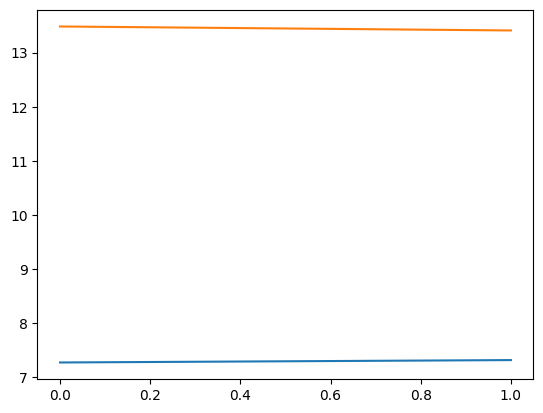

In [ ]:
plot_predictions1(model3, X_test, y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Define the model
model4 = Sequential()

# First LSTM layer with Dropout regularization
model4.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(n_steps, 1)))
model4.add(Dropout(0.2))

# Second LSTM layer with Dropout regularization
model4.add(Bidirectional(LSTM(50, activation='relu')))
model4.add(Dropout(0.2))

# Dense layer with ReLU activation
model4.add(Dense(32, activation='relu'))

# Output layer with linear activation
model4.add(Dense(1, activation='linear'))

# Compile the model
model4.compile(optimizer='adam', loss='mse')

# Print the model summary
model4.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 5, 128)            33792     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 5, 128)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 100)               71600     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                3232      
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X_train, y_train, epochs=500, callbacks=[cp3])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 230.0437 - root_mean_squared_error: 15.1672

1/1 [==============================] - 17s 17s/step - loss: 230.0437 - root_mean_squared_error: 15.1672
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 227.2645 - root_mean_squared_error: 15.0753

1/1 [==============================] - 0s 46ms/step - loss: 227.2645 - root_mean_squared_error: 15.0753
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 227.9240 - root_mean_squared_error: 15.0972

1/1 [==============================] - 0s 37ms/step - loss: 227.9240 - root_mean_squared_error: 15.0972
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 227.5314 - root_mean_squared_error: 15.0841

1/1 [==============================] - 0s 41ms/step - loss: 227.5314 - root_mean_squared_error: 15.0841
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 226.2763 - root_mean_squared_error: 15.0425

1/1 [==============================] - 0s 39ms/step - loss: 226.2763 - root_mean_squared_error: 15.0425
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 224.8024 - root_mean_squared_error: 14.9934

1/1 [==============================] - 0s 37ms/step - loss: 224.8024 - root_mean_squared_error: 14.9934
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 221.6381 - root_mean_squared_error: 14.8875

1/1 [==============================] - 0s 51ms/step - loss: 221.6381 - root_mean_squared_error: 14.8875
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 225.3784 - root_mean_squared_error: 15.0126

1/1 [==============================] - 0s 57ms/step - loss: 225.3784 - root_mean_squared_error: 15.0126
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 220.6130 - root_mean_squared_error: 14.8530

1/1 [==============================] - 0s 40ms/step - loss: 220.6130 - root_mean_squared_error: 14.8530
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 220.2346 - root_mean_squared_error: 14.8403

1/1 [==============================] - 0s 35ms/step - loss: 220.2346 - root_mean_squared_error: 14.8403
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 219.9699 - root_mean_squared_error: 14.8314

1/1 [==============================] - 0s 42ms/step - loss: 219.9699 - root_mean_squared_error: 14.8314
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 218.2657 - root_mean_squared_error: 14.7738

1/1 [==============================] - 0s 34ms/step - loss: 218.2657 - root_mean_squared_error: 14.7738
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 215.7525 - root_mean_squared_error: 14.6885

1/1 [==============================] - 0s 35ms/step - loss: 215.7525 - root_mean_squared_error: 14.6885
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 215.2837 - root_mean_squared_error: 14.6726

1/1 [==============================] - 0s 35ms/step - loss: 215.2837 - root_mean_squared_error: 14.6726
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 215.7166 - root_mean_squared_error: 14.6873

1/1 [==============================] - 0s 39ms/step - loss: 215.7166 - root_mean_squared_error: 14.6873
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 213.0818 - root_mean_squared_error: 14.5973

1/1 [==============================] - 0s 37ms/step - loss: 213.0818 - root_mean_squared_error: 14.5973
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 213.9399 - root_mean_squared_error: 14.6267

1/1 [==============================] - 0s 32ms/step - loss: 213.9399 - root_mean_squared_error: 14.6267
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 213.1330 - root_mean_squared_error: 14.5991

1/1 [==============================] - 0s 43ms/step - loss: 213.1330 - root_mean_squared_error: 14.5991
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 212.5470 - root_mean_squared_error: 14.5790

1/1 [==============================] - 0s 45ms/step - loss: 212.5470 - root_mean_squared_error: 14.5790
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 212.2167 - root_mean_squared_error: 14.5677

1/1 [==============================] - 0s 35ms/step - loss: 212.2167 - root_mean_squared_error: 14.5677
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 211.4268 - root_mean_squared_error: 14.5405

1/1 [==============================] - 0s 49ms/step - loss: 211.4268 - root_mean_squared_error: 14.5405
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 210.6782 - root_mean_squared_error: 14.5148

1/1 [==============================] - 0s 37ms/step - loss: 210.6782 - root_mean_squared_error: 14.5148
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 205.9163 - root_mean_squared_error: 14.3498

1/1 [==============================] - 0s 35ms/step - loss: 205.9163 - root_mean_squared_error: 14.3498
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 207.9037 - root_mean_squared_error: 14.4189

1/1 [==============================] - 0s 49ms/step - loss: 207.9037 - root_mean_squared_error: 14.4189
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 203.7486 - root_mean_squared_error: 14.2741

1/1 [==============================] - 0s 47ms/step - loss: 203.7486 - root_mean_squared_error: 14.2741
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 203.5160 - root_mean_squared_error: 14.2659

1/1 [==============================] - 0s 46ms/step - loss: 203.5160 - root_mean_squared_error: 14.2659
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 205.1694 - root_mean_squared_error: 14.3237

1/1 [==============================] - 0s 55ms/step - loss: 205.1694 - root_mean_squared_error: 14.3237
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 201.1787 - root_mean_squared_error: 14.1837

1/1 [==============================] - 0s 40ms/step - loss: 201.1787 - root_mean_squared_error: 14.1837
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 203.9163 - root_mean_squared_error: 14.2799

1/1 [==============================] - 0s 35ms/step - loss: 203.9163 - root_mean_squared_error: 14.2799
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 203.1300 - root_mean_squared_error: 14.2524

1/1 [==============================] - 0s 42ms/step - loss: 203.1300 - root_mean_squared_error: 14.2524
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 201.2487 - root_mean_squared_error: 14.1862

1/1 [==============================] - 0s 50ms/step - loss: 201.2487 - root_mean_squared_error: 14.1862
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 200.3475 - root_mean_squared_error: 14.1544

1/1 [==============================] - 0s 54ms/step - loss: 200.3475 - root_mean_squared_error: 14.1544
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 202.4808 - root_mean_squared_error: 14.2296

1/1 [==============================] - 0s 42ms/step - loss: 202.4808 - root_mean_squared_error: 14.2296
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 197.6645 - root_mean_squared_error: 14.0593

1/1 [==============================] - 0s 49ms/step - loss: 197.6645 - root_mean_squared_error: 14.0593
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 198.5202 - root_mean_squared_error: 14.0897

1/1 [==============================] - 0s 35ms/step - loss: 198.5202 - root_mean_squared_error: 14.0897
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 194.2549 - root_mean_squared_error: 13.9375

1/1 [==============================] - 0s 59ms/step - loss: 194.2549 - root_mean_squared_error: 13.9375
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 195.0740 - root_mean_squared_error: 13.9669

1/1 [==============================] - 0s 38ms/step - loss: 195.0740 - root_mean_squared_error: 13.9669
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 194.7003 - root_mean_squared_error: 13.9535

1/1 [==============================] - 0s 57ms/step - loss: 194.7003 - root_mean_squared_error: 13.9535
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 189.3412 - root_mean_squared_error: 13.7601

1/1 [==============================] - 0s 49ms/step - loss: 189.3412 - root_mean_squared_error: 13.7601
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 190.6064 - root_mean_squared_error: 13.8060

1/1 [==============================] - 0s 52ms/step - loss: 190.6064 - root_mean_squared_error: 13.8060
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 190.0227 - root_mean_squared_error: 13.7849

1/1 [==============================] - 0s 63ms/step - loss: 190.0227 - root_mean_squared_error: 13.7849
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 190.3305 - root_mean_squared_error: 13.7960

1/1 [==============================] - 0s 55ms/step - loss: 190.3305 - root_mean_squared_error: 13.7960
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 190.7168 - root_mean_squared_error: 13.8100

1/1 [==============================] - 0s 51ms/step - loss: 190.7168 - root_mean_squared_error: 13.8100
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 188.7809 - root_mean_squared_error: 13.7398

1/1 [==============================] - 0s 49ms/step - loss: 188.7809 - root_mean_squared_error: 13.7398
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 186.4165 - root_mean_squared_error: 13.6534

1/1 [==============================] - 0s 60ms/step - loss: 186.4165 - root_mean_squared_error: 13.6534
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 185.4535 - root_mean_squared_error: 13.6181

1/1 [==============================] - 0s 67ms/step - loss: 185.4535 - root_mean_squared_error: 13.6181
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 186.6534 - root_mean_squared_error: 13.6621

1/1 [==============================] - 0s 47ms/step - loss: 186.6534 - root_mean_squared_error: 13.6621
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 184.2358 - root_mean_squared_error: 13.5733

1/1 [==============================] - 0s 40ms/step - loss: 184.2358 - root_mean_squared_error: 13.5733
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 183.3306 - root_mean_squared_error: 13.5400

1/1 [==============================] - 0s 38ms/step - loss: 183.3306 - root_mean_squared_error: 13.5400
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 182.6595 - root_mean_squared_error: 13.5152

1/1 [==============================] - 0s 65ms/step - loss: 182.6595 - root_mean_squared_error: 13.5152
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 177.5199 - root_mean_squared_error: 13.3237

1/1 [==============================] - 0s 84ms/step - loss: 177.5199 - root_mean_squared_error: 13.3237
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 177.6270 - root_mean_squared_error: 13.3277

1/1 [==============================] - 0s 50ms/step - loss: 177.6270 - root_mean_squared_error: 13.3277
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 177.7773 - root_mean_squared_error: 13.3333

1/1 [==============================] - 0s 56ms/step - loss: 177.7773 - root_mean_squared_error: 13.3333
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 174.4560 - root_mean_squared_error: 13.2082

1/1 [==============================] - 0s 44ms/step - loss: 174.4560 - root_mean_squared_error: 13.2082
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 172.3954 - root_mean_squared_error: 13.1299

1/1 [==============================] - 0s 52ms/step - loss: 172.3954 - root_mean_squared_error: 13.1299
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 167.6598 - root_mean_squared_error: 12.9484

1/1 [==============================] - 0s 57ms/step - loss: 167.6598 - root_mean_squared_error: 12.9484
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 171.6925 - root_mean_squared_error: 13.1031

1/1 [==============================] - 0s 64ms/step - loss: 171.6925 - root_mean_squared_error: 13.1031
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 168.0389 - root_mean_squared_error: 12.9630

1/1 [==============================] - 0s 40ms/step - loss: 168.0389 - root_mean_squared_error: 12.9630
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 164.9581 - root_mean_squared_error: 12.8436

1/1 [==============================] - 0s 49ms/step - loss: 164.9581 - root_mean_squared_error: 12.8436
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 166.7421 - root_mean_squared_error: 12.9129

1/1 [==============================] - 0s 39ms/step - loss: 166.7421 - root_mean_squared_error: 12.9129
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 165.2803 - root_mean_squared_error: 12.8561

1/1 [==============================] - 0s 50ms/step - loss: 165.2803 - root_mean_squared_error: 12.8561
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 163.6098 - root_mean_squared_error: 12.7910

1/1 [==============================] - 0s 54ms/step - loss: 163.6098 - root_mean_squared_error: 12.7910
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 159.5427 - root_mean_squared_error: 12.6310

1/1 [==============================] - 0s 43ms/step - loss: 159.5427 - root_mean_squared_error: 12.6310
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 159.2687 - root_mean_squared_error: 12.6202

1/1 [==============================] - 0s 52ms/step - loss: 159.2687 - root_mean_squared_error: 12.6202
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 153.7453 - root_mean_squared_error: 12.3994

1/1 [==============================] - 0s 49ms/step - loss: 153.7453 - root_mean_squared_error: 12.3994
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 156.5680 - root_mean_squared_error: 12.5127

1/1 [==============================] - 0s 44ms/step - loss: 156.5680 - root_mean_squared_error: 12.5127
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 153.7879 - root_mean_squared_error: 12.4011

1/1 [==============================] - 0s 46ms/step - loss: 153.7879 - root_mean_squared_error: 12.4011
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 153.3007 - root_mean_squared_error: 12.3815

1/1 [==============================] - 0s 45ms/step - loss: 153.3007 - root_mean_squared_error: 12.3815
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 144.3586 - root_mean_squared_error: 12.0149

1/1 [==============================] - 0s 47ms/step - loss: 144.3586 - root_mean_squared_error: 12.0149
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 145.8118 - root_mean_squared_error: 12.0753

1/1 [==============================] - 0s 48ms/step - loss: 145.8118 - root_mean_squared_error: 12.0753
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 142.1100 - root_mean_squared_error: 11.9210

1/1 [==============================] - 0s 46ms/step - loss: 142.1100 - root_mean_squared_error: 11.9210
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 138.5016 - root_mean_squared_error: 11.7687

1/1 [==============================] - 0s 38ms/step - loss: 138.5016 - root_mean_squared_error: 11.7687
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 130.5795 - root_mean_squared_error: 11.4271

1/1 [==============================] - 0s 56ms/step - loss: 130.5795 - root_mean_squared_error: 11.4271
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 132.3813 - root_mean_squared_error: 11.5057

1/1 [==============================] - 0s 47ms/step - loss: 132.3813 - root_mean_squared_error: 11.5057
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 129.3646 - root_mean_squared_error: 11.3739

1/1 [==============================] - 0s 41ms/step - loss: 129.3646 - root_mean_squared_error: 11.3739
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 131.0457 - root_mean_squared_error: 11.4475

1/1 [==============================] - 0s 41ms/step - loss: 131.0457 - root_mean_squared_error: 11.4475
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 123.0205 - root_mean_squared_error: 11.0915

1/1 [==============================] - 0s 39ms/step - loss: 123.0205 - root_mean_squared_error: 11.0915
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 121.7542 - root_mean_squared_error: 11.0342

1/1 [==============================] - 0s 41ms/step - loss: 121.7542 - root_mean_squared_error: 11.0342
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 116.0900 - root_mean_squared_error: 10.7745

1/1 [==============================] - 0s 38ms/step - loss: 116.0900 - root_mean_squared_error: 10.7745
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 107.0259 - root_mean_squared_error: 10.3453

1/1 [==============================] - 0s 38ms/step - loss: 107.0259 - root_mean_squared_error: 10.3453
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 112.9060 - root_mean_squared_error: 10.6257

1/1 [==============================] - 0s 39ms/step - loss: 112.9060 - root_mean_squared_error: 10.6257
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 103.1628 - root_mean_squared_error: 10.1569

1/1 [==============================] - 0s 41ms/step - loss: 103.1628 - root_mean_squared_error: 10.1569
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 101.1933 - root_mean_squared_error: 10.0595

1/1 [==============================] - 0s 38ms/step - loss: 101.1933 - root_mean_squared_error: 10.0595
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 99.7700 - root_mean_squared_error: 9.9885

1/1 [==============================] - 0s 36ms/step - loss: 99.7700 - root_mean_squared_error: 9.9885
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 87.4491 - root_mean_squared_error: 9.3514

1/1 [==============================] - 0s 44ms/step - loss: 87.4491 - root_mean_squared_error: 9.3514
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 88.4439 - root_mean_squared_error: 9.4045

1/1 [==============================] - 0s 47ms/step - loss: 88.4439 - root_mean_squared_error: 9.4045
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 85.9977 - root_mean_squared_error: 9.2735

1/1 [==============================] - 0s 42ms/step - loss: 85.9977 - root_mean_squared_error: 9.2735
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 79.6671 - root_mean_squared_error: 8.9256

1/1 [==============================] - 0s 40ms/step - loss: 79.6671 - root_mean_squared_error: 8.9256
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 79.7121 - root_mean_squared_error: 8.9282

1/1 [==============================] - 0s 55ms/step - loss: 79.7121 - root_mean_squared_error: 8.9282
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 78.9511 - root_mean_squared_error: 8.8854

1/1 [==============================] - 0s 56ms/step - loss: 78.9511 - root_mean_squared_error: 8.8854
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 59.6781 - root_mean_squared_error: 7.7252

1/1 [==============================] - 0s 55ms/step - loss: 59.6781 - root_mean_squared_error: 7.7252
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 62.4843 - root_mean_squared_error: 7.9047

1/1 [==============================] - 0s 74ms/step - loss: 62.4843 - root_mean_squared_error: 7.9047
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 53.8592 - root_mean_squared_error: 7.3389

1/1 [==============================] - 0s 57ms/step - loss: 53.8592 - root_mean_squared_error: 7.3389
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 53.8395 - root_mean_squared_error: 7.3375

1/1 [==============================] - 0s 60ms/step - loss: 53.8395 - root_mean_squared_error: 7.3375
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 41.5612 - root_mean_squared_error: 6.4468

1/1 [==============================] - 0s 49ms/step - loss: 41.5612 - root_mean_squared_error: 6.4468
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 35.7092 - root_mean_squared_error: 5.9757

1/1 [==============================] - 0s 52ms/step - loss: 35.7092 - root_mean_squared_error: 5.9757
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 33.1222 - root_mean_squared_error: 5.7552

1/1 [==============================] - 0s 51ms/step - loss: 33.1222 - root_mean_squared_error: 5.7552
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 35.4325 - root_mean_squared_error: 5.9525

1/1 [==============================] - 0s 75ms/step - loss: 35.4325 - root_mean_squared_error: 5.9525
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 29.1581 - root_mean_squared_error: 5.3998

1/1 [==============================] - 0s 75ms/step - loss: 29.1581 - root_mean_squared_error: 5.3998
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 23.3801 - root_mean_squared_error: 4.8353

1/1 [==============================] - 0s 59ms/step - loss: 23.3801 - root_mean_squared_error: 4.8353
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 15.7237 - root_mean_squared_error: 3.9653

1/1 [==============================] - 0s 61ms/step - loss: 15.7237 - root_mean_squared_error: 3.9653
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 15.6105 - root_mean_squared_error: 3.9510

1/1 [==============================] - 0s 52ms/step - loss: 15.6105 - root_mean_squared_error: 3.9510
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 7.6647 - root_mean_squared_error: 2.7685

1/1 [==============================] - 0s 59ms/step - loss: 7.6647 - root_mean_squared_error: 2.7685
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 10.2222 - root_mean_squared_error: 3.1972

1/1 [==============================] - 0s 64ms/step - loss: 10.2222 - root_mean_squared_error: 3.1972
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 7.4644 - root_mean_squared_error: 2.7321

1/1 [==============================] - 0s 34ms/step - loss: 7.4644 - root_mean_squared_error: 2.7321
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 3.0893 - root_mean_squared_error: 1.7576

1/1 [==============================] - 0s 48ms/step - loss: 3.0893 - root_mean_squared_error: 1.7576
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 5.9491 - root_mean_squared_error: 2.4391

1/1 [==============================] - 0s 55ms/step - loss: 5.9491 - root_mean_squared_error: 2.4391
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 3.0576 - root_mean_squared_error: 1.7486

1/1 [==============================] - 0s 48ms/step - loss: 3.0576 - root_mean_squared_error: 1.7486
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 8.0357 - root_mean_squared_error: 2.8347

1/1 [==============================] - 0s 42ms/step - loss: 8.0357 - root_mean_squared_error: 2.8347
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 11.3390 - root_mean_squared_error: 3.3673

1/1 [==============================] - 0s 53ms/step - loss: 11.3390 - root_mean_squared_error: 3.3673
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 5.3641 - root_mean_squared_error: 2.3161

1/1 [==============================] - 0s 59ms/step - loss: 5.3641 - root_mean_squared_error: 2.3161
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 12.3200 - root_mean_squared_error: 3.5100

1/1 [==============================] - 0s 82ms/step - loss: 12.3200 - root_mean_squared_error: 3.5100
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 9.3765 - root_mean_squared_error: 3.0621

1/1 [==============================] - 0s 84ms/step - loss: 9.3765 - root_mean_squared_error: 3.0621
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 12.6419 - root_mean_squared_error: 3.5556

1/1 [==============================] - 0s 68ms/step - loss: 12.6419 - root_mean_squared_error: 3.5556
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 11.8201 - root_mean_squared_error: 3.4380

1/1 [==============================] - 0s 64ms/step - loss: 11.8201 - root_mean_squared_error: 3.4380
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 16.8857 - root_mean_squared_error: 4.1092

1/1 [==============================] - 0s 66ms/step - loss: 16.8857 - root_mean_squared_error: 4.1092
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 3.3937 - root_mean_squared_error: 1.8422

1/1 [==============================] - 0s 65ms/step - loss: 3.3937 - root_mean_squared_error: 1.8422
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 8.6080 - root_mean_squared_error: 2.9339

1/1 [==============================] - 0s 59ms/step - loss: 8.6080 - root_mean_squared_error: 2.9339
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 5.1394 - root_mean_squared_error: 2.2670

1/1 [==============================] - 0s 59ms/step - loss: 5.1394 - root_mean_squared_error: 2.2670
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 7.5066 - root_mean_squared_error: 2.7398

1/1 [==============================] - 0s 42ms/step - loss: 7.5066 - root_mean_squared_error: 2.7398
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 6.7456 - root_mean_squared_error: 2.5972

1/1 [==============================] - 0s 55ms/step - loss: 6.7456 - root_mean_squared_error: 2.5972
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 12.3962 - root_mean_squared_error: 3.5208

1/1 [==============================] - 0s 51ms/step - loss: 12.3962 - root_mean_squared_error: 3.5208
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 6.9136 - root_mean_squared_error: 2.6294

1/1 [==============================] - 0s 59ms/step - loss: 6.9136 - root_mean_squared_error: 2.6294
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 4.0046 - root_mean_squared_error: 2.0012

1/1 [==============================] - 0s 67ms/step - loss: 4.0046 - root_mean_squared_error: 2.0012
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 6.6274 - root_mean_squared_error: 2.5744

1/1 [==============================] - 0s 43ms/step - loss: 6.6274 - root_mean_squared_error: 2.5744
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 7.6498 - root_mean_squared_error: 2.7658

1/1 [==============================] - 0s 47ms/step - loss: 7.6498 - root_mean_squared_error: 2.7658
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 10.2867 - root_mean_squared_error: 3.2073

1/1 [==============================] - 0s 75ms/step - loss: 10.2867 - root_mean_squared_error: 3.2073
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 8.9582 - root_mean_squared_error: 2.9930

1/1 [==============================] - 0s 49ms/step - loss: 8.9582 - root_mean_squared_error: 2.9930
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 6.8697 - root_mean_squared_error: 2.6210

1/1 [==============================] - 0s 50ms/step - loss: 6.8697 - root_mean_squared_error: 2.6210
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 10.4879 - root_mean_squared_error: 3.2385

1/1 [==============================] - 0s 58ms/step - loss: 10.4879 - root_mean_squared_error: 3.2385
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 3.8418 - root_mean_squared_error: 1.9600

1/1 [==============================] - 0s 48ms/step - loss: 3.8418 - root_mean_squared_error: 1.9600
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 5.6314 - root_mean_squared_error: 2.3730

1/1 [==============================] - 0s 58ms/step - loss: 5.6314 - root_mean_squared_error: 2.3730
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 5.6401 - root_mean_squared_error: 2.3749

1/1 [==============================] - 0s 65ms/step - loss: 5.6401 - root_mean_squared_error: 2.3749
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 7.7893 - root_mean_squared_error: 2.7909

1/1 [==============================] - 0s 69ms/step - loss: 7.7893 - root_mean_squared_error: 2.7909
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 7.5397 - root_mean_squared_error: 2.7459

1/1 [==============================] - 0s 74ms/step - loss: 7.5397 - root_mean_squared_error: 2.7459
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 5.9468 - root_mean_squared_error: 2.4386

1/1 [==============================] - 0s 65ms/step - loss: 5.9468 - root_mean_squared_error: 2.4386
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 8.3034 - root_mean_squared_error: 2.8816

1/1 [==============================] - 0s 54ms/step - loss: 8.3034 - root_mean_squared_error: 2.8816
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 4.9670 - root_mean_squared_error: 2.2287

1/1 [==============================] - 0s 91ms/step - loss: 4.9670 - root_mean_squared_error: 2.2287
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 12.0622 - root_mean_squared_error: 3.4731

1/1 [==============================] - 0s 89ms/step - loss: 12.0622 - root_mean_squared_error: 3.4731
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 6.2753 - root_mean_squared_error: 2.5051

1/1 [==============================] - 0s 55ms/step - loss: 6.2753 - root_mean_squared_error: 2.5051
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 5.7416 - root_mean_squared_error: 2.3962

1/1 [==============================] - 0s 63ms/step - loss: 5.7416 - root_mean_squared_error: 2.3962
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 4.1525 - root_mean_squared_error: 2.0378

1/1 [==============================] - 0s 65ms/step - loss: 4.1525 - root_mean_squared_error: 2.0378
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 5.9062 - root_mean_squared_error: 2.4303

1/1 [==============================] - 0s 59ms/step - loss: 5.9062 - root_mean_squared_error: 2.4303
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 7.5261 - root_mean_squared_error: 2.7434

1/1 [==============================] - 0s 49ms/step - loss: 7.5261 - root_mean_squared_error: 2.7434
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 9.4170 - root_mean_squared_error: 3.0687

1/1 [==============================] - 0s 37ms/step - loss: 9.4170 - root_mean_squared_error: 3.0687
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 7.1793 - root_mean_squared_error: 2.6794

1/1 [==============================] - 0s 46ms/step - loss: 7.1793 - root_mean_squared_error: 2.6794
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 6.0251 - root_mean_squared_error: 2.4546

1/1 [==============================] - 0s 34ms/step - loss: 6.0251 - root_mean_squared_error: 2.4546
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 4.6710 - root_mean_squared_error: 2.1612

1/1 [==============================] - 0s 50ms/step - loss: 4.6710 - root_mean_squared_error: 2.1612
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 6.4335 - root_mean_squared_error: 2.5364

1/1 [==============================] - 0s 35ms/step - loss: 6.4335 - root_mean_squared_error: 2.5364
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 4.8706 - root_mean_squared_error: 2.2070

1/1 [==============================] - 0s 36ms/step - loss: 4.8706 - root_mean_squared_error: 2.2070
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 7.2296 - root_mean_squared_error: 2.6888

1/1 [==============================] - 0s 45ms/step - loss: 7.2296 - root_mean_squared_error: 2.6888
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 7.7720 - root_mean_squared_error: 2.7878

1/1 [==============================] - 0s 35ms/step - loss: 7.7720 - root_mean_squared_error: 2.7878
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 6.0476 - root_mean_squared_error: 2.4592

1/1 [==============================] - 0s 40ms/step - loss: 6.0476 - root_mean_squared_error: 2.4592
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 5.2519 - root_mean_squared_error: 2.2917

1/1 [==============================] - 0s 37ms/step - loss: 5.2519 - root_mean_squared_error: 2.2917
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 4.6856 - root_mean_squared_error: 2.1646

1/1 [==============================] - 0s 45ms/step - loss: 4.6856 - root_mean_squared_error: 2.1646
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 3.2773 - root_mean_squared_error: 1.8103

1/1 [==============================] - 0s 38ms/step - loss: 3.2773 - root_mean_squared_error: 1.8103
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 5.4235 - root_mean_squared_error: 2.3288

1/1 [==============================] - 0s 51ms/step - loss: 5.4235 - root_mean_squared_error: 2.3288
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 5.7884 - root_mean_squared_error: 2.4059

1/1 [==============================] - 0s 49ms/step - loss: 5.7884 - root_mean_squared_error: 2.4059
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 8.9743 - root_mean_squared_error: 2.9957

1/1 [==============================] - 0s 48ms/step - loss: 8.9743 - root_mean_squared_error: 2.9957
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 4.3386 - root_mean_squared_error: 2.0829

1/1 [==============================] - 0s 35ms/step - loss: 4.3386 - root_mean_squared_error: 2.0829
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 5.0935 - root_mean_squared_error: 2.2569

1/1 [==============================] - 0s 38ms/step - loss: 5.0935 - root_mean_squared_error: 2.2569
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 5.3147 - root_mean_squared_error: 2.3054

1/1 [==============================] - 0s 38ms/step - loss: 5.3147 - root_mean_squared_error: 2.3054
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 6.4750 - root_mean_squared_error: 2.5446

1/1 [==============================] - 0s 33ms/step - loss: 6.4750 - root_mean_squared_error: 2.5446
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 7.5674 - root_mean_squared_error: 2.7509

1/1 [==============================] - 0s 40ms/step - loss: 7.5674 - root_mean_squared_error: 2.7509
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 6.0449 - root_mean_squared_error: 2.4586

1/1 [==============================] - 0s 37ms/step - loss: 6.0449 - root_mean_squared_error: 2.4586
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 2.8282 - root_mean_squared_error: 1.6817

1/1 [==============================] - 0s 41ms/step - loss: 2.8282 - root_mean_squared_error: 1.6817
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 8.4409 - root_mean_squared_error: 2.9053

1/1 [==============================] - 0s 42ms/step - loss: 8.4409 - root_mean_squared_error: 2.9053
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 4.6500 - root_mean_squared_error: 2.1564

1/1 [==============================] - 0s 54ms/step - loss: 4.6500 - root_mean_squared_error: 2.1564
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 5.2798 - root_mean_squared_error: 2.2978

1/1 [==============================] - 0s 43ms/step - loss: 5.2798 - root_mean_squared_error: 2.2978
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 5.4913 - root_mean_squared_error: 2.3434

1/1 [==============================] - 0s 37ms/step - loss: 5.4913 - root_mean_squared_error: 2.3434
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 5.5946 - root_mean_squared_error: 2.3653

1/1 [==============================] - 0s 41ms/step - loss: 5.5946 - root_mean_squared_error: 2.3653
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 3.5535 - root_mean_squared_error: 1.8851

1/1 [==============================] - 0s 40ms/step - loss: 3.5535 - root_mean_squared_error: 1.8851
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 5.1171 - root_mean_squared_error: 2.2621

1/1 [==============================] - 0s 36ms/step - loss: 5.1171 - root_mean_squared_error: 2.2621
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 6.1317 - root_mean_squared_error: 2.4762

1/1 [==============================] - 0s 40ms/step - loss: 6.1317 - root_mean_squared_error: 2.4762
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 4.9560 - root_mean_squared_error: 2.2262

1/1 [==============================] - 0s 46ms/step - loss: 4.9560 - root_mean_squared_error: 2.2262
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 4.4157 - root_mean_squared_error: 2.1014

1/1 [==============================] - 0s 48ms/step - loss: 4.4157 - root_mean_squared_error: 2.1014
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 4.8327 - root_mean_squared_error: 2.1983

1/1 [==============================] - 0s 42ms/step - loss: 4.8327 - root_mean_squared_error: 2.1983
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 3.9438 - root_mean_squared_error: 1.9859

1/1 [==============================] - 0s 51ms/step - loss: 3.9438 - root_mean_squared_error: 1.9859
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 3.6961 - root_mean_squared_error: 1.9225

1/1 [==============================] - 0s 55ms/step - loss: 3.6961 - root_mean_squared_error: 1.9225
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 5.7600 - root_mean_squared_error: 2.4000

1/1 [==============================] - 0s 49ms/step - loss: 5.7600 - root_mean_squared_error: 2.4000
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 7.6935 - root_mean_squared_error: 2.7737

1/1 [==============================] - 0s 41ms/step - loss: 7.6935 - root_mean_squared_error: 2.7737
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 6.1940 - root_mean_squared_error: 2.4888

1/1 [==============================] - 0s 52ms/step - loss: 6.1940 - root_mean_squared_error: 2.4888
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 4.4960 - root_mean_squared_error: 2.1204

1/1 [==============================] - 0s 41ms/step - loss: 4.4960 - root_mean_squared_error: 2.1204
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 4.9690 - root_mean_squared_error: 2.2291

1/1 [==============================] - 0s 41ms/step - loss: 4.9690 - root_mean_squared_error: 2.2291
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 7.9271 - root_mean_squared_error: 2.8155

1/1 [==============================] - 0s 46ms/step - loss: 7.9271 - root_mean_squared_error: 2.8155
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 4.5740 - root_mean_squared_error: 2.1387

1/1 [==============================] - 0s 50ms/step - loss: 4.5740 - root_mean_squared_error: 2.1387
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 3.3709 - root_mean_squared_error: 1.8360

1/1 [==============================] - 0s 37ms/step - loss: 3.3709 - root_mean_squared_error: 1.8360
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 4.7100 - root_mean_squared_error: 2.1703

1/1 [==============================] - 0s 47ms/step - loss: 4.7100 - root_mean_squared_error: 2.1703
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 7.2555 - root_mean_squared_error: 2.6936

1/1 [==============================] - 0s 34ms/step - loss: 7.2555 - root_mean_squared_error: 2.6936
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 3.2643 - root_mean_squared_error: 1.8067

1/1 [==============================] - 0s 43ms/step - loss: 3.2643 - root_mean_squared_error: 1.8067
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 6.3969 - root_mean_squared_error: 2.5292

1/1 [==============================] - 0s 50ms/step - loss: 6.3969 - root_mean_squared_error: 2.5292
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 4.6744 - root_mean_squared_error: 2.1620

1/1 [==============================] - 0s 43ms/step - loss: 4.6744 - root_mean_squared_error: 2.1620
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 4.0470 - root_mean_squared_error: 2.0117

1/1 [==============================] - 0s 69ms/step - loss: 4.0470 - root_mean_squared_error: 2.0117
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 6.5427 - root_mean_squared_error: 2.5579

1/1 [==============================] - 0s 64ms/step - loss: 6.5427 - root_mean_squared_error: 2.5579
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 4.3116 - root_mean_squared_error: 2.0764

1/1 [==============================] - 0s 38ms/step - loss: 4.3116 - root_mean_squared_error: 2.0764
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 7.9269 - root_mean_squared_error: 2.8155

1/1 [==============================] - 0s 45ms/step - loss: 7.9269 - root_mean_squared_error: 2.8155
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 2.6726 - root_mean_squared_error: 1.6348

1/1 [==============================] - 0s 47ms/step - loss: 2.6726 - root_mean_squared_error: 1.6348
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 4.9428 - root_mean_squared_error: 2.2232

1/1 [==============================] - 0s 40ms/step - loss: 4.9428 - root_mean_squared_error: 2.2232
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 4.2730 - root_mean_squared_error: 2.0671

1/1 [==============================] - 0s 47ms/step - loss: 4.2730 - root_mean_squared_error: 2.0671
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 3.4234 - root_mean_squared_error: 1.8502

1/1 [==============================] - 0s 59ms/step - loss: 3.4234 - root_mean_squared_error: 1.8502
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 4.4869 - root_mean_squared_error: 2.1182

1/1 [==============================] - 0s 59ms/step - loss: 4.4869 - root_mean_squared_error: 2.1182
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 7.6236 - root_mean_squared_error: 2.7611

1/1 [==============================] - 0s 45ms/step - loss: 7.6236 - root_mean_squared_error: 2.7611
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 1.7881 - root_mean_squared_error: 1.3372

1/1 [==============================] - 0s 54ms/step - loss: 1.7881 - root_mean_squared_error: 1.3372
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 6.8297 - root_mean_squared_error: 2.6134

1/1 [==============================] - 0s 56ms/step - loss: 6.8297 - root_mean_squared_error: 2.6134
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 7.3669 - root_mean_squared_error: 2.7142

1/1 [==============================] - 0s 54ms/step - loss: 7.3669 - root_mean_squared_error: 2.7142
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 7.0029 - root_mean_squared_error: 2.6463

1/1 [==============================] - 0s 54ms/step - loss: 7.0029 - root_mean_squared_error: 2.6463
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 6.2655 - root_mean_squared_error: 2.5031

1/1 [==============================] - 0s 52ms/step - loss: 6.2655 - root_mean_squared_error: 2.5031
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 4.0114 - root_mean_squared_error: 2.0029

1/1 [==============================] - 0s 59ms/step - loss: 4.0114 - root_mean_squared_error: 2.0029
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 5.8295 - root_mean_squared_error: 2.4144

1/1 [==============================] - 0s 47ms/step - loss: 5.8295 - root_mean_squared_error: 2.4144
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 5.2704 - root_mean_squared_error: 2.2957

1/1 [==============================] - 0s 56ms/step - loss: 5.2704 - root_mean_squared_error: 2.2957
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 3.2838 - root_mean_squared_error: 1.8121

1/1 [==============================] - 0s 61ms/step - loss: 3.2838 - root_mean_squared_error: 1.8121
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 7.7273 - root_mean_squared_error: 2.7798

1/1 [==============================] - 0s 65ms/step - loss: 7.7273 - root_mean_squared_error: 2.7798
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 3.9704 - root_mean_squared_error: 1.9926

1/1 [==============================] - 0s 81ms/step - loss: 3.9704 - root_mean_squared_error: 1.9926
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 3.3724 - root_mean_squared_error: 1.8364

1/1 [==============================] - 0s 66ms/step - loss: 3.3724 - root_mean_squared_error: 1.8364
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 5.8027 - root_mean_squared_error: 2.4089

1/1 [==============================] - 0s 66ms/step - loss: 5.8027 - root_mean_squared_error: 2.4089
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 4.4639 - root_mean_squared_error: 2.1128

1/1 [==============================] - 0s 69ms/step - loss: 4.4639 - root_mean_squared_error: 2.1128
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 5.1925 - root_mean_squared_error: 2.2787

1/1 [==============================] - 0s 66ms/step - loss: 5.1925 - root_mean_squared_error: 2.2787
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 3.7910 - root_mean_squared_error: 1.9470

1/1 [==============================] - 0s 62ms/step - loss: 3.7910 - root_mean_squared_error: 1.9470
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 5.4966 - root_mean_squared_error: 2.3445

1/1 [==============================] - 0s 46ms/step - loss: 5.4966 - root_mean_squared_error: 2.3445
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 4.3455 - root_mean_squared_error: 2.0846

1/1 [==============================] - 0s 41ms/step - loss: 4.3455 - root_mean_squared_error: 2.0846
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 4.0416 - root_mean_squared_error: 2.0104

1/1 [==============================] - 0s 35ms/step - loss: 4.0416 - root_mean_squared_error: 2.0104
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 5.1900 - root_mean_squared_error: 2.2782

1/1 [==============================] - 0s 43ms/step - loss: 5.1900 - root_mean_squared_error: 2.2782
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 5.8547 - root_mean_squared_error: 2.4197

1/1 [==============================] - 0s 44ms/step - loss: 5.8547 - root_mean_squared_error: 2.4197
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 4.3771 - root_mean_squared_error: 2.0921

1/1 [==============================] - 0s 38ms/step - loss: 4.3771 - root_mean_squared_error: 2.0921
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 3.6403 - root_mean_squared_error: 1.9080

1/1 [==============================] - 0s 43ms/step - loss: 3.6403 - root_mean_squared_error: 1.9080
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 4.1096 - root_mean_squared_error: 2.0272

1/1 [==============================] - 0s 49ms/step - loss: 4.1096 - root_mean_squared_error: 2.0272
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 5.8891 - root_mean_squared_error: 2.4267

1/1 [==============================] - 0s 46ms/step - loss: 5.8891 - root_mean_squared_error: 2.4267
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 5.2679 - root_mean_squared_error: 2.2952

1/1 [==============================] - 0s 51ms/step - loss: 5.2679 - root_mean_squared_error: 2.2952
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 4.0297 - root_mean_squared_error: 2.0074

1/1 [==============================] - 0s 52ms/step - loss: 4.0297 - root_mean_squared_error: 2.0074
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 3.6774 - root_mean_squared_error: 1.9177

1/1 [==============================] - 0s 56ms/step - loss: 3.6774 - root_mean_squared_error: 1.9177
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 9.7848 - root_mean_squared_error: 3.1281

1/1 [==============================] - 0s 63ms/step - loss: 9.7848 - root_mean_squared_error: 3.1281
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 6.6541 - root_mean_squared_error: 2.5796

1/1 [==============================] - 0s 76ms/step - loss: 6.6541 - root_mean_squared_error: 2.5796
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 5.7768 - root_mean_squared_error: 2.4035

1/1 [==============================] - 0s 74ms/step - loss: 5.7768 - root_mean_squared_error: 2.4035
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 6.9241 - root_mean_squared_error: 2.6314

1/1 [==============================] - 0s 74ms/step - loss: 6.9241 - root_mean_squared_error: 2.6314
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 4.4790 - root_mean_squared_error: 2.1164

1/1 [==============================] - 0s 80ms/step - loss: 4.4790 - root_mean_squared_error: 2.1164
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 5.1251 - root_mean_squared_error: 2.2639

1/1 [==============================] - 0s 68ms/step - loss: 5.1251 - root_mean_squared_error: 2.2639
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 3.9592 - root_mean_squared_error: 1.9898

1/1 [==============================] - 0s 71ms/step - loss: 3.9592 - root_mean_squared_error: 1.9898
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 3.7904 - root_mean_squared_error: 1.9469

1/1 [==============================] - 0s 52ms/step - loss: 3.7904 - root_mean_squared_error: 1.9469
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 9.1540 - root_mean_squared_error: 3.0256

1/1 [==============================] - 0s 69ms/step - loss: 9.1540 - root_mean_squared_error: 3.0256
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 10.6114 - root_mean_squared_error: 3.2575

1/1 [==============================] - 0s 56ms/step - loss: 10.6114 - root_mean_squared_error: 3.2575
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 2.8681 - root_mean_squared_error: 1.6935

1/1 [==============================] - 0s 53ms/step - loss: 2.8681 - root_mean_squared_error: 1.6935
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 2.5790 - root_mean_squared_error: 1.6059

1/1 [==============================] - 0s 52ms/step - loss: 2.5790 - root_mean_squared_error: 1.6059
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 4.8382 - root_mean_squared_error: 2.1996

1/1 [==============================] - 0s 55ms/step - loss: 4.8382 - root_mean_squared_error: 2.1996
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 4.9571 - root_mean_squared_error: 2.2265

1/1 [==============================] - 0s 51ms/step - loss: 4.9571 - root_mean_squared_error: 2.2265
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 6.1179 - root_mean_squared_error: 2.4734

1/1 [==============================] - 0s 48ms/step - loss: 6.1179 - root_mean_squared_error: 2.4734
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 4.4395 - root_mean_squared_error: 2.1070

1/1 [==============================] - 0s 54ms/step - loss: 4.4395 - root_mean_squared_error: 2.1070
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 4.8097 - root_mean_squared_error: 2.1931

1/1 [==============================] - 0s 53ms/step - loss: 4.8097 - root_mean_squared_error: 2.1931
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 4.6751 - root_mean_squared_error: 2.1622

1/1 [==============================] - 0s 50ms/step - loss: 4.6751 - root_mean_squared_error: 2.1622
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 8.7288 - root_mean_squared_error: 2.9545

1/1 [==============================] - 0s 53ms/step - loss: 8.7288 - root_mean_squared_error: 2.9545
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 7.5772 - root_mean_squared_error: 2.7527

1/1 [==============================] - 0s 50ms/step - loss: 7.5772 - root_mean_squared_error: 2.7527
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 2.8630 - root_mean_squared_error: 1.6920

1/1 [==============================] - 0s 71ms/step - loss: 2.8630 - root_mean_squared_error: 1.6920
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 2.8215 - root_mean_squared_error: 1.6797

1/1 [==============================] - 0s 70ms/step - loss: 2.8215 - root_mean_squared_error: 1.6797
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 4.0122 - root_mean_squared_error: 2.0030

1/1 [==============================] - 0s 42ms/step - loss: 4.0122 - root_mean_squared_error: 2.0030
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 4.2502 - root_mean_squared_error: 2.0616

1/1 [==============================] - 0s 45ms/step - loss: 4.2502 - root_mean_squared_error: 2.0616
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 1.4859 - root_mean_squared_error: 1.2190

1/1 [==============================] - 0s 43ms/step - loss: 1.4859 - root_mean_squared_error: 1.2190
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 6.5014 - root_mean_squared_error: 2.5498

1/1 [==============================] - 0s 40ms/step - loss: 6.5014 - root_mean_squared_error: 2.5498
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 8.1482 - root_mean_squared_error: 2.8545

1/1 [==============================] - 0s 52ms/step - loss: 8.1482 - root_mean_squared_error: 2.8545
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 4.0599 - root_mean_squared_error: 2.0149

1/1 [==============================] - 0s 41ms/step - loss: 4.0599 - root_mean_squared_error: 2.0149
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 3.4312 - root_mean_squared_error: 1.8524

1/1 [==============================] - 0s 33ms/step - loss: 3.4312 - root_mean_squared_error: 1.8524
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 11.2709 - root_mean_squared_error: 3.3572

1/1 [==============================] - 0s 45ms/step - loss: 11.2709 - root_mean_squared_error: 3.3572
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 4.1320 - root_mean_squared_error: 2.0327

1/1 [==============================] - 0s 51ms/step - loss: 4.1320 - root_mean_squared_error: 2.0327
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 3.0662 - root_mean_squared_error: 1.7511

1/1 [==============================] - 0s 39ms/step - loss: 3.0662 - root_mean_squared_error: 1.7511
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 3.4208 - root_mean_squared_error: 1.8495

1/1 [==============================] - 0s 43ms/step - loss: 3.4208 - root_mean_squared_error: 1.8495
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 5.7897 - root_mean_squared_error: 2.4062

1/1 [==============================] - 0s 58ms/step - loss: 5.7897 - root_mean_squared_error: 2.4062
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 4.3987 - root_mean_squared_error: 2.0973

1/1 [==============================] - 0s 58ms/step - loss: 4.3987 - root_mean_squared_error: 2.0973
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 3.4009 - root_mean_squared_error: 1.8442

1/1 [==============================] - 0s 66ms/step - loss: 3.4009 - root_mean_squared_error: 1.8442
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 6.6807 - root_mean_squared_error: 2.5847

1/1 [==============================] - 0s 75ms/step - loss: 6.6807 - root_mean_squared_error: 2.5847
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 3.7109 - root_mean_squared_error: 1.9264

1/1 [==============================] - 0s 73ms/step - loss: 3.7109 - root_mean_squared_error: 1.9264
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 5.8524 - root_mean_squared_error: 2.4192

1/1 [==============================] - 0s 58ms/step - loss: 5.8524 - root_mean_squared_error: 2.4192
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 4.7844 - root_mean_squared_error: 2.1873

1/1 [==============================] - 0s 44ms/step - loss: 4.7844 - root_mean_squared_error: 2.1873
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 3.9640 - root_mean_squared_error: 1.9910

1/1 [==============================] - 0s 43ms/step - loss: 3.9640 - root_mean_squared_error: 1.9910
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 7.2706 - root_mean_squared_error: 2.6964

1/1 [==============================] - 0s 47ms/step - loss: 7.2706 - root_mean_squared_error: 2.6964
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 8.0043 - root_mean_squared_error: 2.8292

1/1 [==============================] - 0s 50ms/step - loss: 8.0043 - root_mean_squared_error: 2.8292
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 3.9521 - root_mean_squared_error: 1.9880

1/1 [==============================] - 0s 58ms/step - loss: 3.9521 - root_mean_squared_error: 1.9880
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 4.4649 - root_mean_squared_error: 2.1130

1/1 [==============================] - 0s 43ms/step - loss: 4.4649 - root_mean_squared_error: 2.1130
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 2.2910 - root_mean_squared_error: 1.5136

1/1 [==============================] - 0s 60ms/step - loss: 2.2910 - root_mean_squared_error: 1.5136
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 5.1101 - root_mean_squared_error: 2.2606

1/1 [==============================] - 0s 47ms/step - loss: 5.1101 - root_mean_squared_error: 2.2606
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 2.5978 - root_mean_squared_error: 1.6118

1/1 [==============================] - 0s 42ms/step - loss: 2.5978 - root_mean_squared_error: 1.6118
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 4.1341 - root_mean_squared_error: 2.0332

1/1 [==============================] - 0s 49ms/step - loss: 4.1341 - root_mean_squared_error: 2.0332
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 5.3308 - root_mean_squared_error: 2.3089

1/1 [==============================] - 0s 38ms/step - loss: 5.3308 - root_mean_squared_error: 2.3089
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 5.3259 - root_mean_squared_error: 2.3078

1/1 [==============================] - 0s 43ms/step - loss: 5.3259 - root_mean_squared_error: 2.3078
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 4.9133 - root_mean_squared_error: 2.2166

1/1 [==============================] - 0s 52ms/step - loss: 4.9133 - root_mean_squared_error: 2.2166
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 6.4861 - root_mean_squared_error: 2.5468

1/1 [==============================] - 0s 51ms/step - loss: 6.4861 - root_mean_squared_error: 2.5468
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 4.5166 - root_mean_squared_error: 2.1252

1/1 [==============================] - 0s 56ms/step - loss: 4.5166 - root_mean_squared_error: 2.1252
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 7.9254 - root_mean_squared_error: 2.8152

1/1 [==============================] - 0s 46ms/step - loss: 7.9254 - root_mean_squared_error: 2.8152
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 5.5586 - root_mean_squared_error: 2.3577

1/1 [==============================] - 0s 51ms/step - loss: 5.5586 - root_mean_squared_error: 2.3577
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 3.8978 - root_mean_squared_error: 1.9743

1/1 [==============================] - 0s 50ms/step - loss: 3.8978 - root_mean_squared_error: 1.9743
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 4.8256 - root_mean_squared_error: 2.1967

1/1 [==============================] - 0s 59ms/step - loss: 4.8256 - root_mean_squared_error: 2.1967
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 4.0363 - root_mean_squared_error: 2.0091

1/1 [==============================] - 0s 62ms/step - loss: 4.0363 - root_mean_squared_error: 2.0091
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 5.4745 - root_mean_squared_error: 2.3398

1/1 [==============================] - 0s 40ms/step - loss: 5.4745 - root_mean_squared_error: 2.3398
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 5.7209 - root_mean_squared_error: 2.3918

1/1 [==============================] - 0s 71ms/step - loss: 5.7209 - root_mean_squared_error: 2.3918
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 5.2338 - root_mean_squared_error: 2.2878

1/1 [==============================] - 0s 45ms/step - loss: 5.2338 - root_mean_squared_error: 2.2878
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 2.8789 - root_mean_squared_error: 1.6967

1/1 [==============================] - 0s 57ms/step - loss: 2.8789 - root_mean_squared_error: 1.6967
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 2.9975 - root_mean_squared_error: 1.7313

1/1 [==============================] - 0s 44ms/step - loss: 2.9975 - root_mean_squared_error: 1.7313
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 3.0459 - root_mean_squared_error: 1.7452

1/1 [==============================] - 0s 49ms/step - loss: 3.0459 - root_mean_squared_error: 1.7452
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 3.9515 - root_mean_squared_error: 1.9878

1/1 [==============================] - 0s 39ms/step - loss: 3.9515 - root_mean_squared_error: 1.9878
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 9.4683 - root_mean_squared_error: 3.0771

1/1 [==============================] - 0s 39ms/step - loss: 9.4683 - root_mean_squared_error: 3.0771
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 5.7911 - root_mean_squared_error: 2.4065

1/1 [==============================] - 0s 50ms/step - loss: 5.7911 - root_mean_squared_error: 2.4065
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 5.3009 - root_mean_squared_error: 2.3024

1/1 [==============================] - 0s 47ms/step - loss: 5.3009 - root_mean_squared_error: 2.3024
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 1.8162 - root_mean_squared_error: 1.3477

1/1 [==============================] - 0s 62ms/step - loss: 1.8162 - root_mean_squared_error: 1.3477
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 3.0270 - root_mean_squared_error: 1.7398

1/1 [==============================] - 0s 58ms/step - loss: 3.0270 - root_mean_squared_error: 1.7398
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 5.9204 - root_mean_squared_error: 2.4332

1/1 [==============================] - 0s 46ms/step - loss: 5.9204 - root_mean_squared_error: 2.4332
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 4.5983 - root_mean_squared_error: 2.1444

1/1 [==============================] - 0s 43ms/step - loss: 4.5983 - root_mean_squared_error: 2.1444
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 7.0584 - root_mean_squared_error: 2.6568

1/1 [==============================] - 0s 53ms/step - loss: 7.0584 - root_mean_squared_error: 2.6568
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 4.6484 - root_mean_squared_error: 2.1560

1/1 [==============================] - 0s 38ms/step - loss: 4.6484 - root_mean_squared_error: 2.1560
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 3.7342 - root_mean_squared_error: 1.9324

1/1 [==============================] - 0s 55ms/step - loss: 3.7342 - root_mean_squared_error: 1.9324
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 6.9144 - root_mean_squared_error: 2.6295

1/1 [==============================] - 0s 46ms/step - loss: 6.9144 - root_mean_squared_error: 2.6295
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 6.0377 - root_mean_squared_error: 2.4572

1/1 [==============================] - 0s 55ms/step - loss: 6.0377 - root_mean_squared_error: 2.4572
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 4.0436 - root_mean_squared_error: 2.0109

1/1 [==============================] - 0s 45ms/step - loss: 4.0436 - root_mean_squared_error: 2.0109
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 3.5939 - root_mean_squared_error: 1.8958

1/1 [==============================] - 0s 46ms/step - loss: 3.5939 - root_mean_squared_error: 1.8958
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 6.0581 - root_mean_squared_error: 2.4613

1/1 [==============================] - 0s 60ms/step - loss: 6.0581 - root_mean_squared_error: 2.4613
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 2.8871 - root_mean_squared_error: 1.6991

1/1 [==============================] - 0s 46ms/step - loss: 2.8871 - root_mean_squared_error: 1.6991
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 8.0519 - root_mean_squared_error: 2.8376

1/1 [==============================] - 0s 53ms/step - loss: 8.0519 - root_mean_squared_error: 2.8376
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 3.1616 - root_mean_squared_error: 1.7781

1/1 [==============================] - 0s 43ms/step - loss: 3.1616 - root_mean_squared_error: 1.7781
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 6.9183 - root_mean_squared_error: 2.6303

1/1 [==============================] - 0s 41ms/step - loss: 6.9183 - root_mean_squared_error: 2.6303
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 5.7616 - root_mean_squared_error: 2.4003

1/1 [==============================] - 0s 41ms/step - loss: 5.7616 - root_mean_squared_error: 2.4003
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 2.2466 - root_mean_squared_error: 1.4989

1/1 [==============================] - 0s 67ms/step - loss: 2.2466 - root_mean_squared_error: 1.4989
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 6.4534 - root_mean_squared_error: 2.5404

1/1 [==============================] - 0s 45ms/step - loss: 6.4534 - root_mean_squared_error: 2.5404
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 6.4010 - root_mean_squared_error: 2.5300

1/1 [==============================] - 0s 42ms/step - loss: 6.4010 - root_mean_squared_error: 2.5300
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 2.4815 - root_mean_squared_error: 1.5753

1/1 [==============================] - 0s 46ms/step - loss: 2.4815 - root_mean_squared_error: 1.5753
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 1.5326 - root_mean_squared_error: 1.2380

1/1 [==============================] - 0s 50ms/step - loss: 1.5326 - root_mean_squared_error: 1.2380
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 6.4055 - root_mean_squared_error: 2.5309

1/1 [==============================] - 0s 64ms/step - loss: 6.4055 - root_mean_squared_error: 2.5309
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 4.6112 - root_mean_squared_error: 2.1474

1/1 [==============================] - 0s 58ms/step - loss: 4.6112 - root_mean_squared_error: 2.1474
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 5.8555 - root_mean_squared_error: 2.4198

1/1 [==============================] - 0s 63ms/step - loss: 5.8555 - root_mean_squared_error: 2.4198
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 6.2644 - root_mean_squared_error: 2.5029

1/1 [==============================] - 0s 59ms/step - loss: 6.2644 - root_mean_squared_error: 2.5029
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 4.8185 - root_mean_squared_error: 2.1951

1/1 [==============================] - 0s 60ms/step - loss: 4.8185 - root_mean_squared_error: 2.1951
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 5.0117 - root_mean_squared_error: 2.2387

1/1 [==============================] - 0s 40ms/step - loss: 5.0117 - root_mean_squared_error: 2.2387
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 4.1790 - root_mean_squared_error: 2.0443

1/1 [==============================] - 0s 50ms/step - loss: 4.1790 - root_mean_squared_error: 2.0443
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 4.2067 - root_mean_squared_error: 2.0510

1/1 [==============================] - 0s 34ms/step - loss: 4.2067 - root_mean_squared_error: 2.0510
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 5.0828 - root_mean_squared_error: 2.2545

1/1 [==============================] - 0s 36ms/step - loss: 5.0828 - root_mean_squared_error: 2.2545
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 5.5668 - root_mean_squared_error: 2.3594

1/1 [==============================] - 0s 35ms/step - loss: 5.5668 - root_mean_squared_error: 2.3594
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 4.6001 - root_mean_squared_error: 2.1448

1/1 [==============================] - 0s 40ms/step - loss: 4.6001 - root_mean_squared_error: 2.1448
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 2.8032 - root_mean_squared_error: 1.6743

1/1 [==============================] - 0s 55ms/step - loss: 2.8032 - root_mean_squared_error: 1.6743
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 2.4554 - root_mean_squared_error: 1.5670

1/1 [==============================] - 0s 33ms/step - loss: 2.4554 - root_mean_squared_error: 1.5670
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 4.2614 - root_mean_squared_error: 2.0643

1/1 [==============================] - 0s 42ms/step - loss: 4.2614 - root_mean_squared_error: 2.0643
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 3.6693 - root_mean_squared_error: 1.9155

1/1 [==============================] - 0s 49ms/step - loss: 3.6693 - root_mean_squared_error: 1.9155
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 6.3144 - root_mean_squared_error: 2.5128

1/1 [==============================] - 0s 37ms/step - loss: 6.3144 - root_mean_squared_error: 2.5128
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 3.8897 - root_mean_squared_error: 1.9722

1/1 [==============================] - 0s 41ms/step - loss: 3.8897 - root_mean_squared_error: 1.9722
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 1.2583 - root_mean_squared_error: 1.1217

1/1 [==============================] - 0s 58ms/step - loss: 1.2583 - root_mean_squared_error: 1.1217
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 4.8405 - root_mean_squared_error: 2.2001

1/1 [==============================] - 0s 34ms/step - loss: 4.8405 - root_mean_squared_error: 2.2001
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 3.0192 - root_mean_squared_error: 1.7376

1/1 [==============================] - 0s 32ms/step - loss: 3.0192 - root_mean_squared_error: 1.7376
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 3.7696 - root_mean_squared_error: 1.9415

1/1 [==============================] - 0s 34ms/step - loss: 3.7696 - root_mean_squared_error: 1.9415
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 5.6420 - root_mean_squared_error: 2.3753

1/1 [==============================] - 0s 53ms/step - loss: 5.6420 - root_mean_squared_error: 2.3753
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 2.4758 - root_mean_squared_error: 1.5735

1/1 [==============================] - 0s 32ms/step - loss: 2.4758 - root_mean_squared_error: 1.5735
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 6.4367 - root_mean_squared_error: 2.5371

1/1 [==============================] - 0s 33ms/step - loss: 6.4367 - root_mean_squared_error: 2.5371
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 3.6242 - root_mean_squared_error: 1.9037

1/1 [==============================] - 0s 35ms/step - loss: 3.6242 - root_mean_squared_error: 1.9037
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 5.1760 - root_mean_squared_error: 2.2751

1/1 [==============================] - 0s 49ms/step - loss: 5.1760 - root_mean_squared_error: 2.2751
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 6.5521 - root_mean_squared_error: 2.5597

1/1 [==============================] - 0s 39ms/step - loss: 6.5521 - root_mean_squared_error: 2.5597
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 3.3759 - root_mean_squared_error: 1.8374

1/1 [==============================] - 0s 44ms/step - loss: 3.3759 - root_mean_squared_error: 1.8374
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 4.5597 - root_mean_squared_error: 2.1353

1/1 [==============================] - 0s 40ms/step - loss: 4.5597 - root_mean_squared_error: 2.1353
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 2.4492 - root_mean_squared_error: 1.5650

1/1 [==============================] - 0s 44ms/step - loss: 2.4492 - root_mean_squared_error: 1.5650
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 4.7419 - root_mean_squared_error: 2.1776

1/1 [==============================] - 0s 37ms/step - loss: 4.7419 - root_mean_squared_error: 2.1776
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 3.3710 - root_mean_squared_error: 1.8360

1/1 [==============================] - 0s 41ms/step - loss: 3.3710 - root_mean_squared_error: 1.8360
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 3.5356 - root_mean_squared_error: 1.8803

1/1 [==============================] - 0s 36ms/step - loss: 3.5356 - root_mean_squared_error: 1.8803
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 3.7935 - root_mean_squared_error: 1.9477

1/1 [==============================] - 0s 41ms/step - loss: 3.7935 - root_mean_squared_error: 1.9477
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 3.0559 - root_mean_squared_error: 1.7481

1/1 [==============================] - 0s 43ms/step - loss: 3.0559 - root_mean_squared_error: 1.7481
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 6.8208 - root_mean_squared_error: 2.6117

1/1 [==============================] - 0s 42ms/step - loss: 6.8208 - root_mean_squared_error: 2.6117
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 4.6052 - root_mean_squared_error: 2.1460

1/1 [==============================] - 0s 40ms/step - loss: 4.6052 - root_mean_squared_error: 2.1460
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 3.5082 - root_mean_squared_error: 1.8730

1/1 [==============================] - 0s 42ms/step - loss: 3.5082 - root_mean_squared_error: 1.8730
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 2.4677 - root_mean_squared_error: 1.5709

1/1 [==============================] - 0s 45ms/step - loss: 2.4677 - root_mean_squared_error: 1.5709
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 6.2259 - root_mean_squared_error: 2.4952

1/1 [==============================] - 0s 38ms/step - loss: 6.2259 - root_mean_squared_error: 2.4952
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 3.4093 - root_mean_squared_error: 1.8464

1/1 [==============================] - 0s 41ms/step - loss: 3.4093 - root_mean_squared_error: 1.8464
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 2.1307 - root_mean_squared_error: 1.4597

1/1 [==============================] - 0s 38ms/step - loss: 2.1307 - root_mean_squared_error: 1.4597
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 3.1273 - root_mean_squared_error: 1.7684

1/1 [==============================] - 0s 50ms/step - loss: 3.1273 - root_mean_squared_error: 1.7684
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 4.0167 - root_mean_squared_error: 2.0042

1/1 [==============================] - 0s 58ms/step - loss: 4.0167 - root_mean_squared_error: 2.0042
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 3.7369 - root_mean_squared_error: 1.9331

1/1 [==============================] - 0s 58ms/step - loss: 3.7369 - root_mean_squared_error: 1.9331
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 5.2358 - root_mean_squared_error: 2.2882

1/1 [==============================] - 0s 40ms/step - loss: 5.2358 - root_mean_squared_error: 2.2882
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 5.0156 - root_mean_squared_error: 2.2396

1/1 [==============================] - 0s 61ms/step - loss: 5.0156 - root_mean_squared_error: 2.2396
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 4.2543 - root_mean_squared_error: 2.0626

1/1 [==============================] - 0s 53ms/step - loss: 4.2543 - root_mean_squared_error: 2.0626
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 10.8004 - root_mean_squared_error: 3.2864

1/1 [==============================] - 0s 46ms/step - loss: 10.8004 - root_mean_squared_error: 3.2864
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 3.9254 - root_mean_squared_error: 1.9813

1/1 [==============================] - 0s 43ms/step - loss: 3.9254 - root_mean_squared_error: 1.9813
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 4.5891 - root_mean_squared_error: 2.1422

1/1 [==============================] - 0s 42ms/step - loss: 4.5891 - root_mean_squared_error: 2.1422
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 3.9740 - root_mean_squared_error: 1.9935

1/1 [==============================] - 0s 36ms/step - loss: 3.9740 - root_mean_squared_error: 1.9935
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 2.5999 - root_mean_squared_error: 1.6124

1/1 [==============================] - 0s 43ms/step - loss: 2.5999 - root_mean_squared_error: 1.6124
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 4.1984 - root_mean_squared_error: 2.0490

1/1 [==============================] - 0s 66ms/step - loss: 4.1984 - root_mean_squared_error: 2.0490
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 7.3920 - root_mean_squared_error: 2.7188

1/1 [==============================] - 0s 57ms/step - loss: 7.3920 - root_mean_squared_error: 2.7188
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 7.9575 - root_mean_squared_error: 2.8209

1/1 [==============================] - 0s 42ms/step - loss: 7.9575 - root_mean_squared_error: 2.8209
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 5.5603 - root_mean_squared_error: 2.3580

1/1 [==============================] - 0s 42ms/step - loss: 5.5603 - root_mean_squared_error: 2.3580
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 2.4167 - root_mean_squared_error: 1.5546

1/1 [==============================] - 0s 49ms/step - loss: 2.4167 - root_mean_squared_error: 1.5546
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 5.1918 - root_mean_squared_error: 2.2785

1/1 [==============================] - 0s 40ms/step - loss: 5.1918 - root_mean_squared_error: 2.2785
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 4.6941 - root_mean_squared_error: 2.1666

1/1 [==============================] - 0s 44ms/step - loss: 4.6941 - root_mean_squared_error: 2.1666
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 4.2167 - root_mean_squared_error: 2.0535

1/1 [==============================] - 0s 40ms/step - loss: 4.2167 - root_mean_squared_error: 2.0535
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 2.0453 - root_mean_squared_error: 1.4301

1/1 [==============================] - 0s 38ms/step - loss: 2.0453 - root_mean_squared_error: 1.4301
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 4.0866 - root_mean_squared_error: 2.0215

1/1 [==============================] - 0s 40ms/step - loss: 4.0866 - root_mean_squared_error: 2.0215
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 2.0572 - root_mean_squared_error: 1.4343

1/1 [==============================] - 0s 54ms/step - loss: 2.0572 - root_mean_squared_error: 1.4343
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 6.6009 - root_mean_squared_error: 2.5692

1/1 [==============================] - 0s 57ms/step - loss: 6.6009 - root_mean_squared_error: 2.5692
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 5.8142 - root_mean_squared_error: 2.4113

1/1 [==============================] - 0s 46ms/step - loss: 5.8142 - root_mean_squared_error: 2.4113
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 3.7687 - root_mean_squared_error: 1.9413

1/1 [==============================] - 0s 69ms/step - loss: 3.7687 - root_mean_squared_error: 1.9413
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 4.3451 - root_mean_squared_error: 2.0845

1/1 [==============================] - 0s 39ms/step - loss: 4.3451 - root_mean_squared_error: 2.0845
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 2.8287 - root_mean_squared_error: 1.6819

1/1 [==============================] - 0s 48ms/step - loss: 2.8287 - root_mean_squared_error: 1.6819
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 5.4860 - root_mean_squared_error: 2.3422

1/1 [==============================] - 0s 42ms/step - loss: 5.4860 - root_mean_squared_error: 2.3422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 2.8025 - root_mean_squared_error: 1.6741

1/1 [==============================] - 0s 58ms/step - loss: 2.8025 - root_mean_squared_error: 1.6741
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 3.1306 - root_mean_squared_error: 1.7694

1/1 [==============================] - 0s 51ms/step - loss: 3.1306 - root_mean_squared_error: 1.7694
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 2.3184 - root_mean_squared_error: 1.5226

1/1 [==============================] - 0s 44ms/step - loss: 2.3184 - root_mean_squared_error: 1.5226
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 1.7709 - root_mean_squared_error: 1.3307

1/1 [==============================] - 0s 43ms/step - loss: 1.7709 - root_mean_squared_error: 1.3307
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 2.5278 - root_mean_squared_error: 1.5899

1/1 [==============================] - 0s 43ms/step - loss: 2.5278 - root_mean_squared_error: 1.5899
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 2.7830 - root_mean_squared_error: 1.6682

1/1 [==============================] - 0s 48ms/step - loss: 2.7830 - root_mean_squared_error: 1.6682
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 5.0156 - root_mean_squared_error: 2.2396

1/1 [==============================] - 0s 52ms/step - loss: 5.0156 - root_mean_squared_error: 2.2396
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 3.9911 - root_mean_squared_error: 1.9978

1/1 [==============================] - 0s 41ms/step - loss: 3.9911 - root_mean_squared_error: 1.9978
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 6.9605 - root_mean_squared_error: 2.6383

1/1 [==============================] - 0s 40ms/step - loss: 6.9605 - root_mean_squared_error: 2.6383
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 3.1408 - root_mean_squared_error: 1.7722

1/1 [==============================] - 0s 36ms/step - loss: 3.1408 - root_mean_squared_error: 1.7722
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 3.6236 - root_mean_squared_error: 1.9036

1/1 [==============================] - 0s 54ms/step - loss: 3.6236 - root_mean_squared_error: 1.9036
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 3.1800 - root_mean_squared_error: 1.7833

1/1 [==============================] - 0s 44ms/step - loss: 3.1800 - root_mean_squared_error: 1.7833
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 2.6598 - root_mean_squared_error: 1.6309

1/1 [==============================] - 0s 52ms/step - loss: 2.6598 - root_mean_squared_error: 1.6309
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 6.3358 - root_mean_squared_error: 2.5171

1/1 [==============================] - 0s 64ms/step - loss: 6.3358 - root_mean_squared_error: 2.5171
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 4.6617 - root_mean_squared_error: 2.1591

1/1 [==============================] - 0s 66ms/step - loss: 4.6617 - root_mean_squared_error: 2.1591
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 4.8552 - root_mean_squared_error: 2.2035

1/1 [==============================] - 0s 42ms/step - loss: 4.8552 - root_mean_squared_error: 2.2035
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 5.1711 - root_mean_squared_error: 2.2740

1/1 [==============================] - 0s 56ms/step - loss: 5.1711 - root_mean_squared_error: 2.2740
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 4.8687 - root_mean_squared_error: 2.2065

1/1 [==============================] - 0s 59ms/step - loss: 4.8687 - root_mean_squared_error: 2.2065
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 2.9740 - root_mean_squared_error: 1.7245

1/1 [==============================] - 0s 55ms/step - loss: 2.9740 - root_mean_squared_error: 1.7245
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 4.2832 - root_mean_squared_error: 2.0696

1/1 [==============================] - 0s 63ms/step - loss: 4.2832 - root_mean_squared_error: 2.0696
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 4.2403 - root_mean_squared_error: 2.0592

1/1 [==============================] - 0s 64ms/step - loss: 4.2403 - root_mean_squared_error: 2.0592
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 4.1374 - root_mean_squared_error: 2.0341

1/1 [==============================] - 0s 57ms/step - loss: 4.1374 - root_mean_squared_error: 2.0341
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 6.6636 - root_mean_squared_error: 2.5814

1/1 [==============================] - 0s 50ms/step - loss: 6.6636 - root_mean_squared_error: 2.5814
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 1.7874 - root_mean_squared_error: 1.3369

1/1 [==============================] - 0s 39ms/step - loss: 1.7874 - root_mean_squared_error: 1.3369
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 5.6893 - root_mean_squared_error: 2.3852

1/1 [==============================] - 0s 86ms/step - loss: 5.6893 - root_mean_squared_error: 2.3852
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 3.0161 - root_mean_squared_error: 1.7367

1/1 [==============================] - 0s 59ms/step - loss: 3.0161 - root_mean_squared_error: 1.7367
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 3.0783 - root_mean_squared_error: 1.7545

1/1 [==============================] - 0s 87ms/step - loss: 3.0783 - root_mean_squared_error: 1.7545
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 3.0722 - root_mean_squared_error: 1.7528

1/1 [==============================] - 0s 82ms/step - loss: 3.0722 - root_mean_squared_error: 1.7528
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 5.2557 - root_mean_squared_error: 2.2925

1/1 [==============================] - 0s 73ms/step - loss: 5.2557 - root_mean_squared_error: 2.2925
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 2.0116 - root_mean_squared_error: 1.4183

1/1 [==============================] - 0s 68ms/step - loss: 2.0116 - root_mean_squared_error: 1.4183
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 2.4701 - root_mean_squared_error: 1.5717

1/1 [==============================] - 0s 81ms/step - loss: 2.4701 - root_mean_squared_error: 1.5717
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 3.7175 - root_mean_squared_error: 1.9281

1/1 [==============================] - 0s 89ms/step - loss: 3.7175 - root_mean_squared_error: 1.9281
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 4.5298 - root_mean_squared_error: 2.1283

1/1 [==============================] - 0s 78ms/step - loss: 4.5298 - root_mean_squared_error: 2.1283
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 5.4627 - root_mean_squared_error: 2.3372

1/1 [==============================] - 0s 82ms/step - loss: 5.4627 - root_mean_squared_error: 2.3372
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 3.1559 - root_mean_squared_error: 1.7765

1/1 [==============================] - 0s 71ms/step - loss: 3.1559 - root_mean_squared_error: 1.7765
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 4.7064 - root_mean_squared_error: 2.1694

1/1 [==============================] - 0s 83ms/step - loss: 4.7064 - root_mean_squared_error: 2.1694
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 4.8308 - root_mean_squared_error: 2.1979

1/1 [==============================] - 0s 98ms/step - loss: 4.8308 - root_mean_squared_error: 2.1979
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 2.7305 - root_mean_squared_error: 1.6524

1/1 [==============================] - 0s 102ms/step - loss: 2.7305 - root_mean_squared_error: 1.6524
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 2.3772 - root_mean_squared_error: 1.5418

1/1 [==============================] - 0s 94ms/step - loss: 2.3772 - root_mean_squared_error: 1.5418
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 2.9968 - root_mean_squared_error: 1.7311

1/1 [==============================] - 0s 99ms/step - loss: 2.9968 - root_mean_squared_error: 1.7311
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 3.5377 - root_mean_squared_error: 1.8809

1/1 [==============================] - 0s 97ms/step - loss: 3.5377 - root_mean_squared_error: 1.8809
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 6.0068 - root_mean_squared_error: 2.4509

1/1 [==============================] - 0s 87ms/step - loss: 6.0068 - root_mean_squared_error: 2.4509
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 4.0700 - root_mean_squared_error: 2.0174

1/1 [==============================] - 0s 76ms/step - loss: 4.0700 - root_mean_squared_error: 2.0174
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 2.9633 - root_mean_squared_error: 1.7214

1/1 [==============================] - 0s 77ms/step - loss: 2.9633 - root_mean_squared_error: 1.7214
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 3.7994 - root_mean_squared_error: 1.9492

1/1 [==============================] - 0s 75ms/step - loss: 3.7994 - root_mean_squared_error: 1.9492
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 3.9502 - root_mean_squared_error: 1.9875

1/1 [==============================] - 0s 87ms/step - loss: 3.9502 - root_mean_squared_error: 1.9875
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 2.4995 - root_mean_squared_error: 1.5810

1/1 [==============================] - 0s 105ms/step - loss: 2.4995 - root_mean_squared_error: 1.5810
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 2.3266 - root_mean_squared_error: 1.5253

1/1 [==============================] - 0s 66ms/step - loss: 2.3266 - root_mean_squared_error: 1.5253
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 4.4308 - root_mean_squared_error: 2.1050

1/1 [==============================] - 0s 69ms/step - loss: 4.4308 - root_mean_squared_error: 2.1050
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 2.7072 - root_mean_squared_error: 1.6454

1/1 [==============================] - 0s 53ms/step - loss: 2.7072 - root_mean_squared_error: 1.6454
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 2.3684 - root_mean_squared_error: 1.5389

1/1 [==============================] - 0s 75ms/step - loss: 2.3684 - root_mean_squared_error: 1.5389
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 3.6013 - root_mean_squared_error: 1.8977

1/1 [==============================] - 0s 78ms/step - loss: 3.6013 - root_mean_squared_error: 1.8977
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 4.2117 - root_mean_squared_error: 2.0522

1/1 [==============================] - 0s 78ms/step - loss: 4.2117 - root_mean_squared_error: 2.0522
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 3.8804 - root_mean_squared_error: 1.9699

1/1 [==============================] - 0s 76ms/step - loss: 3.8804 - root_mean_squared_error: 1.9699
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 3.0401 - root_mean_squared_error: 1.7436

1/1 [==============================] - 0s 75ms/step - loss: 3.0401 - root_mean_squared_error: 1.7436
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 4.9719 - root_mean_squared_error: 2.2298

1/1 [==============================] - 0s 86ms/step - loss: 4.9719 - root_mean_squared_error: 2.2298
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 2.9167 - root_mean_squared_error: 1.7078

1/1 [==============================] - 0s 70ms/step - loss: 2.9167 - root_mean_squared_error: 1.7078
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 2.3810 - root_mean_squared_error: 1.5430

1/1 [==============================] - 0s 68ms/step - loss: 2.3810 - root_mean_squared_error: 1.5430
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 7.0254 - root_mean_squared_error: 2.6506

1/1 [==============================] - 0s 62ms/step - loss: 7.0254 - root_mean_squared_error: 2.6506
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 3.1491 - root_mean_squared_error: 1.7746

1/1 [==============================] - 0s 56ms/step - loss: 3.1491 - root_mean_squared_error: 1.7746
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 2.2749 - root_mean_squared_error: 1.5083

1/1 [==============================] - 0s 56ms/step - loss: 2.2749 - root_mean_squared_error: 1.5083
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 3.9560 - root_mean_squared_error: 1.9890

1/1 [==============================] - 0s 43ms/step - loss: 3.9560 - root_mean_squared_error: 1.9890
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 4.6011 - root_mean_squared_error: 2.1450

1/1 [==============================] - 0s 42ms/step - loss: 4.6011 - root_mean_squared_error: 2.1450
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 3.1311 - root_mean_squared_error: 1.7695

1/1 [==============================] - 0s 33ms/step - loss: 3.1311 - root_mean_squared_error: 1.7695
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 3.6357 - root_mean_squared_error: 1.9068

1/1 [==============================] - 0s 52ms/step - loss: 3.6357 - root_mean_squared_error: 1.9068
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 5.9338 - root_mean_squared_error: 2.4359

1/1 [==============================] - 0s 48ms/step - loss: 5.9338 - root_mean_squared_error: 2.4359
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 3.3319 - root_mean_squared_error: 1.8253

1/1 [==============================] - 0s 52ms/step - loss: 3.3319 - root_mean_squared_error: 1.8253
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 2.0109 - root_mean_squared_error: 1.4181

1/1 [==============================] - 0s 51ms/step - loss: 2.0109 - root_mean_squared_error: 1.4181
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 2.8705 - root_mean_squared_error: 1.6943

1/1 [==============================] - 0s 46ms/step - loss: 2.8705 - root_mean_squared_error: 1.6943
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 4.2965 - root_mean_squared_error: 2.0728

1/1 [==============================] - 0s 50ms/step - loss: 4.2965 - root_mean_squared_error: 2.0728
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 2.7393 - root_mean_squared_error: 1.6551

1/1 [==============================] - 0s 51ms/step - loss: 2.7393 - root_mean_squared_error: 1.6551
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 4.9010 - root_mean_squared_error: 2.2138

1/1 [==============================] - 0s 60ms/step - loss: 4.9010 - root_mean_squared_error: 2.2138
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 3.4653 - root_mean_squared_error: 1.8615

1/1 [==============================] - 0s 50ms/step - loss: 3.4653 - root_mean_squared_error: 1.8615
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 4.1755 - root_mean_squared_error: 2.0434

1/1 [==============================] - 0s 55ms/step - loss: 4.1755 - root_mean_squared_error: 2.0434
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 4.3387 - root_mean_squared_error: 2.0830

1/1 [==============================] - 0s 57ms/step - loss: 4.3387 - root_mean_squared_error: 2.0830
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 3.4962 - root_mean_squared_error: 1.8698

1/1 [==============================] - 0s 68ms/step - loss: 3.4962 - root_mean_squared_error: 1.8698
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 5.0526 - root_mean_squared_error: 2.2478

1/1 [==============================] - 0s 71ms/step - loss: 5.0526 - root_mean_squared_error: 2.2478
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 2.6832 - root_mean_squared_error: 1.6380

1/1 [==============================] - 0s 70ms/step - loss: 2.6832 - root_mean_squared_error: 1.6380
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 5.0783 - root_mean_squared_error: 2.2535

1/1 [==============================] - 0s 61ms/step - loss: 5.0783 - root_mean_squared_error: 2.2535
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 2.7377 - root_mean_squared_error: 1.6546

1/1 [==============================] - 0s 61ms/step - loss: 2.7377 - root_mean_squared_error: 1.6546
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 3.4223 - root_mean_squared_error: 1.8500

1/1 [==============================] - 0s 57ms/step - loss: 3.4223 - root_mean_squared_error: 1.8500
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 2.8999 - root_mean_squared_error: 1.7029

1/1 [==============================] - 0s 53ms/step - loss: 2.8999 - root_mean_squared_error: 1.7029
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 2.6088 - root_mean_squared_error: 1.6152

1/1 [==============================] - 0s 47ms/step - loss: 2.6088 - root_mean_squared_error: 1.6152
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 3.9027 - root_mean_squared_error: 1.9755

1/1 [==============================] - 0s 40ms/step - loss: 3.9027 - root_mean_squared_error: 1.9755
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 3.7683 - root_mean_squared_error: 1.9412

1/1 [==============================] - 0s 35ms/step - loss: 3.7683 - root_mean_squared_error: 1.9412
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 3.7311 - root_mean_squared_error: 1.9316

1/1 [==============================] - 0s 61ms/step - loss: 3.7311 - root_mean_squared_error: 1.9316
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 3.5387 - root_mean_squared_error: 1.8811

1/1 [==============================] - 0s 60ms/step - loss: 3.5387 - root_mean_squared_error: 1.8811
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 1.9592 - root_mean_squared_error: 1.3997

1/1 [==============================] - 0s 55ms/step - loss: 1.9592 - root_mean_squared_error: 1.3997
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 3.1240 - root_mean_squared_error: 1.7675

1/1 [==============================] - 0s 61ms/step - loss: 3.1240 - root_mean_squared_error: 1.7675
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 4.1721 - root_mean_squared_error: 2.0426

1/1 [==============================] - 0s 53ms/step - loss: 4.1721 - root_mean_squared_error: 2.0426
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 2.1532 - root_mean_squared_error: 1.4674

1/1 [==============================] - 0s 60ms/step - loss: 2.1532 - root_mean_squared_error: 1.4674
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 4.1532 - root_mean_squared_error: 2.0379

1/1 [==============================] - 0s 64ms/step - loss: 4.1532 - root_mean_squared_error: 2.0379
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 3.9944 - root_mean_squared_error: 1.9986

1/1 [==============================] - 0s 64ms/step - loss: 3.9944 - root_mean_squared_error: 1.9986
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 3.6917 - root_mean_squared_error: 1.9214

1/1 [==============================] - 0s 49ms/step - loss: 3.6917 - root_mean_squared_error: 1.9214
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 2.1306 - root_mean_squared_error: 1.4597

1/1 [==============================] - 0s 41ms/step - loss: 2.1306 - root_mean_squared_error: 1.4597
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 3.6224 - root_mean_squared_error: 1.9033

1/1 [==============================] - 0s 44ms/step - loss: 3.6224 - root_mean_squared_error: 1.9033
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 4.6755 - root_mean_squared_error: 2.1623

1/1 [==============================] - 0s 35ms/step - loss: 4.6755 - root_mean_squared_error: 2.1623
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 3.6974 - root_mean_squared_error: 1.9229

1/1 [==============================] - 0s 40ms/step - loss: 3.6974 - root_mean_squared_error: 1.9229
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 4.0274 - root_mean_squared_error: 2.0068

1/1 [==============================] - 0s 44ms/step - loss: 4.0274 - root_mean_squared_error: 2.0068
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 2.6456 - root_mean_squared_error: 1.6265

1/1 [==============================] - 0s 52ms/step - loss: 2.6456 - root_mean_squared_error: 1.6265
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 3.0094 - root_mean_squared_error: 1.7348

1/1 [==============================] - 0s 49ms/step - loss: 3.0094 - root_mean_squared_error: 1.7348
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 1.6170 - root_mean_squared_error: 1.2716

1/1 [==============================] - 0s 43ms/step - loss: 1.6170 - root_mean_squared_error: 1.2716
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 5.8629 - root_mean_squared_error: 2.4213

1/1 [==============================] - 0s 48ms/step - loss: 5.8629 - root_mean_squared_error: 2.4213
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 2.9427 - root_mean_squared_error: 1.7154

1/1 [==============================] - 0s 38ms/step - loss: 2.9427 - root_mean_squared_error: 1.7154
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 3.2698 - root_mean_squared_error: 1.8083

1/1 [==============================] - 0s 44ms/step - loss: 3.2698 - root_mean_squared_error: 1.8083
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 4.7844 - root_mean_squared_error: 2.1873

1/1 [==============================] - 0s 38ms/step - loss: 4.7844 - root_mean_squared_error: 2.1873
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 3.8020 - root_mean_squared_error: 1.9499

1/1 [==============================] - 0s 40ms/step - loss: 3.8020 - root_mean_squared_error: 1.9499
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 2.1651 - root_mean_squared_error: 1.4714

1/1 [==============================] - 0s 39ms/step - loss: 2.1651 - root_mean_squared_error: 1.4714
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 3.1246 - root_mean_squared_error: 1.7676

1/1 [==============================] - 0s 42ms/step - loss: 3.1246 - root_mean_squared_error: 1.7676


1/1 [==============================] - 1s 658ms/step


(   Predictions    Actuals
 0    13.779346  13.484665
 1    13.537478  13.410936,
 0.05142509393156333)

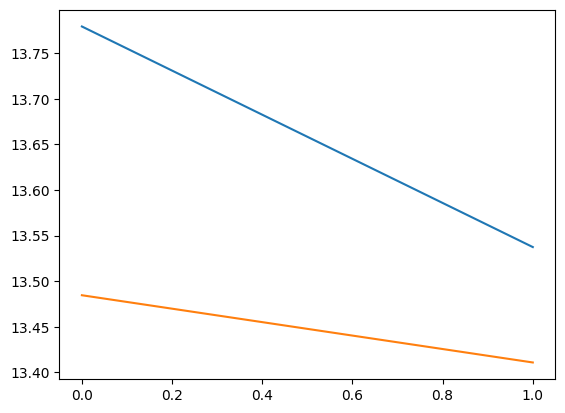

In [ ]:
plot_predictions1(model4, X_test, y_test)

In [ ]:

# Fit the model
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test, verbose=0)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Future prediction
last_sequence = quantity[-n_steps:]
future_pred = []

for _ in range(5):
    last_sequence_reshaped = last_sequence.reshape((1, n_steps, 1))
    next_pred = model.predict(last_sequence_reshaped, verbose=0)[0]
    future_pred.append(next_pred)
    last_sequence = np.append(last_sequence[1:], next_pred)

future_pred = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(range(len(quantity)), scaler.inverse_transform(quantity.reshape(-1, 1)), label='Actual')
future_index = range(len(quantity), len(quantity) + len(future_pred))
plt.plot(future_index, future_pred, label='Future Predictions')
plt.title('Future Predictions')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [ ]:
#Since the ADF statistic is greater than the critical values at all significance levels, and the p-value is greater than 0.05 (commonly used significance level), we fail to reject the null hypothesis. Therefore, we cannot say with confidence that the data is stationary based on the ADF test results.

In [ ]:
demo_data_monthly_classic_100_no_outliers.shape

In [ ]:
import numpy as np

# Apply log transformation to 'Cbrt_Net_UCP' and 'Cbrt_Quantity'
demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Net_UCP'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Cbrt_Net_UCP'])
demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Quantity'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Cbrt_Quantity'])

# Plot histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Log_Cbrt_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Log Transformed Cube Root Net UCP')
plt.xlabel('Log Transformed Cube Root Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Log_Cbrt_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Quantity'], kde=True, color='r')
plt.title('Distribution of Log Transformed Cube Root Quantity')
plt.xlabel('Log Transformed Cube Root Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Log_Cbrt_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Cube Root Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Cube Root Net UCP')

# Box plot for Log_Cbrt_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Cube Root Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Cube Root Quantity')

plt.tight_layout()
plt.show()


In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Cbrt_Net_UCP and Cbrt_Quantity
outliers_log_cbrt_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Cbrt_Net_UCP')
outliers_log_cbrt_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Cbrt_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Cbrt_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_cbrt_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Cbrt_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_cbrt_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Cbrt_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Log_Cbrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Cbrt_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Net UCP')

# Box plot for Cbrt_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Log_Cbrt_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Cbrt_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Cube Root Transformed Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Cube Root Transformed Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_log_cbrt = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_cbrt_net_ucp.index)]
demo_data_no_outliers_log_cbrt = demo_data_no_outliers_log_cbrt[~demo_data_no_outliers_log_cbrt.index.isin(outliers_log_cbrt_quantity.index)]


In [ ]:
from scipy.stats import skew
columns_to_check = ['Log_Cbrt_Net_UCP','Log_Cbrt_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_log_cbrt[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
demo_data_no_outliers_log_cbrt.head()

In [ ]:
#STATIONARITY CHECK
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], label='Log_Cbrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_cbrt['Log_Cbrt_Quantity'], label='Log_Cbrt_Quantity')
plt.title('Time Series Plot of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = demo_data_no_outliers_log_cbrt[['Log_Cbrt_Net_UCP', 'Log_Cbrt_Quantity']].rolling(window=12).mean()
rolling_std = demo_data_no_outliers_log_cbrt[['Log_Cbrt_Net_UCP', 'Log_Cbrt_Quantity']].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], label='Log_Cbrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_cbrt['Log_Cbrt_Quantity'], label='Log_Cbrt_Quantity')
plt.plot(rolling_mean['Log_Cbrt_Net_UCP'], label='Rolling Mean Log_Cbrt_Net_UCP', color='red')
plt.plot(rolling_mean['Log_Cbrt_Quantity'], label='Rolling Mean Log_Cbrt_Quantity', color='green')
plt.plot(rolling_std['Log_Cbrt_Net_UCP'], label='Rolling Std Log_Cbrt_Net_UCP', color='orange')
plt.plot(rolling_std['Log_Cbrt_Quantity'], label='Rolling Std Log_Cbrt_Quantity', color='purple')
plt.title('Rolling Statistics of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('Augmented Dickey-Fuller Test for Cbrt_Net_UCP:')
adf_test(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'])

print('\nAugmented Dickey-Fuller Test for Cbrt_Quantity:')
adf_test(demo_data_no_outliers_log_cbrt['Log_Cbrt_Quantity'])


In [ ]:
demo_data_no_outliers_log_cbrt.shape

In [ ]:
#STATIONARITY CHECK
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_cbrt['Sqrt_Net_UCP'], label='Sqrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_cbrt['Sqrt_Quantity'], label='Sqrt_Quantity')
plt.title('Time Series Plot of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = demo_data_no_outliers_log_cbrt[['Sqrt_Net_UCP', 'Sqrt_Quantity']].rolling(window=12).mean()
rolling_std = demo_data_no_outliers_log_cbrt[['Sqrt_Net_UCP', 'Sqrt_Quantity']].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_cbrt['Sqrt_Net_UCP'], label='Sqrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_cbrt['Sqrt_Quantity'], label='Sqrt_Quantity')
plt.plot(rolling_mean['Sqrt_Net_UCP'], label='Rolling Mean Sqrt_Net_UCP', color='red')
plt.plot(rolling_mean['Sqrt_Quantity'], label='Rolling Mean Sqrt_Quantity', color='green')
plt.plot(rolling_std['Sqrt_Net_UCP'], label='Rolling Std Sqrt_Net_UCP', color='orange')
plt.plot(rolling_std['Sqrt_Quantity'], label='Rolling Std Sqrt_Quantity', color='purple')
plt.title('Rolling Statistics of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('Augmented Dickey-Fuller Test for Cbrt_Net_UCP:')
adf_test(demo_data_no_outliers_log_cbrt['Sqrt_Net_UCP'])

print('\nAugmented Dickey-Fuller Test for Cbrt_Quantity:')
adf_test(demo_data_no_outliers_log_cbrt['Sqrt_Quantity'])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation to 'Sqrt_Net_UCP' and 'Sqrt_Quantity'
demo_data_monthly_classic_100_no_outliers['Log_Sqrt_Net_UCP'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Sqrt_Net_UCP'])
demo_data_monthly_classic_100_no_outliers['Log_Sqrt_Quantity'] = np.log1p(demo_data_monthly_classic_100_no_outliers['Sqrt_Quantity'])

# Plot histograms and box plots
plt.figure(figsize=(14, 6))

# Histogram and KDE for Log_Sqrt_Net_UCP
plt.subplot(1, 2, 1)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Sqrt_Net_UCP'], kde=True, color='b')
plt.title('Distribution of Log Transformed Square Root Net UCP')
plt.xlabel('Log Transformed Square Root Net UCP')
plt.ylabel('Frequency')

# Histogram and KDE for Log_Sqrt_Quantity
plt.subplot(1, 2, 2)
sns.histplot(demo_data_monthly_classic_100_no_outliers['Log_Sqrt_Quantity'], kde=True, color='r')
plt.title('Distribution of Log Transformed Square Root Quantity')
plt.xlabel('Log Transformed Square Root Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Box plot for Log_Sqrt_Net_UCP by Collection
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Square Root Net UCP by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Square Root Net UCP')

# Box plot for Log_Sqrt_Quantity by Collection
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
plt.xticks(rotation=90)
plt.title('Log Transformed Square Root Quantity by Collection')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Square Root Quantity')

plt.tight_layout()
plt.show()


In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers in Log_Sqrt_Net_UCP and Log_Sqrt_Quantity
outliers_log_sqrt_net_ucp = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Sqrt_Net_UCP')
outliers_log_sqrt_quantity = detect_outliers(demo_data_monthly_classic_100_no_outliers, 'Log_Sqrt_Quantity')

# Mark outliers in the original DataFrame
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Sqrt_Net_UCP'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_sqrt_net_ucp.index), True, False)
demo_data_monthly_classic_100_no_outliers['Outlier_Log_Sqrt_Quantity'] = np.where(demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_sqrt_quantity.index), True, False)

# Plot with outliers highlighted
plt.figure(figsize=(14, 6))

# Box plot for Log_Sqrt_Net_UCP by Collection with outliers highlighted
plt.subplot(1, 2, 1)
sns.boxplot(x='Collection', y='Log_Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Log_Sqrt_Net_UCP', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Sqrt_Net_UCP']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Log Transformed Square Root Net UCP by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Square Root Net UCP')

# Box plot for Log_Sqrt_Quantity by Collection with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(x='Collection', y='Log_Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers)
sns.scatterplot(x='Collection', y='Log_Sqrt_Quantity', data=demo_data_monthly_classic_100_no_outliers[demo_data_monthly_classic_100_no_outliers['Outlier_Log_Sqrt_Quantity']], color='red', label='Outliers')
plt.xticks(rotation=90)
plt.title('Log Transformed Square Root Quantity by Collection with Outliers')
plt.xlabel('Collection')
plt.ylabel('Log Transformed Square Root Quantity')

plt.tight_layout()
plt.show()

# Remove outliers from the dataset
demo_data_no_outliers_log_sqrt = demo_data_monthly_classic_100_no_outliers[~demo_data_monthly_classic_100_no_outliers.index.isin(outliers_log_sqrt_net_ucp.index)]
demo_data_no_outliers_log_sqrt = demo_data_no_outliers_log_sqrt[~demo_data_no_outliers_log_sqrt.index.isin(outliers_log_sqrt_quantity.index)]


In [ ]:
from scipy.stats import skew
columns_to_check = ['Log_Sqrt_Net_UCP','Log_Sqrt_Quantity']
for col in columns_to_check:
    print(f"Column: {col}")

    # Handling missing or infinite values
    data = demo_data_no_outliers_log_sqrt[col]
    data = data.dropna()  # Drop missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Drop infinite values

    # Calculate skewness
    skewness = skew(data)

    print(f"Skewness: {skewness}")

    # Plot histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#STATIONARITY CHECK
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Visual Inspection
plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_sqrt['Log_Sqrt_Net_UCP'], label='Log_Sqrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_sqrt['Log_Sqrt_Quantity'], label='Log_Sqrt_Quantity')
plt.title('Time Series Plot of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = demo_data_no_outliers_log_sqrt[['Log_Sqrt_Net_UCP', 'Log_Sqrt_Quantity']].rolling(window=12).mean()
rolling_std = demo_data_no_outliers_log_sqrt[['Log_Sqrt_Net_UCP', 'Log_Sqrt_Quantity']].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(demo_data_no_outliers_log_sqrt['Log_Sqrt_Net_UCP'], label='Log_Sqrt_Net_UCP')
plt.plot(demo_data_no_outliers_log_sqrt['Log_Sqrt_Quantity'], label='Log_Sqrt_Quantity')
plt.plot(rolling_mean['Log_Sqrt_Net_UCP'], label='Rolling Mean Log_Sqrt_Net_UCP', color='red')
plt.plot(rolling_mean['Log_Sqrt_Quantity'], label='Rolling Mean Log_Sqrt_Quantity', color='green')
plt.plot(rolling_std['Log_Sqrt_Net_UCP'], label='Rolling Std Log_Sqrt_Net_UCP', color='orange')
plt.plot(rolling_std['Log_Sqrt_Quantity'], label='Rolling Std Log_Sqrt_Quantity', color='purple')
plt.title('Rolling Statistics of Cbrt_Net_UCP and Cbrt_Quantity')
plt.xlabel('Date')
plt.ylabel('Transformed Values')
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('Augmented Dickey-Fuller Test for Cbrt_Net_UCP:')
adf_test(demo_data_no_outliers_log_sqrt['Log_Sqrt_Net_UCP'])

print('\nAugmented Dickey-Fuller Test for Cbrt_Quantity:')
adf_test(demo_data_no_outliers_log_sqrt['Log_Sqrt_Quantity'])


In [ ]:
demo_data_no_outliers_log_cbrt.info()

In [ ]:
# # columns_to_drop = ['Outlier_Net_UCP', 'Outlier_Quantity', 'Outlier_Abs_Max_Net_UCP', 'Outlier_Abs_Max_Quantity', 'Outlier_Log_Net_UCP', 'Outlier_Log_Quantity', 'Outlier_Sqrt_Net_UCP', 'Outlier_Sqrt_Quantity', 'Outlier_Cbrt_Net_UCP', 'Outlier_Cbrt_Quantity', 'Outlier_Diff_Cbrt_Net_UCP', 'Outlier_Diff_Cbrt_Quantity']
# # demo_data_monthly_classic_100_no_outliers.drop(columns=columns_to_drop, inplace=True)
# column_names = demo_data_monthly_classic_100_no_outliers.columns.tolist()
# print(column_names)
demo_data_monthly_classic_100_no_outliers['Month'].head()
# demo_data_monthly_classic_100_no_outliers.info()


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures

# # Assuming demo_data_monthly_classic_100_no_outliers is a previously defined DataFrame
# # Columns to be transformed
# columns_to_transform = ['Quantity', 'Z_Score_Quantity', 'Min_Max_Quantity', 'Robust_Quantity',
#                         'Abs_Max_Quantity', 'Log_Quantity', 'Sqrt_Quantity', 'Cbrt_Quantity', 'Diff_Cbrt_Quantity']

# # Apply polynomial transformation of degree 3
# poly = PolynomialFeatures(degree=3, include_bias=False)
# transformed_data = poly.fit_transform(demo_data_monthly_classic_100_no_outliers[columns_to_transform])

# # Convert transformed data back into a DataFrame with appropriate column names
# transformed_data_df = pd.DataFrame(transformed_data, columns=poly.get_feature_names_out(columns_to_transform))

# # Check the first few rows of the transformed data to ensure it's correct
# transformed_data_df.head()


In [ ]:
# from scipy.stats import skew

# skewness_values = {}
# for col in transformed_data_df.columns:
#     col_skewness = skew(transformed_data_df[col])
#     skewness_values[col] = col_skewness
#     print(f"Column: {col}")
#     print(f"Skewness: {col_skewness}")

# # Find the minimum absolute skewness value
# min_abs_skewness_col = min(skewness_values, key=lambda k: abs(skewness_values[k]))
# min_abs_skewness_value = skewness_values[min_abs_skewness_col]

# print(f"\nColumn with minimum absolute skewness: {min_abs_skewness_col}")
# print(f"Minimum absolute skewness value: {min_abs_skewness_value}")


In [ ]:
# transformed_data_df.shape

In [ ]:
# # Perform differencing on 'Cbrt_Net_UCP' and 'Cbrt_Quantity'
# demo_data_no_outliers_cbrt['Diff_Cbrt_Net_UCP'] = demo_data_no_outliers_cbrt['Cbrt_Net_UCP'].diff()
# demo_data_no_outliers_cbrt['Diff_Cbrt_Quantity'] = demo_data_no_outliers_cbrt['Cbrt_Quantity'].diff()

# # Drop the first row since differencing introduces NaN in the first row
# demo_data_no_outliers_cbrt = demo_data_no_outliers_cbrt.dropna()

# # Display the DataFrame after differencing
# demo_data_no_outliers_cbrt.head()


In [ ]:
# #STATIONARITY CHECK
# import matplotlib.pyplot as plt
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# # Visual Inspection
# plt.figure(figsize=(12, 6))
# plt.plot(demo_data_no_outliers_cbrt['Diff_Cbrt_Net_UCP'], label='Diff_Cbrt_Net_UCP')
# plt.plot(demo_data_no_outliers_cbrt['Diff_Cbrt_Quantity'], label='Diff_Cbrt_Quantity')
# plt.title('Time Series Plot of Cbrt_Net_UCP and Cbrt_Quantity')
# plt.xlabel('Date')
# plt.ylabel('Transformed Values')
# plt.legend()
# plt.show()

# # Rolling Statistics
# rolling_mean = demo_data_no_outliers_cbrt[['Diff_Cbrt_Net_UCP', 'Diff_Cbrt_Quantity']].rolling(window=12).mean()
# rolling_std = demo_data_no_outliers_cbrt[['Diff_Cbrt_Net_UCP', 'Diff_Cbrt_Quantity']].rolling(window=12).std()

# plt.figure(figsize=(12, 6))
# plt.plot(demo_data_no_outliers_cbrt['Diff_Cbrt_Net_UCP'], label='Diff_Cbrt_Net_UCP')
# plt.plot(demo_data_no_outliers_cbrt['Cbrt_Quantity'], label='Diff_Cbrt_Quantity')
# plt.plot(rolling_mean['Diff_Cbrt_Net_UCP'], label='Rolling Mean Diff_Cbrt_Net_UCP', color='red')
# plt.plot(rolling_mean['Diff_Cbrt_Quantity'], label='Rolling Mean Diff_Cbrt_Quantity', color='green')
# plt.plot(rolling_std['Diff_Cbrt_Net_UCP'], label='Rolling Std Diff_Cbrt_Net_UCP', color='orange')
# plt.plot(rolling_std['Diff_Cbrt_Quantity'], label='Rolling Std Diff_Cbrt_Quantity', color='purple')
# plt.title('Rolling Statistics of Diff_Cbrt_Net_UCP and Diff_Cbrt_Quantity')
# plt.xlabel('Date')
# plt.ylabel('Transformed Values')
# plt.legend()
# plt.show()

# # Augmented Dickey-Fuller Test
# def adf_test(series):
#     result = adfuller(series)
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print(f'   {key}: {value}')

# print('Augmented Dickey-Fuller Test for Cbrt_Net_UCP:')
# adf_test(demo_data_no_outliers_cbrt['Diff_Cbrt_Net_UCP'])

# print('\nAugmented Dickey-Fuller Test for Cbrt_Quantity:')
# adf_test(demo_data_no_outliers_cbrt['Diff_Cbrt_Quantity'])


In [ ]:
demo_data_no_outliers_cbrt.shape

In [ ]:
demo_data_monthly_classic_100_no_outliers.shape

ARIMA MODEL APPLICATION


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot ACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
result = adfuller(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Determine if data is stationary based on the p-value
if result[1] < 0.05:
    print('The data is likely stationary.')
else:
    print('The data is likely non-stationary.')

# Calculate the number of differences required
if result[1] >= 0.05:
    d = 1  # You might need to try higher orders of differencing if the data is not stationary after the first difference
else:
    d = 0  # Data is already stationary
print('Number of differences required (d):', d)


In [ ]:
demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'].head()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
result = adfuller(demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Net_UCP'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Determine if data is stationary based on the p-value
if result[1] < 0.05:
    print('The data is likely stationary.')
else:
    print('The data is likely non-stationary.')

# Calculate the number of differences required
if result[1] >= 0.05:
    d = 1  # You might need to try higher orders of differencing if the data is not stationary after the first difference
else:
    d = 0  # Data is already stationary
print('Number of differences required (d):', d)


In [ ]:
demo_data_monthly_classic_100_no_outliers['Log_Cbrt_Net_UCP'].head()

In [ ]:
#p,d,q values as 3,0,3

In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the range of p, d, q values
p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

# Create a list of all possible combinations of p, d, q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store best model and its AIC score
best_aic = np.inf
best_model = None
best_order = None

# Iterate over all combinations and fit ARIMA model for each
for order in param_combinations:
    try:
        model = ARIMA(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], order=order)
        results = model.fit()
        aic = results.aic
        # Update best model if current AIC score is lower
        if aic < best_aic:
            best_aic = aic
            best_model = results
            best_order = order
    except:
        continue

# Print the best model and its AIC score
print('Best ARIMA model order:', best_order)
print('AIC Score of the best model:', best_aic)
print(best_model.summary())


In [ ]:
import statsmodels.api as sm

# Define the ARIMA model with the identified parameters
model = sm.tsa.ARIMA(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], order=(2, 0, 2))

# Fit the ARIMA model to the training data
results = model.fit()

# Print the summary of the model
print(results.summary())


In [ ]:
# Get the residuals
residuals = results.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have already split your data into training and test sets

# Fit the ARIMA model to the training data
model = ARIMA(demo_data_no_outliers_log_cbrt['Log_Cbrt_Net_UCP'], order=(2, 0, 2))
fit_model = model.fit()

# Generate forecasts for the test dataset
# forecast_values = fit_model.forecast(steps=len(test_data))
forecast_values_original = np.expm1(forecast_values)
test_data =
# Calculate forecast accuracy metrics
mae = mean_absolute_error(test_data, forecast_values_original)
mse = mean_squared_error(test_data, forecast_values_original)
rmse = np.sqrt(mse)

# Plot the graph of actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(forecast_values, label='Forecast', color='red')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Log Cube Root Transformed Net UCP')
plt.legend()
plt.show()

# Print forecast accuracy metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
